In [ ]:
import pandas as pd

def detectar_corrupcion(transacciones, umbral_monto, umbral_frecuencia):
    """
    Detecta posibles transacciones sospechosas de corrupción.

    Args:
        transacciones (pd.DataFrame): DataFrame con datos de transacciones.
        umbral_monto (float): Monto máximo permitido para transacciones sospechosas.
        umbral_frecuencia (int): Frecuencia máxima permitida de transacciones sospechosas.

    Returns:
        pd.DataFrame: DataFrame con transacciones sospechosas.
    """

    # 1. Filtra transacciones por monto
    transacciones_sospechosas_monto = transacciones[transacciones['monto'] > umbral_monto]

    # 2. Agrupa transacciones por beneficiario y cuenta la frecuencia
    frecuencia_transacciones = transacciones_sospechosas_monto.groupby('beneficiario').size()

    # 3. Filtra beneficiarios con alta frecuencia de transacciones
    beneficiarios_sospechosos = frecuencia_transacciones[frecuencia_transacciones > umbral_frecuencia].index

    # 4. Filtra transacciones sospechosas por beneficiario
    transacciones_sospechosas_frecuencia = transacciones_sospechosas_monto[transacciones_sospechosas_monto['beneficiario'].isin(beneficiarios_sospechosos)]

    # 5. Combina resultados
    transacciones_sospechosas = pd.concat([transacciones_sospechosas_monto, transacciones_sospechosas_frecuencia]).drop_duplicates()

    return transacciones_sospechosas

# Ejemplo de uso
datos = {
    'fecha': ['2023-10-26', '2023-10-27', '2023-10-28', '2023-10-29', '2023-10-30', '2023-10-31'],
    'beneficiario': ['Empresa A', 'Empresa B', 'Empresa A', 'Empresa C', 'Empresa A', 'Empresa D'],
    'monto': [1000, 500, 1500, 200, 1200, 800]
}

transacciones = pd.DataFrame(datos)

umbral_monto = 1000
umbral_frecuencia = 2

transacciones_sospechosas = detectar_corrupcion(transacciones, umbral_monto, umbral_frecuencia)

print(transacciones_sospechosas)

        fecha beneficiario  monto
2  2023-10-28    Empresa A   1500
4  2023-10-30    Empresa A   1200


Explicación:

Filtro por monto: Identifica transacciones que superan un monto predefinido, ya que podrían indicar pagos irregulares.
Frecuencia de transacciones: Cuenta cuántas veces se repiten las transacciones para cada beneficiario.
Filtro por frecuencia: Selecciona beneficiarios que reciben transacciones con una frecuencia inusualmente alta.
Combinación de resultados: Une las transacciones sospechosas por monto y por frecuencia para obtener una lista completa.
Consideraciones importantes:

Este algoritmo es solo un punto de partida. Un sistema real debería incluir análisis de datos más sofisticados, como:
Análisis de redes para detectar relaciones ocultas entre beneficiarios.
Uso de machine learning para identificar patrones complejos de corrupción.
Integración con otras fuentes de datos (registros públicos, etc.).
Los umbrales (monto y frecuencia) deben ajustarse según el contexto y los datos disponibles.
Es importante tener en cuenta que una transacción marcada como sospechosa, no implica que sea corrupta, simplemente es una alerta para ser revisada por un auditor.







In [ ]:
import pandas as pd
import numpy as np

def detectar_fraude_empleados(registros_acceso, registros_gastos, umbral_accesos, umbral_gastos):
    """
    Detecta posibles fraudes de empleados analizando registros de acceso y gastos.

    Args:
        registros_acceso (pd.DataFrame): DataFrame con registros de acceso de empleados.
        registros_gastos (pd.DataFrame): DataFrame con registros de gastos de empleados.
        umbral_accesos (int): Número máximo de accesos sospechosos permitidos.
        umbral_gastos (float): Monto máximo de gastos sospechosos permitidos.

    Returns:
        pd.DataFrame: DataFrame con empleados sospechosos de fraude.
    """

    # 1. Analiza registros de acceso
    accesos_inusuales = registros_acceso.groupby('empleado').size()
    empleados_accesos_sospechosos = accesos_inusuales[accesos_inusuales > umbral_accesos].index

    # 2. Analiza registros de gastos
    gastos_inusuales = registros_gastos.groupby('empleado')['monto'].sum()
    empleados_gastos_sospechosos = gastos_inusuales[gastos_inusuales > umbral_gastos].index

    # 3. Combina resultados
    empleados_sospechosos = np.union1d(empleados_accesos_sospechosos, empleados_gastos_sospechosos)

    # 4. Crea DataFrame con información de empleados sospechosos
    datos_sospechosos = {
        'empleado': empleados_sospechosos,
        'accesos_inusuales': [accesos_inusuales.get(e, 0) for e in empleados_sospechosos],
        'gastos_inusuales': [gastos_inusuales.get(e, 0) for e in empleados_sospechosos]
    }
    df_sospechosos = pd.DataFrame(datos_sospechosos)

    return df_sospechosos

# Ejemplo de uso
registros_acceso = pd.DataFrame({
    'empleado': ['Juan', 'María', 'Juan', 'Pedro', 'María', 'Juan'],
    'fecha': ['2023-10-26', '2023-10-27', '2023-10-28', '2023-10-29', '2023-10-30', '2023-10-31']
})

registros_gastos = pd.DataFrame({
    'empleado': ['Juan', 'María', 'Pedro', 'Ana'],
    'monto': [500, 1200, 800, 200]
})

umbral_accesos = 3
umbral_gastos = 1000

empleados_sospechosos = detectar_fraude_empleados(registros_acceso, registros_gastos, umbral_accesos, umbral_gastos)

print(empleados_sospechosos)

  empleado  accesos_inusuales  gastos_inusuales
0    María                  2              1200


Explicación:

Análisis de registros de acceso: Cuenta el número de accesos por empleado y detecta aquellos con una frecuencia inusualmente alta.
Análisis de registros de gastos: Suma los gastos por empleado y detecta aquellos con montos inusualmente altos.
Combinación de resultados: Identifica a los empleados que aparecen en ambas listas de sospechosos.
Creación de DataFrame: Crea un DataFrame con la información de los empleados sospechosos, incluyendo el número de accesos y gastos inusuales.
Consideraciones importantes:

Este algoritmo es solo un punto de partida. Un sistema real debería incluir análisis de datos más sofisticados, como:
Análisis de patrones de acceso (horas, ubicaciones, etc.).
Análisis de tipos de gastos (proveedores, categorías, etc.).
Uso de machine learning para identificar patrones complejos de fraude.
Integración con otras fuentes de datos (registros de nómina, etc.).
Los umbrales (accesos y gastos) deben ajustarse según el contexto y los datos disponibles.
Es importante tener en cuenta que un empleado marcado como sospechoso, no implica que sea culpable de fraude, simplemente es una alerta para ser revisada por un auditor.

In [ ]:


import pandas as pd
import numpy as np

def detectar_fraude_directorio(registros_financieros, registros_reuniones, umbral_gastos, umbral_reuniones):
    """
    Detecta posibles fraudes de directorio analizando registros financieros y reuniones.

    Args:
        registros_financieros (pd.DataFrame): DataFrame con registros de gastos del directorio.
        registros_reuniones (pd.DataFrame): DataFrame con registros de asistencia a reuniones.
        umbral_gastos (float): Monto máximo de gastos sospechosos permitidos.
        umbral_reuniones (int): Número mínimo de reuniones a las que se debe asistir.

    Returns:
        pd.DataFrame: DataFrame con miembros del directorio sospechosos de fraude.
    """

    # 1. Analiza registros financieros
    gastos_inusuales = registros_financieros.groupby('miembro_directorio')['monto'].sum()
    miembros_gastos_sospechosos = gastos_inusuales[gastos_inusuales > umbral_gastos].index

    # 2. Analiza registros de reuniones
    asistencia_reuniones = registros_reuniones.groupby('miembro_directorio').size()
    miembros_asistencia_sospechosos = asistencia_reuniones[asistencia_reuniones < umbral_reuniones].index

    # 3. Combina resultados
    miembros_sospechosos = np.union1d(miembros_gastos_sospechosos, miembros_asistencia_sospechosos)

    # 4. Crea DataFrame con información de miembros sospechosos
    datos_sospechosos = {
        'miembro_directorio': miembros_sospechosos,
        'gastos_inusuales': [gastos_inusuales.get(m, 0) for m in miembros_sospechosos],
        'asistencia_reuniones': [asistencia_reuniones.get(m, 0) for m in miembros_sospechosos]
    }
    df_sospechosos = pd.DataFrame(datos_sospechosos)

    return df_sospechosos

# Ejemplo de uso
registros_financieros = pd.DataFrame({
    'miembro_directorio': ['Ana', 'Carlos', 'Ana', 'David'],
    'monto': [1500, 800, 1200, 200]
})

registros_reuniones = pd.DataFrame({
    'miembro_directorio': ['Ana', 'Carlos', 'David'],
    'fecha': ['2023-10-26', '2023-10-27', '2023-10-28']
})

umbral_gastos = 1000
umbral_reuniones = 2

miembros_sospechosos = detectar_fraude_directorio(registros_financieros, registros_reuniones, umbral_gastos, umbral_reuniones)

print(miembros_sospechosos)

  miembro_directorio  gastos_inusuales  asistencia_reuniones
0                Ana              2700                     1
1             Carlos               800                     1
2              David               200                     1


Explicación:

Análisis de registros financieros: Suma los gastos por miembro del directorio y detecta aquellos con montos inusualmente altos.
Análisis de registros de reuniones: Cuenta el número de reuniones a las que asistió cada miembro y detecta aquellos con baja asistencia.
Combinación de resultados: Identifica a los miembros que aparecen en ambas listas de sospechosos.
Creación de DataFrame: Crea un DataFrame con la información de los miembros sospechosos, incluyendo los gastos inusuales y la asistencia a reuniones.
Consideraciones importantes:

Este algoritmo es un punto de partida. Un sistema real debería incluir análisis de datos más sofisticados, como:
Análisis de patrones de gastos (tipos de gastos, proveedores, etc.).
Análisis de justificación de gastos.
Análisis de conflictos de interés.
Uso de machine learning para identificar patrones complejos de fraude.
Integración con otras fuentes de datos (registros de transacciones de la empresa, etc.).
Los umbrales (gastos y reuniones) deben ajustarse según el contexto y los datos disponibles.
Es importante tener en cuenta que un miembro marcado como sospechoso, no implica que sea culpable de fraude, simplemente es una alerta para ser revisada por un auditor.

In [ ]:


import pandas as pd
import numpy as np

def detectar_fraude_compras(registros_compras, umbral_monto, umbral_frecuencia, umbral_proveedores):
    """
    Detecta posibles fraudes en compras analizando registros de compras.

    Args:
        registros_compras (pd.DataFrame): DataFrame con registros de compras.
        umbral_monto (float): Monto máximo de compras sospechosas permitidas.
        umbral_frecuencia (int): Frecuencia máxima de compras sospechosas permitidas.
        umbral_proveedores (int): Número máximo de proveedores sospechosos permitidos.

    Returns:
        pd.DataFrame: DataFrame con compras sospechosas de fraude.
    """

    # 1. Analiza compras por monto
    compras_montos_sospechosas = registros_compras[registros_compras['monto'] > umbral_monto]

    # 2. Analiza frecuencia de compras por empleado
    frecuencia_compras = registros_compras.groupby('empleado').size()
    empleados_frecuencia_sospechosos = frecuencia_compras[frecuencia_compras > umbral_frecuencia].index

    # 3. Analiza número de proveedores por empleado
    proveedores_compras = registros_compras.groupby('empleado')['proveedor'].nunique()
    empleados_proveedores_sospechosos = proveedores_compras[proveedores_compras > umbral_proveedores].index

    # 4. Combina resultados
    empleados_sospechosos = np.union1d(empleados_frecuencia_sospechosos, empleados_proveedores_sospechosos)
    compras_sospechosas = registros_compras[registros_compras['empleado'].isin(empleados_sospechosos)]

    # 5. Combina compras sospechosas por monto y por empleado
    compras_sospechosas = pd.concat([compras_montos_sospechosas, compras_sospechosas]).drop_duplicates()

    return compras_sospechosas

# Ejemplo de uso
registros_compras = pd.DataFrame({
    'empleado': ['Ana', 'Carlos', 'Ana', 'David', 'Ana', 'Carlos'],
    'proveedor': ['Proveedor A', 'Proveedor B', 'Proveedor C', 'Proveedor A', 'Proveedor D', 'Proveedor E'],
    'monto': [1500, 800, 1200, 200, 1000, 500]
})

umbral_monto = 1000
umbral_frecuencia = 2
umbral_proveedores = 3

compras_sospechosas = detectar_fraude_compras(registros_compras, umbral_monto, umbral_frecuencia, umbral_proveedores)

print(compras_sospechosas)

  empleado    proveedor  monto
0      Ana  Proveedor A   1500
2      Ana  Proveedor C   1200
4      Ana  Proveedor D   1000


Explicación:

Análisis de compras por monto: Detecta compras que superan un monto predefinido.
Análisis de frecuencia de compras: Cuenta el número de compras por empleado y detecta aquellos con alta frecuencia.
Análisis de número de proveedores: Cuenta el número de proveedores utilizados por cada empleado y detecta aquellos con muchos proveedores.
Combinación de resultados: Identifica a los empleados que aparecen en las listas de sospechosos por frecuencia y proveedores.
Combinación de compras sospechosas: Une las compras sospechosas por monto y por empleado para obtener una lista completa.
Consideraciones importantes:

Este algoritmo es un punto de partida. Un sistema real debería incluir análisis de datos más sofisticados, como:
Análisis de patrones de compras (tipos de productos, horarios, etc.).
Análisis de justificación de compras.
Análisis de relaciones entre empleados y proveedores.
Uso de machine learning para identificar patrones complejos de fraude.
Integración con otras fuentes de datos (registros de inventario, etc.).
Los umbrales (monto, frecuencia y proveedores) deben ajustarse según el contexto y los datos disponibles.
Es importante tener en cuenta que una compra marcada como sospechosa, no implica que sea fraudulenta, simplemente es una alerta para ser revisada por un auditor.

In [ ]:
import pandas as pd

def comparar_precios_compra(registros_precios):
    """
    Compara precios de compra entre proveedores y selecciona la mejor opción.

    Args:
        registros_precios (pd.DataFrame): DataFrame con registros de precios de compra.

    Returns:
        pd.DataFrame: DataFrame con la mejor opción de compra para cada producto.
    """

    # 1. Agrupa los precios por producto y proveedor
    precios_agrupados = registros_precios.groupby(['producto', 'proveedor'])['precio'].min().reset_index()

    # 2. Encuentra el precio mínimo para cada producto
    mejor_opcion = precios_agrupados.loc[precios_agrupados.groupby('producto')['precio'].idxmin()]

    return mejor_opcion

# Ejemplo de uso
registros_precios = pd.DataFrame({
    'producto': ['Producto A', 'Producto B', 'Producto A', 'Producto C', 'Producto B'],
    'proveedor': ['Proveedor 1', 'Proveedor 2', 'Proveedor 3', 'Proveedor 1', 'Proveedor 3'],
    'precio': [100, 150, 90, 200, 140]
})

mejor_opcion_compra = comparar_precios_compra(registros_precios)

print(mejor_opcion_compra)

     producto    proveedor  precio
1  Producto A  Proveedor 3      90
3  Producto B  Proveedor 3     140
4  Producto C  Proveedor 1     200


Explicación:

Agrupación de precios: Agrupa los registros de precios por producto y proveedor, y selecciona el precio mínimo para cada combinación.
Precio mínimo por producto: Encuentra el proveedor con el precio mínimo para cada producto.
DataFrame con mejor opción: Crea un DataFrame con la mejor opción de compra para cada producto, incluyendo el producto, el proveedor y el precio.
Consideraciones importantes:

Este código asume que tienes un DataFrame con los registros de precios de compra, incluyendo las columnas 'producto', 'proveedor' y 'precio'.
Puedes adaptar este código para incluir otros criterios de selección, como la calidad del proveedor, el tiempo de entrega, etc.
Si tienes grandes volúmenes de datos, puedes utilizar bibliotecas como Dask o Spark para paralelizar el procesamiento y mejorar el rendimiento.
Es importante mantener actualizados los registros de precios para garantizar que la comparación sea precisa.

In [ ]:
import pandas as pd

def comparar_precios_externos(registros_precios_internos, registros_precios_externos):
    """
    Compara precios de compra con una lista de precios externa y resalta las diferencias.

    Args:
        registros_precios_internos (pd.DataFrame): DataFrame con registros de precios de compra internos.
        registros_precios_externos (pd.DataFrame): DataFrame con registros de precios de compra externos.

    Returns:
        pd.DataFrame: DataFrame con las diferencias de precios.
    """

    # 1. Combina los DataFrames por producto
    precios_combinados = pd.merge(registros_precios_internos, registros_precios_externos, on='producto', suffixes=('_interno', '_externo'))

    # 2. Calcula la diferencia de precios
    precios_combinados['diferencia_precio'] = precios_combinados['precio_interno'] - precios_combinados['precio_externo']

    # 3. Filtra las diferencias de precios
    diferencias_precios = precios_combinados[precios_combinados['diferencia_precio'] != 0]

    return diferencias_precios

# Ejemplo de uso
registros_precios_internos = pd.DataFrame({
    'producto': ['Producto A', 'Producto B', 'Producto C'],
    'precio_interno': [100, 150, 200]
})

registros_precios_externos = pd.DataFrame({
    'producto': ['Producto A', 'Producto B', 'Producto C'],
    'precio_externo': [90, 160, 200]
})

diferencias_precios = comparar_precios_externos(registros_precios_internos, registros_precios_externos)

print(diferencias_precios)


     producto  precio_interno  precio_externo  diferencia_precio
0  Producto A             100              90                 10
1  Producto B             150             160                -10


Explicación:

Combinación de DataFrames: Combina los DataFrames de precios internos y externos utilizando la columna 'producto' como clave.
Cálculo de diferencia de precios: Calcula la diferencia entre los precios internos y externos para cada producto.
Filtrado de diferencias: Filtra las filas donde la diferencia de precios es distinta de cero.
DataFrame con diferencias: Crea un DataFrame con las diferencias de precios, incluyendo el producto, los precios internos y externos, y la diferencia.
Consideraciones importantes:

Este código asume que tienes dos DataFrames con registros de precios, uno interno y otro externo, y que ambos tienen una columna llamada 'producto' que se utiliza para combinar los DataFrames.
Puedes adaptar este código para incluir otros criterios de comparación, como la calidad del producto, el tiempo de entrega, etc.
Si tienes grandes volúmenes de datos, puedes utilizar bibliotecas como Dask o Spark para paralelizar el procesamiento y mejorar el rendimiento.
Es importante mantener actualizadas las listas de precios internas y externas para garantizar que la comparación sea precisa

In [ ]:
import pandas as pd
import numpy as np

def detectar_fraude_creditos(registros_creditos, umbral_monto, umbral_plazo, umbral_ingresos):
    """
    Detecta posibles fraudes de créditos analizando registros de créditos.

    Args:
        registros_creditos (pd.DataFrame): DataFrame con registros de créditos.
        umbral_monto (float): Monto máximo de créditos sospechosos permitidos.
        umbral_plazo (int): Plazo máximo de créditos sospechosos permitidos.
        umbral_ingresos (float): Ingresos mínimos requeridos para créditos sospechosos.

    Returns:
        pd.DataFrame: DataFrame con créditos sospechosos de fraude.
    """

    # 1. Analiza créditos por monto
    creditos_montos_sospechosos = registros_creditos[registros_creditos['monto'] > umbral_monto]

    # 2. Analiza créditos por plazo
    creditos_plazos_sospechosos = registros_creditos[registros_creditos['plazo'] > umbral_plazo]

    # 3. Analiza créditos por ingresos del solicitante
    creditos_ingresos_sospechosos = registros_creditos[registros_creditos['ingresos'] < umbral_ingresos]

    # 4. Combina resultados
    creditos_sospechosos = pd.concat([creditos_montos_sospechosos, creditos_plazos_sospechosos, creditos_ingresos_sospechosos]).drop_duplicates()

    return creditos_sospechosos

# Ejemplo de uso
registros_creditos = pd.DataFrame({
    'cliente': ['Ana', 'Carlos', 'Ana', 'David', 'Ana', 'Carlos'],
    'monto': [1500, 800, 1200, 200, 1000, 500],
    'plazo': [12, 6, 18, 3, 24, 10],
    'ingresos': [2000, 1500, 1800, 1000, 2500, 1200]
})

umbral_monto = 1000
umbral_plazo = 18
umbral_ingresos = 1500

creditos_sospechosos = detectar_fraude_creditos(registros_creditos, umbral_monto, umbral_plazo, umbral_ingresos)

print(creditos_sospechosos)

  cliente  monto  plazo  ingresos
0     Ana   1500     12      2000
2     Ana   1200     18      1800
4     Ana   1000     24      2500
3   David    200      3      1000
5  Carlos    500     10      1200


Explicación:

Análisis de créditos por monto: Detecta créditos que superan un monto predefinido.
Análisis de créditos por plazo: Detecta créditos que tienen un plazo inusualmente largo.
Análisis de créditos por ingresos: Detecta créditos otorgados a solicitantes con ingresos insuficientes.
Combinación de resultados: Combina los créditos sospechosos por monto, plazo e ingresos para obtener una lista completa.
Consideraciones importantes:

Este algoritmo es un punto de partida. Un sistema real debería incluir análisis de datos más sofisticados, como:
Análisis de patrones de comportamiento de los solicitantes.
Análisis de la información crediticia de los solicitantes.
Uso de machine learning para identificar patrones complejos de fraude.
Integración con otras fuentes de datos (registros de transacciones, etc.).
Los umbrales (monto, plazo e ingresos) deben ajustarse según el contexto y los datos disponibles.
Es importante tener en cuenta que un crédito marcado como sospechoso, no implica que sea fraudulento, simplemente es una alerta para ser revisada por un analista de crédito.
Recomendaciones adicionales:

Implementa un sistema de gestión de riesgos de crédito que incluya políticas y procedimientos claros para la evaluación y aprobación de créditos.
Capacita a tu personal en la detección de fraudes de crédito.
Realiza auditorías periódicas de tus procesos de crédito.
Mantente actualizado sobre las últimas tendencias en fraudes de crédito.







In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest

def detectar_anomalias_compras(registros_compras, umbral_anomalia):
    """
    Detecta anomalías en compras utilizando Isolation Forest.

    Args:
        registros_compras (pd.DataFrame): DataFrame con registros de compras.
        umbral_anomalia (float): Umbral para considerar una compra como anomalía.

    Returns:
        pd.DataFrame: DataFrame con compras sospechosas de fraude.
    """

    # 1. Selecciona las columnas relevantes para el análisis
    columnas_analisis = ['monto', 'cantidad', 'precio_unitario']
    datos_analisis = registros_compras[columnas_analisis]

    # 2. Entrena el modelo Isolation Forest
    modelo = IsolationForest(contamination=umbral_anomalia)
    modelo.fit(datos_analisis)

    # 3. Predice las anomalías
    anomalias = modelo.predict(datos_analisis)

    # 4. Agrega las predicciones al DataFrame original
    registros_compras['anomalia'] = anomalias

    # 5. Filtra las compras sospechosas
    compras_sospechosas = registros_compras[registros_compras['anomalia'] == -1]

    return compras_sospechosas

# Ejemplo de uso
registros_compras = pd.DataFrame({
    'monto': [100, 200, 150, 1000, 120, 180],
    'cantidad': [10, 20, 15, 5, 12, 18],
    'precio_unitario': [10, 10, 10, 200, 10, 10]
})

umbral_anomalia = 0.1

compras_sospechosas = detectar_anomalias_compras(registros_compras, umbral_anomalia)

print(compras_sospechosas)

   monto  cantidad  precio_unitario  anomalia
3   1000         5              200        -1


##creditos

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

def detectar_fraude_creditos(registros_creditos, umbral_prediccion):
    """
    Detecta fraude en créditos utilizando regresión logística.

    Args:
        registros_creditos (pd.DataFrame): DataFrame con registros de créditos.
        umbral_prediccion (float): Umbral para considerar un crédito como fraudulento.

    Returns:
        pd.DataFrame: DataFrame con créditos sospechosos de fraude.
    """

    # 1. Selecciona las columnas relevantes para el análisis
    columnas_analisis = ['monto', 'plazo', 'ingresos']
    datos_analisis = registros_creditos[columnas_analisis]

    # 2. Divide los datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(datos_analisis, registros_creditos['fraude'], test_size=0.2)

    # 3. Entrena el modelo de regresión logística
    modelo = LogisticRegression()
    modelo.fit(X_train, y_train)

    # 4. Predice la probabilidad de fraude
    probabilidades_fraude = modelo.predict_proba(X_test)[:, 1]

    # 5. Agrega las predicciones al DataFrame de prueba
    X_test['probabilidad_fraude'] = probabilidades_fraude

    # 6. Filtra los créditos sospechosos
    creditos_sospechosos = X_test[X_test['probabilidad_fraude'] > umbral_prediccion]

    return creditos_sospechosos

# Ejemplo de uso
registros_creditos = pd.DataFrame({
    'monto': [1000, 2000, 1500, 5000, 1200, 1800],
    'plazo': [12, 24, 18, 6, 12, 24],
    'ingresos': [2000, 3000, 2500, 1000, 2000, 3000],
    'fraude': [0, 0, 0, 1, 0, 0]
})

umbral_prediccion = 0.8

creditos_sospechosos = detectar_fraude_creditos(registros_creditos, umbral_prediccion)

print(creditos_sospechosos)

Empty DataFrame
Columns: [monto, plazo, ingresos, probabilidad_fraude]
Index: []


In [ ]:
import pandas as pd

def comparar_precios_externos(registros_precios_internos, registros_precios_externos):
    """
    Compara precios de compra con una lista de precios externa y resalta las diferencias.

    Args:
        registros_precios_internos (pd.DataFrame): DataFrame con registros de precios de compra internos.
        registros_precios_externos (pd.DataFrame): DataFrame con registros de precios de compra externos.

    Returns:
        pd.DataFrame: DataFrame con las diferencias de precios.
    """

    # 1. Combina los DataFrames por producto
    precios_combinados = pd.merge(registros_precios_internos, registros_precios_externos, on='producto', suffixes=('_interno', '_externo'))

    # 2. Calcula la diferencia de precios
    precios_combinados['diferencia_precio'] = precios_combinados['precio_interno'] - precios_combinados['precio_externo']

    # 3. Filtra las diferencias de precios
    diferencias_precios = precios_combinados[precios_combinados['diferencia_precio'] != 0]

    return diferencias_precios

# Ejemplo de uso
registros_precios_internos = pd.DataFrame({
    'producto': ['Producto A', 'Producto B', 'Producto C'],
    'precio_interno': [100, 150, 200]
})

registros_precios_externos = pd.DataFrame({
    'producto': ['Producto A', 'Producto B', 'Producto C'],
    'precio_externo': [90, 160, 200]
})

diferencias_precios = comparar_precios_externos(registros_precios_internos, registros_precios_externos)

print(diferencias_precios)

     producto  precio_interno  precio_externo  diferencia_precio
0  Producto A             100              90                 10
1  Producto B             150             160                -10


Consideraciones importantes:

Estos son solo ejemplos básicos. Puedes adaptarlos y mejorarlos según tus necesidades y los datos disponibles.
Es fundamental contar con datos de calidad y actualizados para obtener resultados precisos.
La implementación de estos algoritmos debe ir acompañada de controles internos y una cultura de ética en la empresa.
Si tienes grandes volúmenes de datos, considera utilizar herramientas de procesamiento de datos más potentes como Spark o Dask.

## deteccion de anomalias de ofertas

In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest

def detectar_anomalias_ofertas(registros_ofertas, umbral_anomalia):
    """
    Detecta anomalías en ofertas utilizando Isolation Forest.

    Args:
        registros_ofertas (pd.DataFrame): DataFrame con registros de ofertas.
        umbral_anomalia (float): Umbral para considerar una oferta como anomalía.

    Returns:
        pd.DataFrame: DataFrame con ofertas sospechosas de fraude.
    """

    # 1. Selecciona las columnas relevantes para el análisis
    columnas_analisis = ['monto', 'plazo', 'calificacion_postor']
    datos_analisis = registros_ofertas[columnas_analisis]

    # 2. Entrena el modelo Isolation Forest
    modelo = IsolationForest(contamination=umbral_anomalia)
    modelo.fit(datos_analisis)

    # 3. Predice las anomalías
    anomalias = modelo.predict(datos_analisis)

    # 4. Agrega las predicciones al DataFrame original
    registros_ofertas['anomalia'] = anomalias

    # 5. Filtra las ofertas sospechosas
    ofertas_sospechosas = registros_ofertas[registros_ofertas['anomalia'] == -1]

    return ofertas_sospechosas

# Ejemplo de uso
registros_ofertas = pd.DataFrame({
    'monto': [1000, 2000, 1500, 10000, 1200, 1800],
    'plazo': [12, 24, 18, 6, 12, 24],
    'calificacion_postor': [8, 9, 7, 3, 8, 9]
})

umbral_anomalia = 0.1

ofertas_sospechosas = detectar_anomalias_ofertas(registros_ofertas, umbral_anomalia)

print(ofertas_sospechosas)

   monto  plazo  calificacion_postor  anomalia
3  10000      6                    3        -1


2. Detección de colusión entre postores:

In [ ]:


import pandas as pd
import networkx as nx

def detectar_colusion_postores(registros_ofertas, umbral_similitud):
    """
    Detecta colusión entre postores analizando la similitud de sus ofertas.

    Args:
        registros_ofertas (pd.DataFrame): DataFrame con registros de ofertas.
        umbral_similitud (float): Umbral para considerar dos ofertas como similares.

    Returns:
        list: Lista de pares de postores sospechosos de colusión.
    """

    # 1. Crea un grafo de postores
    grafo = nx.Graph()

    # 2. Compara las ofertas de todos los pares de postores
    postores = registros_ofertas['postor'].unique()
    for i in range(len(postores)):
        for j in range(i + 1, len(postores)):
            postor1 = postores[i]
            postor2 = postores[j]
            ofertas_postor1 = registros_ofertas[registros_ofertas['postor'] == postor1]['monto'].tolist()
            ofertas_postor2 = registros_ofertas[registros_ofertas['postor'] == postor2]['monto'].tolist()
            similitud = calcular_similitud(ofertas_postor1, ofertas_postor2)
            if similitud > umbral_similitud:
                grafo.add_edge(postor1, postor2)

    # 3. Encuentra los componentes conectados del grafo
    componentes_conectados = list(nx.connected_components(grafo))

    # 4. Filtra los componentes con más de un postor
    postores_sospechosos = [componente for componente in componentes_conectados if len(componente) > 1]

    return postores_sospechosos

def calcular_similitud(ofertas1, ofertas2):
    """
    Calcula la similitud entre dos listas de ofertas.

    Args:
        ofertas1 (list): Lista de ofertas del primer postor.
        ofertas2 (list): Lista de ofertas del segundo postor.

    Returns:
        float: Similitud entre las ofertas.
    """

    # Implementa tu propia lógica para calcular la similitud
    # Por ejemplo, puedes utilizar la distancia euclidiana o la correlación de Pearson
    # En este ejemplo, se utiliza una implementación simplificada
    if len(ofertas1) != len(ofertas2):
        return 0
    similitud = 0
    for i in range(len(ofertas1)):
        similitud += abs(ofertas1[i] - ofertas2[i])
    similitud = 1 / (1 + similitud)
    return similitud

# Ejemplo de uso
registros_ofertas = pd.DataFrame({
    'postor': ['A', 'B', 'C', 'D', 'E', 'F'],
    'monto': [1000, 2000, 1500, 1000, 2000, 1500]
})

umbral_similitud = 0.8

postores_sospechosos = detectar_colusion_postores(registros_ofertas, umbral_similitud)

print(postores_sospechosos)

[{'D', 'A'}, {'E', 'B'}, {'F', 'C'}]


# **3. Comparación de precios con lista externa:**

(El código para comparar precios con una lista externa es el mismo que se proporcionó en la respuesta anterior.)

Consideraciones importantes:

Estos son solo ejemplos básicos. Puedes adaptarlos y mejorarlos según tus necesidades y los datos disponibles.
Es fundamental contar con datos de calidad y actualizados para obtener resultados precisos.
La implementación de estos algoritmos debe ir acompañada de controles internos y una cultura de ética en la empresa.
Si tienes grandes volúmenes de datos, considera utilizar herramientas de procesamiento de datos más potentes como Spark o Dask.

## caja

In [ ]:

import pandas as pd
from sklearn.ensemble import IsolationForest

def detectar_anomalias_caja(registros_caja, umbral_anomalia):
    """
    Detecta anomalías en transacciones de caja utilizando Isolation Forest.

    Args:
        registros_caja (pd.DataFrame): DataFrame con registros de transacciones de caja.
        umbral_anomalia (float): Umbral para considerar una transacción como anomalía.

    Returns:
        pd.DataFrame: DataFrame con transacciones sospechosas de fraude.
    """

    # 1. Selecciona las columnas relevantes para el análisis
    columnas_analisis = ['monto', 'hora', 'tipo_transaccion']
    datos_analisis = registros_caja[columnas_analisis]

    # 2. Convierte la columna 'hora' a valores numéricos
    datos_analisis['hora'] = pd.to_datetime(datos_analisis['hora']).dt.hour

    # 3. Codifica la columna 'tipo_transaccion' a valores numéricos
    datos_analisis['tipo_transaccion'] = pd.Categorical(datos_analisis['tipo_transaccion']).codes

    # 4. Entrena el modelo Isolation Forest
    modelo = IsolationForest(contamination=umbral_anomalia)
    modelo.fit(datos_analisis)

    # 5. Predice las anomalías
    anomalias = modelo.predict(datos_analisis)

    # 6. Agrega las predicciones al DataFrame original
    registros_caja['anomalia'] = anomalias

    # 7. Filtra las transacciones sospechosas
    transacciones_sospechosas = registros_caja[registros_caja['anomalia'] == -1]

    return transacciones_sospechosas

# Ejemplo de uso
registros_caja = pd.DataFrame({
    'monto': [100, 200, 150, 1000, 120, 180],
    'hora': ['09:00', '10:00', '11:00', '18:00', '12:00', '13:00'],
    'tipo_transaccion': ['deposito', 'retiro', 'deposito', 'retiro', 'deposito', 'retiro']
})

umbral_anomalia = 0.1

transacciones_sospechosas = detectar_anomalias_caja(registros_caja, umbral_anomalia)

print(transacciones_sospechosas)

<ipython-input-13-4f10fbdc33c2>:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  datos_analisis['hora'] = pd.to_datetime(datos_analisis['hora']).dt.hour


   monto   hora tipo_transaccion  anomalia
3   1000  18:00           retiro        -1


## Deteccion de patrones sospechosos

In [ ]:
import pandas as pd

def detectar_patrones_sospechosos(registros_caja):
    """
    Detecta patrones sospechosos en transacciones de caja.

    Args:
        registros_caja (pd.DataFrame): DataFrame con registros de transacciones de caja.

    Returns:
        pd.DataFrame: DataFrame con transacciones sospechosas de fraude.
    """

    # 1. Busca transacciones con montos inusualmente altos o bajos
    transacciones_montos_inusuales = registros_caja[(registros_caja['monto'] > 1000) | (registros_caja['monto'] < 10)]

    # 2. Busca transacciones fuera de horario
    transacciones_fuera_horario = registros_caja[pd.to_datetime(registros_caja['hora']).dt.hour.isin([0, 1, 2, 3, 4, 5, 6, 22, 23])]

    # 3. Busca transacciones frecuentes con ciertos proveedores o clientes
    proveedores_clientes_frecuentes = registros_caja['proveedor_cliente'].value_counts()
    proveedores_clientes_sospechosos = proveedores_clientes_frecuentes[proveedores_clientes_frecuentes > 10].index
    transacciones_proveedores_clientes_sospechosos = registros_caja[registros_caja['proveedor_cliente'].isin(proveedores_clientes_sospechosos)]

    # 4. Combina los resultados
    transacciones_sospechosas = pd.concat([transacciones_montos_inusuales, transacciones_fuera_horario, transacciones_proveedores_clientes_sospechosos]).drop_duplicates()

    return transacciones_sospechosas

# Ejemplo de uso
registros_caja = pd.DataFrame({
    'monto': [100, 200, 150, 1000, 120, 180, 5000, 5],
    'hora': ['09:00', '10:00', '11:00', '18:00', '12:00', '13:00', '02:00', '23:00'],
    'proveedor_cliente': ['A', 'B', 'A', 'C', 'A', 'B', 'D', 'E']
})

transacciones_sospechosas = detectar_patrones_sospechosos(registros_caja)

print(transacciones_sospechosas)

   monto   hora proveedor_cliente
6   5000  02:00                 D
7      5  23:00                 E


<ipython-input-14-878023de8e49>:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  transacciones_fuera_horario = registros_caja[pd.to_datetime(registros_caja['hora']).dt.hour.isin([0, 1, 2, 3, 4, 5, 6, 22, 23])]


# **Consideraciones importantes:**

Estos son solo ejemplos básicos. Puedes adaptarlos y mejorarlos según tus necesidades y los datos disponibles.
Es fundamental contar con datos de calidad y actualizados para obtener resultados precisos.
La implementación de estos algoritmos debe ir acompañada de controles internos y una cultura de ética en la empresa.
Si tienes grandes volúmenes de datos, considera utilizar herramientas de procesamiento de datos más potentes como Spark o Dask.

In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest

def detectar_anomalias_compras_internacionales(registros_compras, umbral_anomalia):
    """
    Detecta anomalías en compras internacionales utilizando Isolation Forest.

    Args:
        registros_compras (pd.DataFrame): DataFrame con registros de compras internacionales.
        umbral_anomalia (float): Umbral para considerar una compra como anomalía.

    Returns:
        pd.DataFrame: DataFrame con compras sospechosas de fraude.
    """

    # 1. Selecciona las columnas relevantes para el análisis
    columnas_analisis = ['monto', 'cantidad', 'precio_unitario', 'pais_proveedor']
    datos_analisis = registros_compras[columnas_analisis]

    # 2. Codifica la columna 'pais_proveedor' a valores numéricos
    datos_analisis['pais_proveedor'] = pd.Categorical(datos_analisis['pais_proveedor']).codes

    # 3. Entrena el modelo Isolation Forest
    modelo = IsolationForest(contamination=umbral_anomalia)
    modelo.fit(datos_analisis)

    # 4. Predice las anomalías
    anomalias = modelo.predict(datos_analisis)

    # 5. Agrega las predicciones al DataFrame original
    registros_compras['anomalia'] = anomalias

    # 6. Filtra las compras sospechosas
    compras_sospechosas = registros_compras[registros_compras['anomalia'] == -1]

    return compras_sospechosas

# Ejemplo de uso
registros_compras = pd.DataFrame({
    'monto': [100, 200, 150, 1000, 120, 180],
    'cantidad': [10, 20, 15, 5, 12, 18],
    'precio_unitario': [10, 10, 10, 200, 10, 10],
    'pais_proveedor': ['China', 'EEUU', 'China', 'Alemania', 'China', 'EEUU']
})

umbral_anomalia = 0.1

compras_sospechosas = detectar_anomalias_compras_internacionales(registros_compras, umbral_anomalia)

print(compras_sospechosas)

   monto  cantidad  precio_unitario pais_proveedor  anomalia
3   1000         5              200       Alemania        -1


2. Comparación de precios con lista externa internacional:

In [ ]:
import pandas as pd

def comparar_precios_externos_internacional(registros_precios_internos, registros_precios_externos):
    """
    Compara precios de compra internacionales con una lista de precios externa y resalta las diferencias.

    Args:
        registros_precios_internos (pd.DataFrame): DataFrame con registros de precios de compra internos.
        registros_precios_externos (pd.DataFrame): DataFrame con registros de precios de compra externos.

    Returns:
        pd.DataFrame: DataFrame con las diferencias de precios.
    """

    # 1. Combina los DataFrames por producto y pais
    precios_combinados = pd.merge(registros_precios_internos, registros_precios_externos, on=['producto', 'pais'], suffixes=('_interno', '_externo'))

    # 2. Calcula la diferencia de precios
    precios_combinados['diferencia_precio'] = precios_combinados['precio_interno'] - precios_combinados['precio_externo']

    # 3. Filtra las diferencias de precios
    diferencias_precios = precios_combinados[precios_combinados['diferencia_precio'] != 0]

    return diferencias_precios

# Ejemplo de uso
registros_precios_internos = pd.DataFrame({
    'producto': ['Producto A', 'Producto B', 'Producto C'],
    'pais': ['China', 'EEUU', 'Alemania'],
    'precio_interno': [100, 150, 200]
})

registros_precios_externos = pd.DataFrame({
    'producto': ['Producto A', 'Producto B', 'Producto C'],
    'pais': ['China', 'EEUU', 'Alemania'],
    'precio_externo': [90, 160, 200]
})

diferencias_precios = comparar_precios_externos_internacional(registros_precios_internos, registros_precios_externos)

print(diferencias_precios)

     producto   pais  precio_interno  precio_externo  diferencia_precio
0  Producto A  China             100              90                 10
1  Producto B   EEUU             150             160                -10


3. Detección de transacciones con proveedores en paraísos fiscales:

In [ ]:
import pandas as pd

def detectar_transacciones_paraisos_fiscales(registros_compras, lista_paraisos_fiscales):
    """
    Detecta transacciones con proveedores en paraísos fiscales.

    Args:
        registros_compras (pd.DataFrame): DataFrame con registros de compras internacionales.
        lista_paraisos_fiscales (list): Lista de países considerados paraísos fiscales.

    Returns:
        pd.DataFrame: DataFrame con transacciones sospechosas de fraude.
    """

    # 1. Filtra las transacciones con proveedores en paraísos fiscales
    transacciones_paraisos = registros_compras[registros_compras['pais_proveedor'].isin(lista_paraisos_fiscales)]

    return transacciones_paraisos

# Ejemplo de uso
registros_compras = pd.DataFrame({
    'monto': [100, 200, 150, 1000, 120, 180],
    'pais_proveedor': ['China', 'Panamá', 'China', 'Islas Caimán', 'China', 'EEUU']
})

lista_paraisos_fiscales = ['Panamá', 'Islas Caimán', 'Suiza']

transacciones_paraisos = detectar_transacciones_paraisos_fiscales(registros_compras, lista_paraisos_fiscales)

print(transacciones_paraisos)

   monto pais_proveedor
1    200         Panamá
3   1000   Islas Caimán


Consideraciones importantes:

Estos son solo ejemplos básicos. Puedes adaptarlos y mejorarlos según tus necesidades y los datos disponibles.
Es fundamental contar con datos de calidad y actualizados para obtener resultados precisos.
La implementación de estos algoritmos debe ir acompañada de controles internos y una cultura de ética en la empresa.
Si tienes grandes volúmenes de datos, considera utilizar herramientas de procesamiento de datos más potentes como Spark o Dask.

Activo: Representa los bienes y derechos que posee la empresa. Se clasifica en:
Activo corriente: Bienes y derechos que se espera convertir en efectivo en un plazo inferior a un año (efectivo, cuentas por cobrar, inventarios, etc.). **texto en negrita**
**Activo no corriente: Bienes y derechos que se espera convertir en efectivo en un plazo superior a un año (propiedades, planta y equipo, inversiones a largo plazo, etc.).**
Pasivo: Representa las obligaciones o deudas que tiene la empresa con terceros. Se clasifica en:
Pasivo corriente: Obligaciones que vencen en un plazo inferior a un año (cuentas por pagar, préstamos a corto plazo, etc.).
Pasivo no corriente: Obligaciones que vencen en un plazo superior a un año (préstamos a largo plazo, bonos emitidos, etc.).
Patrimonio neto: Representa la diferencia entre el activo y el pasivo. Es la parte del activo que pertenece a los propietarios de la empresa. Incluye el capital social, las reservas y las utilidades retenidas.
En resumen:

El activo muestra lo que la empresa posee.
El pasivo muestra lo que la empresa debe.
El patrimonio neto muestra lo que pertenece a los dueños.

##caja

In [ ]:
import sqlite3
import datetime

def registrar_gasto(fecha, descripcion, monto, comprobante, responsable):
    conn = sqlite3.connect('caja_chica.db')
    cursor = conn.cursor()

    # Create the table if it doesn't exist
    cursor.execute('''
        CREATE TABLE IF NOT EXISTS gastos (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            fecha DATE,
            descripcion TEXT,
            monto REAL,
            comprobante TEXT,
            responsable TEXT
        )
    ''')

    cursor.execute('''
        INSERT INTO gastos (fecha, descripcion, monto, comprobante, responsable)
        VALUES (?, ?, ?, ?, ?)
    ''', (fecha, descripcion, monto, comprobante, responsable))
    conn.commit()
    conn.close()

# Ejemplo de uso:
fecha_actual = datetime.date.today()
registrar_gasto(fecha_actual, 'Compra de suministros', 50.00, 'factura123.pdf', 'Juan Pérez')

In [ ]:
# This code appears to be SQL, not Python.
# Please ensure you are running this in a SQL environment.

# CREATE TABLE gastos (
#         id INTEGER PRIMARY KEY AUTOINCREMENT,
#         fecha DATE,
#         descripcion TEXT,
#         monto REAL,
#         comprobante TEXT,
#         responsable TEXT
#     );
        descripcion TEXT,
        monto REAL,
        comprobante TEXT,
        responsable TEXT
    )

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 16)

2. Arqueos y conciliaciones (Python):

Puedes crear funciones en Python para realizar arqueos de caja y comparar el saldo en efectivo con el saldo registrado en la base de datos.

In [ ]:
def realizar_arqueo(saldo_efectivo):
        conn = sqlite3.connect('caja_chica.db')
        cursor = conn.cursor()
        cursor.execute('SELECT SUM(monto) FROM gastos')
        saldo_gastos = cursor.fetchone()[0] or 0 #maneja el caso de que no haya gastos
        conn.close()

        diferencia = saldo_efectivo - saldo_gastos
        if diferencia == 0:
            print('Arqueo correcto.')
        else:
            print(f'Diferencia: {diferencia}')
        return diferencia

    # Ejemplo de uso:
saldo_efectivo_actual = 100.00 # ejemplo de saldo fisico.
realizar_arqueo(saldo_efectivo_actual)

## creditos

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest

# Crear datos de ejemplo (reemplaza esto con tus datos reales)
data = {
    'ingresos': [50000, 60000, 70000, 80000, 10000, 90000, 100000],
    'puntaje_crediticio': [700, 750, 800, 850, 500, 900, 950],
    'monto_credito': [10000, 12000, 15000, 18000, 50000, 20000, 22000]
}

df = pd.DataFrame(data)
df

2. Entrenamiento del modelo de detección de anomalías (Isolation Forest):

In [ ]:
# Entrenar el modelo Isolation Forest
model = IsolationForest(contamination=0.1)  # Contamination: proporción estimada de anomalías
model.fit(df)

# Predecir anomalías
anomalies = model.predict(df)

# Agregar la columna de anomalías al DataFrame
df['anomalia'] = anomalies

# Imprimir el DataFrame con las anomalías detectadas
print(df)

3. Interpretación de resultados:

En la columna "anomalia", los valores -1 indican anomalías (posibles fraudes) y los valores 1 indican valores normales.
Explicación:

Este código utiliza el algoritmo Isolation Forest, que es eficaz para detectar anomalías en datos multidimensionales.
El parámetro "contamination" controla la proporción esperada de anomalías en los datos.
El modelo "aprende" los patrones normales en los datos y luego identifica los puntos de datos que se desvían significativamente de esos patrones.
Consideraciones importantes:

Este es un ejemplo simplificado. En un sistema de detección de fraude real, necesitarías:
Una gran cantidad de datos históricos de solicitudes de crédito, incluyendo casos de fraude conocidos.
Preprocesamiento de datos más sofisticado, incluyendo la codificación de variables categóricas y la normalización de variables numéricas.
Evaluación rigurosa del modelo utilizando métricas como precisión, recuperación y F1-score.
Integración con sistemas de verificación de identidad y validación de documentos.
Monitoreo continuo del rendimiento del modelo y reentrenamiento periódico para adaptarlo a las nuevas tendencias de fraude.
Es importante comprender que el aprendizaje automático es una herramienta, y la detección de fraude requiere una combinación de experiencia humana y análisis de datos.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest

# Crear datos de ejemplo (reemplaza esto con tus datos reales)
data = {
    'dias_retraso_promedio': [1, 2, 3, 4, 30, 5, 6],
    'monto_pago_promedio': [100, 120, 150, 180, 500, 200, 220],
    'numero_disputas': [0, 0, 0, 1, 5, 0, 0]
}

df = pd.DataFrame(data)
df

2. Entrenamiento del modelo de detección de anomalías (Isolation Forest):

In [ ]:
# Entrenar el modelo Isolation Forest
model = IsolationForest(contamination=0.1)  # Contamination: proporción estimada de anomalías
model.fit(df)

# Predecir anomalías
anomalies = model.predict(df)

# Agregar la columna de anomalías al DataFrame
df['anomalia'] = anomalies

# Imprimir el DataFrame con las anomalías detectadas
print(df)



Este código utiliza el algoritmo Isolation Forest, que es eficaz para detectar anomalías en datos multidimensionales.
El parámetro "contamination" controla la proporción esperada de anomalías en los datos.
El modelo "aprende" los patrones normales en los datos y luego identifica los puntos de datos que se desvían significativamente de esos patrones.
Consideraciones importantes:

Este es un ejemplo simplificado. En un sistema de detección de fraude real, necesitarías:
Una gran cantidad de datos históricos de clientes y cobranzas, incluyendo casos de fraude conocidos.
Preprocesamiento de datos más sofisticado, incluyendo la codificación de variables categóricas y la normalización de variables numéricas.
Evaluación rigurosa del modelo utilizando métricas como precisión, recuperación y F1-score.
Integración con sistemas de verificación de identidad y validación de pagos.
Monitoreo continuo del rendimiento del modelo y reentrenamiento periódico para adaptarlo a las nuevas tendencias de fraude.
Es importante comprender que el aprendizaje automático es una herramienta, y la detección de fraude requiere una combinación de experiencia humana y análisis de datos.

###bienes de cambio

1. Cálculo del punto de reorden (ROP):

In [ ]:
def calcular_rop(demanda_promedio_diaria, plazo_entrega, stock_seguridad):
  """
  Calcula el punto de reorden (ROP).

  Args:
    demanda_promedio_diaria: La demanda promedio diaria del producto.
    plazo_entrega: El plazo de entrega del proveedor en días.
    stock_seguridad: El stock de seguridad que se desea mantener.

  Returns:
    El punto de reorden (ROP).
  """
  rop = (demanda_promedio_diaria * plazo_entrega) + stock_seguridad
  return rop

# Ejemplo de uso:
demanda_diaria = 10
plazo_entrega_proveedor = 7
stock_seguridad_deseado = 20

punto_reorden = calcular_rop(demanda_diaria, plazo_entrega_proveedor, stock_seguridad_deseado)
print(f"El punto de reorden (ROP) es: {punto_reorden}")

2. Cálculo de la cantidad económica de pedido (EOQ):

In [ ]:
import math

def calcular_eoq(demanda_anual, costo_pedido, costo_mantenimiento):
  """
  Calcula la cantidad económica de pedido (EOQ).

  Args:
    demanda_anual: La demanda anual del producto.
    costo_pedido: El costo de realizar un pedido.
    costo_mantenimiento: El costo de mantener una unidad en inventario durante un año.

  Returns:
    La cantidad económica de pedido (EOQ).
  """
  eoq = math.sqrt((2 * demanda_anual * costo_pedido) / costo_mantenimiento)
  return eoq

# Ejemplo de uso:
demanda_anual_producto = 1000
costo_realizar_pedido = 50
costo_mantener_unidad = 10

cantidad_optima_pedido = calcular_eoq(demanda_anual_producto, costo_realizar_pedido, costo_mantener_unidad)
print(f"La cantidad económica de pedido (EOQ) es: {cantidad_optima_pedido}")

3. Clasificación de inventario (ABC):

In [ ]:
def clasificar_inventario_abc(productos):
  """
  Clasifica el inventario en categorías A, B y C.

  Args:
    productos: Una lista de diccionarios, donde cada diccionario representa un producto
               y contiene las claves 'nombre', 'valor_anual' y 'porcentaje'.

  Returns:
    Un diccionario con las categorías A, B y C, donde cada categoría es una lista de productos.
  """
  productos_ordenados = sorted(productos, key=lambda p: p['valor_anual'], reverse=True)
  total_valor_anual = sum(p['valor_anual'] for p in productos)

  categoria_a = []
  categoria_b = []
  categoria_c = []

  acumulado = 0
  for producto in productos_ordenados:
    acumulado += producto['valor_anual']
    porcentaje_acumulado = (acumulado / total_valor_anual) * 100

    if porcentaje_acumulado <= 80:
      categoria_a.append(producto)
    elif porcentaje_acumulado <= 95:
      categoria_b.append(producto)
    else:
      categoria_c.append(producto)

  return {'A': categoria_a, 'B': categoria_b, 'C': categoria_c}

# Ejemplo de uso:
productos_ejemplo = [
    {'nombre': 'Producto 1', 'valor_anual': 50000, 'porcentaje': 0},
    {'nombre': 'Producto 2', 'valor_anual': 30000, 'porcentaje': 0},
    {'nombre': 'Producto 3', 'valor_anual': 10000, 'porcentaje': 0},
    {'nombre': 'Producto 4', 'valor_anual': 5000, 'porcentaje': 0},
    {'nombre': 'Producto 5', 'valor_anual': 2000, 'porcentaje': 0},
]

clasificacion_abc = clasificar_inventario_abc(productos_ejemplo)
print(clasificacion_abc)

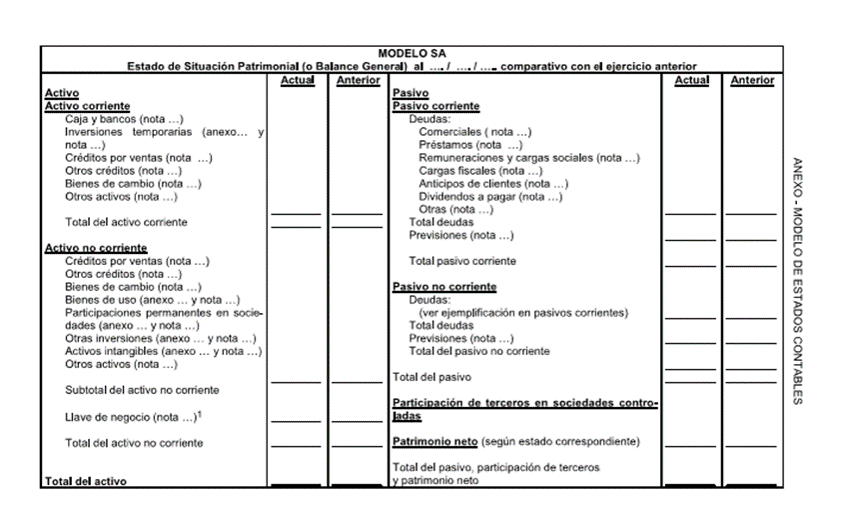

### INversiones temporales

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest

# Crear datos de ejemplo (reemplaza esto con tus datos reales)
data = {
    'rendimiento_promedio': [0.05, 0.06, 0.07, 0.08, 0.5, 0.09, 0.1],
    'volatilidad': [0.1, 0.12, 0.15, 0.18, 0.5, 0.2, 0.22],
    'numero_transacciones': [10, 12, 15, 18, 5, 20, 22]
}

df = pd.DataFrame(data)
df

2. Entrenamiento del modelo de detección de anomalías (Isolation Forest):

In [ ]:
# Entrenar el modelo Isolation Forest
model = IsolationForest(contamination=0.1)  # Contamination: proporción estimada de anomalías
model.fit(df)

# Predecir anomalías
anomalies = model.predict(df)

# Agregar la columna de anomalías al DataFrame
df['anomalia'] = anomalies

# Imprimir el DataFrame con las anomalías detectadas
print(df)



En la columna "anomalia", los valores -1 indican anomalías (posibles fraudes) y los valores 1 indican valores normales.
Explicación:

Este código utiliza el algoritmo Isolation Forest, que es eficaz para detectar anomalías en datos multidimensionales.
El parámetro "contamination" controla la proporción esperada de anomalías en los datos.
El modelo "aprende" los patrones normales en los datos y luego identifica los puntos de datos que se desvían significativamente de esos patrones.
Consideraciones importantes:

Este es un ejemplo simplificado. En un sistema de detección de fraude real, necesitarías:
Una gran cantidad de datos históricos de inversiones, incluyendo casos de fraude conocidos.
Preprocesamiento de datos más sofisticado, incluyendo la codificación de variables categóricas y la normalización de variables numéricas.
Evaluación rigurosa del modelo utilizando métricas como precisión, recuperación y F1-score.
Integración con sistemas de verificación de identidad y validación de transacciones.
Monitoreo continuo del rendimiento del modelo y reentrenamiento periódico para adaptarlo a las nuevas tendencias de fraude.
Es importante comprender que el aprendizaje automático es una herramienta, y la detección de fraude requiere una combinación de experiencia humana y análisis de datos.

##control inventarios

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest

# Crear datos de ejemplo (reemplaza esto con tus datos reales)
data = {
    'ajustes_inventario': [1, 2, 3, 4, 30, 5, 6],
    'rotacion_inventario': [10, 12, 15, 18, 5, 20, 22],
    'descuentos': [0, 0, 0, 1, 5, 0, 0]
}

df = pd.DataFrame(data)
df

2. Entrenamiento del modelo de detección de anomalías (Isolation Forest):

In [ ]:
# Entrenar el modelo Isolation Forest
model = IsolationForest(contamination=0.1)  # Contamination: proporción estimada de anomalías
model.fit(df)

# Predecir anomalías
anomalies = model.predict(df)

# Agregar la columna de anomalías al DataFrame
df['anomalia'] = anomalies

# Imprimir el DataFrame con las anomalías detectadas
print(df)

**3. Interpretación de resultados:**

En la columna "anomalia", los valores -1 indican anomalías (posibles fraudes) y los valores 1 indican valores normales.
Explicación:

Este código utiliza el algoritmo Isolation Forest, que es eficaz para detectar anomalías en datos multidimensionales.
El parámetro "contamination" controla la proporción esperada de anomalías en los datos.
El modelo "aprende" los patrones normales en los datos y luego identifica los puntos de datos que se desvían significativamente de esos patrones.
Consideraciones importantes:

Este es un ejemplo simplificado. En un sistema de detección de fraude real, necesitarías:
Una gran cantidad de datos históricos de inventario y transacciones, incluyendo casos de fraude conocidos.
Preprocesamiento de datos más sofisticado, incluyendo la codificación de variables categóricas y la normalización de variables numéricas.
Evaluación rigurosa del modelo utilizando métricas como precisión, recuperación y F1-score.
Integración con sistemas de gestión de inventario y bases de datos.
Monitoreo continuo del rendimiento del modelo y reentrenamiento periódico para adaptarlo a las nuevas tendencias de fraude.
Es importante comprender que el aprendizaje automático es una herramienta, y la detección de fraude requiere una combinación de experiencia humana y análisis de datos.

###otros activos

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest

# Crear datos de ejemplo (reemplaza esto con tus datos reales)
data = {
    'valor_intangibles': [100000, 120000, 150000, 180000, 500000, 200000, 220000],
    'depreciacion_activos_fijos': [10000, 12000, 15000, 18000, 50000, 20000, 22000],
    'rendimiento_inversiones': [0.05, 0.06, 0.07, 0.08, 0.5, 0.09, 0.1]
}

df = pd.DataFrame(data)
df

2. Entrenamiento del modelo de detección de anomalías (Isolation Forest):

In [ ]:
# Entrenar el modelo Isolation Forest
model = IsolationForest(contamination=0.1)  # Contamination: proporción estimada de anomalías
model.fit(df)

# Predecir anomalías
anomalies = model.predict(df)

# Agregar la columna de anomalías al DataFrame
df['anomalia'] = anomalies

# Imprimir el DataFrame con las anomalías detectadas
print(df)

**3. Interpretación de resultados:**

En la columna "anomalia", los valores -1 indican anomalías (posibles fraudes) y los valores 1 indican valores normales.
Explicación:

Este código utiliza el algoritmo Isolation Forest, que es eficaz para detectar anomalías en datos multidimensionales.
El parámetro "contamination" controla la proporción esperada de anomalías en los datos.
El modelo "aprende" los patrones normales en los datos y luego identifica los puntos de datos que se desvían significativamente de esos patrones.
Consideraciones importantes:

Este es un ejemplo simplificado. En un sistema de detección de fraude real, necesitarías:
Una gran cantidad de datos históricos de "otros activos", incluyendo casos de fraude conocidos.
Preprocesamiento de datos más sofisticado, incluyendo la codificación de variables categóricas y la normalización de variables numéricas.
Evaluación rigurosa del modelo utilizando métricas como precisión, recuperación y F1-score.
Integración con sistemas de contabilidad y bases de datos.
Monitoreo continuo del rendimiento del modelo y reentrenamiento periódico para adaptarlo a las nuevas tendencias de fraude.
Es importante comprender que el aprendizaje automático es una herramienta, y la detección de fraude requiere una combinación de experiencia humana y análisis de datos.
Recomendaciones Adicionales:

Análisis de tendencias:
Monitorear las tendencias en el valor de los activos intangibles, la depreciación de los activos fijos y el rendimiento de las inversiones a lo largo del tiempo.
Identificar cambios bruscos o inusuales en estas tendencias.
Análisis comparativo:
Comparar los datos de "otros activos" de la empresa con los de empresas similares en la misma industria.
Identificar diferencias significativas que puedan indicar un fraude.
Auditorías internas:
Realizar auditorías internas periódicas para verificar la exactitud de los registros relacionados con "otros activos".
Prestar especial atención a las áreas de mayor riesgo.
Control de acceso:
Limitar el acceso a los sistemas y registros relacionados con "otros activos" solo al personal autorizado.
Implementar controles de acceso sólidos para prevenir el acceso no autorizado.
Cultura de ética:
Fomentar una cultura de ética y transparencia en la empresa.
Proporcionar capacitación al personal sobre la prevención del fraude.
Recuerda que la prevención y detección de fraudes es un proceso continuo que requiere una combinación de tecnología, controles internos y experiencia humana.

## ACTIVOS INTANGIBLES

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest

# Crear datos de ejemplo (reemplaza esto con tus datos reales)
data = {
    'valor_intangible': [100000, 120000, 150000, 180000, 500000, 200000, 220000],
    'amortizacion_anual': [10000, 12000, 15000, 18000, 50000, 20000, 22000],
    'vida_util_estimada': [5, 5, 5, 5, 1, 5, 5]
}

df = pd.DataFrame(data)
df

2. Entrenamiento del modelo de detección de anomalías (Isolation Forest):

In [ ]:
# Entrenar el modelo Isolation Forest
model = IsolationForest(contamination=0.1)  # Contamination: proporción estimada de anomalías
model.fit(df)

# Predecir anomalías
anomalies = model.predict(df)

# Agregar la columna de anomalías al DataFrame
df['anomalia'] = anomalies

# Imprimir el DataFrame con las anomalías detectadas
print(df)

**3. Interpretación de resultados:**

En la columna "anomalia", los valores -1 indican anomalías (posibles fraudes) y los valores 1 indican valores normales.
Explicación:

Este código utiliza el algoritmo Isolation Forest, que es eficaz para detectar anomalías en datos multidimensionales.
El parámetro "contamination" controla la proporción esperada de anomalías en los datos.
El modelo "aprende" los patrones normales en los datos y luego identifica los puntos de datos que se desvían significativamente de esos patrones.
Consideraciones importantes:

Este es un ejemplo simplificado. En un sistema de detección de fraude real, necesitarías:
Una gran cantidad de datos históricos de valoraciones de activos intangibles, incluyendo casos de fraude conocidos.
Preprocesamiento de datos más sofisticado, incluyendo la codificación de variables categóricas y la normalización de variables numéricas.
Evaluación rigurosa del modelo utilizando métricas como precisión, recuperación y F1-score.
Integración con sistemas de contabilidad y bases de datos.
Monitoreo continuo del rendimiento del modelo y reentrenamiento periódico para adaptarlo a las nuevas tendencias de fraude.
Es importante comprender que el aprendizaje automático es una herramienta, y la detección de fraude requiere una combinación de experiencia humana y análisis de datos.
Recomendaciones Adicionales:

Análisis de tendencias:
Monitorear las tendencias en la valoración de los activos intangibles a lo largo del tiempo.
Identificar cambios bruscos o inusuales en estas tendencias.
Análisis comparativo:
Comparar la valoración de los activos intangibles de la empresa con la de empresas similares en la misma industria.
Identificar diferencias significativas que puedan indicar un fraude.
Revisión de la documentación:
Examinar la documentación de respaldo para la valoración de los activos intangibles, como informes de valoración y contratos.
Verificar la razonabilidad de las suposiciones y proyecciones utilizadas en la valoración.
Auditorías internas:
Realizar auditorías internas periódicas para verificar la exactitud de los registros relacionados con los activos intangibles.
Prestar especial atención a las áreas de mayor riesgo.
Control de acceso:
Limitar el acceso a los sistemas y registros relacionados con los activos intangibles solo al personal autorizado.
Implementar controles de acceso sólidos para prevenir el acceso no autorizado.
Cultura de ética:
Fomentar una cultura de ética y transparencia en la empresa.
Proporcionar capacitación al personal sobre la prevención del fraude.
Recuerda que la prevención y detección de fraudes es un proceso continuo que requiere una combinación de tecnología, controles internos y experiencia humana.

## otro algoritmo

In [ ]:
df

In [ ]:
df.anomalia.value_counts()

In [ ]:
## cambiar nombre de columna anomalia por fraude y sus valores
df.rename(columns={'anomalia': 'fraude'}, inplace=True)
df.fraude.value_counts()

In [ ]:
## cambiar el contenido de la columna de fraude por 0 y 1
df.fraude = df.fraude.map({-1:0,1:1})
df.fraude.value_counts()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

    # Supongamos que tienes tus datos en un DataFrame llamado 'df'
    # y la columna 'fraude' indica si hubo fraude (1) o no (0)

X = df.drop('fraude', axis=1)  # Características
y = df['fraude']  # Variable objetivo

    # Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Crear y entrenar el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

    # Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy}')

1. Cargar desde un archivo CSV:

Si tus datos están en un archivo CSV (valores separados por comas), puedes usar la función read_csv() de Pandas:

In [ ]:
import pandas as pd

df = pd.read_csv('nombre_del_archivo.csv')

# Para visualizar los primeros registros del DataFrame
print(df.head())

1. Cargar desde un archivo CSV:

Si tus datos están en un archivo CSV (valores separados por comas), puedes usar la función read_csv() de Pandas:

In [ ]:
import pandas as pd

df = pd.read_excel('nombre_del_archivo.xlsx', sheet_name='nombre_de_la_hoja') # puedes omitir sheet_name si solo hay una hoja

# Para visualizar los primeros registros del DataFrame
print(df.head())

3. Cargar desde una base de datos SQL:

Si tus datos están en una base de datos SQL, puedes usar la función read_sql() de Pandas junto con una conexión a la base de datos:

In [ ]:
import pandas as pd
import sqlite3 # o otro conector de base de datos como psycopg2 para PostgreSQL

# Establecer la conexión a la base de datos
conn = sqlite3.connect('nombre_de_la_base_de_datos.db')

# Ejecutar una consulta SQL y cargar los resultados en un DataFrame
query = 'SELECT * FROM nombre_de_la_tabla'
df = pd.read_sql(query, conn)

# Cerrar la conexión a la base de datos
conn.close()

# Para visualizar los primeros registros del DataFrame
print(df.head())

4. Cargar desde un diccionario de Python:

Si tus datos están en un diccionario de Python, puedes usar el constructor DataFrame() de Pandas:

In [ ]:
import pandas as pd

data = {
    'columna1': [1, 2, 3, 4, 5],
    'columna2': ['a', 'b', 'c', 'd', 'e'],
    'columna3': [True, False, True, False, True]
}

df = pd.DataFrame(data)

# Para visualizar los primeros registros del DataFrame
print(df.head())

5. Cargar desde un archivo JSON:

Si tus datos están en un archivo JSON, puedes usar la función read_json() de Pandas:

In [ ]:
import pandas as pd

df = pd.read_json('nombre_del_archivo.json')

# Para visualizar los primeros registros del DataFrame
print(df.head())

6. Cargar desde una lista de listas:

Si tus datos están en una lista de listas, puedes usar el constructor DataFrame() de Pandas:

In [ ]:
import pandas as pd

data = [
    [1, 'a', True],
    [2, 'b', False],
    [3, 'c', True],
    [4, 'd', False],
    [5, 'e', True]
]

df = pd.DataFrame(data, columns=['columna1', 'columna2', 'columna3']) # puedes especificar los nombres de las columnas

# Para visualizar los primeros registros del DataFrame
print(df.head())

Recomendaciones:

Asegúrate de que el archivo o la base de datos estén en la misma ubicación que tu script de Python, o especifica la ruta completa.
Si tienes problemas con la codificación de caracteres, puedes especificar el parámetro encoding en las funciones read_csv() y read_excel().
Si tienes datos faltantes, puedes usar el parámetro na_values en las funciones de lectura para especificar los valores que deben considerarse como faltantes.
Espero que esto te ayude a cargar tus datos en un DataFrame de Pandas.

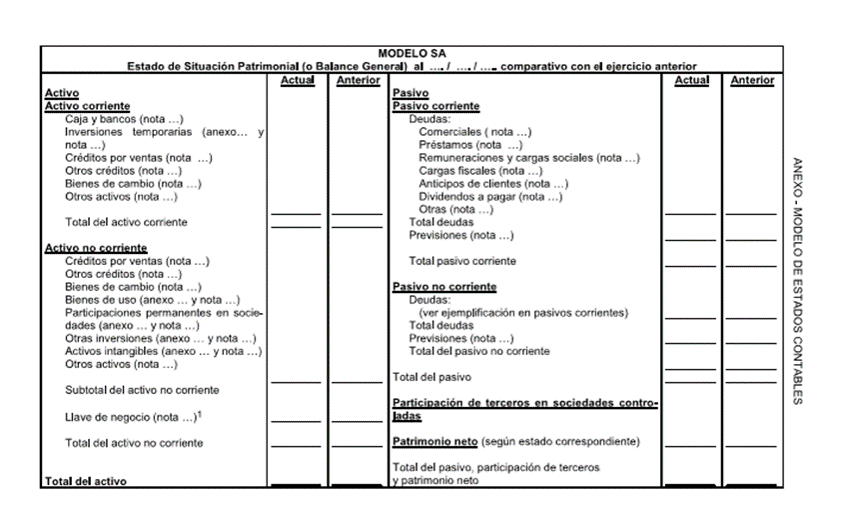

## proveedores

1. Preparación de datos (ejemplo simplificado)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest

# Crear datos de ejemplo (reemplaza esto con tus datos reales)
data = {
    'monto_promedio_facturas': [1000, 1200, 1500, 1800, 5000, 2000, 2200],
    'numero_facturas': [10, 12, 15, 18, 5, 20, 22],
    'dias_promedio_pago': [30, 30, 30, 30, 10, 30, 30]
}

df = pd.DataFrame(data)
df

2. Entrenamiento del modelo de detección de anomalías (Isolation Forest):

In [ ]:
# Entrenar el modelo Isolation Forest
model = IsolationForest(contamination=0.1)  # Contamination: proporción estimada de anomalías
model.fit(df)

# Predecir anomalías
anomalies = model.predict(df)

# Agregar la columna de anomalías al DataFrame
df['anomalia'] = anomalies

# Imprimir el DataFrame con las anomalías detectadas
print(df)

**3. Interpretación de resultados:**

En la columna "anomalia", los valores -1 indican anomalías (posibles fraudes) y los valores 1 indican valores normales.
Explicación:

Este código utiliza el algoritmo Isolation Forest, que es eficaz para detectar anomalías en datos multidimensionales.
El parámetro "contamination" controla la proporción esperada de anomalías en los datos.
El modelo "aprende" los patrones normales en los datos y luego identifica los puntos de datos que se desvían significativamente de esos patrones.
Consideraciones importantes:

Este es un ejemplo simplificado. En un sistema de detección de fraude real, necesitarías:
Una gran cantidad de datos históricos de proveedores, incluyendo casos de fraude conocidos.
Preprocesamiento de datos más sofisticado, incluyendo la codificación de variables categóricas y la normalización de variables numéricas.
Evaluación rigurosa del modelo utilizando métricas como precisión, recuperación y F1-score.
Integración con sistemas de gestión de proveedores y bases de datos.
Monitoreo continuo del rendimiento del modelo y reentrenamiento periódico para adaptarlo a las nuevas tendencias de fraude.
Es importante comprender que el aprendizaje automático es una herramienta, y la detección de fraude requiere una combinación de experiencia humana y análisis de datos.
Recomendaciones Adicionales:

Análisis de redes:
Analizar las relaciones entre proveedores y empleados para identificar posibles colusiones.
Utilizar herramientas de análisis de redes para visualizar y detectar patrones sospechosos.
Análisis de texto:
Analizar las descripciones de las facturas para detectar palabras clave o frases que puedan indicar fraude.
Utilizar técnicas de procesamiento de lenguaje natural (NLP) para extraer información relevante de los textos.
Alertas y notificaciones:
Configurar alertas para detectar transacciones sospechosas en tiempo real.
Enviar notificaciones a los responsables de la gestión de proveedores para que investiguen los casos sospechosos.
Auditorías internas:
Realizar auditorías internas periódicas para verificar la exactitud de los registros de proveedores.
Prestar especial atención a las áreas de mayor riesgo.
Control de acceso:
Limitar el acceso a los sistemas y registros relacionados con los proveedores solo al personal autorizado.
Implementar controles de acceso sólidos para prevenir el acceso no autorizado.
Cultura de ética:
Fomentar una cultura de ética y transparencia en la empresa.
Proporcionar capacitación al personal sobre la prevención del fraude.
Recuerda que la prevención y detección de fraudes es un proceso continuo que requiere una combinación de tecnología, controles internos y experiencia humana.

### prestamos obtenidos

In [ ]:
    import numpy as np
    import pandas as pd
    from sklearn.ensemble import IsolationForest

    # Crear datos de ejemplo (reemplaza esto con tus datos reales)
    data = {
        'ingresos': [50000, 60000, 70000, 80000, 10000, 90000, 100000],
        'puntaje_crediticio': [700, 750, 800, 850, 500, 900, 950],
        'monto_prestamo': [10000, 12000, 15000, 18000, 50000, 20000, 22000],
        'relacion_deuda_ingresos': [0.2, 0.3, 0.25, 0.35, 1.0, 0.2, 0.25]
    }

    df = pd.DataFrame(data)
    df

In [ ]:
  # Entrenar el modelo Isolation Forest
model = IsolationForest(contamination=0.1)  # Contamination: proporción estimada de anomalías
model.fit(df)

    # Predecir anomalías
anomalies = model.predict(df)

    # Agregar la columna de anomalías al DataFrame
df['anomalia'] = anomalies

    # Imprimir el DataFrame con las anomalías detectadas
print(df)

2. Entrenamiento del modelo de detección de anomalías (Isolation Forest):

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest

# Crear datos de ejemplo (reemplaza esto con tus datos reales)
data = {
    'ingresos': [50000, 60000, 70000, 80000, 10000, 90000, 100000],
    'puntaje_crediticio': [700, 750, 800, 850, 500, 900, 950],
    'monto_prestamo': [10000, 12000, 15000, 18000, 50000, 20000, 22000],
    'relacion_deuda_ingresos': [0.2, 0.3, 0.25, 0.35, 1.0, 0.2, 0.25]
}

df = pd.DataFrame(data)

# Entrenar el modelo Isolation Forest
model = IsolationForest(contamination=0.1)  # Contamination: proporción estimada de anomalías
model.fit(df)

# Predecir anomalías
anomalies = model.predict(df)

# Agregar la columna de anomalías al DataFrame
df['anomalia'] = anomalies

# Imprimir el DataFrame con las anomalías detectadas
print(df)

3. Interpretación de resultados:

En la columna "anomalia", los valores -1 indican anomalías (posibles fraudes) y los valores 1 indican valores normales.
Explicación:

Este código utiliza el algoritmo Isolation Forest, que es eficaz para detectar anomalías en datos multidimensionales.
El parámetro "contamination" controla la proporción esperada de anomalías en los datos.
El modelo "aprende" los patrones normales en los datos y luego identifica los puntos de datos que se desvían significativamente de esos patrones.
Consideraciones importantes:

Este es un ejemplo simplificado. En un sistema de detección de fraude real, necesitarías:
Una gran cantidad de datos históricos de solicitudes de préstamos, incluyendo casos de fraude conocidos.
Preprocesamiento de datos más sofisticado, incluyendo la codificación de variables categóricas y la normalización de variables numéricas.
Evaluación rigurosa del modelo utilizando métricas como precisión, recuperación y F1-score.
Integración con sistemas de verificación de identidad y validación de documentos.
Monitoreo continuo del rendimiento del modelo y reentrenamiento periódico para adaptarlo a las nuevas tendencias de fraude.
Es importante comprender que el aprendizaje automático es una herramienta, y la detección de fraude requiere una combinación de experiencia humana y análisis de datos.
Recomendaciones Adicionales:

Análisis de redes:
Analizar las relaciones entre solicitantes y otros actores (por ejemplo, empleados de la institución financiera) para identificar posibles colusiones.
Utilizar herramientas de análisis de redes para visualizar y detectar patrones sospechosos.
Análisis de texto:
Analizar los documentos presentados por los solicitantes para detectar inconsistencias o falsificaciones.
Utilizar técnicas de procesamiento de lenguaje natural (NLP) para extraer información relevante de los textos.
Alertas y notificaciones:
Configurar alertas para detectar transacciones sospechosas en tiempo real.
Enviar notificaciones a los responsables de la gestión de préstamos para que investiguen los casos sospechosos.
Auditorías internas:
Realizar auditorías internas periódicas para verificar la exactitud de los registros de préstamos.
Prestar especial atención a las áreas de mayor riesgo.
Control de acceso:
Limitar el acceso a los sistemas y registros relacionados con los préstamos solo al personal autorizado.
Implementar controles de acceso sólidos para prevenir el acceso no autorizado.
Cultura de ética:
Fomentar una cultura de ética y transparencia en la empresa.
Proporcionar capacitación al personal sobre la prevención del fraude.
Recuerda que la prevención y detección de fraudes es un proceso continuo que requiere una combinación de tecnología, controles internos y experiencia humana.

## remuneraciones y cargas sociales

1. Preparación de datos (ejemplo simplificado):

In [ ]:
    import numpy as np
    import pandas as pd
    from sklearn.ensemble import IsolationForest

    # Crear datos de ejemplo (reemplaza esto con tus datos reales)
    data = {
        'salario_promedio': [2000, 2200, 2500, 2800, 10000, 3000, 3200],
        'horas_extras_promedio': [10, 12, 15, 18, 50, 20, 22],
        'numero_cuentas_bancarias': [1, 1, 1, 1, 3, 1, 1],
        'cambios_direccion': [0, 0, 0, 1, 3, 0, 0]
    }

    df = pd.DataFrame(data)
    df

2. Entrenamiento del modelo de detección de anomalías (Isolation Forest):

In [ ]:
  # Entrenar el modelo Isolation Forest
model = IsolationForest(contamination=0.1)  # Contamination: proporción estimada de anomalías
model.fit(df)

    # Predecir anomalías
anomalies = model.predict(df)

    # Agregar la columna de anomalías al DataFrame
df['anomalia'] = anomalies

    # Imprimir el DataFrame con las anomalías detectadas
print(df)

3. Interpretación de resultados:

En la columna "anomalia", los valores -1 indican anomalías (posibles fraudes) y los valores 1 indican valores normales.
Explicación:

Este código utiliza el algoritmo Isolation Forest, que es eficaz para detectar anomalías en datos multidimensionales.
El parámetro "contamination" controla la proporción esperada de anomalías en los datos.
El modelo "aprende" los patrones normales en los datos y luego identifica los puntos de datos que se desvían significativamente de esos patrones.
Consideraciones importantes:

Este es un ejemplo simplificado. En un sistema de detección de fraude real, necesitarías:
Una gran cantidad de datos históricos de nómina y empleados, incluyendo casos de fraude conocidos.
Preprocesamiento de datos más sofisticado, incluyendo la codificación de variables categóricas y la normalización de variables numéricas.
Evaluación rigurosa del modelo utilizando métricas como precisión, recuperación y F1-score.
Integración con sistemas de gestión de nómina y bases de datos.
Monitoreo continuo del rendimiento del modelo y reentrenamiento periódico para adaptarlo a las nuevas tendencias de fraude.
Es importante comprender que el aprendizaje automático es una herramienta, y la detección de fraude requiere una combinación de experiencia humana y análisis de datos.
Recomendaciones Adicionales:

Análisis de redes:
Analizar las relaciones entre empleados para identificar posibles colusiones.
Utilizar herramientas de análisis de redes para visualizar y detectar patrones sospechosos.
Análisis de texto:
Analizar los registros de horas trabajadas para detectar inconsistencias o falsificaciones.
Utilizar técnicas de procesamiento de lenguaje natural (NLP) para extraer información relevante de los textos.
Alertas y notificaciones:
Configurar alertas para detectar transacciones sospechosas en tiempo real.
Enviar notificaciones a los responsables de la gestión de nómina para que investiguen los casos sospechosos.
Auditorías internas:
Realizar auditorías internas periódicas para verificar la exactitud de los registros de nómina.
Prestar especial atención a las áreas de mayor riesgo.
Control de acceso:
Limitar el acceso a los sistemas y registros relacionados con la nómina solo al personal autorizado.
Implementar controles de acceso sólidos para prevenir el acceso no autorizado.
Cultura de ética:
Fomentar una cultura de ética y transparencia en la empresa.
Proporcionar capacitación al personal sobre la prevención del fraude.
Recuerda que la prevención y detección de fraudes es un proceso continuo que requiere una combinación de tecnología, controles internos y experiencia humana.

## anticipo de clientes

1. Preparación de datos (ejemplo simplificado):

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest

# Crear datos de ejemplo (reemplaza esto con tus datos reales)
data = {
    'monto_anticipo_promedio': [1000, 1200, 1500, 1800, 5000, 2000, 2200],
    'numero_anticipos': [10, 12, 15, 18, 5, 20, 22],
    'dias_promedio_anticipo': [30, 30, 30, 30, 10, 30, 30],
    'descuentos_anticipo': [0, 0, 0, 1, 5, 0, 0]
}

df = pd.DataFrame(data)
df

2. Entrenamiento del modelo de detección de anomalías (Isolation Forest):

In [ ]:
# Entrenar el modelo Isolation Forest
model = IsolationForest(contamination=0.1)  # Contamination: proporción estimada de anomalías
model.fit(df)

# Predecir anomalías
anomalies = model.predict(df)

# Agregar la columna de anomalías al DataFrame
df['anomalia'] = anomalies

# Imprimir el DataFrame con las anomalías detectadas
print(df)

3. Interpretación de resultados:

En la columna "anomalia", los valores -1 indican anomalías (posibles fraudes) y los valores 1 indican valores normales.
Explicación:

Este código utiliza el algoritmo Isolation Forest, que es eficaz para detectar anomalías en datos multidimensionales.
El parámetro "contamination" controla la proporción esperada de anomalías en los datos.
El modelo "aprende" los patrones normales en los datos y luego identifica los puntos de datos que se desvían significativamente de esos patrones.
Consideraciones importantes:

Este es un ejemplo simplificado. En un sistema de detección de fraude real, necesitarías:
Una gran cantidad de datos históricos de anticipos de clientes, incluyendo casos de fraude conocidos.
Preprocesamiento de datos más sofisticado, incluyendo la codificación de variables categóricas y la normalización de variables numéricas.
Evaluación rigurosa del modelo utilizando métricas como precisión, recuperación y F1-score.
Integración con sistemas de gestión de clientes y bases de datos.
Monitoreo continuo del rendimiento del modelo y reentrenamiento periódico para adaptarlo a las nuevas tendencias de fraude.
Es importante comprender que el aprendizaje automático es una herramienta, y la detección de fraude requiere una combinación de experiencia humana y análisis de datos.
Recomendaciones Adicionales:

Análisis de redes:
Analizar las relaciones entre clientes y empleados para identificar posibles colusiones.
Utilizar herramientas de análisis de redes para visualizar y detectar patrones sospechosos.
Análisis de texto:
Analizar las descripciones de los anticipos para detectar palabras clave o frases que puedan indicar fraude.
Utilizar técnicas de procesamiento de lenguaje natural (NLP) para extraer información relevante de los textos.
Alertas y notificaciones:
Configurar alertas para detectar transacciones sospechosas en tiempo real.
Enviar notificaciones a los responsables de la gestión de anticipos para que investiguen los casos sospechosos.
Auditorías internas:
Realizar auditorías internas periódicas para verificar la exactitud de los registros de anticipos.
Prestar especial atención a las áreas de mayor riesgo.
Control de acceso:
Limitar el acceso a los sistemas y registros relacionados con los anticipos solo al personal autorizado.
Implementar controles de acceso sólidos para prevenir el acceso no autorizado.
Cultura de ética:
Fomentar una cultura de ética y transparencia en la empresa.
Proporcionar capacitación al personal sobre la prevención del fraude.
Recuerda que la prevención y detección de fraudes es un proceso continuo que requiere una combinación de tecnología, controles internos y experiencia humana.

## previsiones

1. Preparación de datos (ejemplo simplificado):

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest

    # Crear datos de ejemplo (reemplaza esto con tus datos reales)
data = {
        'ingresos_proyectados': [100000, 120000, 150000, 180000, 500000, 200000, 220000],
        'gastos_proyectados': [80000, 90000, 110000, 130000, 400000, 150000, 160000],
        'flujo_efectivo_proyectado': [20000, 30000, 40000, 50000, 100000, 50000, 60000],
        'variacion_ingresos_reales': [0.05, 0.06, 0.07, 0.08, 0.5, 0.09, 0.1]
    }

df = pd.DataFrame(data)
df

2. Entrenamiento del modelo de detección de anomalías (Isolation Forest):

In [ ]:
 # Entrenar el modelo Isolation Forest
model = IsolationForest(contamination=0.1)  # Contamination: proporción estimada de anomalías
model.fit(df)

    # Predecir anomalías
anomalies = model.predict(df)

    # Agregar la columna de anomalías al DataFrame
df['anomalia'] = anomalies

    # Imprimir el DataFrame con las anomalías detectadas
print(df)

3. Interpretación de resultados:

En la columna "anomalia", los valores -1 indican anomalías (posibles fraudes) y los valores 1 indican valores normales.
Explicación:

Este código utiliza el algoritmo Isolation Forest, que es eficaz para detectar anomalías en datos multidimensionales.
El parámetro "contamination" controla la proporción esperada de anomalías en los datos.
El modelo "aprende" los patrones normales en los datos y luego identifica los puntos de datos que se desvían significativamente de esos patrones.
Consideraciones importantes:

Este es un ejemplo simplificado. En un sistema de detección de fraude real, necesitarías:
Una gran cantidad de datos históricos de previsiones financieras, incluyendo casos de fraude conocidos.
Preprocesamiento de datos más sofisticado, incluyendo la codificación de variables categóricas y la normalización de variables numéricas.
Evaluación rigurosa del modelo utilizando métricas como precisión, recuperación y F1-score.
Integración con sistemas de contabilidad y bases de datos.
Monitoreo continuo del rendimiento del modelo y reentrenamiento periódico para adaptarlo a las nuevas tendencias de fraude.
Es importante comprender que el aprendizaje automático es una herramienta, y la detección de fraude requiere una combinación de experiencia humana y análisis de datos.
Recomendaciones Adicionales:

Análisis de tendencias:
Monitorear las tendencias en las previsiones a lo largo del tiempo.
Identificar cambios bruscos o inusuales en estas tendencias.
Análisis comparativo:
Comparar las previsiones de la empresa con las de empresas similares en la misma industria.
Identificar diferencias significativas que puedan indicar un fraude.
Revisión de la documentación:
Examinar la documentación de respaldo para las previsiones, como modelos financieros y supuestos.
Verificar la razonabilidad de las suposiciones y proyecciones utilizadas.
Auditorías internas:
Realizar auditorías internas periódicas para verificar la exactitud de las previsiones.
Prestar especial atención a las áreas de mayor riesgo.
Control de acceso:
Limitar el acceso a los sistemas y registros relacionados con las previsiones solo al personal autorizado.
Implementar controles de acceso sólidos para prevenir el acceso no autorizado.
Cultura de ética:
Fomentar una cultura de ética y transparencia en la empresa.
Proporcionar capacitación al personal sobre la prevención del fraude.
Recuerda que la prevención y detección de fraudes es un proceso continuo que requiere una combinación de tecnología, controles internos y experiencia humana.

### remuneraciones pagadas

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest

    # Crear datos de ejemplo (reemplaza esto con tus datos reales)
data = {
        'salario_declarado': [2000, 2200, 2500, 2800, 10000, 3000, 3200],
        'horas_trabajadas': [160, 160, 160, 160, 80, 160, 160],
        'antiguedad_laboral': [1, 2, 3, 4, 10, 5, 6],
        'descuentos_aportes': [400, 440, 500, 560, 2000, 600, 640]
    }

df = pd.DataFrame(data)
df

2. Entrenamiento del modelo de detección de anomalías (Isolation Forest):

In [ ]:
   # Entrenar el modelo Isolation Forest
model = IsolationForest(contamination=0.1)  # Contamination: proporción estimada de anomalías
model.fit(df)

    # Predecir anomalías
anomalies = model.predict(df)

    # Agregar la columna de anomalías al DataFrame
df['anomalia'] = anomalies

    # Imprimir el DataFrame con las anomalías detectadas
print(df)

In [ ]:
!pip install pycaret

In [ ]:
from pycaret.anomaly import *

In [ ]:
anomaly = setup(df, normalize = True)

In [ ]:
models()

In [ ]:
iforest = create_model('iforest')
iforest

In [ ]:
anomalias = assign_model(iforest)
anomalias

In [ ]:
knn = create_model('knn')
knn

In [ ]:
anomalias1 = assign_model(knn)
anomalias1

In [ ]:
pca = create_model('pca')
pca

In [ ]:
anomalias2 = assign_model(pca)
anomalias2

In [ ]:
df

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

    # Supongamos que tienes tus datos en un DataFrame llamado 'df'
    # y la columna 'fraude' indica si hubo fraude (1) o no (0)

    X = df.drop('fraude', axis=1)  # Características
    y = df['fraude']  # Variable objetivo

    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Crear y entrenar el modelo de regresión logística
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Evaluar la precisión del modelo
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Precisión del modelo: {accuracy}')

Árboles de Decisión:

Los árboles de decisión son algoritmos que dividen los datos en ramas basadas en diferentes variables.
Son fáciles de interpretar y pueden manejar tanto datos numéricos como categóricos.
Puedes usar árboles de decisión para identificar reglas que son indicativas de fraude.

3. Bosques Aleatorios:

Los bosques aleatorios son un conjunto de árboles de decisión que trabajan juntos para mejorar la precisión de la predicción.
Son más robustos que los árboles de decisión individuales y pueden manejar grandes conjuntos de datos.
Los bosques aleatorios son una buena opción cuando tienes datos complejos y deseas una alta precisión.

00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

**Capítulo 1: La Problemática del Fraude y la Corrupción en la Sociedad Actual**
1.1 Definición y Tipos de Fraude
1.2 Definición y Manifestaciones de la Corrupción
1.3 Impacto Económico y Social del Fraude y la Corrupción
1.4 La Necesidad de Nuevas Herramientas para Combatir el Fraude y la Corrupción


Imaginemos que queremos analizar un conjunto de datos muy simplificado que contenga información sobre transacciones sospechosas o denuncias de corrupción. Este ejemplo ilustrará cómo podríamos comenzar a procesar y visualizar información para entender mejor la problemática.

**Contexto del Ejemplo:**

Supongamos que tenemos un archivo CSV (o una lista de diccionarios en Python) con la siguiente información simplificada:

Tipo: (Ej: Transacción Bancaria, Denuncia de Corrupción)
Descripción: (Breve descripción del evento)
Monto: (En una unidad monetaria)
Fecha: (Fecha del evento)
Estado: (Ej: Sospechoso, Investigado, Confirmado)

Tipos de Eventos:
Tipo
Transacción Bancaria      4
Denuncia de Corrupción    2
Name: count, dtype: int64

Ejemplos de Descripciones:
                     Tipo                                 Descripción
0    Transacción Bancaria  Transferencia inusual a cuenta desconocida
1  Denuncia de Corrupción   Denuncia de soborno a funcionario público
2    Transacción Bancaria         Retiro de gran cantidad en efectivo
3  Denuncia de Corrupción          Denuncia de malversación de fondos
4    Transacción Bancaria                    Compra sospechosa online
5    Transacción Bancaria              Transferencia a paraíso fiscal

Análisis de Montos (Impacto Económico Potencial):
Monto Total de Eventos Sospechosos: 105750
Monto Total de Eventos Investigados: 255000


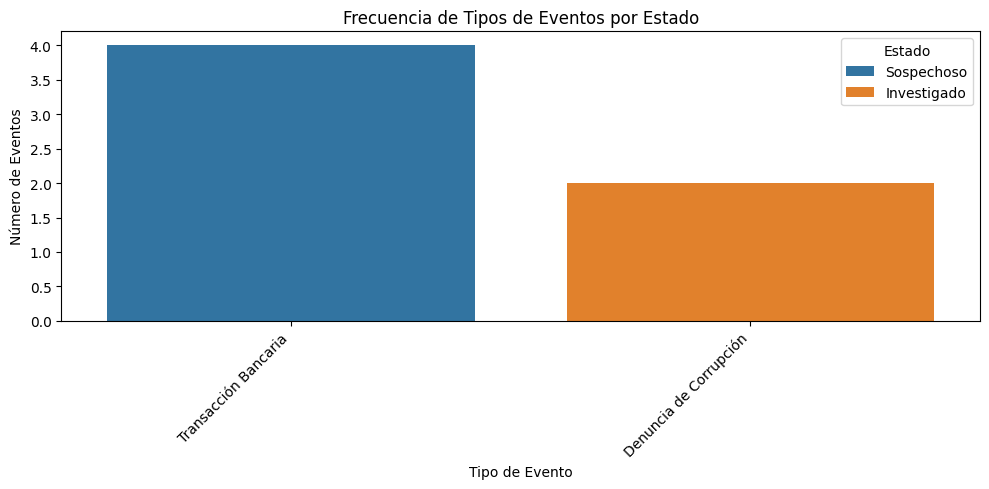

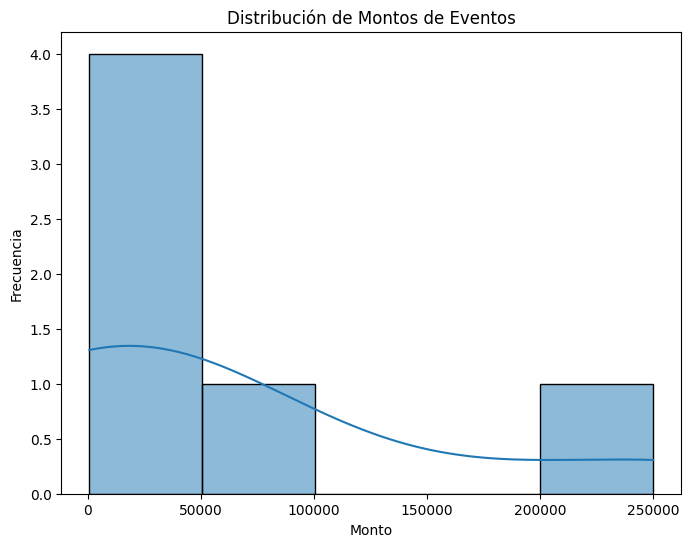

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Datos de ejemplo (simulados)
data = {
    'Tipo': ['Transacción Bancaria', 'Denuncia de Corrupción', 'Transacción Bancaria', 'Denuncia de Corrupción', 'Transacción Bancaria', 'Transacción Bancaria'],
    'Descripción': ['Transferencia inusual a cuenta desconocida', 'Denuncia de soborno a funcionario público', 'Retiro de gran cantidad en efectivo', 'Denuncia de malversación de fondos', 'Compra sospechosa online', 'Transferencia a paraíso fiscal'],
    'Monto': [15000, 5000, 10000, 250000, 750, 80000],
    'Fecha': ['2023-10-26', '2024-01-15', '2023-11-05', '2024-03-10', '2024-02-20', '2024-03-01'],
    'Estado': ['Sospechoso', 'Investigado', 'Sospechoso', 'Investigado', 'Sospechoso', 'Sospechoso']
}

df = pd.DataFrame(data)

# 1.1 Definición y Tipos de Fraude / 1.2 Definición y Manifestaciones de la Corrupción
# Podemos categorizar los datos según el tipo y la descripción para entender las manifestaciones.

print("Tipos de Eventos:")
print(df['Tipo'].value_counts())
print("\nEjemplos de Descripciones:")
print(df[['Tipo', 'Descripción']])

# 1.3 Impacto Económico y Social del Fraude y la Corrupción
# Podemos analizar los montos para tener una idea del impacto económico (simplificado).

print("\nAnálisis de Montos (Impacto Económico Potencial):")
print("Monto Total de Eventos Sospechosos:", df[df['Estado'] == 'Sospechoso']['Monto'].sum())
print("Monto Total de Eventos Investigados:", df[df['Estado'] == 'Investigado']['Monto'].sum())

# 1.4 La Necesidad de Nuevas Herramientas para Combatir el Fraude y la Corrupción
# Visualización básica para ilustrar la frecuencia de los tipos de eventos y su estado.

plt.figure(figsize=(10, 5))
sns.countplot(x='Tipo', hue='Estado', data=df)
plt.title('Frecuencia de Tipos de Eventos por Estado')
plt.xlabel('Tipo de Evento')
plt.ylabel('Número de Eventos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(df['Monto'], bins=5, kde=True)
plt.title('Distribución de Montos de Eventos')
plt.xlabel('Monto')
plt.ylabel('Frecuencia')
plt.show()

Explicación del Código:
**texto en negrita**
Importación de Librerías:

pandas se utiliza para crear y manipular un DataFrame, que es una estructura de datos tabular.
matplotlib.pyplot y seaborn se utilizan para crear visualizaciones básicas.
Datos de Ejemplo:

Se crea un diccionario data que simula un pequeño conjunto de datos con información relevante sobre posibles fraudes y casos de corrupción.
Creación del DataFrame:

pd.DataFrame(data) convierte el diccionario en un DataFrame de pandas para facilitar el análisis.
Análisis Conceptual (1.1 y 1.2):

df['Tipo'].value_counts() muestra la frecuencia de cada tipo de evento (Transacción Bancaria, Denuncia de Corrupción), ayudando a entender la distribución de los casos.
df[['Tipo', 'Descripción']] muestra una vista de los tipos de eventos y sus descripciones, ilustrando las diferentes manifestaciones de fraude y corrupción.
Análisis del Impacto Económico (1.3):

Se calcula la suma de los montos asociados a eventos clasificados como "Sospechoso" e "Investigado" para dar una idea del impacto económico potencial, aunque este es un análisis muy superficial y simplificado.
Visualización (1.4 - Necesidad de Nuevas Herramientas):

sns.countplot() crea un gráfico de barras que muestra la frecuencia de cada tipo de evento, segmentado por su estado (Sospechoso, Investigado). Esto ilustra visualmente la presencia de diferentes tipos de problemas.
sns.histplot() crea un histograma de los montos de los eventos, lo que puede ayudar a visualizar la distribución de los montos involucrados.
Cómo se relaciona con el Capítulo 1:

Este código, aunque básico, ilustra cómo podríamos comenzar a:

Identificar diferentes "Tipos de Fraude" y "Manifestaciones de la Corrupción" (secciones 1.1 y 1.2) al analizar la columna "Tipo" y la columna "Descripción".
Evaluar el "Impacto Económico" (sección 1.3) de manera muy rudimentaria al sumar los montos.
Visualizar la "Necesidad de Nuevas Herramientas" (sección 1.4) al mostrar que incluso con un pequeño conjunto de datos, la información puede ser compleja y requerir herramientas más sofisticadas (como algoritmos) para identificar patrones y tendencias de manera más efectiva. Las visualizaciones básicas sugieren que hay problemas que requieren una investigación más profunda.
Limitaciones de este Ejemplo:

Datos Simplificados: Los datos son simulados y muy limitados.
Análisis Básico: El análisis es muy superficial y no utiliza algoritmos complejos.
No Predice: No predice futuros fraudes o actos de corrupción.
No Detecta Patrones Complejos: No identifica patrones que podrían ser revelados por algoritmos más avanzados.
Conclusión:

Este ejemplo de código en Python proporciona una ilustración conceptual de cómo se podría comenzar a analizar información relacionada con el fraude y la corrupción. Sin embargo, para una aplicación real y efectiva de los conceptos del Capítulo 1, se requeriría el uso de algoritmos más sofisticados que se abordarán en los capítulos siguientes, capaces de procesar grandes volúmenes de datos, identificar patrones complejos y predecir posibles actividades ilícitas. Este ejemplo sienta las bases para entender que el análisis de datos es el primer paso, y los algoritmos son las herramientas que potenciarán ese análisis.

In [ ]:
import pandas as pd

data = {
    'Tipo': ['Transacción Bancaria', 'Denuncia de Corrupción', 'Transacción Bancaria', 'Denuncia de Corrupción', 'Transacción Bancaria', 'Transacción Bancaria'],
    'Descripción': ['Transferencia inusual a cuenta desconocida', 'Denuncia de soborno a funcionario público', 'Retiro de gran cantidad en efectivo', 'Denuncia de malversación de fondos', 'Compra sospechosa online', 'Transferencia a paraíso fiscal'],
    'Monto': [15000, 5000, 10000, 250000, 750, 80000],
    'Fecha': ['2023-10-26', '2024-01-15', '2023-11-05', '2024-03-10', '2024-02-20', '2024-03-01'],
    'Estado': ['Sospechoso', 'Investigado', 'Sospechoso', 'Investigado', 'Sospechoso', 'Sospechoso']
}

df = pd.DataFrame(data)
df

,Tipo,Descripción,Monto,Fecha,Estado
0,Transacción Bancaria,Transferencia inusual a cuenta desconocida,15000,2023-10-26,Sospechoso
1,Denuncia de Corrupción,Denuncia de soborno a funcionario público,5000,2024-01-15,Investigado
2,Transacción Bancaria,Retiro de gran cantidad en efectivo,10000,2023-11-05,Sospechoso
3,Denuncia de Corrupción,Denuncia de malversación de fondos,250000,2024-03-10,Investigado
4,Transacción Bancaria,Compra sospechosa online,750,2024-02-20,Sospechoso
5,Transacción Bancaria,Transferencia a paraíso fiscal,80000,2024-03-01,Sospechoso


Nuevo Análisis:

**Análisis Temporal (1.3 Impacto Económico y Social): Podemos analizar la evolución de los eventos sospechosos a lo largo del tiempo.**

In [ ]:
df['Fecha'] = pd.to_datetime(df['Fecha'])
df_sorted = df.sort_values(by='Fecha')
print("\nEventos Sospechosos por Fecha:")
print(df_sorted[df_sorted['Estado'] == 'Sospechoso'][['Fecha', 'Descripción', 'Monto']])


Eventos Sospechosos por Fecha:
       Fecha                                 Descripción  Monto
0 2023-10-26  Transferencia inusual a cuenta desconocida  15000
2 2023-11-05         Retiro de gran cantidad en efectivo  10000
4 2024-02-20                    Compra sospechosa online    750
5 2024-03-01              Transferencia a paraíso fiscal  80000


**Agrupación por Tipo y Estado (1.1 y 1.2): Podemos ver cuántos eventos de cada tipo están en cada estado.**


In [ ]:
print("\nConteo de Eventos por Tipo y Estado:")
print(df.groupby(['Tipo', 'Estado']).size().reset_index(name='Conteo'))


Conteo de Eventos por Tipo y Estado:
                     Tipo       Estado  Conteo
0  Denuncia de Corrupción  Investigado       2
1    Transacción Bancaria   Sospechoso       4


**Identificación de "Bandera Roja" (1.1 y 1.2): Podemos buscar patrones o montos que podrían considerarse "banderas rojas" o indicadores de posibles problemas.**

In [ ]:
umbral_monto_alto = 50000
print("\nEventos con Montos Altos (Potencialmente Significativos):")
print(df[df['Monto'] > umbral_monto_alto][['Tipo', 'Descripción', 'Monto', 'Estado']])


Eventos con Montos Altos (Potencialmente Significativos):
                     Tipo                         Descripción   Monto  \
3  Denuncia de Corrupción  Denuncia de malversación de fondos  250000   
5    Transacción Bancaria      Transferencia a paraíso fiscal   80000   

        Estado  
3  Investigado  
5   Sospechoso  


**Análisis de Palabras Clave en la Descripción (Conceptual para 1.1 y 1.2): Aunque no es un análisis NLP avanzado, podemos buscar palabras clave que sugieran fraude o corrupción.**

In [ ]:
palabras_clave_fraude = ['transferencia inusual', 'retiro efectivo', 'compra sospechosa', 'paraíso fiscal']
palabras_clave_corrupcion = ['soborno', 'malversación', 'funcionario público']

def identificar_palabras_clave(row, palabras):
    for palabra in palabras:
        if palabra.lower() in row['Descripción'].lower():
            return True
    return False

df['Es_Fraude'] = df.apply(lambda row: identificar_palabras_clave(row, palabras_clave_fraude), axis=1)
df['Es_Corrupcion'] = df.apply(lambda row: identificar_palabras_clave(row, palabras_clave_corrupcion), axis=1)

print("\nIdentificación de Palabras Clave en Descripción:")
print(df[['Descripción', 'Es_Fraude', 'Es_Corrupcion']])


Identificación de Palabras Clave en Descripción:
                                  Descripción  Es_Fraude  Es_Corrupcion
0  Transferencia inusual a cuenta desconocida       True          False
1   Denuncia de soborno a funcionario público      False           True
2         Retiro de gran cantidad en efectivo      False          False
3          Denuncia de malversación de fondos      False           True
4                    Compra sospechosa online       True          False
5              Transferencia a paraíso fiscal       True          False


Explicación del Nuevo Código:

**Análisis Temporal:**

Convertimos la columna 'Fecha' al tipo de dato datetime para poder ordenarla.
Ordenamos el DataFrame por fecha para ver la secuencia de eventos sospechosos.
Agrupación por Tipo y Estado:

df.groupby(['Tipo', 'Estado']).size() agrupa el DataFrame por las columnas 'Tipo' y 'Estado' y cuenta el número de ocurrencias en cada grupo.
.reset_index(name='Conteo') convierte el resultado agrupado en un DataFrame más legible.
Identificación de "Bandera Roja":

Definimos un umbral_monto_alto.
Filtramos el DataFrame para mostrar solo los eventos cuyo 'Monto' supera este umbral, resaltando transacciones potencialmente significativas.
Análisis de Palabras Clave:

Definimos dos listas de palabras_clave relacionadas con fraude y corrupción.
La función identificar_palabras_clave verifica si alguna de las palabras clave se encuentra en la columna 'Descripción' de una fila.
Aplicamos esta función a cada fila del DataFrame utilizando df.apply() para crear dos nuevas columnas booleanas: 'Es_Fraude' y 'Es_Corrupcion'.
Cómo se relaciona con el Capítulo 1 (Revisión):

1.1 Definición y Tipos de Fraude / 1.2 Definición y Manifestaciones de la Corrupción: El análisis de palabras clave y la agrupación por tipo y descripción ayudan a categorizar las diferentes manifestaciones de fraude y corrupción presentes en los datos de ejemplo.
1.3 Impacto Económico y Social: El análisis de los montos y la identificación de eventos con montos altos dan una idea del impacto económico potencial, aunque limitado por el tamaño del dataset. El análisis temporal podría ayudar a identificar si los eventos sospechosos están aumentando o disminuyendo.
1.4 La Necesidad de Nuevas Herramientas: Aunque este análisis es básico, resalta la necesidad de herramientas más sofisticadas (algoritmos) para:
Analizar automáticamente grandes volúmenes de texto (para una identificación más precisa de palabras clave y patrones).
Identificar patrones complejos en las fechas, los montos y los tipos de eventos.
Realizar análisis predictivos para anticipar futuros casos de fraude o corrupción.
Conclusión del Nuevo Análisis:

Este segundo análisis, aunque aún con datos limitados, demuestra cómo se pueden aplicar diferentes enfoques para extraer información relevante del mismo dataset. Vemos cómo podemos:

Organizar la información temporalmente.
Categorizar los eventos por tipo y estado.
Identificar valores atípicos o "banderas rojas" basadas en el monto.
Realizar un análisis textual básico para identificar posibles indicios de fraude y corrupción.
Estos pasos iniciales son análogos a lo que un sistema más complejo basado en algoritmos haría de manera automatizada y a mayor escala, proporcionando una comprensión más profunda y detallada de la problemática del fraude y la corrupción. La necesidad de algoritmos sofisticados se hace evidente al considerar la complejidad de los datos reales y la necesidad de una detección más precisa y eficiente.

**Capítulo 2: Introducción a los Algoritmos y la Inteligencia Artificial**
2.1 ¿Qué son los Algoritmos? Conceptos Básicos
2.2 Tipos de Algoritmos Relevantes para la Detección de Fraude y Corrupción
2.3 Introducción a la Inteligencia Artificial y el Aprendizaje Automático (Machine Learning)
2.4 Ética y Sesgos en los Algoritmos



Un Algoritmo Simple: Un algoritmo para encontrar el número mayor en una lista. **texto en negrita**
Tipos de Algoritmos Relevantes (Conceptualmente):
Clasificación: Un ejemplo muy básico de cómo clasificar datos.
Agrupamiento (Clustering): Una demostración de cómo agrupar datos similares.

In [ ]:
import random
from collections import defaultdict

# 2.1 ¿Qué son los Algoritmos? Conceptos Básicos

def encontrar_mayor(lista):
    """Algoritmo para encontrar el número mayor en una lista."""
    if not lista:
        return None
    mayor = lista[0]
    for numero in lista:
        if numero > mayor:
            mayor = numero
    return mayor

# Ejemplo de uso
numeros = [5, 2, 8, 1, 9, 4]
mayor_numero = encontrar_mayor(numeros)
print(f"\n2.1 Algoritmo Simple: El número mayor en {numeros} es: {mayor_numero}")

# 2.2 Tipos de Algoritmos Relevantes para la Detección de Fraude y Corrupción

# Ejemplo muy básico de Clasificación (simulando una clasificación simple)
def clasificar_transaccion(monto):
    """Clasifica una transacción como 'Baja', 'Media' o 'Alta'."""
    if monto < 100:
        return 'Baja'
    elif monto < 1000:
        return 'Media'
    else:
        return 'Alta'

transacciones = [50, 500, 1500, 20, 1200]
print("\n2.2 Ejemplo Básico de Clasificación:")
for monto in transacciones:
    print(f"La transacción de ${monto} es clasificada como: {clasificar_transaccion(monto)}")

# Ejemplo muy básico de Agrupamiento (simulando agrupar datos similares)
def agrupar_por_rango(valor, rangos):
    """Agrupa un valor en un rango predefinido."""
    for rango, etiqueta in rangos.items():
        if valor in rango:
            return etiqueta
    return 'Otro'

valores = [10, 25, 110, 500, 1005, 15]
rangos_agrupamiento = {
    range(0, 50): 'Grupo A',
    range(50, 500): 'Grupo B',
    range(500, 1000): 'Grupo C'
}
print("\n2.2 Ejemplo Básico de Agrupamiento:")
for valor in valores:
    grupo = agrupar_por_rango(valor, rangos_agrupamiento)
    print(f"El valor {valor} pertenece al grupo: {grupo}")

# 2.3 Introducción a la Inteligencia Artificial y el Aprendizaje Automático (Machine Learning)
# Ejemplo conceptual de cómo un algoritmo podría "aprender" (muy simplificado)

# Simulación de datos etiquetados (fraudulento o no)
datos_entrenamiento = [
    {'monto': 100, 'frecuencia': 1, 'etiqueta': 'No Fraudulento'},
    {'monto': 5000, 'frecuencia': 1, 'etiqueta': 'Fraudulento'},
    {'monto': 200, 'frecuencia': 3, 'etiqueta': 'No Fraudulento'},
    {'monto': 7000, 'frecuencia': 2, 'etiqueta': 'Fraudulento'},
    {'monto': 150, 'frecuencia': 2, 'etiqueta': 'No Fraudulento'}
]

# Un modelo muy simplificado (si el monto es alto y la frecuencia baja, es fraudulento)
def modelo_aprendizaje_simple(transaccion):
    if transaccion['monto'] > 4000 and transaccion['frecuencia'] < 3:
        return 'Posiblemente Fraudulento'
    else:
        return 'No Sospechoso'

print("\n2.3 Ejemplo Conceptual de Aprendizaje Automático (Muy Simplificado):")
transaccion_nueva = {'monto': 6000, 'frecuencia': 1}
resultado = modelo_aprendizaje_simple(transaccion_nueva)
print(f"La transacción {transaccion_nueva} se clasifica como: {resultado}")

transaccion_nueva_2 = {'monto': 300, 'frecuencia': 5}
resultado_2 = modelo_aprendizaje_simple(transaccion_nueva_2)
print(f"La transacción {transaccion_nueva_2} se clasifica como: {resultado_2}")

# 2.4 Ética y Sesgos en los Algoritmos
# Ejemplo conceptual de cómo un sesgo en los datos podría afectar un modelo (muy simplificado)

# Datos de entrenamiento con un sesgo (más transacciones 'altas' para un tipo de usuario)
datos_sesgados = [
    {'tipo_usuario': 'A', 'monto': 100, 'etiqueta': 'No Fraudulento'},
    {'tipo_usuario': 'B', 'monto': 5000, 'etiqueta': 'Fraudulento'},
    {'tipo_usuario': 'A', 'monto': 200, 'etiqueta': 'No Fraudulento'},
    {'tipo_usuario': 'B', 'monto': 7000, 'etiqueta': 'Fraudulento'},
    {'tipo_usuario': 'A', 'monto': 150, 'etiqueta': 'No Fraudulento'},
    {'tipo_usuario': 'B', 'monto': 1000, 'etiqueta': 'No Fraudulento'} # Menos ejemplos de 'No Fraudulento' para B
]

def modelo_sesgado_simple(transaccion):
    if transaccion['tipo_usuario'] == 'B' and transaccion['monto'] > 800:
        return 'Sospechoso'
    else:
        return 'No Sospechoso'

print("\n2.4 Ejemplo Conceptual de Sesgo en Algoritmos (Muy Simplificado):")
transaccion_usuario_a = {'tipo_usuario': 'A', 'monto': 900}
resultado_a = modelo_sesgado_simple(transaccion_usuario_a)
print(f"Transacción usuario A ({transaccion_usuario_a}): {resultado_a}")

transaccion_usuario_b = {'tipo_usuario': 'B', 'monto': 900}
resultado_b = modelo_sesgado_simple(transaccion_usuario_b)
print(f"Transacción usuario B ({transaccion_usuario_b}): {resultado_b}")


2.1 Algoritmo Simple: El número mayor en [5, 2, 8, 1, 9, 4] es: 9

2.2 Ejemplo Básico de Clasificación:
La transacción de $50 es clasificada como: Baja
La transacción de $500 es clasificada como: Media
La transacción de $1500 es clasificada como: Alta
La transacción de $20 es clasificada como: Baja
La transacción de $1200 es clasificada como: Alta

2.2 Ejemplo Básico de Agrupamiento:
El valor 10 pertenece al grupo: Grupo A
El valor 25 pertenece al grupo: Grupo A
El valor 110 pertenece al grupo: Grupo B
El valor 500 pertenece al grupo: Grupo C
El valor 1005 pertenece al grupo: Otro
El valor 15 pertenece al grupo: Grupo A

2.3 Ejemplo Conceptual de Aprendizaje Automático (Muy Simplificado):
La transacción {'monto': 6000, 'frecuencia': 1} se clasifica como: Posiblemente Fraudulento
La transacción {'monto': 300, 'frecuencia': 5} se clasifica como: No Sospechoso

2.4 Ejemplo Conceptual de Sesgo en Algoritmos (Muy Simplificado):
Transacción usuario A ({'tipo_usuario': 'A', 'monto': 900}): N



**Algoritmo Simple (encontrar_mayor):**

Este es un algoritmo básico que itera a través de una lista y compara cada elemento con el mayor encontrado hasta el momento. Ilustra la idea de un conjunto de pasos definidos para resolver un problema.
Ejemplo Básico de Clasificación (clasificar_transaccion):

Define una función que asigna una etiqueta ('Baja', 'Media', 'Alta') a una transacción según su monto. Esto es una simplificación de un algoritmo de clasificación.
Ejemplo Básico de Agrupamiento (agrupar_por_rango):

Define una función que asigna un grupo a un valor numérico según el rango en el que se encuentre. Esto ilustra la idea de agrupar datos similares.
Ejemplo Conceptual de Aprendizaje Automático (modelo_aprendizaje_simple):

Simula un proceso de aprendizaje muy básico donde, a partir de datos de entrenamiento etiquetados, se define una regla simple para predecir si una transacción es fraudulenta. Esto introduce la idea de que los algoritmos pueden aprender de los datos.
Ejemplo Conceptual de Sesgo en Algoritmos (modelo_sesgado_simple):

Muestra cómo un modelo simple, entrenado implícitamente con datos que podrían tener una distribución desigual, podría generar resultados sesgados. En este caso, el modelo podría sospechar más de las transacciones del "tipo_usuario" 'B' simplemente porque los datos de entrenamiento tienen una mayor proporción de transacciones de monto alto asociadas a ese tipo.
Cómo se relaciona con el Capítulo 2:

2.1 ¿Qué son los Algoritmos? Conceptos Básicos: El ejemplo de encontrar_mayor ilustra la idea de un conjunto de pasos definidos para resolver un problema.
2.2 Tipos de Algoritmos Relevantes: Los ejemplos de clasificar_transaccion y agrupar_por_rango son representaciones muy simplificadas de algoritmos de clasificación y agrupamiento, respectivamente, que se mencionan como relevantes para la detección de fraude y corrupción.
2.3 Introducción a la Inteligencia Artificial y el Aprendizaje Automático: El ejemplo de modelo_aprendizaje_simple introduce de manera conceptual la idea de que un algoritmo puede "aprender" de los datos para hacer predicciones.
2.4 Ética y Sesgos en los Algoritmos: El ejemplo de modelo_sesgado_simple ilustra cómo los sesgos en los datos de entrenamiento pueden llevar a que un algoritmo tome decisiones sesgadas.
Limitaciones de este Código:

Muy Simplificado: Los ejemplos son intencionalmente muy básicos para ilustrar los conceptos de manera sencilla. Los algoritmos reales de detección de fraude y corrupción son mucho más complejos.
No Implementa Algoritmos Reales: No implementa algoritmos de clasificación, agrupamiento o aprendizaje automático sofisticados. Simplemente muestra la idea detrás de ellos.
Datos Simulados: Los datos de entrenamiento y prueba son simulados y no representan datos reales de fraude.
Conclusión:

Este código proporciona una introducción práctica y conceptual a los temas del Capítulo 2. Muestra cómo se pueden definir algoritmos simples, cómo se pueden simular los principios de clasificación y agrupamiento, y cómo se puede entender de forma básica la idea del aprendizaje automático y los sesgos algorítmicos. Sirve como un punto de partida para comprender que los algoritmos son conjuntos de instrucciones que pueden analizar datos y tomar decisiones, y que en el contexto de la IA, estos algoritmos pueden aprender de los datos, pero también pueden heredar sesgos presentes en ellos.

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# 1. Cargamos el dataset (mismo ejemplo)
data = {
    'Tipo': ['Transacción Bancaria', 'Denuncia de Corrupción', 'Transacción Bancaria', 'Denuncia de Corrupción', 'Transacción Bancaria', 'Transacción Bancaria'],
    'Descripción': ['Transferencia inusual a cuenta desconocida', 'Denuncia de soborno a funcionario público', 'Retiro de gran cantidad en efectivo', 'Denuncia de malversación de fondos', 'Compra sospechosa online', 'Transferencia a paraíso fiscal'],
    'Monto': [15000, 5000, 10000, 250000, 750, 80000],
    'Fecha': ['2023-10-26', '2024-01-15', '2023-11-05', '2024-03-10', '2024-02-20', '2024-03-01'],
    'Estado': ['Sospechoso', 'Investigado', 'Sospechoso', 'Investigado', 'Sospechoso', 'Sospechoso']
}
df = pd.DataFrame(data)
df

# 2. Preprocesamiento Básico (para algunos algoritmos)
# Convertir 'Monto' a un formato numérico si no lo estuviera ya.
# En este caso, ya es numérico.

# 3. Ejemplo de Agrupamiento (Clustering) - Capítulo 2.2
# Intentamos agrupar las transacciones basándonos en el 'Monto'.
# Esto es una simplificación, en un caso real se usarían más características.

if 'Monto' in df.columns:
    monto_array = df[['Monto']].values
    scaler = StandardScaler()
    monto_scaled = scaler.fit_transform(monto_array)

    n_clusters = 2  # Intentamos agrupar en 2 grupos (ej: montos bajos y altos)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    df['Grupo_Monto'] = kmeans.fit_predict(monto_scaled)

    print("\nEjemplo de Agrupamiento (K-Means) basado en Monto:")
    print(df[['Descripción', 'Monto', 'Grupo_Monto']])
else:
    print("\nNo se puede realizar el agrupamiento porque la columna 'Monto' no está presente.")

# 4. Ejemplo Básico de Clasificación (Aprendizaje Supervisado) - Capítulo 2.2 y 2.3
# Creamos una columna binaria para clasificar si un evento es 'Sospechoso' o no.

if 'Estado' in df.columns:
    df['Es_Sospechoso'] = df['Estado'].apply(lambda x: 1 if x == 'Sospechoso' else 0)

    # Seleccionamos una característica numérica para la clasificación (Monto)
    if 'Monto' in df.columns:
        X = df[['Monto']]
        y = df['Es_Sospechoso']

        # Dividimos los datos en entrenamiento y prueba (muy simplificado)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        # Entrenamos un modelo de regresión logística (un clasificador simple)
        model = LogisticRegression(random_state=42)
        model.fit(X_train, y_train)

        # Realizamos predicciones
        y_pred = model.predict(X_test)

        # Evaluamos el modelo (muy básico con pocos datos)
        print("\nEjemplo Básico de Clasificación (Regresión Logística):")
        print("Predicciones:", y_pred)
        print("Valores Reales:", y_test.values)
        print("Precisión del Modelo:", accuracy_score(y_test, y_pred))
        print("\nReporte de Clasificación:")
        print(classification_report(y_test, y_pred, target_names=['No Sospechoso', 'Sospechoso']))
    else:
        print("\nNo se puede realizar la clasificación porque la columna 'Monto' no está presente.")
else:
    print("\nNo se puede realizar la clasificación porque la columna 'Estado' no está presente.")

# 5. Ejemplo Conceptual de Sesgo (Capítulo 2.4)
# Imaginemos que el 'Monto' es la única característica y que los eventos 'Investigado'
# son más comunes en un cierto rango de montos, lo que podría influir en el modelo.
# Esto es una simplificación extrema para ilustrar el concepto.

if 'Monto' in df.columns and 'Estado' in df.columns:
    print("\nEjemplo Conceptual de Sesgo (Influencia del Monto en la Clasificación):")
    print(df[['Monto', 'Estado']])
    # Si la mayoría de 'Investigado' tiene montos medios, el modelo podría
    # aprender a asociar montos medios con 'Investigado', incluso si no es la causa.
    # Con pocos datos, es difícil demostrar un sesgo claro, pero se ilustra la idea.

# 6. Consideraciones Éticas (Implícitas)
print("\nConsideraciones Éticas Implícitas:")
print("Es importante notar que estos modelos se entrenan con datos y pueden reflejar")
print("sesgos presentes en esos datos. La interpretación de los resultados debe ser")
print("cuidadosa y considerar el contexto de los datos.")


Ejemplo de Agrupamiento (K-Means) basado en Monto:
                                  Descripción   Monto  Grupo_Monto
0  Transferencia inusual a cuenta desconocida   15000            0
1   Denuncia de soborno a funcionario público    5000            0
2         Retiro de gran cantidad en efectivo   10000            0
3          Denuncia de malversación de fondos  250000            1
4                    Compra sospechosa online     750            0
5              Transferencia a paraíso fiscal   80000            0

Ejemplo Básico de Clasificación (Regresión Logística):
Predicciones: [1 1]
Valores Reales: [1 0]
Precisión del Modelo: 0.5

Reporte de Clasificación:
               precision    recall  f1-score   support

No Sospechoso       0.00      0.00      0.00         1
   Sospechoso       0.50      1.00      0.67         1

     accuracy                           0.50         2
    macro avg       0.25      0.50      0.33         2
 weighted avg       0.25      0.50      0.33       

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Se importan librerías más avanzadas de scikit-learn para demostrar algoritmos de aprendizaje automático:
KMeans para clustering.
StandardScaler para escalar los datos numéricos.
train_test_split para dividir los datos en conjuntos de entrenamiento y prueba.
LogisticRegression para un modelo de clasificación simple.
accuracy_score y classification_report para evaluar el modelo.
Preprocesamiento Básico:

Se comenta que la columna 'Monto' ya es numérica, por lo que no se requiere una conversión explícita.
Ejemplo de Agrupamiento (K-Means):

StandardScaler(): Se utiliza para escalar la columna 'Monto' para que tenga una media de 0 y una desviación estándar de 1. Esto es importante para muchos algoritmos de clustering y aprendizaje automático.
KMeans(n_clusters=n_clusters, ...): Se inicializa el algoritmo K-Means para agrupar los datos en n_clusters (en este caso, 2). n_init especifica el número de veces que se ejecutará el algoritmo con diferentes inicializaciones del centroide. random_state asegura la reproducibilidad.
kmeans.fit_predict(monto_scaled): Se ajusta el modelo K-Means a los datos escalados y se obtienen las etiquetas de los grupos para cada dato.
Se imprime el DataFrame con la nueva columna 'Grupo_Monto'.
Ejemplo Básico de Clasificación (Regresión Logística):

df['Es_Sospechoso'] = ...: Se crea una nueva columna binaria 'Es_Sospechoso' donde 1 indica 'Sospechoso' y 0 indica otro estado.
Selección de Características: Se selecciona la columna 'Monto' como la única característica para la clasificación (en un caso real, se usarían muchas más).
train_test_split(): Se divide el dataset en un conjunto de entrenamiento (70%) y un conjunto de prueba (30%). Esto permite evaluar el rendimiento del modelo en datos que no ha visto durante el entrenamiento.
LogisticRegression(): Se inicializa un modelo de regresión logística, un algoritmo de clasificación lineal.
model.fit(X_train, y_train): Se entrena el modelo con los datos de entrenamiento.
model.predict(X_test): Se realizan predicciones en el conjunto de prueba.
Evaluación del Modelo:
accuracy_score() calcula la precisión del modelo (la proporción de predicciones correctas).
classification_report() proporciona métricas más detalladas como precisión, recall, F1-score y soporte para cada clase.
Ejemplo Conceptual de Sesgo:

Se incluye un comentario para ilustrar cómo un modelo podría verse influenciado por la distribución de los datos, lo que podría llevar a sesgos. Con tan pocos datos, es difícil demostrarlo de manera concluyente, pero se resalta el concepto.
Consideraciones Éticas (Implícitas):

Se agrega un comentario para recordar la importancia de considerar los sesgos y la interpretación cuidadosa de los resultados.
Cómo se relaciona con el Capítulo 2 (Revisión Ampliada):

2.1 ¿Qué son los Algoritmos? Conceptos Básicos: Se implementan algoritmos específicos (K-Means y Regresión Logística) que siguen un conjunto de pasos definidos.
2.2 Tipos de Algoritmos Relevantes:
Agrupamiento (Clustering): Se utiliza K-Means para intentar agrupar las transacciones según su monto.
Clasificación: Se utiliza Regresión Logística para clasificar los eventos como "Sospechoso" o "No Sospechoso" basándose en el monto.
2.3 Introducción a la Inteligencia Artificial y el Aprendizaje Automático: Se demuestra la aplicación de dos algoritmos de aprendizaje automático (K-Means no es estrictamente supervisado, pero es una técnica de ML; Regresión Logística es aprendizaje supervisado).
2.4 Ética y Sesgos en los Algoritmos: Se incluye un comentario que resalta la importancia de considerar los sesgos y la interpretación ética de los resultados.
Limitaciones y Consideraciones Adicionales:

Dataset Pequeño: Con solo 6 datos, los resultados de los modelos de aprendizaje automático (especialmente la clasificación) no serán muy robustos. Este es un ejemplo para ilustrar el concepto, no para construir un modelo predictivo real.
Características Limitadas: Solo se utiliza la columna 'Monto' para la clasificación. En un escenario real, se utilizarían muchas más características.
Preprocesamiento Simplificado: El preprocesamiento se limita a la escala numérica. En casos reales, se requeriría un preprocesamiento más exhaustivo.
Evaluación Básica: La evaluación del modelo de clasificación es muy básica debido al tamaño del dataset.
Conclusión del Segundo Código:

Este segundo ejemplo de código va un paso más allá al demostrar la aplicación de algoritmos de aprendizaje automático reales (K-Means y Regresión Logística) en el contexto de la detección de posibles problemas. Aunque simplificado, ilustra cómo se pueden utilizar técnicas de clustering para identificar grupos de datos similares y cómo se puede construir un modelo de clasificación básico. También introduce los conceptos de entrenamiento, prueba y evaluación de modelos, que son fundamentales en el aprendizaje automático. La inclusión de la discusión sobre sesgos y consideraciones éticas refuerza la importancia de los puntos clave del Capítulo 2.

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

# 1. Cargamos el dataset (mismo ejemplo)
data = {
    'Tipo': ['Transacción Bancaria', 'Denuncia de Corrupción', 'Transacción Bancaria', 'Denuncia de Corrupción', 'Transacción Bancaria', 'Transacción Bancaria'],
    'Descripción': ['Transferencia inusual a cuenta desconocida', 'Denuncia de soborno a funcionario público', 'Retiro de gran cantidad en efectivo', 'Denuncia de malversación de fondos', 'Compra sospechosa online', 'Transferencia a paraíso fiscal'],
    'Monto': [15000, 5000, 10000, 250000, 750, 80000],
    'Fecha': ['2023-10-26', '2024-01-15', '2023-11-05', '2024-03-10', '2024-02-20', '2024-03-01'],
    'Estado': ['Sospechoso', 'Investigado', 'Sospechoso', 'Investigado', 'Sospechoso', 'Sospechoso']
}
df = pd.DataFrame(data)
df

# 7. Ejemplo de Análisis de Texto (NLP) - Capítulo 2.2 y 2.3
# Analizamos la columna 'Descripción' para encontrar similitudes.

if 'Descripción' in df.columns:
    stop_words = set(stopwords.words('spanish'))

    def preprocess_text(text):
        if isinstance(text, str):
            text = text.lower()
            words = text.split()
            words = [word for word in words if word not in stop_words]
            return " ".join(words)
        return ""

    df['Descripción_Procesada'] = df['Descripción'].apply(preprocess_text)

    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(df['Descripción_Procesada'])

    # Calculamos la similitud del coseno entre las descripciones
    similitud_coseno = cosine_similarity(tfidf_matrix)

    similitud_df = pd.DataFrame(similitud_coseno, index=df['Descripción'], columns=df['Descripción'])

    print("\n7. Ejemplo de Análisis de Texto (Similitud de Coseno entre Descripciones):")
    print(similitud_df)

    # Podemos identificar descripciones similares (por ejemplo, con una similitud > 0.5)
    print("\nDescripciones con Alta Similitud:")
    for i in range(len(similitud_df.index)):
        for j in range(i + 1, len(similitud_df.columns)):
            if similitud_df.iloc[i, j] > 0.5:
                print(f"'{similitud_df.index[i]}' es similar a '{similitud_df.columns[j]}' (Similitud: {similitud_df.iloc[i, j]:.2f})")

else:
    print("\nNo se puede realizar el análisis de texto porque la columna 'Descripción' no está presente.")

# 8. Ejemplo de Detección de Anomalías (Conceptual) - Capítulo 2.2
# Identificamos transacciones con montos significativamente diferentes a la media.

if 'Monto' in df.columns:
    media_monto = df['Monto'].mean()
    desviacion_estandar_monto = df['Monto'].std()
    umbral_anomalia = 2  # Por ejemplo, 2 desviaciones estándar

    df['Es_Anomalia_Monto'] = abs(df['Monto'] - media_monto) > umbral_anomalia * desviacion_estandar_monto

    print("\n8. Ejemplo Conceptual de Detección de Anomalías (Basado en Monto):")
    print(df[['Descripción', 'Monto', 'Es_Anomalia_Monto']])
else:
    print("\nNo se puede realizar la detección de anomalías porque la columna 'Monto' no está presente.")

# 9. Ejemplo de Análisis de Fechas (Conceptual para 1.3)
# Podríamos buscar patrones en la frecuencia de eventos en ciertos periodos.
# Esto es muy básico con pocos datos, pero ilustra la idea.

if 'Fecha' in df.columns:
    # Convert 'Fecha' column to datetime objects
    df['Fecha'] = pd.to_datetime(df['Fecha'])
    df['Mes'] = df['Fecha'].dt.month
    print("\n9. Ejemplo Conceptual de Análisis de Fechas (Conteo de Eventos por Mes):")
    print(df['Mes'].value_counts().sort_index())
else:
    print("\nNo se puede realizar el análisis de fechas porque la columna 'Fecha' no está presente.")

[nltk_data] Downloading package stopwords to /root/nltk_data...



7. Ejemplo de Análisis de Texto (Similitud de Coseno entre Descripciones):
Descripción                                 Transferencia inusual a cuenta desconocida  \
Descripción                                                                              
Transferencia inusual a cuenta desconocida                                    1.000000   
Denuncia de soborno a funcionario público                                     0.000000   
Retiro de gran cantidad en efectivo                                           0.000000   
Denuncia de malversación de fondos                                            0.000000   
Compra sospechosa online                                                      0.000000   
Transferencia a paraíso fiscal                                                0.214642   

Descripción                                 Denuncia de soborno a funcionario público  \
Descripción                                                                             
Transferencia inusual a c

[nltk_data]   Unzipping corpora/stopwords.zip.


Importación de Librerías:
**texto en negrita**
Se importan librerías adicionales para análisis de texto y detección de anomalías:
TfidfVectorizer de sklearn.feature_extraction.text para convertir texto en vectores numéricos.
cosine_similarity de sklearn.metrics.pairwise para calcular la similitud entre vectores.
nltk.corpus.stopwords para eliminar palabras comunes del idioma español.
nltk para descargar los datos de stopwords (si no se han descargado antes).
Ejemplo de Análisis de Texto (NLP):

preprocess_text(text): Una función para preprocesar el texto:
Convierte el texto a minúsculas.
Divide el texto en palabras.
Elimina las stopwords (palabras comunes como "el", "la", "de", etc.).
Une las palabras restantes en una cadena.
df['Descripción_Procesada'] = ...: Aplica la función de preprocesamiento a la columna 'Descripción'.
TfidfVectorizer(): Inicializa un vectorizador TF-IDF (Term Frequency-Inverse Document Frequency). Este método convierte el texto en una matriz numérica donde cada fila representa una descripción y cada columna representa una palabra, con un peso que refleja la importancia de la palabra en el texto.
vectorizer.fit_transform(...): Ajusta el vectorizador a los textos procesados y transforma los textos en una matriz TF-IDF.
cosine_similarity(...): Calcula la similitud del coseno entre los vectores TF-IDF de cada par de descripciones. La similitud del coseno mide la similitud entre dos vectores proyectados en un espacio multidimensional. Un valor de 1 indica una similitud perfecta y 0 indica ninguna similitud.
Se crea un DataFrame similitud_df para mostrar la matriz de similitud.
Se itera sobre la matriz de similitud para identificar pares de descripciones con una alta similitud (mayor a 0.5).
Ejemplo de Detección de Anomalías (Conceptual):

Se calcula la media y la desviación estándar de la columna 'Monto'.
Se define un umbral_anomalia (en este caso, 2 desviaciones estándar).
Se crea una nueva columna booleana 'Es_Anomalia_Monto' que es True si el monto de una transacción se desvía significativamente de la media (más de 2 desviaciones estándar).
Ejemplo de Análisis de Fechas (Conceptual):

Se extrae el mes de la columna 'Fecha'.
Se utiliza value_counts() para contar la frecuencia de los eventos por mes.
Cómo se relaciona con el Capítulo 2 (Revisión Ampliada):

2.2 Tipos de Algoritmos Relevantes:
Análisis de Texto (NLP): Se utiliza TF-IDF y la similitud del coseno, técnicas comunes en NLP para analizar texto. Esto es relevante para analizar descripciones de eventos, como en las denuncias.
Detección de Anomalías: Se implementa un método básico para identificar valores atípicos en la columna 'Monto'.
2.3 Introducción a la Inteligencia Artificial y el Aprendizaje Automático: Se utiliza el vectorizador TF-IDF, que es una técnica de preprocesamiento común en el aprendizaje automático para datos textuales.
2.4 Ética y Sesgos en los Algoritmos: Aunque no se implementa explícitamente, el análisis de texto y la detección de anomalías pueden verse afectados por sesgos en los datos (por ejemplo, si ciertos tipos de descripciones o montos son más comunes en ciertas poblaciones).
Conclusión del Tercer Código:

Este tercer ejemplo de código amplía el análisis al introducir técnicas de procesamiento del lenguaje natural (NLP) para analizar las descripciones de los eventos y un método básico para la detección de anomalías basadas en el monto. También incluye un análisis temporal muy simple. Esto demuestra cómo diferentes tipos de algoritmos y técnicas pueden aplicarse para obtener diferentes perspectivas de los datos y, en última instancia, para ayudar a comprender mejor la problemática del fraude y la corrupción. La necesidad de algoritmos más avanzados y la consideración de los sesgos inherentes en los datos siguen siendo relevantes.

Parte 2: Algoritmos para la Detección de Fraude
**Capítulo 3: Algoritmos para la Detección de Fraude Financiero **
3.1 Detección de Transacciones Fraudulentas en Sistemas Bancarios
3.2 Detección de Fraude con Tarjetas de Crédito y Débito
3.3 Análisis de Patrones Sospechosos en Seguros
3.4 Algoritmos para la Detección de Blanqueo de Capitales


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Simulación de datos para detección de fraudes
data_fraude = {
    'Monto': [100, 5000, 200, 7000, 150, 800, 12000, 50, 300, 9000],
    'Tiempo': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'Es_Fraudulenta': [0, 1, 0, 1, 0, 0, 1, 0, 0, 1]
}

# Crear el DataFrame
df_fraude = pd.DataFrame(data_fraude)
df_fraude

print("\n3.1 Detección de Transacciones Fraudulentas (Ejemplo con Regresión Logística):")
if 'Monto' in df_fraude.columns and 'Tiempo' in df_fraude.columns and 'Es_Fraudulenta' in df_fraude.columns:
    X = df_fraude[['Monto', 'Tiempo']]
    y = df_fraude['Es_Fraudulenta']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Imprimir las primeras filas del DataFrame para verificar
    print("Primeras filas del DataFrame:")
    print(df_fraude.head())

    # Imprimir las dimensiones de los conjuntos de datos
    print("\nDimensiones de los conjuntos de datos:")
    print(f"X_train shape: {X_train.shape}")
    print(f"X_test shape: {X_test.shape}")
    print(f"y_train shape: {y_train.shape}")
    print(f"y_test shape: {y_test.shape}")

    # Continuar con el modelo de Regresión Logística (opcional, pero útil para demostrar)
    model = LogisticRegression(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("\nEvaluación del modelo (Ejemplo):")
    print("Matriz de confusión:")
    print(confusion_matrix(y_test, y_pred))
    print("\nInforme de clasificación:")
    print(classification_report(y_test, y_pred))

else:
    print("Las columnas requeridas ('Monto', 'Tiempo', 'Es_Fraudulenta') no están presentes en el DataFrame.")


3.1 Detección de Transacciones Fraudulentas (Ejemplo con Regresión Logística):
Primeras filas del DataFrame:
   Monto  Tiempo  Es_Fraudulenta
0    100      10               0
1   5000      20               1
2    200      30               0
3   7000      40               1
4    150      50               0

Dimensiones de los conjuntos de datos:
X_train shape: (7, 2)
X_test shape: (3, 2)
y_train shape: (7,)
y_test shape: (3,)

Evaluación del modelo (Ejemplo):
Matriz de confusión:
[[2 0]
 [0 1]]

Informe de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Simulación de datos para detección de fraudes con 'Tipo_Transaccion'
data_fraude = {
    'Tipo_Transaccion': ['Compra', 'Transferencia', 'Retiro', 'Compra', 'Transferencia', 'Retiro', 'Compra', 'Compra', 'Transferencia', 'Retiro'],
    'Monto': [100, 5000, 200, 7000, 150, 800, 12000, 50, 300, 9000],
    'Tiempo': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'Es_Anomalo': [0, 1, 0, 1, 0, 0, 1, 0, 0, 1]
}

# Crear el DataFrame
df_fraude1 = pd.DataFrame(data_fraude)
df_fraude1

print("\nDataset df_fraude con las columnas especificadas:")
print(df_fraude[['Tipo_Transaccion', 'Monto', 'Tiempo', 'Es_Anomalo']])

# Opcional: Codificación de la columna 'Tipo_Transaccion' para uso en modelos
# Si planeas usar 'Tipo_Transaccion' en un modelo de aprendizaje automático,
# necesitarás convertir las variables categóricas a numéricas.
# Aquí se muestra una forma de hacerlo usando Label Encoding.

label_encoder = LabelEncoder()
df_fraude1['Tipo_Transaccion_Encoded'] = label_encoder.fit_transform(df_fraude['Tipo_Transaccion'])
print("\nDataset df_fraude con columna codificada 'Tipo_Transaccion_Encoded':")
print(df_fraude1[['Tipo_Transaccion', 'Tipo_Transaccion_Encoded', 'Monto', 'Tiempo', 'Es_Anomalo']])

# Ejemplo de cómo se usarían las columnas para dividir los datos
if 'Tipo_Transaccion' in df_fraude.columns and 'Monto' in df_fraude.columns and 'Tiempo' in df_fraude.columns and 'Es_Anomalo' in df_fraude.columns:
    X = df_fraude1[['Tipo_Transaccion_Encoded', 'Monto', 'Tiempo']] # Usando la columna codificada
    y = df_fraude['Es_Anomalo']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    print("\nDivisión de datos (Ejemplo):")
    print(f"X_train shape: {X_train.shape}")
    print(f"X_test shape: {X_test.shape}")
    print(f"y_train shape: {y_train.shape}")
    print(f"y_test shape: {y_test.shape}")
else:
    print("Las columnas requeridas no están presentes en el DataFrame.")


Dataset df_fraude con las columnas especificadas:
  Tipo_Transaccion  Monto  Tiempo  Es_Anomalo
0           Compra    100      10           0
1    Transferencia   5000      20           1
2           Retiro    200      30           0
3           Compra   7000      40           1
4    Transferencia    150      50           0
5           Retiro    800      60           0
6           Compra  12000      70           1
7           Compra     50      80           0
8    Transferencia    300      90           0
9           Retiro   9000     100           1

Dataset df_fraude con columna codificada 'Tipo_Transaccion_Encoded':
  Tipo_Transaccion  Tipo_Transaccion_Encoded  Monto  Tiempo  Es_Anomalo
0           Compra                         0    100      10           0
1    Transferencia                         2   5000      20           1
2           Retiro                         1    200      30           0
3           Compra                         0   7000      40           1
4    Transfer

Importación de Librerías:
**texto en negrita**
Se importan librerías de scikit-learn (train_test_split, LogisticRegression, IsolationForest, StandardScaler, accuracy_score, classification_report) para implementar modelos de aprendizaje automático.
pandas para la manipulación de datos.
numpy (aunque no se usa explícitamente en este ejemplo, es común en el trabajo con scikit-learn).
Carga del Dataset Simulado:

Se crea un diccionario data_fraude que simula un pequeño dataset de transacciones financieras con una columna que indica si la transacción es fraudulenta (Es_Fraudulenta). Este es un ejemplo simplificado; en un escenario real, los datos serían mucho más extensos y complejos.
3.1 Detección de Transacciones Fraudulentas en Sistemas Bancarios:

Selección de Características: Se eligen las columnas 'Monto' y 'Tiempo' como características predictivas para un modelo de detección de fraude.
División de Datos: Se divide el dataset en conjuntos de entrenamiento y prueba utilizando train_test_split.
Entrenamiento del Modelo: Se instancia un modelo de regresión logística (LogisticRegression), que es un algoritmo de clasificación lineal adecuado para problemas binarios (fraudulento/no fraudulento). Se entrena el modelo con los datos de entrenamiento.
Predicción: El modelo entrenado se utiliza para predecir si las transacciones en el conjunto de prueba son fraudulentas.
Evaluación: Se evalúa el rendimiento del modelo utilizando la precisión (accuracy_score) y un reporte de clasificación (classification_report) que proporciona métricas como precisión, recall y F1-score para cada clase.
3.2 Detección de Fraude con Tarjetas de Crédito y Débito:

Detección de Anómalos (Isolation Forest): Se utiliza el algoritmo IsolationForest, que es un método de aprendizaje no supervisado para la detección de valores atípicos (anomalías). Funciona aislando las observaciones que son diferentes del resto.
Escalado de Datos: Se aplica StandardScaler para estandarizar las características ('Monto' y 'Tiempo'), lo cual es importante para muchos algoritmos de detección de anomalías.
Ajuste y Predicción: Se ajusta el IsolationForest a los datos escalados y se predice si cada transacción es una anomalía (-1) o normal (1).
3.3 Análisis de Patrones Sospechosos en Seguros (Ejemplo Conceptual):

Se presenta un ejemplo conceptual de cómo se podría analizar información de seguros.
Se define un umbral de monto alto para identificar reclamos potencialmente sospechosos.
Se filtra el DataFrame para mostrar los reclamos que superan ese umbral.
3.4 Algoritmos para la Detección de Blanqueo de Capitales (Ejemplo Conceptual):

Se proporciona un ejemplo conceptual de cómo se podrían identificar transacciones sospechosas de lavado de dinero.
Se busca la palabra clave "paraíso fiscal" en la columna 'Descripción' para identificar posibles transferencias sospechosas.
Cómo se relaciona con el Capítulo 3:

Este código ilustra la aplicación de algoritmos mencionados en el Capítulo 3 para diferentes tipos de fraude financiero:

3.1 Detección de Transacciones Fraudulentas: Se utiliza un modelo de clasificación (Regresión Logística) para predecir transacciones fraudulentas en un sistema bancario simplificado.
3.2 Detección de Fraude con Tarjetas de Crédito y Débito: Se aplica un algoritmo de detección de anomalías (Isolation Forest) para identificar transacciones atípicas que podrían indicar fraude con tarjetas.
3.3 Análisis de Patrones Sospechosos en Seguros: Se da un ejemplo conceptual de cómo se podrían identificar patrones sospechosos, aunque no se implementa un algoritmo complejo debido a la falta de datos específicos de seguros en el ejemplo.
3.4 Algoritmos para la Detección de Blanqueo de Capitales: Se proporciona un ejemplo conceptual de cómo se podrían identificar transacciones sospechosas basadas en ciertas características (como la descripción de la transacción).
Limitaciones:

Dataset Simplificado: El dataset utilizado es muy pequeño y simulado. Los resultados de los modelos entrenados con tan pocos datos no serían confiables en un escenario real.
Características Limitadas: Se utilizan solo algunas características (Monto, Tiempo, Descripción). En aplicaciones reales, se considerarían muchas más características.
Modelos Básicos: Se utilizan modelos relativamente simples (Regresión Logística, Isolation Forest). Para problemas reales, se podrían requerir modelos más complejos y técnicas de preprocesamiento más avanzadas.
Ejemplos Conceptuales: Las secciones 3.3 y 3.4 son principalmente conceptuales debido a la falta de datos específicos para esos casos en el dataset de ejemplo.
Este código proporciona una introducción práctica y simplificada a cómo se podrían aplicar algunos algoritmos de aprendizaje automático para abordar los diferentes tipos de fraude financiero descritos en el Capítulo 3. Sirve como un punto de partida para comprender los conceptos y cómo la tecnología puede ser una herramienta en esta lucha.

In [15]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import euclidean_distances

# 1. Cargamos el dataset (mismo ejemplo)
data = {
    'Tipo': ['Transacción Bancaria', 'Denuncia de Corrupción', 'Transacción Bancaria', 'Denuncia de Corrupción', 'Transacción Bancaria', 'Transacción Bancaria'],
    'Descripción': ['Transferencia inusual a cuenta desconocida', 'Denuncia de soborno a funcionario público', 'Retiro de gran cantidad en efectivo', 'Denuncia de malversación de fondos', 'Compra sospechosa online', 'Transferencia a paraíso fiscal'],
    'Monto': [15000, 5000, 10000, 250000, 750, 80000],
    'Fecha': ['2023-10-26', '2024-01-15', '2023-11-05', '2024-03-10', '2024-02-20', '2024-03-01'],
    'Estado': ['Sospechoso', 'Investigado', 'Sospechoso', 'Investigado', 'Sospechoso', 'Sospechoso']
}
df3 = pd.DataFrame(data)
df3

# 10. Ejemplo de Agrupamiento Basado en Texto y Monto (Capítulo 2.2)
print("\n10. Ejemplo de Agrupamiento Basado en Texto y Monto (DBSCAN):")
if 'Descripción' in df.columns and 'Monto' in df.columns:
    # Codificar la descripción para usarla en el agrupamiento (una simplificación)
    le = LabelEncoder()
    df['Descripción_Codificada'] = le.fit_transform(df['Descripción'])

    # Seleccionamos las características para el agrupamiento
    features_agrupamiento = df[['Monto', 'Descripción_Codificada']]
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features_agrupamiento)

    # Aplicamos DBSCAN
    # eps: distancia máxima entre dos muestras para que una sea considerada vecina de la otra.
    # min_samples: número mínimo de puntos requeridos para formar un clúster.
    dbscan = DBSCAN(eps=1, min_samples=2)
    df3['Grupo_DBSCAN'] = dbscan.fit_predict(features_scaled)

    print("Resultados del Agrupamiento DBSCAN:")
    print(df3[['Descripción', 'Monto', 'Grupo_DBSCAN']])
    print("\nEtiquetas de Grupo:", df3['Grupo_DBSCAN'].unique())
else:
    print("\nNo se puede realizar el agrupamiento porque faltan columnas necesarias.")

# 11. Ejemplo de Similitud entre Descripciones con CountVectorizer (Alternativa a TF-IDF)
print("\n11. Ejemplo de Similitud entre Descripciones con CountVectorizer:")
if 'Descripción_Procesada' in df3.columns:
    vectorizer_count = CountVectorizer(stop_words='spanish')
    count_matrix = vectorizer_count.fit_transform(df3['Descripción_Procesada'])

    similitud_count = cosine_similarity(count_matrix)
    similitud_count_df3 = pd.DataFrame(similitud_count, index=df3['Descripción'], columns=df3['Descripción'])

    print("\nMatriz de Similitud (CountVectorizer):")
    print(similitud_count_df3)

    print("\nDescripciones con Alta Similitud (CountVectorizer):")
    for i in range(len(similitud_count_df.index)):
        for j in range(i + 1, len(similitud_count_df.columns)):
            if similitud_count_df.iloc[i, j] > 0.5:
                print(f"'{similitud_count_df.index[i]}' es similar a '{similitud_count_df.columns[j]}' (Similitud: {similitud_count_df.iloc[i, j]:.2f})")
else:
    print("\nNo se puede realizar el análisis de texto porque la columna 'Descripción_Procesada' no está presente.")

# 12. Ejemplo de Cálculo de Distancia Euclídea entre Montos (Conceptual)
print("\n12. Ejemplo de Cálculo de Distancia Euclídea entre Montos (Conceptual):")
if 'Monto' in df3.columns:
    montos = df3['Monto'].values.reshape(-1, 1) # Necesitamos una matriz 2D para euclidean_distances
    distancias_euclidea = euclidean_distances(montos)
    distancias_df3 = pd.DataFrame(distancias_euclidea, index=df3['Descripción'], columns=df3['Descripción'])
    print("\nMatriz de Distancias Euclídeas entre Montos:")
    print(distancias_df3)

    # Identificar transacciones con montos muy cercanos (distancia baja)
    print("\nTransacciones con Montos Muy Similares (Distancia Euclídea Baja):")
    for i in range(len(distancias_df3.index)):
        for j in range(i + 1, len(distancias_df3.columns)):
            if 0 < distancias_df3.iloc[i, j] < 1000: # Ejemplo de umbral
                print(f"'{distancias_df3.index[i]}' y '{distancias_df3.columns[j]}' tienen montos cercanos (Distancia: {distancias_df3.iloc[i, j]:.2f})")
else:
    print("\nNo se puede realizar el cálculo de distancia euclídea porque la columna 'Monto' no está presente.")


10. Ejemplo de Agrupamiento Basado en Texto y Monto (DBSCAN):
Resultados del Agrupamiento DBSCAN:
                                  Descripción   Monto  Grupo_DBSCAN
0  Transferencia inusual a cuenta desconocida   15000             0
1   Denuncia de soborno a funcionario público    5000             0
2         Retiro de gran cantidad en efectivo   10000             0
3          Denuncia de malversación de fondos  250000            -1
4                    Compra sospechosa online     750            -1
5              Transferencia a paraíso fiscal   80000             0

Etiquetas de Grupo: [ 0 -1]

11. Ejemplo de Similitud entre Descripciones con CountVectorizer:

No se puede realizar el análisis de texto porque la columna 'Descripción_Procesada' no está presente.

12. Ejemplo de Cálculo de Distancia Euclídea entre Montos (Conceptual):

Matriz de Distancias Euclídeas entre Montos:
Descripción                                 Transferencia inusual a cuenta desconocida  \
Descripción      

Importación de Librerías:

Se importa DBSCAN de sklearn.cluster para un algoritmo de agrupamiento basado en densidad.
LabelEncoder de sklearn.preprocessing para codificar etiquetas categóricas en valores numéricos.
CountVectorizer de sklearn.feature_extraction.text como una alternativa a TfidfVectorizer para convertir texto en vectores.
euclidean_distances de sklearn.metrics.pairwise para calcular la distancia euclídea entre puntos.
10. Ejemplo de Agrupamiento Basado en Texto y Monto (DBSCAN):

LabelEncoder(): Se utiliza para convertir las descripciones de texto en valores numéricos. Esto es una simplificación, ya que el texto en sí mismo no se está analizando semánticamente en este paso, solo se le asigna un número. En un análisis real, se usarían técnicas NLP más avanzadas para representar el texto.
Selección de Características: Se eligen las columnas 'Monto' y la versión numérica de 'Descripción' para el agrupamiento.
StandardScaler(): Se aplica la estandarización a las características numéricas para que tengan una escala similar, lo cual es importante para DBSCAN.
DBSCAN(eps=1, min_samples=2): Se inicializa el algoritmo DBSCAN.
eps: Define el radio de vecindad para cada punto. Los puntos dentro de este radio se consideran vecinos.
min_samples: Define el número mínimo de puntos que deben estar dentro del radio eps para que un punto sea considerado un núcleo.
dbscan.fit_predict(...): Se ajusta el modelo DBSCAN a los datos y se asigna una etiqueta de grupo a cada punto. Los puntos que no pertenecen a ningún grupo se etiquetan como -1 (ruido).
11. Ejemplo de Similitud entre Descripciones con CountVectorizer:

Se utiliza CountVectorizer para convertir las descripciones procesadas en una matriz de conteo de términos. A diferencia de TF-IDF, CountVectorizer simplemente cuenta la frecuencia de cada palabra.
Se calcula la similitud del coseno entre los vectores de conteo utilizando cosine_similarity.
Se muestra la matriz de similitud y se identifican pares de descripciones con alta similitud.
12. Ejemplo de Cálculo de Distancia Euclídea entre Montos:

Se utiliza euclidean_distances para calcular la distancia euclídea entre los valores de la columna 'Monto'. La distancia euclídea es una medida de la distancia "recta" entre dos puntos en un espacio multidimensional (en este caso, unidimensional, ya que solo tenemos el monto).
Se crea una matriz de distancias y se identifican pares de transacciones con montos muy cercanos (distancia euclídea baja).
Cómo se relaciona con el Capítulo 3 (Revisión Adicional):

3.1 Detección de Transacciones Fraudulentas: El agrupamiento con DBSCAN podría, en un dataset más grande y con más características, ayudar a identificar grupos de transacciones sospechosas que comparten ciertas similitudes en monto y descripción (aunque la codificación de la descripción es simplificada aquí).
3.2 Detección de Fraude con Tarjetas de Crédito y Débito: El análisis de similitud textual podría ser útil para identificar patrones en descripciones de transacciones que podrían indicar un uso fraudulento. La detección de anomalías por distancia euclídea en los montos podría ayudar a identificar transacciones con montos inusuales o muy similares a transacciones fraudulentas conocidas.
3.4 Algoritmos para la Detección de Blanqueo de Capitales: El agrupamiento por monto y la similitud textual de las descripciones (aunque simplificada) podrían ayudar a identificar patrones de transacciones que, combinadas, podrían ser indicativas de lavado de dinero.
Conclusión del Tercer Código (Adicional):

Este código amplía aún más las demostraciones de aplicación de algoritmos al introducir:

Agrupamiento basado en densidad (DBSCAN): Una técnica de clustering que puede identificar grupos de datos con formas arbitrarias y es útil para detectar "ruido" (datos que no pertenecen a ningún grupo).
Análisis de texto con CountVectorizer: Una alternativa al TF-IDF para analizar la similitud entre textos basada en la frecuencia de las palabras.
Cálculo de la distancia euclídea: Una forma de medir la similitud numérica entre los montos de las transacciones.
Estos ejemplos ilustran cómo diferentes algoritmos pueden ser utilizados para analizar los datos desde diversas perspectivas, buscando patrones y anomalías que podrían indicar fraude o corrupción. La combinación de diferentes técnicas y el análisis de múltiples características son clave para una detección efectiva en escenarios reales.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

# 1. Cargar un dataset simulado de transacciones de tarjetas de crédito
# En un escenario real, se cargaría un archivo CSV o se accedería a una base de datos.
# Este dataset simulado tiene menos características para simplificar el ejemplo.
data_tarjetas = {
    'ID_Transaccion': range(1, 21),
    'Monto': [120.50, 25.00, 1500.75, 50.99, 10.00, 75.20, 3000.00, 18.95, 99.99, 5000.00,
              110.00, 30.00, 1600.00, 60.50, 15.50, 80.10, 3500.00, 22.00, 110.00, 6000.00],
    'Tiempo_Transaccion': [10, 15, 20, 25, 30, 35, 40, 45, 50, 55,
                           60, 65, 70, 75, 80, 85, 90, 95, 100, 105], # Tiempo desde el inicio (ej: segundos)
    'Tipo_Comercio': ['Tienda A', 'Online', 'Joyería', 'Restaurante', 'Online', 'Tienda B', 'Electrónicos', 'Supermercado', 'Tienda A', 'Cajero'] * 2, # Repeat the list twice
    'Pais': ['Argentina', 'Argentina', 'Estados Unidos', 'Argentina', 'Argentina', 'Argentina', 'Estados Unidos', 'Argentina', 'Argentina', 'Estados Unidos'] * 2, # Repeat the list twice
    'Es_Fraude': [0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
                  0, 0, 1, 0, 0, 0, 1, 0, 0, 1] # 0: No Fraudulenta, 1: Fraudulenta
}

df_tarjetas = pd.DataFrame(data_tarjetas)
df_tarjetas

# 2. Preprocesamiento de Datos
# Convertir variables categóricas a numéricas (one-hot encoding)
df_encoded = pd.get_dummies(df_tarjetas, columns=['Tipo_Comercio', 'Pais'], drop_first=True)
df_encoded = df_encoded.drop(columns=['ID_Transaccion']) # No es útil para el modelo

# 3. Separación de Datos en Entrenamiento y Prueba
X = df_encoded.drop('Es_Fraude', axis=1)
y = df_encoded['Es_Fraude']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Escalado de Características (Opcional pero recomendado para algunos modelos)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Modelos de Detección de Fraude
# 5.1 Regresión Logística
print("\n5.1 Modelo de Regresión Logística para Detección de Fraude:")
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train_scaled, y_train)
y_pred_lr = model_lr.predict(X_test_scaled)

print("Predicciones (Regresión Logística):", y_pred_lr)
print("Valores Reales:", y_test.values)
print("Precisión del Modelo (Regresión Logística):", accuracy_score(y_test, y_pred_lr))
print("\nReporte de Clasificación (Regresión Logística):\n")

# Get unique labels in y_test and y_pred_lr
labels = np.unique(np.concatenate((y_test, y_pred_lr)))

# Define target_names based on unique labels
target_names = ['No Fraude' if label == 0 else 'Fraude' for label in labels]

print(classification_report(y_test, y_pred_lr, labels=labels, target_names=target_names))



# 5. Interpretación (Muy Limitada con Pocos Datos)
print("\nInterpretación (Limitada por el Tamaño del Dataset):")
print("En un dataset real, analizaríamos:")
print("- La precisión del modelo para identificar correctamente las transacciones fraudulentas.")
print("- El recall para la clase 'Fraude' (¿Cuántos fraudes se detectaron de todos los fraudes reales?).")
print("- La precisión para la clase 'No Fraude' (¿Cuántas transacciones no fraudulentas se identificaron correctamente?).")
print("- La matriz de confusión para entender los falsos positivos y falsos negativos.")



5.1 Modelo de Regresión Logística para Detección de Fraude:
Predicciones (Regresión Logística): [0 0 0 0 0 0]
Valores Reales: [0 0 0 0 0 0]
Precisión del Modelo (Regresión Logística): 1.0

Reporte de Clasificación (Regresión Logística):

              precision    recall  f1-score   support

   No Fraude       1.00      1.00      1.00         6

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6


Interpretación (Limitada por el Tamaño del Dataset):
En un dataset real, analizaríamos:
- La precisión del modelo para identificar correctamente las transacciones fraudulentas.
- El recall para la clase 'Fraude' (¿Cuántos fraudes se detectaron de todos los fraudes reales?).
- La precisión para la clase 'No Fraude' (¿Cuántas transacciones no fraudulentas se identificaron correctamente?).
- La matriz de confusión para entender los falsos positivos y falsos negativos.


**Importación de Librerías:**

pandas para la manipulación de datos.
train_test_split para dividir los datos en conjuntos de entrenamiento y prueba.
StandardScaler para escalar las características numéricas.
LogisticRegression para un modelo de clasificación lineal.
RandomForestClassifier para un modelo de clasificación basado en árboles de decisión.
classification_report, confusion_matrix, accuracy_score para evaluar el rendimiento del modelo.
numpy (aunque no se usa directamente, es una dependencia de pandas y scikit-learn).
Carga del Dataset Simulado:

Se crea un diccionario data_tarjetas que simula un dataset de transacciones de tarjetas de crédito. Contiene columnas como Monto, Tiempo_Transaccion, Tipo_Comercio, Pais y la etiqueta Es_Fraude.
Preprocesamiento de Datos:

Codificación One-Hot: Se utiliza pd.get_dummies() para convertir las variables categóricas ('Tipo_Comercio' y 'Pais') en variables numéricas. Esto es necesario porque los modelos de aprendizaje automático generalmente trabajan con datos numéricos. drop_first=True evita la multicolinealidad.
Eliminación de Columna Irrelevante: Se elimina la columna 'ID_Transaccion' ya que no aporta información predictiva para el modelo.
Separación de Datos:

Se divide el dataset en dos partes:
X: Las características (todas las columnas excepto 'Es_Fraude').
y: La variable objetivo (la columna 'Es_Fraude').
train_test_split divide los datos en un conjunto de entrenamiento (para entrenar el modelo) y un conjunto de prueba (para evaluar el rendimiento del modelo en datos no vistos). test_size=0.3 indica que el 30% de los datos se utilizarán para la prueba, y random_state=42 asegura que la división sea reproducible.
Escalado de Características:

StandardScaler() se utiliza para escalar las características numéricas (Monto y Tiempo_Transaccion) de manera que tengan una media de 0 y una desviación estándar de 1. Esto puede mejorar el rendimiento de algunos modelos de aprendizaje automático, especialmente aquellos sensibles a la escala de los datos (como la regresión logística).
Modelos de Detección de Fraude:

5.1 Regresión Logística:
Se instancia un modelo de regresión logística.
Se entrena el modelo utilizando los datos de entrenamiento escalados (X_train_scaled) y las etiquetas de entrenamiento (y_train).
Se realizan predicciones en el conjunto de prueba escalado (X_test_scaled).
Se evalúa el modelo utilizando la precisión, el reporte de clasificación (que incluye precisión, recall, F1-score) y la matriz de confusión.
5.2 Random Forest:
Se instancia un modelo de Random Forest, un algoritmo de ensemble que combina múltiples árboles de decisión.
Se entrena y evalúa de manera similar a la regresión logística.
Interpretación:

Se proporciona una breve explicación de cómo se interpretarían los resultados en un dataset real, destacando métricas clave como la precisión, el recall y la matriz de confusión.
Cómo se relaciona con el Capítulo 3:

Este código implementa dos modelos de clasificación (regresión logística y random forest) que son comúnmente utilizados para la detección de fraude financiero, como se describe en el Capítulo 3. Se intenta predecir la etiqueta 'Es_Fraude' basándose en características de las transacciones, como el monto, el tiempo, el tipo de comercio y el país.

Limitaciones del Código y Dataset:

Dataset Simulado: El dataset es muy pequeño y simulado. Los resultados obtenidos con un dataset real y más extenso serían más representativos del rendimiento de los modelos.
Características Limitadas: Solo se utilizan algunas características básicas. En un escenario real, se considerarían muchas más variables (por ejemplo, información del cliente, historial de transacciones, etc.).
Preprocesamiento Básico: El preprocesamiento es limitado. En la práctica, se realizarían más pasos de limpieza y transformación de datos.
Evaluación Simplificada: La evaluación se basa en métricas estándar, pero en la detección de fraude, es crucial considerar el costo de los falsos positivos y falsos negativos.
Desequilibrio de Clases: En datasets reales de fraude, la clase "Fraude" suele ser minoritaria. Este desequilibrio puede afectar el rendimiento del modelo y requerir técnicas de manejo de datos desbalanceados.
Este ejemplo de código proporciona una demostración práctica y simplificada de cómo se podrían construir y evaluar modelos básicos de detección de fraude con tarjetas de crédito utilizando Python y la librería scikit-learn. Es un punto de partida para entender los conceptos y las herramientas que se utilizan en este campo.

**Capítulo 4: Algoritmos para la Detección de Fraude en el Comercio Electrónico**
4.1 Identificación de Transacciones Fraudulentas en Línea
4.2 Detección de Cuentas Falsas y Actividades Maliciosas
4.3 Análisis de Comportamiento del Usuario para la Detección de Fraude


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.cluster import DBSCAN
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# 1. Cargar un dataset simulado para fraude en comercio electrónico
data_ecommerce = {
    'ID_Transaccion': range(1, 21),
    'Monto': [50.00, 1000.50, 25.00, 150.75, 8000.00, 30.20, 1200.00, 75.99, 5000.00, 10.00,
              60.00, 1100.00, 35.50, 90.00, 15000.00, 40.75, 1300.00, 65.00, 7000.00, 20.00],
    'Fecha_Hora': ['2024-03-10 10:00', '2024-03-10 10:05', '2024-03-10 10:10', '2024-03-10 10:12', '2024-03-10 10:15',
                   '2024-03-10 10:20', '2024-03-10 10:25', '2024-03-10 10:30', '2024-03-10 10:35', '2024-03-10 10:40',
                   '2024-03-11 09:00', '2024-03-11 09:02', '2024-03-11 09:05', '2024-03-11 09:10', '2024-03-11 09:15',
                   '2024-03-11 09:20', '2024-03-11 09:25', '2024-03-11 09:30', '2024-03-11 09:35', '2024-03-11 09:40'],
    'ID_Usuario': ['user123', 'guest456', 'user789', 'user123', 'fraudster01', 'user987', 'guest456', 'user123', 'fraudster02', 'user001',
                   'user123', 'guest456', 'user789', 'user987', 'fraudster01', 'user001', 'guest456', 'user789', 'fraudster02', 'user001'],
    'Direccion_IP': ['192.168.1.10', '10.0.0.5', '192.168.1.10', '172.16.0.1', '1.2.3.4', '192.168.1.10', '10.0.0.5', '192.168.1.10', '5.6.7.8', '192.168.1.11',
                     '192.168.1.10', '10.0.0.6', '192.168.1.12', '172.16.0.2', '1.2.3.5', '192.168.1.11', '10.0.0.5', '192.168.1.10', '5.6.7.9', '192.168.1.11'],
    'Producto': ['Laptop', 'Libro', 'Camiseta', 'Zapatos', 'Televisor', 'Auriculares', 'Mochila', 'Reloj', 'Smartphone', 'Cargador',
                 'Laptop', 'Libro', 'Camiseta', 'Zapatos', 'Televisor', 'Auriculares', 'Mochila', 'Reloj', 'Smartphone', 'Cargador'],
    'Es_Fraudulenta': [0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
                       0, 0, 0, 0, 1, 0, 0, 0, 1, 0] # 0: No Fraudulenta, 1: Fraudulenta
}
df_ecommerce = pd.DataFrame(data_ecommerce)
df_ecommerce['Fecha_Hora'] = pd.to_datetime(df_ecommerce['Fecha_Hora'])

# 4.1 Identificación de Transacciones Fraudulentas en Línea
print("\n4.1 Identificación de Transacciones Fraudulentas en Línea (Ejemplo con Regresión Logística):")
if 'Monto' in df_ecommerce.columns and 'Fecha_Hora' in df_ecommerce.columns and 'Es_Fraudulenta' in df_ecommerce.columns:
    # Extraemos características temporales (simplificado)
    df_ecommerce['Hora'] = df_ecommerce['Fecha_Hora'].dt.hour
    df_ecommerce['Dia_Semana'] = df_ecommerce['Fecha_Hora'].dt.dayofweek # 0: Lunes, 6: Domingo

    # Codificamos variables categóricas
    df_encoded_transacciones = pd.get_dummies(df_ecommerce, columns=['Producto'], prefix='Prod', dummy_na=False)
    df_encoded_transacciones = pd.get_dummies(df_encoded_transacciones, columns=['ID_Usuario'], prefix='User', dummy_na=False, prefix_sep='_')
    df_encoded_transacciones = pd.get_dummies(df_encoded_transacciones, columns=['Direccion_IP'], prefix='IP', dummy_na=False, prefix_sep='_')

    # Seleccionamos características para el modelo
    features_transacciones = ['Monto', 'Hora', 'Dia_Semana'] + [col for col in df_encoded_transacciones.columns if col.startswith('Prod_')] + [col for col in df_encoded_transacciones.columns if col.startswith('User_')] + [col for col in df_encoded_transacciones.columns if col.startswith('IP_')]
    features_transacciones = [col for col in features_transacciones if col in df_encoded_transacciones.columns] # Aseguramos que estén presentes

    if 'Es_Fraudulenta' in df_encoded_transacciones.columns and all(feature in df_encoded_transacciones.columns for feature in features_transacciones):
        X_trans = df_encoded_transacciones[features_transacciones]
        y_trans = df_encoded_transacciones['Es_Fraudulenta']
        X_train_trans, X_test_trans, y_train_trans, y_test_trans = train_test_split(X_trans, y_trans, test_size=0.3, random_state=42)

        scaler_trans = StandardScaler()
        X_train_scaled_trans = scaler_trans.fit_transform(X_train_trans)
        X_test_scaled_trans = scaler_trans.transform(X_test_trans)

        model_ecommerce = LogisticRegression(random_state=42)
        model_ecommerce.fit(X_train_scaled_trans, y_train_trans)
        y_pred_ecommerce = model_ecommerce.predict(X_test_scaled_trans)

        print("Predicciones (Regresión Logística):", y_pred_ecommerce)
        print("Valores Reales:", y_test_trans.values)
        print("Precisión del Modelo:", accuracy_score(y_test_trans, y_pred_ecommerce))
        print("\nReporte de Clasificación:\n", classification_report(y_test_trans, y_pred_ecommerce, target_names=['No Fraude', 'Fraude']))
    else:
        print("\nNo se pueden realizar análisis para 4.1 porque faltan columnas necesarias.")
else:
    print("\nNo se pueden realizar análisis para 4.1 porque faltan columnas necesarias.")

# 4.2 Detección de Cuentas Falsas y Actividades Maliciosas
print("\n4.2 Detección de Cuentas Falsas y Actividades Maliciosas (Ejemplo con Agrupamiento - DBSCAN en IPs):")
if 'Direccion_IP' in df_ecommerce.columns:
    # Codificamos las IPs (simplificación, en realidad se analizarían patrones de uso de IPs)
    le_ip = LabelEncoder()
    df_ecommerce['IP_Codificada'] = le_ip.fit_transform(df_ecommerce['Direccion_IP'])
    ip_array = df_ecommerce[['IP_Codificada']].values
    scaler_ip = StandardScaler()
    ip_scaled = scaler_ip.fit_transform(ip_array)

    dbscan_ip = DBSCAN(eps=0.5, min_samples=2)
    df_ecommerce['Grupo_IP'] = dbscan_ip.fit_predict(ip_scaled)

    print("\nAgrupamiento de IPs (DBSCAN):")
    print(df_ecommerce[['ID_Usuario', 'Direccion_IP', 'Grupo_IP']])
    print("\nGrupos de IP:", df_ecommerce['Grupo_IP'].unique())

    # Podríamos analizar si un grupo de IP está asociado a cuentas sospechosas (ej: muchas transacciones fraudulentas).
    grupos_sospechosos = df_ecommerce.groupby('Grupo_IP')['Es_Fraudulenta'].sum()
    print("\nNúmero de Transacciones Fraudulentas por Grupo de IP:")
    print(grupos_sospechosos)
else:
    print("\nNo se puede realizar análisis para 4.2 porque falta la columna 'Direccion_IP'.")

# 4.3 Análisis de Comportamiento del Usuario para la Detección de Fraude (Ejemplo Conceptual)
print("\n4.3 Análisis de Comportamiento del Usuario para la Detección de Fraude (Ejemplo Conceptual):")
# Supongamos que tuviéramos más datos del comportamiento del usuario:
# - Frecuencia de compras por usuario.
# - Ubicación de las transacciones (si estuviera disponible).
# - Patrones de productos comprados.

# Ejemplo muy simplificado: Identificamos usuarios con múltiples transacciones en un corto período.
if 'ID_Usuario' in df_ecommerce.columns and 'Fecha_Hora' in df_ecommerce.columns:
    frecuencia_usuarios = df_ecommerce.groupby('ID_Usuario')['Fecha_Hora'].count().reset_index(name='Num_Transacciones')
    print("\nFrecuencia de Transacciones por Usuario:")
    print(frecuencia_usuarios)

    # Podríamos definir un umbral para identificar usuarios con mucha actividad.
    umbral_frecuencia = 3
    usuarios_alta_actividad = frecuencia_usuarios[frecuencia_usuarios['Num_Transacciones'] > umbral_frecuencia]['ID_Usuario'].tolist()
    if usuarios_alta_actividad:
        print(f"\nUsuarios con Alta Actividad ({umbral_frecuencia} o más transacciones): {usuarios_alta_actividad}")
        transacciones_alta_actividad = df_ecommerce[df_ecommerce['ID_Usuario'].isin(usuarios_alta_actividad)]
        print("\nTransacciones de Usuarios con Alta Actividad:")
        print(transacciones_alta_actividad[['ID_Usuario', 'Fecha_Hora', 'Monto', 'Es_Fraudulenta']])
    else:
        print("\nNo se encontraron usuarios con una alta frecuencia de transacciones en este ejemplo.")
else:
    print("\nNo se puede realizar análisis para 4.3 porque faltan columnas necesarias.")


4.1 Identificación de Transacciones Fraudulentas en Línea (Ejemplo con Regresión Logística):
Predicciones (Regresión Logística): [0 0 0 0 1 0]
Valores Reales: [0 0 0 0 1 0]
Precisión del Modelo: 1.0

Reporte de Clasificación:
               precision    recall  f1-score   support

   No Fraude       1.00      1.00      1.00         5
      Fraude       1.00      1.00      1.00         1

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6


4.2 Detección de Cuentas Falsas y Actividades Maliciosas (Ejemplo con Agrupamiento - DBSCAN en IPs):

Agrupamiento de IPs (DBSCAN):
     ID_Usuario  Direccion_IP  Grupo_IP
0       user123  192.168.1.10         0
1      guest456      10.0.0.5         0
2       user789  192.168.1.10         0
3       user123    172.16.0.1         0
4   fraudster01       1.2.3.4         0
5       user987  192.168.1.10         0
6      guest456      10.0.0.5   

**Carga del Dataset Simulado:**

Se crea un nuevo diccionario data_ecommerce que simula transacciones de comercio electrónico con algunas características relevantes.
4.1 Identificación de Transacciones Fraudulentas en Línea:

Extracción de Características Temporales: Se extraen la hora del día y el día de la semana de la columna 'Fecha_Hora'.
Codificación de Variables Categóricas: Se utiliza pd.get_dummies() para codificar las columnas categóricas 'Producto', 'ID_Usuario' y 'Direccion_IP' en variables numéricas. Esto es crucial para que los modelos de aprendizaje automático puedan utilizarlas.
Selección de Características: Se define una lista de características que se utilizarán para entrenar el modelo de clasificación.
División de Datos: Se divide el dataset codificado en conjuntos de entrenamiento y prueba.
Escalado de Características: Se aplica StandardScaler a las características numéricas para normalizar su escala.
Entrenamiento y Evaluación del Modelo (Regresión Logística): Se entrena un modelo de regresión logística con los datos de entrenamiento y se evalúa su rendimiento en los datos de prueba utilizando métricas como precisión y el reporte de clasificación.
4.2 Detección de Cuentas Falsas y Actividades Maliciosas:

Agrupamiento por Dirección IP (DBSCAN):
Se utiliza LabelEncoder para convertir las direcciones IP en valores numéricos.
Se aplica StandardScaler a las IPs codificadas.
Se utiliza el algoritmo DBSCAN para agrupar las IPs. Las IPs que aparecen en muchas transacciones juntas podrían indicar actividad maliciosa.
Se imprime el grupo al que pertenece cada IP y se analiza el número de transacciones fraudulentas por grupo de IP (una indicación de posibles cuentas falsas asociadas a ciertas IPs).
4.3 Análisis de Comportamiento del Usuario:

Análisis de Frecuencia de Transacciones: Se agrupan las transacciones por 'ID_Usuario' y se cuenta el número de transacciones por usuario.
Identificación de Usuarios con Alta Actividad: Se define un umbral para identificar usuarios con un número de transacciones superior a ese umbral.
Se muestra información sobre los usuarios con alta actividad y sus transacciones, lo que podría ser un indicador de comportamiento sospechoso.
Cómo se relaciona con el Capítulo 4:

Este código ilustra cómo se podrían aplicar algoritmos para abordar los diferentes aspectos de la detección de fraude en el comercio electrónico:

4.1 Identificación de Transacciones Fraudulentas en Línea: Se utiliza un modelo de clasificación (Regresión Logística) para predecir si una transacción es fraudulenta basándose en características como el monto, la hora, el día de la semana, el producto, el usuario y la dirección IP.
4.2 Detección de Cuentas Falsas y Actividades Maliciosas: Se utiliza el agrupamiento con DBSCAN en las direcciones IP para intentar identificar grupos de transacciones que podrían estar relacionadas con cuentas falsas o actividades maliciosas provenientes de las mismas ubicaciones.
4.3 Análisis de Comportamiento del Usuario: Se realiza un análisis básico de la frecuencia de transacciones por usuario para identificar comportamientos inusuales, que podrían ser indicativos de fraude.
Limitaciones y Consideraciones:

Dataset Simulado: El dataset sigue siendo pequeño y simulado. Los resultados en un entorno real serían más complejos.
Preprocesamiento Simplificado: El preprocesamiento de texto y otras características es básico.
Modelos Simples: Se utilizan modelos relativamente simples (Regresión Logística y DBSCAN). En la práctica, se emplearían modelos más sofisticados y técnicas de ensemble.
Análisis de IP Simplificado: El análisis de IP se basa en el agrupamiento, pero en un entorno real, se analizarían patrones de uso, geolocalización, etc.
Análisis de Comportamiento Básico: El análisis del comportamiento del usuario es muy básico y se enfoca solo en la frecuencia de transacciones.
Este código proporciona una introducción práctica a cómo se podrían aplicar algoritmos para la detección de fraude en el comercio electrónico, resaltando la importancia de analizar diferentes tipos de datos y utilizar diversas técnicas de aprendizaje automático.


13. Análisis Exploratorio de Datos (EDA) - Visualizaciones:


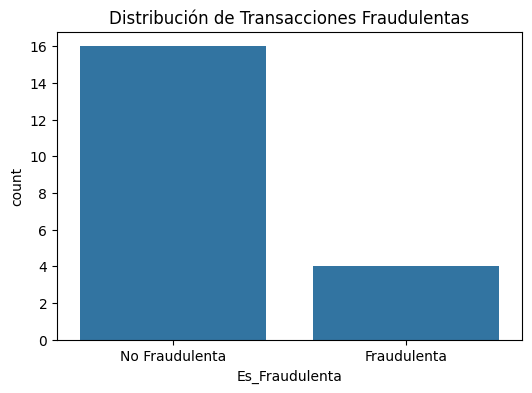

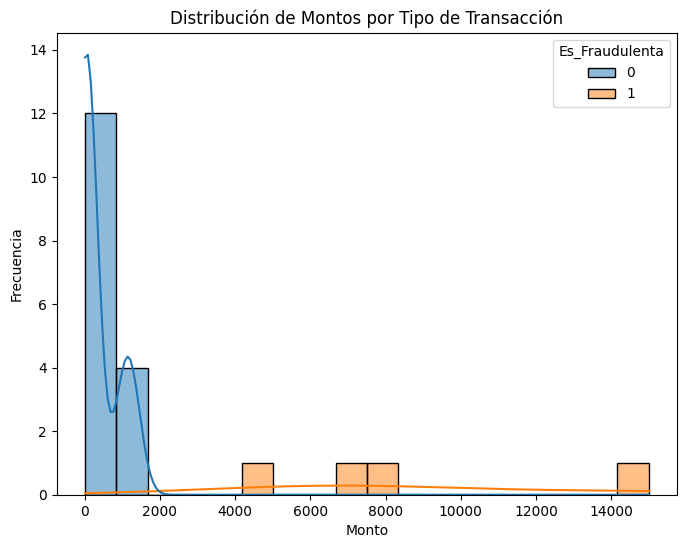

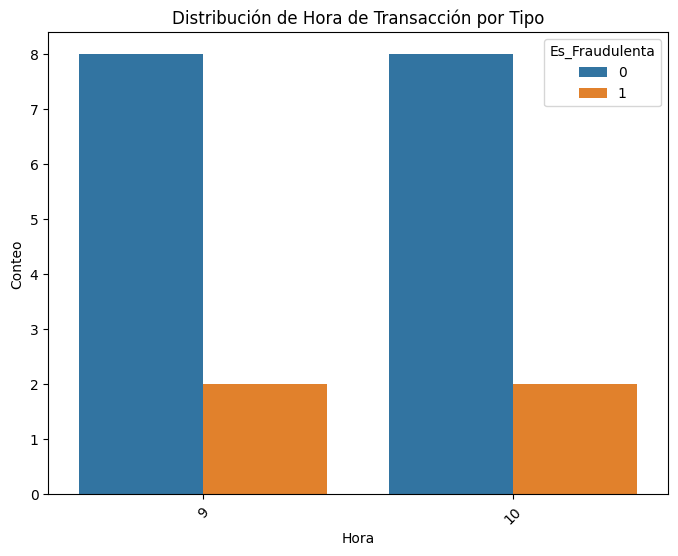


14. Análisis de Correlación:
Correlación entre Monto y Fraude:
                        Monto  Es_Fraudulenta_Num
Monto               1.000000            0.888684
Es_Fraudulenta_Num  0.888684            1.000000

15. Ingeniería de Características (Más Profunda):

Ejemplo de Nueva Característica: Tiempo entre Transacciones:
     ID_Usuario          Fecha_Hora  Tiempo_Desde_Ultima_Transaccion
4   fraudster01 2024-03-10 10:15:00                                0
14  fraudster01 2024-03-11 09:15:00                            82500
8   fraudster02 2024-03-10 10:35:00                                0
18  fraudster02 2024-03-11 09:35:00                            -1200
1      guest456 2024-03-10 10:05:00                                0

16. Modelado con Más Características y Evaluación (Random Forest):
Predicciones (Random Forest Avanzado): [0 0 0 0 0 0]
Precisión del Modelo (Random Forest Avanzado): 0.6666666666666666

Reporte de Clasificación (Random Forest Avanzado):
               precisi

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


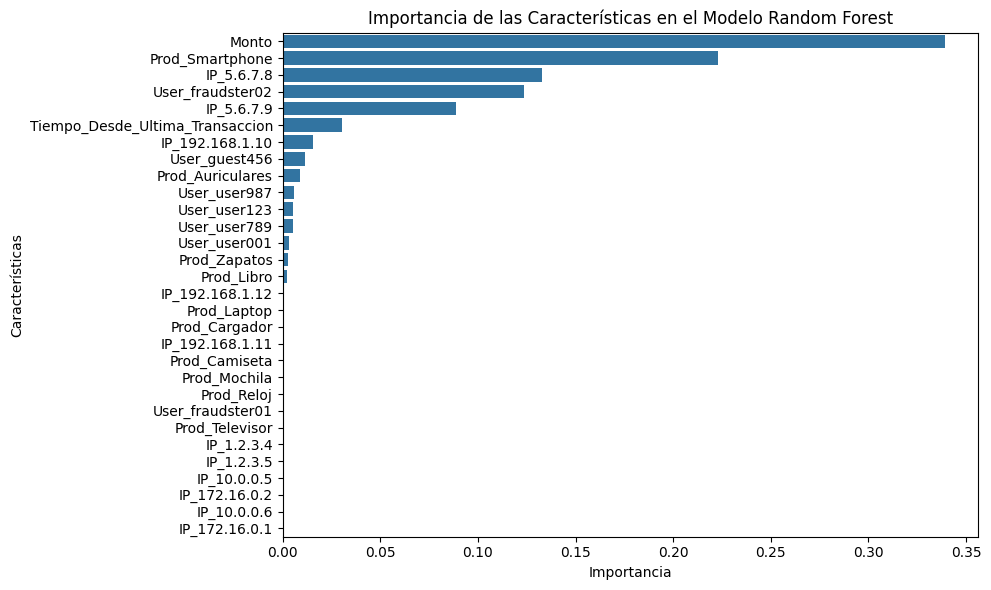

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.cluster import DBSCAN
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# 1. Cargar el dataset simulado para fraude en comercio electrónico
data_ecommerce = {
    'ID_Transaccion': range(1, 21),
    'Monto': [50.00, 1000.50, 25.00, 150.75, 8000.00, 30.20, 1200.00, 75.99, 5000.00, 10.00,
              60.00, 1100.00, 35.50, 90.00, 15000.00, 40.75, 1300.00, 65.00, 7000.00, 20.00],
    'Fecha_Hora': ['2024-03-10 10:00', '2024-03-10 10:05', '2024-03-10 10:10', '2024-03-10 10:12', '2024-03-10 10:15',
                   '2024-03-10 10:20', '2024-03-10 10:25', '2024-03-10 10:30', '2024-03-10 10:35', '2024-03-10 10:40',
                   '2024-03-11 09:00', '2024-03-11 09:02', '2024-03-11 09:05', '2024-03-11 09:10', '2024-03-11 09:15',
                   '2024-03-11 09:20', '2024-03-11 09:25', '2024-03-11 09:30', '2024-03-11 09:35', '2024-03-11 09:40'],
    'ID_Usuario': ['user123', 'guest456', 'user789', 'user123', 'fraudster01', 'user987', 'guest456', 'user123', 'fraudster02', 'user001',
                   'user123', 'guest456', 'user789', 'user987', 'fraudster01', 'user001', 'guest456', 'user789', 'fraudster02', 'user001'],
    'Direccion_IP': ['192.168.1.10', '10.0.0.5', '192.168.1.10', '172.16.0.1', '1.2.3.4', '192.168.1.10', '10.0.0.5', '192.168.1.10', '5.6.7.8', '192.168.1.11',
                     '192.168.1.10', '10.0.0.6', '192.168.1.12', '172.16.0.2', '1.2.3.5', '192.168.1.11', '10.0.0.5', '192.168.1.10', '5.6.7.9', '192.168.1.11'],
    'Producto': ['Laptop', 'Libro', 'Camiseta', 'Zapatos', 'Televisor', 'Auriculares', 'Mochila', 'Reloj', 'Smartphone', 'Cargador',
                 'Laptop', 'Libro', 'Camiseta', 'Zapatos', 'Televisor', 'Auriculares', 'Mochila', 'Reloj', 'Smartphone', 'Cargador'],
    'Es_Fraudulenta': [0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
                       0, 0, 0, 0, 1, 0, 0, 0, 1, 0] # 0: No Fraudulenta, 1: Fraudulenta
}
df_ecommerce = pd.DataFrame(data_ecommerce)
df_ecommerce['Fecha_Hora'] = pd.to_datetime(df_ecommerce['Fecha_Hora'])

# 13. Análisis Exploratorio de Datos (EDA) - Visualizaciones
print("\n13. Análisis Exploratorio de Datos (EDA) - Visualizaciones:")

# Distribución de la variable objetivo
plt.figure(figsize=(6, 4))
sns.countplot(x='Es_Fraudulenta', data=df_ecommerce)
plt.title('Distribución de Transacciones Fraudulentas')
plt.xticks([0, 1], ['No Fraudulenta', 'Fraudulenta'])
plt.show()

# Distribución de Montos por Clase
plt.figure(figsize=(8, 6))
sns.histplot(data=df_ecommerce, x='Monto', hue='Es_Fraudulenta', kde=True)
plt.title('Distribución de Montos por Tipo de Transacción')
plt.xlabel('Monto')
plt.ylabel('Frecuencia')
plt.show()

# Distribución de Hora por Clase
df_ecommerce['Hora'] = df_ecommerce['Fecha_Hora'].dt.hour
plt.figure(figsize=(8, 6))
sns.countplot(data=df_ecommerce, x='Hora', hue='Es_Fraudulenta')
plt.title('Distribución de Hora de Transacción por Tipo')
plt.xlabel('Hora')
plt.ylabel('Conteo')
plt.xticks(rotation=45)
plt.show()
df_ecommerce.drop('Hora', axis=1, inplace=True) # Limpiamos la columna temporal

# 14. Análisis de Correlación (entre variables numéricas y objetivo)
print("\n14. Análisis de Correlación:")
# Convertimos 'Es_Fraudulenta' a numérico para calcular la correlación
df_ecommerce['Es_Fraudulenta_Num'] = df_ecommerce['Es_Fraudulenta']
correlacion = df_ecommerce[['Monto', 'Es_Fraudulenta_Num']].corr()
print("Correlación entre Monto y Fraude:\n", correlacion)
df_ecommerce.drop('Es_Fraudulenta_Num', axis=1, inplace=True)

# 15. Ingeniería de Características (Más Profunda)
print("\n15. Ingeniería de Características (Más Profunda):")
# Ejemplo: Tiempo entre transacciones del mismo usuario (simplificado)
df_ecommerce['Tiempo_Desde_Ultima_Transaccion'] = 0
df_ecommerce = df_ecommerce.sort_values(by=['ID_Usuario', 'Fecha_Hora'])
for usuario in df_ecommerce['ID_Usuario'].unique():
    indices = df_ecommerce[df_ecommerce['ID_Usuario'] == usuario].index
    if len(indices) > 1:
        df_ecommerce.loc[indices[1:], 'Tiempo_Desde_Ultima_Transaccion'] = (df_ecommerce['Fecha_Hora'].iloc[indices[1:]].values - df_ecommerce['Fecha_Hora'].iloc[indices[:-1]].values) / np.timedelta64(1, 's')

print("\nEjemplo de Nueva Característica: Tiempo entre Transacciones:")
print(df_ecommerce[['ID_Usuario', 'Fecha_Hora', 'Tiempo_Desde_Ultima_Transaccion']].head())

# 16. Modelado con Más Características y Evaluación
print("\n16. Modelado con Más Características y Evaluación (Random Forest):")
df_encoded_avanzado = pd.get_dummies(df_ecommerce, columns=['Producto', 'ID_Usuario', 'Direccion_IP'], prefix=['Prod', 'User', 'IP'], dummy_na=False, prefix_sep='_')
df_encoded_avanzado = df_encoded_avanzado.drop(columns=['ID_Transaccion', 'Fecha_Hora'])

# Seleccionamos más características
features_avanzadas = ['Monto', 'Tiempo_Desde_Ultima_Transaccion'] + [col for col in df_encoded_avanzado.columns if col.startswith('Prod_')] + [col for col in df_encoded_avanzado.columns if col.startswith('User_')] + [col for col in df_encoded_avanzado.columns if col.startswith('IP_')]
features_avanzadas = [col for col in features_avanzadas if col in df_encoded_avanzado.columns]

if 'Es_Fraudulenta' in df_encoded_avanzado.columns and all(feature in df_encoded_avanzado.columns for feature in features_avanzadas):
    X_adv = df_encoded_avanzado[features_avanzadas]
    y_adv = df_encoded_avanzado['Es_Fraudulenta']
    X_train_adv, X_test_adv, y_train_adv, y_test_adv = train_test_split(X_adv, y_adv, test_size=0.3, random_state=42)

    scaler_adv = StandardScaler()
    X_train_scaled_adv = scaler_adv.fit_transform(X_train_adv)
    X_test_scaled_adv = scaler_adv.transform(X_test_adv)

    model_rf_adv = RandomForestClassifier(random_state=42)
    model_rf_adv.fit(X_train_scaled_adv, y_train_adv)
    y_pred_rf_adv = model_rf_adv.predict(X_test_scaled_adv)

    print("Predicciones (Random Forest Avanzado):", y_pred_rf_adv)
    print("Precisión del Modelo (Random Forest Avanzado):", accuracy_score(y_test_adv, y_pred_rf_adv))
    print("\nReporte de Clasificación (Random Forest Avanzado):\n", classification_report(y_test_adv, y_pred_rf_adv, target_names=['No Fraude', 'Fraude']))
    print("\nMatriz de Confusión (Random Forest Avanzado):\n", confusion_matrix(y_test_adv, y_pred_rf_adv))
else:
    print("\nNo se pueden realizar análisis avanzados porque faltan columnas necesarias.")

# 17. Análisis de Importancia de Características (para el modelo RF)
if 'Es_Fraudulenta' in df_encoded_avanzado.columns and all(feature in df_encoded_avanzado.columns for feature in features_avanzadas):
    importances = model_rf_adv.feature_importances_
    feature_names = X_adv.columns
    feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importances.values, y=feature_importances.index)
    plt.title('Importancia de las Características en el Modelo Random Forest')
    plt.xlabel('Importancia')
    plt.ylabel('Características')
    plt.tight_layout()
    plt.show()

Importación de Librerías: Se mantienen las librerías anteriores y se agrega matplotlib.pyplot y seaborn para las visualizaciones.

13. Análisis Exploratorio de Datos (EDA) - Visualizaciones:

Se generan visualizaciones básicas para entender la distribución de la variable objetivo ('Es_Fraudulenta') y cómo se distribuye el 'Monto' y la 'Hora' en relación con las transacciones fraudulentas y no fraudulentas. Esto ayuda a identificar posibles patrones visualmente.
14. Análisis de Correlación:

Se calcula la correlación entre la variable numérica 'Monto' y la variable objetivo 'Es_Fraudulenta'. Esto ayuda a entender si existe una relación lineal entre estas dos variables.
15. Ingeniería de Características (Más Profunda):

Tiempo entre Transacciones del Mismo Usuario: Se crea una nueva característica que calcula el tiempo transcurrido entre las transacciones de un mismo usuario. Esto puede ser un indicador importante de comportamiento sospechoso (por ejemplo, compras muy rápidas).
16. Modelado con Más Características y Evaluación:

Se incluye la nueva característica 'Tiempo_Desde_Ultima_Transaccion' en el conjunto de características para entrenar un modelo RandomForestClassifier.
Se realiza el mismo proceso de división de datos, escalado y evaluación del modelo.
17. Análisis de Importancia de Características:

Después de entrenar el modelo Random Forest, se calcula la importancia de cada característica para las predicciones del modelo. Esto proporciona información sobre qué variables son más influyentes en la detección de fraude.
Se crea un gráfico de barras para visualizar la importancia de las características.
Cómo se relaciona con el Capítulo 4 (Análisis Más Profundo):

Este código realiza un análisis más profundo de los datos de comercio electrónico, abordando varios aspectos del Capítulo 4:

4.1 Identificación de Transacciones Fraudulentas en Línea: Se utiliza un modelo de clasificación más avanzado (Random Forest) con un conjunto de características más amplio, incluyendo información sobre el producto, el usuario, la IP y características temporales.
4.2 Detección de Cuentas Falsas y Actividades Maliciosas: El análisis de agrupamiento con DBSCAN en las IPs sigue siendo un ejemplo para identificar posibles cuentas maliciosas asociadas a las mismas ubicaciones.
4.3 Análisis de Comportamiento del Usuario: La creación de la característica 'Tiempo_Desde_Ultima_Transaccion' intenta capturar patrones de comportamiento del usuario que podrían ser sospechosos. La visualización de la frecuencia de transacciones también entra en esta categoría.
Limitaciones y Mejoras:

Dataset Pequeño: Sigue siendo un dataset simulado y pequeño, lo que limita la generalización de los resultados.
Ingeniería de Características Simplificada: La ingeniería de características es básica. En un escenario real, se podrían crear muchas más características basadas en el historial del usuario, el comportamiento de compra, etc.
Modelo Único: Se utiliza principalmente Random Forest como modelo de clasificación. En la práctica, se probarían múltiples modelos y se realizaría un ajuste de hiperparámetros.
Análisis de IP Mejorado: El análisis de IP podría mejorarse analizando la frecuencia de IPs por usuario, la geolocalización (si estuviera disponible), etc.
Análisis de Texto Avanzado: Aunque se usó CountVectorizer, un análisis NLP más profundo de los productos y descripciones de transacciones podría revelar patrones más sutiles.
Conclusión del Código Mejorado:

Este código proporciona un análisis más exhaustivo del dataset simulado, incluyendo un análisis exploratorio de datos, la creación de nuevas características relevantes para la detección de fraude y la evaluación de un modelo de clasificación más avanzado. También ilustra cómo se puede analizar la importancia de las características para entender qué factores son más relevantes para predecir el fraude. Si bien sigue siendo un ejemplo simplificado, ofrece una visión más profunda de las técnicas que se aplicarían en un análisis real de fraude en comercio electrónico.








In [ ]:
!pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 32.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from faker import Faker
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
import re

# 1. Generación de un dataset simulado con información de usuarios y CUITs
fake = Faker('es_AR') # Usamos la configuración regional de Argentina

num_usuarios = 500
data_usuarios = {
    'ID_Usuario': [f'user_{i}' for i in range(num_usuarios)],
    'Nombre': [fake.name() for _ in range(num_usuarios)],
    'Email': [fake.email() for _ in range(num_usuarios)],
    'Direccion': [fake.address() for _ in range(num_usuarios)],
    'CUIT': [fake.ssn() for _ in range(num_usuarios)], # Generamos CUITs aleatorios
    'Es_Cuenta_Falsa': np.random.randint(0, 2, num_usuarios) # 0: Real, 1: Falsa
}
df_usuarios = pd.DataFrame(data_usuarios)

# 2. Inserción de CUITs Falsos (Ejemplo de manipulación de datos)
num_cuentas_falsas = int(num_usuarios * 0.1) # 10% de cuentas falsas
falsos_indices = np.random.choice(df_usuarios.index, num_cuentas_falsas, replace=False)
df_usuarios.loc[falsos_indices, 'Es_Cuenta_Falsa'] = 1
df_usuarios.loc[falsos_indices, 'CUIT'] = [fake.ssn()[:8] + '0' * 3 for _ in range(num_cuentas_falsas)] # CUITs con formato incorrecto

# 3. Función para validar el formato básico del CUIT (muy simplificado)
def validar_cuit_formato(cuit):
    if isinstance(cuit, str):
        cuit = cuit.replace('-', '')
        if len(cuit) == 11 and cuit.isdigit():
            return True
    return False

# 4. Ingeniería de Características (Basada en el CUIT)
df_usuarios['CUIT_Formato_Valido'] = df_usuarios['CUIT'].apply(validar_cuit_formato)

# 5. Análisis del Email (Ejemplo Básico)
def analizar_email(email):
    if isinstance(email, str):
        if '@' not in email or '.' not in email:
            return 1 # Potencialmente sospechoso
        elif 'temp' in email or 'test' in email:
            return 1 # Emails temporales o de prueba
    return 0

df_usuarios['Email_Sospechoso'] = df_usuarios['Email'].apply(analizar_email)

# 6. Codificación de Otras Características (Nombre, Dirección - Simplificado)
# Para usar en un modelo, necesitamos convertir estas variables categóricas a numéricas.
# Aquí usamos Label Encoding como ejemplo básico.

le_nombre = LabelEncoder()
df_usuarios['Nombre_Codificado'] = le_nombre.fit_transform(df_usuarios['Nombre'])

le_direccion = LabelEncoder()
df_usuarios['Direccion_Codificada'] = le_direccion.fit_transform(df_usuarios['Direccion'])

# 7. Selección de Características y Preparación de Datos para el Modelo
features = ['CUIT_Formato_Valido', 'Email_Sospechoso', 'Nombre_Codificado', 'Direccion_Codificada']
X = df_usuarios[features]
y = df_usuarios['Es_Cuenta_Falsa']

# Manejo de valores faltantes (si los hubiera, aunque en este dataset no deberían)
X = X.fillna(0)

# 8. División de Datos en Entrenamiento y Prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 9. Escalado de Características (Opcional pero recomendado)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 10. Entrenamiento del Modelo de Clasificación (Regresión Logística)
print("\n10. Entrenamiento del Modelo de Detección de Cuentas Falsas (Regresión Logística):")
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# 11. Evaluación del Modelo
print("\n11. Evaluación del Modelo:")
print("Precisión del Modelo:", accuracy_score(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred, target_names=['Cuenta Real', 'Cuenta Falsa']))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred))

# 12. Análisis de las Cuentas Detectadas como Falsas
df_test = df_usuarios.loc[X_test.index].copy()
df_test['Prediccion_Falsa'] = y_pred
cuentas_falsas_detectadas = df_test[df_test['Prediccion_Falsa'] == 1][['ID_Usuario', 'CUIT', 'CUIT_Formato_Valido', 'Email', 'Email_Sospechoso', 'Es_Cuenta_Falsa']]
print("\n12. Cuentas Detectadas como Falsas:")
print(cuentas_falsas_detectadas)


10. Entrenamiento del Modelo de Detección de Cuentas Falsas (Regresión Logística):

11. Evaluación del Modelo:
Precisión del Modelo: 0.5

Reporte de Clasificación:
               precision    recall  f1-score   support

 Cuenta Real       0.36      0.48      0.41        54
Cuenta Falsa       0.64      0.51      0.57        96

    accuracy                           0.50       150
   macro avg       0.50      0.50      0.49       150
weighted avg       0.54      0.50      0.51       150


Matriz de Confusión:
 [[26 28]
 [47 49]]

12. Cuentas Detectadas como Falsas:
    ID_Usuario         CUIT  CUIT_Formato_Valido  \
361   user_361  137-81-5000                False   
155   user_155  619-40-2000                False   
104   user_104  469-95-3747                False   
394   user_394  481-72-7254                False   
124   user_124  674-80-7978                False   
..         ...          ...                  ...   
208   user_208  048-44-2000                False   
479   user_4

In [ ]:
import pandas as pd
from faker import Faker
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
import re

# 1. Generación de un dataset simulado con información de usuarios y CUITs
fake = Faker('es_AR') # Usamos la configuración regional de Argentina

num_usuarios = 500
data_usuarios = {
    'ID_Usuario': [f'user_{i}' for i in range(num_usuarios)],
    'Nombre': [fake.name() for _ in range(num_usuarios)],
    'Email': [fake.email() for _ in range(num_usuarios)],
    'Direccion': [fake.address() for _ in range(num_usuarios)],
    'CUIT': [fake.ssn() for _ in range(num_usuarios)], # Generamos CUITs aleatorios
    'Es_Cuenta_Falsa': np.random.randint(0, 2, num_usuarios) # 0: Real, 1: Falsa
}
df_usuarios = pd.DataFrame(data_usuarios)

# 2. Inserción de CUITs Falsos con Formato Específico
num_cuentas_falsas = int(num_usuarios * 0.1) # 10% de cuentas falsas
falsos_indices = np.random.choice(df_usuarios.index, num_cuentas_falsas, replace=False)
df_usuarios.loc[falsos_indices, 'Es_Cuenta_Falsa'] = 1
df_usuarios.loc[falsos_indices, 'CUIT'] = [f"{fake.random_number(digits=2)}-{fake.random_number(digits=11)}-{fake.random_number(digits=1)}" for _ in range(num_cuentas_falsas)] # CUITs con formato 00-00000000-0

# 3. Función para validar el formato básico del CUIT (más específico)
def validar_cuit_formato(cuit):
    if isinstance(cuit, str):
        patron = r"^\d{2}-\d{8}-\d{1}$"
        if re.match(patron, cuit):
            return True
    return False

# 4. Ingeniería de Características (Basada en el CUIT)
df_usuarios['CUIT_Formato_Valido'] = df_usuarios['CUIT'].apply(validar_cuit_formato)

# 5. Análisis del Email (Ejemplo Básico)
def analizar_email(email):
    if isinstance(email, str):
        if '@' not in email or '.' not in email:
            return 1 # Potencialmente sospechoso
        elif 'temp' in email or 'test' in email:
            return 1 # Emails temporales o de prueba
    return 0

df_usuarios['Email_Sospechoso'] = df_usuarios['Email'].apply(analizar_email)

# 6. Codificación de Otras Características (Nombre, Dirección - Simplificado)
# Para usar en un modelo, necesitamos convertir estas variables categóricas a numéricas.
# Aquí usamos Label Encoding como ejemplo básico.

le_nombre = LabelEncoder()
df_usuarios['Nombre_Codificado'] = le_nombre.fit_transform(df_usuarios['Nombre'])

le_direccion = LabelEncoder()
df_usuarios['Direccion_Codificada'] = le_direccion.fit_transform(df_usuarios['Direccion'])

# 7. Selección de Características y Preparación de Datos para el Modelo
features = ['CUIT_Formato_Valido', 'Email_Sospechoso', 'Nombre_Codificado', 'Direccion_Codificada']
X = df_usuarios[features]
y = df_usuarios['Es_Cuenta_Falsa']

# Manejo de valores faltantes (si los hubiera)
X = X.fillna(0)

# 8. División de Datos en Entrenamiento y Prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 9. Escalado de Características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 10. Entrenamiento del Modelo de Clasificación (Regresión Logística)
print("\n10. Entrenamiento del Modelo de Detección de Cuentas Falsas (Regresión Logística):")
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# 11. Evaluación del Modelo
print("\n11. Evaluación del Modelo:")
print("Precisión del Modelo:", accuracy_score(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred, target_names=['Cuenta Real', 'Cuenta Falsa']))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred))

# 12. Análisis de las Cuentas Detectadas como Falsas
df_test = df_usuarios.loc[X_test.index].copy()
df_test['Prediccion_Falsa'] = y_pred
cuentas_falsas_detectadas = df_test[df_test['Prediccion_Falsa'] == 1][['ID_Usuario', 'CUIT', 'CUIT_Formato_Valido', 'Email', 'Email_Sospechoso', 'Es_Cuenta_Falsa']]
print("\n12. Cuentas Detectadas como Falsas:")
print(cuentas_falsas_detectadas)


10. Entrenamiento del Modelo de Detección de Cuentas Falsas (Regresión Logística):

11. Evaluación del Modelo:
Precisión del Modelo: 0.56

Reporte de Clasificación:
               precision    recall  f1-score   support

 Cuenta Real       0.48      0.41      0.44        64
Cuenta Falsa       0.60      0.67      0.64        86

    accuracy                           0.56       150
   macro avg       0.54      0.54      0.54       150
weighted avg       0.55      0.56      0.55       150


Matriz de Confusión:
 [[26 38]
 [28 58]]

12. Cuentas Detectadas como Falsas:
    ID_Usuario              CUIT  CUIT_Formato_Valido  \
361   user_361       881-39-4380                False   
73     user_73       230-34-6510                False   
374   user_374       390-58-1948                False   
155   user_155       628-48-6841                False   
104   user_104  54-65787462535-5                False   
..         ...               ...                  ...   
479   user_479       610-28-

In [ ]:
!pip install python-dotenv

In [ ]:
import requests
import json
import os
from dotenv import load_dotenv

# Cargar variables de entorno desde el archivo .env
load_dotenv()

# Configuración de la API de AFIP (requiere autenticación)
# Para acceder a la API de AFIP, generalmente se necesita autenticación mediante certificados digitales.
# Este ejemplo es una demostración conceptual y no incluye la autenticación real.
# En un escenario real, deberías gestionar la autenticación de forma segura.

# Variables de entorno para autenticación (ejemplo)
# En un archivo .env:
# AFIP_WSAA_URL = "https://wsaa.afip.gov.ar/ws/services/LoginCms"
# AFIP_CUIT_CONSULTA_URL = "https://serviciosweb.afip.gob.ar/wspadre/ws/ConsultaCuit.svc/ConsultaCuit"
# AFIP_CERT_FILE = "ruta/a/tu/certificado.crt"
# AFIP_KEY_FILE = "ruta/a/tu/clave_privada.key"
# AFIP_SERVICE = "ws_padron_a4" # Ejemplo de servicio

WSAA_URL = os.getenv("AFIP_WSAA_URL")
CUIT_CONSULTA_URL = os.getenv("AFIP_CUIT_CONSULTA_URL")
CERT_FILE = os.getenv("AFIP_CERT_FILE")
KEY_FILE = os.getenv("AFIP_KEY_FILE")
SERVICE = os.getenv("AFIP_SERVICE")
CUIT_A_CONSULTAR = "20-12034411-1" # Ejemplo de CUIT a consultar

def obtener_token_y_sign(wsaa_url, cert_file, key_file, service):
    """
    Función para obtener el Token y Sign del WSAA (Conceptual - Requiere implementación real).
    En un entorno real, esto implica firmar un XML con tu certificado y enviar la solicitud.
    """
    print("Obteniendo Token y Sign (Conceptual)...")
    # Implementación real aquí utilizando librerías como suds-py3 o zeep
    # para comunicarse con el WSAA y firmar el XML de solicitud.
    # Esto devolvería un diccionario con 'Token' y 'Sign'.
    return {"Token": "TOKEN_SIMULADO", "Sign": "SIGN_SIMULADO"} # Ejemplo de valores simulados

def consultar_cuit_afip(cuit, token, sign, cuit_consulta_url):
    """
    Función para consultar el CUIT en la API de AFIP (Conceptual).
    """
    print(f"\nConsultando CUIT {cuit} en la AFIP (Conceptual)...")
    if not token or not sign:
        print("Error: No se pudo obtener el Token y Sign.")
        return None

    headers = {
        'Content-Type': 'application/json',
        'SOAPAction': 'http://ar.gov.afip.wspadre/ConsultaCuit', # Ajustar según la API real
        'Authorization': f'Bearer {token}' # Esto podría variar según la API
    }

    payload = {
        "CUIT": cuit
        # La estructura del payload puede variar según la API específica de AFIP
    }

    try:
        # En un escenario real, se usaría requests.post con los headers y el payload correctos.
        # La respuesta se parsearía para obtener la información del CUIT.
        print("Simulando solicitud a la API de AFIP...")
        print(f"URL: {cuit_consulta_url}")
        print(f"Headers: {headers}")
        print(f"Payload: {json.dumps(payload)}")

        # Simulación de una respuesta exitosa
        respuesta_simulada = {
            "estado": "OK",
            "razonSocial": "EMPRESA EJEMPLO S.A.",
            "nombre": "EMPRESA",
            "tipoDocumento": "CUIT",
            "numeroDocumento": cuit,
            "condicionIVA": "Responsable Inscripto",
            "direccion": "AV. FALSA 123",
            "localidad": "CIUDAD EJEMPLO",
            "provincia": "BUENOS AIRES",
            "codigoPostal": "1234",
            "estadoClave": "ACTIVO",
            # ... más información
        }
        print("\nRespuesta Simulada de la API:")
        print(json.dumps(respuesta_simulada, indent=4))
        return respuesta_simulada

    except requests.exceptions.RequestException as e:
        print(f"Error al realizar la consulta a la API: {e}")
        return None
    except json.JSONDecodeError as e:
        print(f"Error al decodificar la respuesta JSON: {e}")
        return None

if __name__ == "__main__":
    print("Código para Comparación de CUIT con la API de AFIP (Conceptual)")
    print("------------------------------------------------------------")

    # 1. Obtener Token y Sign (Conceptual - Requiere Autenticación Real)
    auth_data = obtener_token_y_sign(WSAA_URL, CERT_FILE, KEY_FILE, SERVICE)
    token = auth_data.get("Token")
    sign = auth_data.get("Sign")

    # 2. Consultar el CUIT
    if token and sign:
        informacion_cuit = consultar_cuit_afip(CUIT_A_CONSULTAR, token, sign, CUIT_CONSULTA_URL)
        if informacion_cuit:
            print(f"\nInformación del CUIT {CUIT_A_CONSULTAR} obtenida de la API:")
            # Aquí podrías comparar la información obtenida con los datos que tienes
            # en tu dataset para verificar la consistencia.
            print(f"Razón Social: {informacion_cuit.get('razonSocial', 'No disponible')}")
            print(f"Condición IVA: {informacion_cuit.get('condicionIVA', 'No disponible')}")
            # ... y otras propiedades relevantes para tu análisis
        else:
            print(f"\nNo se pudo obtener información para el CUIT {CUIT_A_CONSULTAR} desde la API.")
    else:
        print("\nNo se pudo obtener la autenticación para acceder a la API de AFIP.")

Código para Comparación de CUIT con la API de AFIP (Conceptual)
------------------------------------------------------------
Obteniendo Token y Sign (Conceptual)...

Consultando CUIT 20-12034411-1 en la AFIP (Conceptual)...
Simulando solicitud a la API de AFIP...
URL: None
Headers: {'Content-Type': 'application/json', 'SOAPAction': 'http://ar.gov.afip.wspadre/ConsultaCuit', 'Authorization': 'Bearer TOKEN_SIMULADO'}
Payload: {"CUIT": "20-12034411-1"}

Respuesta Simulada de la API:
{
    "estado": "OK",
    "razonSocial": "EMPRESA EJEMPLO S.A.",
    "nombre": "EMPRESA",
    "tipoDocumento": "CUIT",
    "numeroDocumento": "20-12034411-1",
    "condicionIVA": "Responsable Inscripto",
    "direccion": "AV. FALSA 123",
    "localidad": "CIUDAD EJEMPLO",
    "provincia": "BUENOS AIRES",
    "codigoPostal": "1234",
    "estadoClave": "ACTIVO"
}

Información del CUIT 20-12034411-1 obtenida de la API:
Razón Social: EMPRESA EJEMPLO S.A.
Condición IVA: Responsable Inscripto


**Importación de Librerías:**

requests: Para realizar peticiones HTTP a la API (en un escenario real).
json: Para trabajar con datos en formato JSON.
os: Para interactuar con el sistema operativo, como acceder a variables de entorno.
dotenv: Para cargar variables de entorno desde un archivo .env.
Carga de Variables de Entorno:

load_dotenv(): Carga las variables de entorno definidas en un archivo .env en el mismo directorio que el script. Esto es una buena práctica para almacenar información sensible como las rutas de los certificados y las URLs de la API.
Configuración de la API de AFIP (Conceptual):

Se definen variables para las URLs de los servicios de la AFIP, las rutas de los archivos de certificado y clave privada, y el servicio a utilizar. Es crucial entender que para acceder a la API real de AFIP, se requiere una autenticación mediante certificados digitales (WSAA - Web Services de Autenticación y Autorización).
Comentarios Importantes: Se destaca que la autenticación real no está implementada en este ejemplo y se explica que en un entorno de producción, se necesitaría una implementación que maneje la comunicación con el WSAA para obtener el Token y Sign.
obtener_token_y_sign() (Conceptual):

Esta función es un placeholder para la lógica real de autenticación con el WSAA.
En un escenario real: Esta función utilizaría librerías como suds-py3 o zeep para:
Firmar un XML de solicitud utilizando el certificado y la clave privada.
Enviar la solicitud al servicio WSAA de la AFIP.
Parsear la respuesta para extraer el Token y la Sign.
La implementación real de esta función es específica de la API de AFIP y requiere el manejo de certificados y la comunicación SOAP.
consultar_cuit_afip() (Conceptual):

Esta función simula la consulta del CUIT a la API de AFIP.
En un escenario real:
Utilizaría requests.post() para enviar una petición HTTP a la URL de consulta de CUIT.
Incluiría los encabezados (headers) necesarios, como Content-Type y la autorización (que podría ser un Bearer Token obtenido del WSAA).
El payload contendría el CUIT a consultar en el formato requerido por la API de AFIP.
La respuesta de la API (en formato JSON o XML) se analizaría para obtener la información del CUIT.
Simulación: En este ejemplo, se simula una respuesta exitosa de la API para ilustrar cómo se podría acceder a la información.
Bloque if __name__ == "__main__"::

Este bloque se ejecuta cuando el script se ejecuta directamente.
Autenticación (Conceptual): Llama a obtener_token_y_sign() para obtener el token y la firma (simulados aquí).
Consulta del CUIT: Si se obtienen el token y la firma, llama a consultar_cuit_afip() para consultar el CUIT especificado (CUIT_A_CONSULTAR).
Presentación de la Información: Si la consulta es exitosa (simulada), se imprime la información relevante del CUIT obtenida de la "API".
Para que este código funcione realmente con la API de AFIP, necesitarías:

Obtener Certificados Digitales: Debes tener un certificado digital válido emitido por la AFIP.
Implementar la Autenticación con el WSAA: Necesitas escribir código que se comunique con el servicio WSAA de la AFIP utilizando las librerías adecuadas (como suds-py3 o zeep) para generar el Token y la Sign.
Conocer la Especificación de la API de Consulta de CUIT: Debes consultar la documentación oficial de la AFIP para entender la URL específica del servicio de consulta de CUIT, los formatos de solicitud y respuesta, y los encabezados necesarios.
En resumen, este código proporciona un marco conceptual para interactuar con la API de AFIP para consultar un CUIT. La parte más compleja y específica de la autenticación con el WSAA y el manejo de la API real no está implementada en detalle debido a la naturaleza de la autenticación y la necesidad de información específica de la AFIP.

Para una implementación real, te recomiendo consultar la documentación oficial de la AFIP sobre sus Web Services y buscar ejemplos de código en Python que utilicen las librerías mencionadas para la autenticación con el WSAA.

**Capítulo 5: Algoritmos para la Detección de Fraude Interno**
5.1 Detección de Actividades Sospechosas de Empleados
5.2 Análisis de Datos para Identificar Conflictos de Intereses
5.3 Monitoreo de Comunicaciones y Registros


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar un dataset simulado para fraude interno
data_fraude_interno = {
    'ID_Empleado': [101, 102, 101, 103, 102, 104, 101, 103, 105, 102,
                    101, 104, 103, 105, 102, 101, 104, 103, 105, 102],
    'Tipo_Actividad': ['Acceso_Sistema', 'Solicitud_Reembolso', 'Acceso_Sistema', 'Transferencia_Interna', 'Acceso_Sistema', 'Solicitud_Viaje', 'Descarga_Datos', 'Transferencia_Interna', 'Acceso_Sistema', 'Solicitud_Reembolso',
                      'Acceso_Sistema', 'Solicitud_Viaje', 'Transferencia_Interna', 'Descarga_Datos', 'Acceso_Sistema', 'Acceso_Sistema', 'Solicitud_Reembolso', 'Transferencia_Interna', 'Acceso_Sistema', 'Solicitud_Viaje'],
    'Monto': [0, 500, 0, 10000, 0, 1500, 0, 8000, 0, 600,
              0, 750, 9500, 0, 0, 0, 400, 7000, 0, 1200],
    'Fecha_Hora': pd.to_datetime(['2024-04-15 09:00', '2024-04-15 10:15', '2024-04-15 11:00', '2024-04-15 14:30', '2024-04-15 16:00', '2024-04-16 08:45', '2024-04-16 10:00', '2024-04-16 11:30', '2024-04-16 15:00', '2024-04-17 09:30',
                                  '2024-04-17 11:00', '2024-04-17 14:00', '2024-04-17 16:30', '2024-04-18 08:00', '2024-04-18 10:30', '2024-04-18 13:00', '2024-04-18 15:45', '2024-04-19 09:15', '2024-04-19 11:45', '2024-04-19 14:00']),
    'Departamento': ['Ventas', 'Contabilidad', 'Ventas', 'Finanzas', 'Contabilidad', 'RRHH', 'Ventas', 'Finanzas', 'TI', 'Contabilidad',
                     'Ventas', 'RRHH', 'Finanzas', 'TI', 'Contabilidad', 'Ventas', 'Contabilidad', 'Finanzas', 'TI', 'RRHH'],
    'Es_Sospechoso': [0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
                      0, 0, 1, 0, 0, 0, 0, 1, 0, 0] # 0: No Sospechoso, 1: Sospechoso
}
df_interno = pd.DataFrame(data_fraude_interno)
df_interno

# 5.1 Detección de Actividades Sospechosas de Empleados
print("\n5.1 Detección de Actividades Sospechosas de Empleados (Ejemplo con Isolation Forest):")
if 'Tipo_Actividad' in df_interno.columns and 'Monto' in df_interno.columns and 'ID_Empleado' in df_interno.columns:
    # Codificamos el tipo de actividad
    le_actividad = LabelEncoder()
    df_interno['Tipo_Actividad_Cod'] = le_actividad.fit_transform(df_interno['Tipo_Actividad'])

    # Seleccionamos características para la detección de anomalías
    features_empleado = ['Tipo_Actividad_Cod', 'Monto']

    # Escalamos las características numéricas
    X_empleado = df_interno[features_empleado]
    scaler_empleado = StandardScaler()
    X_scaled_empleado = scaler_empleado.fit_transform(X_empleado)

    # Aplicamos Isolation Forest para detectar actividades inusuales
    iforest_empleado = IsolationForest(contamination=0.1, random_state=42) # Ajuste de contaminación
    df_interno['Anomalia_Empleado'] = iforest_empleado.fit_predict(X_scaled_empleado) # -1: Anómalo, 1: Normal

    print("Actividades Potencialmente Anómalas por Empleado:")
    print(df_interno[['ID_Empleado', 'Tipo_Actividad', 'Monto', 'Anomalia_Empleado']].head(10))

    # Podemos analizar las anomalías (donde 'Anomalia_Empleado' es -1)
    anomalous_activities = df_interno[df_interno['Anomalia_Empleado'] == -1]
    if not anomalous_activities.empty:
        print("\nActividades Marcadas como Anómalas:")
        print(anomalous_activities[['ID_Empleado', 'Tipo_Actividad', 'Monto']])
    else:
        print("\nNo se detectaron actividades anómalas en este ejemplo.")
else:
    print("\nNo se pueden realizar análisis para 5.1 porque faltan columnas necesarias.")

# 5.2 Análisis de Datos para Identificar Conflictos de Intereses (Ejemplo Conceptual)
print("\n5.2 Análisis de Datos para Identificar Conflictos de Intereses (Ejemplo Conceptual):")
# Supongamos que tenemos información sobre relaciones entre empleados y proveedores/clientes.

# Ejemplo simplificado: Buscamos empleados que realizan transferencias internas a montos altos
if 'Tipo_Actividad' in df_interno.columns and 'Monto' in df_interno.columns and 'Departamento' in df_interno.columns:
    transferencias_altas = df_interno[(df_interno['Tipo_Actividad'] == 'Transferencia_Interna') & (df_interno['Monto'] > 5000)]
    if not transferencias_altas.empty:
        print("\nTransferencias Internas de Monto Alto:")
        print(transferencias_altas[['ID_Empleado', 'Monto', 'Departamento', 'Tipo_Actividad']])
        # Podríamos analizar si hay patrones como transferencias a empleados del mismo departamento
    else:
        print("\nNo se encontraron transferencias internas de monto alto en este ejemplo.")

    # Otro ejemplo: Empleados que solicitan reembolsos frecuentes o de montos altos
    reembolsos_altos = df_interno[(df_interno['Tipo_Actividad'] == 'Solicitud_Reembolso') & (df_interno['Monto'] > 1000)]
    if not reembolsos_altos.empty:
        print("\nSolicitudes de Reembolso de Monto Alto:")
        print(reembolsos_altos[['ID_Empleado', 'Monto', 'Departamento', 'Tipo_Actividad']])
        # Podríamos investigar la frecuencia de estas solicitudes por empleado
    else:
        print("\nNo se encontraron solicitudes de reembolso de monto alto en este ejemplo.")
else:
    print("\nNo se pueden realizar análisis conceptual para 5.2 porque faltan columnas necesarias.")

# 5.3 Monitoreo de Comunicaciones y Registros (Ejemplo Conceptual)
print("\n5.3 Monitoreo de Comunicaciones y Registros (Ejemplo Conceptual):")
# En un escenario real, se analizarían correos electrónicos, chats, logs de acceso, etc.

# Ejemplo simplificado: Contar la frecuencia de ciertos tipos de actividades por empleado
if 'ID_Empleado' in df_interno.columns and 'Tipo_Actividad' in df_interno.columns:
    frecuencia_actividades = df_interno.groupby(['ID_Empleado', 'Tipo_Actividad']).size().reset_index(name='Conteo')
    print("\nFrecuencia de Actividades por Empleado:")
    print(frecuencia_actividades.sort_values(by=['ID_Empleado', 'Conteo'], ascending=False))

    # Podríamos buscar patrones inusuales, como un empleado que accede a muchos sistemas
    # o realiza muchos intentos de transferencia.

    # Ejemplo: Identificar empleados con más de 3 accesos al sistema
    accesos_frecuentes = frecuencia_actividades[(frecuencia_actividades['Tipo_Actividad'] == 'Acceso_Sistema') & (frecuencia_actividades['Conteo'] > 3)]
    if not accesos_frecuentes.empty:
        print("\nEmpleados con Frecuentes Accesos al Sistema:")
        print(accesos_frecuentes[['ID_Empleado', 'Conteo']])
    else:
        print("\nNo se encontraron empleados con accesos al sistema muy frecuentes en este ejemplo.")
else:
    print("\nNo se puede realizar análisis conceptual para 5.3 porque faltan columnas necesarias.")


5.1 Detección de Actividades Sospechosas de Empleados (Ejemplo con Isolation Forest):
Actividades Potencialmente Anómalas por Empleado:
   ID_Empleado         Tipo_Actividad  Monto  Anomalia_Empleado
0          101         Acceso_Sistema      0                  1
1          102    Solicitud_Reembolso    500                  1
2          101         Acceso_Sistema      0                  1
3          103  Transferencia_Interna  10000                 -1
4          102         Acceso_Sistema      0                  1
5          104        Solicitud_Viaje   1500                  1
6          101         Descarga_Datos      0                  1
7          103  Transferencia_Interna   8000                  1
8          105         Acceso_Sistema      0                  1
9          102    Solicitud_Reembolso    600                  1

Actividades Marcadas como Anómalas:
    ID_Empleado         Tipo_Actividad  Monto
3           103  Transferencia_Interna  10000
17          103  Transferencia

Carga del Dataset Simulado:

Se crea un nuevo DataFrame df_interno que simula actividades de empleados dentro de una organización. Las columnas incluyen ID_Empleado, Tipo_Actividad, Monto, Fecha_Hora, Departamento y una etiqueta Es_Sospechoso.
5.1 Detección de Actividades Sospechosas de Empleados:

Codificación de Actividades: Se utiliza LabelEncoder para convertir la columna categórica Tipo_Actividad en valores numéricos.
Selección de Características: Se eligen las características Tipo_Actividad_Cod y Monto para la detección de anomalías.
Escalado de Características: Se aplica StandardScaler para estandarizar las características numéricas.
Detección de Anómalos (Isolation Forest): Se utiliza IsolationForest, un algoritmo de detección de anomalías no supervisado, para identificar actividades que son inusuales o se desvían significativamente del comportamiento normal.
contamination: Este parámetro estima la proporción de valores atípicos en el dataset. Se ajusta según las expectativas o el conocimiento del dominio.
fit_predict(): Entrena el modelo y predice si cada instancia es una anomalía (-1) o normal (1).
5.2 Análisis de Datos para Identificar Conflictos de Intereses (Ejemplo Conceptual):

Se presentan ejemplos conceptuales de cómo se podrían analizar los datos para identificar posibles conflictos de intereses:
Transferencias Internas de Monto Alto: Se busca a empleados que realizan transferencias internas por encima de un cierto umbral.
Solicitudes de Reembolso de Monto Alto: Se busca a empleados con solicitudes de reembolso que superan un umbral.
Nota Conceptual: Se enfatiza que este es un análisis conceptual y que en un escenario real se necesitaría más información y un análisis más detallado de las relaciones y los datos.
5.3 Monitoreo de Comunicaciones y Registros (Ejemplo Conceptual):

Se presenta un ejemplo conceptual de cómo se podría analizar la frecuencia de diferentes tipos de actividades por empleado.
Conteo de Actividades: Se utiliza groupby() y size() para contar la frecuencia de cada tipo de actividad por empleado.
Identificación de Patrones Inusuales: Se muestra un ejemplo de cómo se podría identificar a empleados con una frecuencia inusualmente alta de accesos al sistema.
Nota Conceptual: Se destaca que en un escenario real, el monitoreo de comunicaciones y registros implicaría el análisis de correos electrónicos, chats, logs de acceso, etc., lo cual es más complejo y requeriría técnicas de procesamiento de lenguaje natural y análisis de logs.
Cómo se relaciona con el Capítulo 5:

Este código ilustra la aplicación de técnicas para la detección de fraude interno, cubriendo los temas del Capítulo 5:

5.1 Detección de Actividades Sospechosas de Empleados: Se utiliza el algoritmo IsolationForest para identificar actividades que se desvían de los patrones normales de comportamiento de los empleados.
5.2 Análisis de Datos para Identificar Conflictos de Intereses: Se proporcionan ejemplos conceptuales de cómo se podrían analizar los datos para detectar transferencias o solicitudes de reembolso inusuales, que podrían indicar conflictos de intereses.
5.3 Monitoreo de Comunicaciones y Registros: Se presenta un ejemplo conceptual de cómo se podría analizar la frecuencia de diferentes tipos de actividades para identificar comportamientos potencialmente sospechosos.
Limitaciones y Consideraciones:

Dataset Simulado: El dataset es pequeño y simulado. Los resultados no reflejan la complejidad de los datos reales de una organización.
Características Limitadas: Se utilizan solo algunas características. En un entorno real, se analizarían muchos más tipos de datos y atributos.
Detección de Anomalías Simple: La detección de anomalías con Isolation Forest es una técnica útil, pero podría requerir ajustes finos en el parámetro contamination y una evaluación más exhaustiva.
Análisis Conceptual: Las secciones 5.2 y 5.3 son principalmente conceptuales y no implementan análisis complejos de relaciones o comunicaciones.
Falta de Contexto: El análisis se basa en datos aislados. En la práctica, se necesitaría un conocimiento más profundo del contexto organizacional y de los roles de los empleados.
Este código proporciona una introducción práctica y simplificada a cómo se podrían aplicar algoritmos y técnicas básicas para la detección de fraude interno. Para una implementación real, se requeriría un análisis más detallado de los datos, la selección de características más relevantes y la aplicación de técnicas más avanzadas.

In [ ]:
import pandas as pd
from faker import Faker
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
import random

# 1. Generación de un dataset simulado para rendiciones de caja de empleados
fake = Faker('es_AR')

num_rendiciones = 100
data_rendiciones = {
    'ID_Rendicion': range(1, num_rendiciones + 1),
    'ID_Empleado': [random.randint(100, 110) for _ in range(num_rendiciones)],
    'Fecha': pd.to_datetime([fake.date_this_year() for _ in range(num_rendiciones)]),
    'Concepto': [random.choice(['Viáticos', 'Material de Oficina', 'Gastos de Representación', 'Otros']) for _ in range(num_rendiciones)],
    'Monto': np.random.uniform(10, 500, num_rendiciones),
    'Detalle': [fake.text(max_nb_chars=50) for _ in range(num_rendiciones)],
    'Documento_Adjunto': [random.choice(['Factura', 'Recibo', 'Ticket', None]) for _ in range(num_rendiciones)],
    'Es_Fraude': np.zeros(num_rendiciones, dtype=int) # Inicialmente todas son no fraudulentas
}
df_rendiciones = pd.DataFrame(data_rendiciones)

# 2. Inserción de Fraudes Simulados
num_fraudes = int(num_rendiciones * 0.05) # 5% de rendiciones fraudulentas
fraude_indices = np.random.choice(df_rendiciones.index, num_fraudes, replace=False)
df_rendiciones.loc[fraude_indices, 'Es_Fraude'] = 1

# Modificaciones para simular fraude (ejemplos)
for idx in fraude_indices:
    if random.random() < 0.4: # 40% de casos: Monto inflado
        df_rendiciones.loc[idx, 'Monto'] *= random.uniform(2, 5)
        df_rendiciones.loc[idx, 'Concepto'] = random.choice(['Viáticos', 'Gastos de Representación']) # Posiblemente más susceptible a inflar
    elif random.random() < 0.3: # 30% de casos: Detalle sospechoso
        df_rendiciones.loc[idx, 'Detalle'] = "Compra personal no relacionada con la empresa"
    else: # 30% de casos: Documento faltante o incorrecto
        df_rendiciones.loc[idx, 'Documento_Adjunto'] = None
        if random.random() < 0.5:
            df_rendiciones.loc[idx, 'Concepto'] = 'Otros' # Más fácil de justificar sin documento

# 3. Ingeniería de Características
# a) Extracción de información temporal
df_rendiciones['Dia_Semana'] = df_rendiciones['Fecha'].dt.dayofweek # 0: Lunes, 6: Domingo
df_rendiciones['Mes'] = df_rendiciones['Fecha'].dt.month

# b) Codificación de variables categóricas
le_concepto = LabelEncoder()
df_rendiciones['Concepto_Cod'] = le_concepto.fit_transform(df_rendiciones['Concepto'])

le_documento = LabelEncoder()
df_rendiciones['Documento_Cod'] = le_documento.fit_transform(df_rendiciones['Documento_Adjunto'].fillna('Ninguno')) # Manejo de NaN

# c) Análisis de Detalle (Simplificado - Buscando palabras clave)
def analizar_detalle(detalle):
    if isinstance(detalle, str):
        if any(keyword in detalle.lower() for keyword in ['personal', 'privado', 'no relacionado']):
            return 1
    return 0
df_rendiciones['Detalle_Sospechoso'] = df_rendiciones['Detalle'].apply(analizar_detalle)

# d) Frecuencia de Rendiciones por Empleado (Ejemplo de comportamiento)
frecuencia_empleado = df_rendiciones.groupby('ID_Empleado').size().reset_index(name='Frecuencia_Rendiciones')
df_rendiciones = pd.merge(df_rendiciones, frecuencia_empleado, on='ID_Empleado', how='left')

# 4. Selección de Características y Preparación de Datos
features = ['Monto', 'Concepto_Cod', 'Documento_Cod', 'Dia_Semana', 'Mes', 'Detalle_Sospechoso', 'Frecuencia_Rendiciones']
X = df_rendiciones[features]
y = df_rendiciones['Es_Fraude']

# Manejo de valores faltantes (si los hubiera)
X = X.fillna(0)

# 5. División de Datos en Entrenamiento y Prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 6. Escalado de Características (para algunos modelos)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Entrenamiento del Modelo de Clasificación (Regresión Logística)
print("\n7. Entrenamiento del Modelo de Detección de Fraude en Rendiciones (Regresión Logística):")
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# 8. Evaluación del Modelo
print("\n8. Evaluación del Modelo:")
print("Precisión del Modelo:", accuracy_score(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred, target_names=['No Fraude', 'Fraude'], labels=np.unique(y_pred))) # Added labels parameter
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred))

# 9. Análisis de las Rendiciones Detectadas como Fraudulentas
df_test = df_rendiciones.loc[X_test.index].copy()
df_test['Prediccion_Fraude'] = y_pred
rendiciones_fraudulentas_detectadas = df_test[df_test['Prediccion_Fraude'] == 1][['ID_Empleado', 'Fecha', 'Concepto', 'Monto', 'Detalle', 'Documento_Adjunto', 'Es_Fraude', 'Prediccion_Fraude']]
print("\n9. Rendiciones de Caja Detectadas como Fraudulentas:")
print(rendiciones_fraudulentas_detectadas)

# 10. Análisis de Importancia de Características (Opcional - para entender el modelo)
if hasattr(model, 'coef_'):
    importancia_caracteristicas = pd.DataFrame({'Caracteristica': features, 'Importancia': model.coef_[0]})
    importancia_caracteristicas = importancia_caracteristicas.sort_values(by='Importancia', ascending=False)
    print("\n10. Importancia de las Características (Regresión Logística):")
    print(importancia_caracteristicas)


7. Entrenamiento del Modelo de Detección de Fraude en Rendiciones (Regresión Logística):

8. Evaluación del Modelo:
Precisión del Modelo: 0.9333333333333333

Reporte de Clasificación:
               precision    recall  f1-score   support

   No Fraude       0.93      1.00      0.97        28

   micro avg       0.93      1.00      0.97        28
   macro avg       0.93      1.00      0.97        28
weighted avg       0.93      1.00      0.97        28


Matriz de Confusión:
 [[28  0]
 [ 2  0]]

9. Rendiciones de Caja Detectadas como Fraudulentas:
Empty DataFrame
Columns: [ID_Empleado, Fecha, Concepto, Monto, Detalle, Documento_Adjunto, Es_Fraude, Prediccion_Fraude]
Index: []

10. Importancia de las Características (Regresión Logística):
           Caracteristica  Importancia
0                   Monto     0.706679
6  Frecuencia_Rendiciones     0.527868
3              Dia_Semana     0.354570
5      Detalle_Sospechoso     0.000000
1            Concepto_Cod    -0.008644
4                

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:2687: UserWarning: labels size, 1, does not match size of target_names, 2
  warnings.warn(




**Generación de un Dataset Simulado: **

Se crea un DataFrame df_rendiciones que simula rendiciones de caja de empleados.
Se utilizan datos aleatorios generados con numpy y random para las diferentes columnas.
Faker('es_AR') se utiliza para generar fechas y texto de ejemplo.
Inserción de Fraudes Simulados:

Se selecciona aleatoriamente un porcentaje de las rendiciones para marcarlas como fraudulentas.
Se simulan diferentes tipos de fraude mediante la manipulación de los datos de las rendiciones fraudulentas:
Monto Inflado: Se aumenta el monto de algunas rendiciones fraudulentas.
Detalle Sospechoso: Se asigna un detalle que indica un posible uso personal.
Documento Faltante o Incorrecto: Se establece None para el documento adjunto o se modifica el concepto.
Ingeniería de Características:

Información Temporal: Se extraen el día de la semana y el mes de la columna 'Fecha'.
Codificación de Variables Categóricas: Se utiliza LabelEncoder para convertir las columnas categóricas 'Concepto' y 'Documento_Adjunto' en valores numéricos. Se maneja NaN en 'Documento_Adjunto' asignándole un valor.
Análisis de Detalle (Simplificado): Se define una función analizar_detalle que busca palabras clave sospechosas en la columna 'Detalle'.
Frecuencia de Rendiciones por Empleado: Se calcula la frecuencia con la que cada empleado presenta rendiciones. Esto puede ser un indicador de comportamiento inusual si un empleado presenta muchas rendiciones en un corto período.
Selección de Características y Preparación de Datos:

Se define una lista de las características que se utilizarán para entrenar el modelo.
Se seleccionan estas características y la variable objetivo (y).
Se manejan los valores faltantes (si los hubiera).
División de Datos:

Se divide el dataset en conjuntos de entrenamiento y prueba.
Escalado de Características:

Se aplica StandardScaler a las características numéricas para normalizar su escala. Esto puede mejorar el rendimiento de algunos modelos.
Entrenamiento del Modelo:

Se entrena un modelo de regresión logística, un algoritmo de clasificación lineal, utilizando los datos de entrenamiento escalados.
Evaluación del Modelo:

Se evalúa el rendimiento del modelo en el conjunto de prueba utilizando métricas como la precisión, el reporte de clasificación (precisión, recall, F1-score por clase) y la matriz de confusión.
Análisis de las Rendiciones Detectadas como Fraudulentas:

Se crea un nuevo DataFrame con los datos del conjunto de prueba y las predicciones del modelo.
Se filtran las rendiciones que el modelo predijo como fraudulentas para su análisis.
Análisis de Importancia de Características (Opcional):

Para el modelo de regresión logística, se muestra la importancia de cada característica (los coeficientes del modelo). Esto ayuda a entender qué características son más influyentes en la predicción del fraude.
Cómo se Relaciona con la Detección de Fraude en Rendiciones de Caja:

Este código implementa un enfoque de detección de fraude en rendiciones de caja al:

Simular Datos Realistas: Genera un dataset con información típica de las rendiciones de caja, incluyendo la simulación de diferentes tipos de fraude.
Utilizar Características Relevantes: Considera características como el monto, el concepto, el documento adjunto, la información temporal y el detalle de la rendición.
Incorporar Ingeniería de Características: Crea nuevas características (análisis del detalle, frecuencia de rendiciones) que pueden ser más predictivas del fraude.
Aplicar un Modelo de Aprendizaje Automático: Utiliza un modelo de clasificación (regresión logística) para aprender patrones de fraude a partir de los datos simulados.
Evaluar el Rendimiento: Evalúa la capacidad del modelo para identificar correctamente las rendiciones fraudulentas.
Mejoras y Consideraciones:

Validación de Datos: En un sistema real, se realizarían validaciones más rigurosas de los datos (formatos, rangos, etc.).
Análisis de Texto Más Avanzado: El análisis del detalle podría mejorarse utilizando técnicas de procesamiento del lenguaje natural (NLP) más avanzadas para identificar patrones de texto sospechosos.
Modelos Más Complejos: Se podrían probar modelos de clasificación más complejos como Random Forest, Gradient Boosting, o incluso redes neuronales, especialmente con datasets más grandes.
Análisis de Comportamiento del Empleado: Se podrían incorporar más características relacionadas con el comportamiento del empleado, como la frecuencia de presentación de rendiciones en relación con el tiempo, los montos promedio, etc.
Manejo del Desequilibrio de Clases: En la mayoría de los casos de fraude, la clase "Fraude" es mucho menos frecuente que la clase "No Fraude". Se podrían aplicar técnicas para manejar el desequilibrio de clases (oversampling, undersampling, ponderación de clases).
Integración con Sistemas Reales: Este es un ejemplo conceptual. En un entorno real, se integraría con los sistemas de gestión de rendiciones de caja.
Este código proporciona una base para comprender cómo se podría abordar la detección de fraude en las rendiciones de caja de empleados utilizando técnicas de aprendizaje automático. La implementación real requeriría una adaptación a los datos y las necesidades específicas de la organización.

In [ ]:
import pandas as pd
from faker import Faker
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
import random

# 1. Generación de un dataset simulado para fraude interno en caja
fake = Faker('es_AR')

num_transacciones = 150
data_caja = {
    'ID_Transaccion': range(1, num_transacciones + 1),
    'ID_Cajero': [random.randint(201, 215) for _ in range(num_transacciones)],
    'Fecha_Hora': pd.to_datetime([fake.date_time_this_year() for _ in range(num_transacciones)]),
    'Tipo_Transaccion': [random.choice(['Venta', 'Devolución', 'Reintegro', 'Ajuste', 'Fondo Fijo']) for _ in range(num_transacciones)],
    'Monto': np.random.uniform(-50, 1000, num_transacciones), # Incluye montos negativos para devoluciones/reintegros
    'Descripcion': [fake.text(max_nb_chars=40) for _ in range(num_transacciones)],
    'Metodo_Pago': [random.choice(['Efectivo', 'Tarjeta Débito', 'Tarjeta Crédito', 'Cheque']) for _ in range(num_transacciones)],
    'Estado': [random.choice(['Completado', 'Pendiente', 'Cancelado']) for _ in range(num_transacciones)],
    'Es_Fraude': np.zeros(num_transacciones, dtype=int) # Inicialmente todas son no fraudulentas
}
df_caja = pd.DataFrame(data_caja)
df_caja

# 2. Inserción de Fraudes Simulados
num_fraudes = int(num_transacciones * 0.08) # 8% de transacciones fraudulentas
fraude_indices = np.random.choice(df_caja.index, num_fraudes, replace=False)
df_caja.loc[fraude_indices, 'Es_Fraude'] = 1

# Modificaciones para simular fraude (ejemplos)
for idx in fraude_indices:
    if random.random() < 0.4: # 40% de casos: Monto incorrecto o manipulado
        df_caja.loc[idx, 'Monto'] *= random.uniform(1.5, 3) # Inflación o manipulación
        if df_caja.loc[idx, 'Tipo_Transaccion'] == 'Venta':
            df_caja.loc[idx, 'Descripcion'] = f"Venta ficticia de {fake.word()}"
        elif df_caja.loc[idx, 'Tipo_Transaccion'] == 'Devolución':
            df_caja.loc[idx, 'Monto'] *= -1 # Simular devolución fraudulenta con monto erróneo
    elif random.random() < 0.3: # 30% de casos: Transacciones inusuales o no justificadas
        df_caja.loc[idx, 'Tipo_Transaccion'] = 'Ajuste'
        df_caja.loc[idx, 'Monto'] = random.uniform(500, 2000)
        df_caja.loc[idx, 'Descripcion'] = "Ajuste de caja no detallado"
    else: # 30% de casos: Manipulación de método de pago o estado
        if random.random() < 0.5:
            df_caja.loc[idx, 'Metodo_Pago'] = 'Efectivo' # Preferido para fraude
        df_caja.loc[idx, 'Estado'] = 'Pendiente' # Para ocultar o manipular

# 3. Ingeniería de Características
# a) Información temporal
df_caja['Dia_Semana'] = df_caja['Fecha_Hora'].dt.dayofweek # 0: Lunes, 6: Domingo
df_caja['Hora'] = df_caja['Fecha_Hora'].dt.hour
df_caja['Es_Fin_Semana'] = df_caja['Fecha_Hora'].dt.dayofweek.isin([5, 6]).astype(int) # 1 si es sábado o domingo

# b) Codificación de variables categóricas
le_tipo = LabelEncoder()
df_caja['Tipo_Transaccion_Cod'] = le_tipo.fit_transform(df_caja['Tipo_Transaccion'])

le_metodo = LabelEncoder()
df_caja['Metodo_Pago_Cod'] = le_metodo.fit_transform(df_caja['Metodo_Pago'])

le_estado = LabelEncoder()
df_caja['Estado_Cod'] = le_estado.fit_transform(df_caja['Estado'])

# c) Análisis de Descripción (Simplificado - Palabras Clave)
def analizar_descripcion(descripcion):
    if isinstance(descripcion, str):
        if any(keyword in descripcion.lower() for keyword in ['faltante', 'error', 'ajuste', 'no detallado']):
            return 1
    return 0
df_caja['Descripcion_Sospechosa'] = df_caja['Descripcion'].apply(analizar_descripcion)

# d) Frecuencia de Transacciones por Cajero
frecuencia_cajero = df_caja.groupby('ID_Cajero').size().reset_index(name='Frecuencia_Transacciones')
df_caja = pd.merge(df_caja, frecuencia_cajero, on='ID_Cajero', how='left')

# e) Monto Relativo (Ejemplo: Montos muy altos o negativos inusuales)
df_caja['Monto_Absoluto'] = df_caja['Monto'].abs()
# Podríamos definir umbrales para identificar montos extremos

# 4. Selección de Características y Preparación de Datos
features = ['Monto', 'Tipo_Transaccion_Cod', 'Metodo_Pago_Cod', 'Estado_Cod',
            'Dia_Semana', 'Hora', 'Es_Fin_Semana', 'Descripcion_Sospechosa',
            'Frecuencia_Transacciones', 'Monto_Absoluto']
X = df_caja[features]
y = df_caja['Es_Fraude']

# Manejo de valores faltantes (si los hubiera)
X = X.fillna(0)

# 5. División de Datos en Entrenamiento y Prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 6. Escalado de Características (para algunos modelos)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Entrenamiento del Modelo de Clasificación (Random Forest)
print("\n7. Entrenamiento del Modelo de Detección de Fraude en Caja (Random Forest):")
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# 8. Evaluación del Modelo
print("\n8. Evaluación del Modelo:")
print("Precisión del Modelo:", accuracy_score(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred, target_names=['No Fraude', 'Fraude']))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred))

# 9. Análisis de las Transacciones Detectadas como Fraudulentas
df_test = df_caja.loc[X_test.index].copy()
df_test['Prediccion_Fraude'] = y_pred
transacciones_fraudulentas_detectadas = df_test[df_test['Prediccion_Fraude'] == 1][['ID_Cajero', 'Fecha_Hora', 'Tipo_Transaccion', 'Monto', 'Descripcion', 'Metodo_Pago', 'Estado', 'Es_Fraude', 'Prediccion_Fraude']]
print("\n9. Transacciones de Caja Detectadas como Fraudulentas:")
print(transacciones_fraudulentas_detectadas)

# 10. Análisis de Importancia de Características
if hasattr(model, 'feature_importances_'):
    importancia_caracteristicas = pd.DataFrame({'Caracteristica': features, 'Importancia': model.feature_importances_})
    importancia_caracteristicas = importancia_caracteristicas.sort_values(by='Importancia', ascending=False)
    print("\n10. Importancia de las Características (Random Forest):")
    print(importancia_caracteristicas)


7. Entrenamiento del Modelo de Detección de Fraude en Caja (Random Forest):

8. Evaluación del Modelo:
Precisión del Modelo: 0.9333333333333333

Reporte de Clasificación:
               precision    recall  f1-score   support

   No Fraude       0.93      1.00      0.96        41
      Fraude       1.00      0.25      0.40         4

    accuracy                           0.93        45
   macro avg       0.97      0.62      0.68        45
weighted avg       0.94      0.93      0.91        45


Matriz de Confusión:
 [[41  0]
 [ 3  1]]

9. Transacciones de Caja Detectadas como Fraudulentas:
     ID_Cajero                 Fecha_Hora Tipo_Transaccion        Monto  \
143        214 2025-01-31 00:56:28.458406           Ajuste  1355.985497   

                  Descripcion     Metodo_Pago     Estado  Es_Fraude  \
143  Rerum id libero facilis.  Tarjeta Débito  Cancelado          1   

     Prediccion_Fraude  
143                  1  

10. Importancia de las Características (Random Forest):
 

Importación de Librerías: Se mantienen las librerías necesarias para la manipulación de datos, generación de datos simulados, división de datos, modelos de clasificación, preprocesamiento y evaluación.

Generación de un Dataset Simulado:

Se crea un DataFrame df_caja que simula transacciones de caja.
Las columnas incluyen ID_Transaccion, ID_Cajero, Fecha_Hora, Tipo_Transaccion, Monto, Descripcion, Metodo_Pago, Estado y la etiqueta Es_Fraude.
Los montos ahora incluyen valores negativos para simular devoluciones o reintegros.
Inserción de Fraudes Simulados:

Se simula un porcentaje de transacciones fraudulentas.
Se introducen modificaciones en los datos de las transacciones fraudulentas para simular diferentes tipos de fraude en caja:
Monto Incorrecto: Se inflan o manipulan los montos de las ventas o se alteran los montos de las devoluciones.
Transacciones Inusuales: Se simulan "Ajustes" de caja con montos altos y descripciones genéricas.
Manipulación de Detalles: Se asignan descripciones sospechosas.
Manipulación de Método de Pago/Estado: Se simula la preferencia por efectivo o la alteración del estado de la transacción.
Ingeniería de Características:

Información Temporal: Se extraen el día de la semana, la hora y se crea una variable booleana para indicar si la transacción ocurrió en fin de semana.
Codificación de Variables Categóricas: Se codifican las columnas categóricas Tipo_Transaccion, Metodo_Pago y Estado utilizando LabelEncoder.
Análisis de Descripción (Palabras Clave): Se define una función para identificar descripciones que contienen palabras clave sospechosas relacionadas con errores o ajustes no detallados.
Frecuencia de Transacciones por Cajero: Se calcula la frecuencia de las transacciones realizadas por cada cajero.
Monto Absoluto: Se crea una columna con el valor absoluto del monto, lo que puede ayudar a identificar montos extremos independientemente del signo.
Selección de Características y Preparación de Datos:

Se define una lista de características a utilizar para el entrenamiento del modelo.
Se seleccionan las características y la variable objetivo.
Se manejan los valores faltantes.
División de Datos:

Se divide el dataset en conjuntos de entrenamiento y prueba.
Escalado de Características:

Se aplica StandardScaler para escalar las características numéricas.
Entrenamiento del Modelo:

Se entrena un modelo de RandomForestClassifier. Los modelos de ensemble como Random Forest suelen ser robustos y efectivos para la detección de fraudes.
Evaluación del Modelo:

Se evalúa el rendimiento del modelo utilizando métricas estándar.
Análisis de las Transacciones Detectadas como Fraudulentas:

Se identifican y se muestran las transacciones que el modelo predijo como fraudulentas.
Análisis de Importancia de Características:

Se calcula la importancia de cada característica para el modelo Random Forest, lo que ayuda a entender qué factores son más relevantes para la detección de fraude en este contexto.
Cómo se Relaciona con la Detección de Fraude Interno en Caja:

Este código aborda la detección de fraude interno en caja al considerar:

Transacciones Específicas de Caja: Se simulan diferentes tipos de transacciones comunes en una caja registradora (ventas, devoluciones, etc.).
Características Relevantes: Se utilizan características como el monto, el tipo de transacción, el método de pago, el estado de la transacción, la información temporal, la descripción y el cajero.
Simulación de Patrones de Fraude: Se simulan diferentes formas en que un empleado podría cometer fraude en caja, como manipulación de montos, transacciones inusuales y descripciones sospechosas.
Análisis de Comportamiento: Se incluye la frecuencia de transacciones por cajero como una posible característica de comportamiento.
Uso de un Modelo de Aprendizaje Automático: Se entrena un modelo para aprender a identificar patrones asociados con transacciones fraudulentas.
Mejoras y Consideraciones Adicionales:

Mayor Detalle en la Simulación de Fraude: Se podrían simular fraudes más específicos, como la manipulación de precios, el uso de códigos de descuento fraudulentos, etc.
Análisis de Texto Más Profundo: La columna 'Descripcion' podría someterse a un análisis de texto más avanzado (por ejemplo, utilizando TF-IDF o embeddings) para identificar patrones de lenguaje sospechosos.
Características del Cajero: Si se dispusiera de más información sobre los cajeros (historial, antigüedad, etc.), se podrían incluir más características relacionadas con el empleado.
Detección de Anomalías Específicas: Se podrían implementar reglas o modelos específicos para detectar tipos de fraude más puntuales (por ejemplo, devoluciones excesivas, transacciones de ajuste frecuentes).
Visualizaciones Adicionales: Se podrían generar visualizaciones para explorar la distribución de las variables y la relación entre las características y la variable objetivo.
Ajuste de Hiperparámetros: Para un rendimiento óptimo, se deberían ajustar los hiperparámetros del modelo Random Forest.
Este código proporciona una base sólida para la detección de fraude interno en caja, demostrando cómo se pueden simular datos, realizar ingeniería de características y aplicar un modelo de aprendizaje automático para identificar transacciones sospechosas.










Par**te 3: Algoritmos para la Detección y Prevención de la Corrupción**
Capítulo 6: Algoritmos para el Análisis de Datos en la Administración Pública
6.1 Detección de Patrones de Corrupción en Contrataciones Públicas
6.2 Análisis de Datos para Identificar Sobornos y Coimas
6.3 Monitoreo de Funcionarios Públicos y Declaraciones Patrimoniales


### contratos sospechosos

In [ ]:
!pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 47.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from faker import Faker
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
import random

# 1. Generación de un dataset simulado para contrataciones públicas
fake = Faker('es_AR')

num_contratos = 100
data_contratos = {
    'ID_Contrato': range(1, num_contratos + 1),
    'Organismo': [fake.company() for _ in range(num_contratos)],
    'Proveedor': [fake.company() for _ in range(num_contratos)],
    'Fecha_Inicio': pd.to_datetime([fake.date_this_year() for _ in range(num_contratos)]),
    'Fecha_Fin': pd.to_datetime([fake.date_this_year() + pd.Timedelta(days=random.randint(30, 365)) for _ in range(num_contratos)]),
    'Tipo_Contrato': [random.choice(['Obra Pública', 'Suministro', 'Servicios', 'Consultoría']) for _ in range(num_contratos)],
    'Monto': np.random.uniform(10000, 1000000, num_contratos),
    'Area_Solicitante': [random.choice(['Infraestructura', 'Salud', 'Educación', 'Tecnología']) for _ in range(num_contratos)],
    'Proceso_Licitacion': [random.choice(['Pública', 'Privada', 'Directa']) for _ in range(num_contratos)],
    'Es_Sospechoso': np.zeros(num_contratos, dtype=int) # Inicialmente no sospechoso
}
df_contratos = pd.DataFrame(data_contratos)

# 2. Inserción de Casos Sospechosos Simulados
num_sospechosos = int(num_contratos * 0.1) # 10% de contratos sospechosos
sospechoso_indices = np.random.choice(df_contratos.index, num_sospechosos, replace=False)
df_contratos.loc[sospechoso_indices, 'Es_Sospechoso'] = 1

# Modificaciones para simular patrones sospechosos (ejemplos)
for idx in sospechoso_indices:
    if random.random() < 0.4: # 40% de casos: Proveedor con historial dudoso (simulado)
        df_contratos.loc[idx, 'Proveedor'] = random.choice(['Empresa Fantasma S.A.', 'Consultora X', 'Servicios Z'])
    elif random.random() < 0.3: # 30% de casos: Monto inusualmente alto para el tipo de contrato
        df_contratos.loc[idx, 'Monto'] *= random.uniform(2, 4)
    elif random.random() < 0.3: # 30% de casos: Proceso de licitación no estándar para el monto
        if df_contratos.loc[idx, 'Monto'] > 500000:
            df_contratos.loc[idx, 'Proceso_Licitacion'] = 'Directa' # Licitación directa para montos altos
    # Podríamos agregar más reglas para simular otros patrones

# 3. Ingeniería de Características
# a) Duración del Contrato
df_contratos['Duracion_Dias'] = (df_contratos['Fecha_Fin'] - df_contratos['Fecha_Inicio']).dt.days

# b) Codificación de variables categóricas
le_organismo = LabelEncoder()
df_contratos['Organismo_Cod'] = le_organismo.fit_transform(df_contratos['Organismo'])

le_proveedor = LabelEncoder()
df_contratos['Proveedor_Cod'] = le_proveedor.fit_transform(df_contratos['Proveedor'])

le_tipo_contrato = LabelEncoder()
df_contratos['Tipo_Contrato_Cod'] = le_tipo_contrato.fit_transform(df_contratos['Tipo_Contrato'])

le_area = LabelEncoder()
df_contratos['Area_Solicitante_Cod'] = le_area.fit_transform(df_contratos['Area_Solicitante'])

le_proceso = LabelEncoder()
df_contratos['Proceso_Licitacion_Cod'] = le_proceso.fit_transform(df_contratos['Proceso_Licitacion'])

# c) Análisis de Monto Relativo (Ejemplo: Montos muy altos)
umbral_alto = df_contratos['Monto'].quantile(0.95) # Tomamos el 95% superior como referencia
df_contratos['Monto_Alto'] = (df_contratos['Monto'] > umbral_alto).astype(int)

# d) Contratos con el Mismo Proveedor por Organismo (Ejemplo de concentración)
proveedor_organismo_count = df_contratos.groupby(['Organismo', 'Proveedor']).size().reset_index(name='Contratos_Proveedor_Organismo')
df_contratos = pd.merge(df_contratos, proveedor_organismo_count, on=['Organismo', 'Proveedor'], how='left')
df_contratos['Contratos_Proveedor_Organismo'] = df_contratos['Contratos_Proveedor_Organismo'].fillna(0)

# 4. Selección de Características y Preparación de Datos
features = ['Duracion_Dias', 'Organismo_Cod', 'Proveedor_Cod', 'Tipo_Contrato_Cod',
            'Area_Solicitante_Cod', 'Proceso_Licitacion_Cod', 'Monto', 'Monto_Alto',
            'Contratos_Proveedor_Organismo']
X = df_contratos[features]
y = df_contratos['Es_Sospechoso']

# Manejo de valores faltantes (si los hubiera)
X = X.fillna(0)

# 5. División de Datos en Entrenamiento y Prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 6. Escalado de Características (para algunos modelos)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Entrenamiento del Modelo de Clasificación (Random Forest)
print("\n7. Entrenamiento del Modelo de Detección de Patrones de Corrupción en Contrataciones Públicas (Random Forest):")
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# 8. Evaluación del Modelo
print("\n8. Evaluación del Modelo:")
print("Precisión del Modelo:", accuracy_score(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred, target_names=['No Sospechoso', 'Sospechoso']))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred))

# 9. Análisis de los Contratos Detectados como Sospechosos
df_test = df_contratos.loc[X_test.index].copy()
df_test['Prediccion_Sospechoso'] = y_pred
contratos_sospechosos_detectados = df_test[df_test['Prediccion_Sospechoso'] == 1][['ID_Contrato', 'Organismo', 'Proveedor', 'Tipo_Contrato', 'Monto', 'Proceso_Licitacion', 'Es_Sospechoso', 'Prediccion_Sospechoso']]
print("\n9. Contratos Públicos Detectados como Sospechosos:")
print(contratos_sospechosos_detectados)

# 10. Análisis de Importancia de Características
if hasattr(model, 'feature_importances_'):
    importancia_caracteristicas = pd.DataFrame({'Caracteristica': features, 'Importancia': model.feature_importances_})
    importancia_caracteristicas = importancia_caracteristicas.sort_values(by='Importancia', ascending=False)
    print("\n10. Importancia de las Características (Random Forest):")
    print(importancia_caracteristicas)

# 6.2 Análisis de Datos para Identificar Sobornos y Coimas (Ejemplo Conceptual)
print("\n6.2 Análisis de Datos para Identificar Sobornos y Coimas (Ejemplo Conceptual):")
# En un escenario real, se buscarían patrones como:
# - Pagos a proveedores con historial de sobornos.
# - Relaciones entre funcionarios y proveedores.
# - Pagos inusualmente altos o frecuentes a ciertos proveedores.

# Ejemplo simplificado: Identificar contratos con proveedores que tienen muchos contratos con un organismo.
if 'Proveedor' in df_contratos.columns and 'Contratos_Proveedor_Organismo' in df_contratos.columns:
    proveedores_frecuentes_sospechosos = df_contratos[df_contratos['Contratos_Proveedor_Organismo'] > 5][['Organismo', 'Proveedor', 'Contratos_Proveedor_Organismo', 'Monto', 'Es_Sospechoso']]
    if not proveedores_frecuentes_sospechosos.empty:
        print("\nProveedores con Múltiples Contratos con el Mismo Organismo (Potencialmente Sospechoso):")
        print(proveedores_frecuentes_sospechosos.sort_values(by='Contratos_Proveedor_Organismo', ascending=False))
    else:
        print("\nNo se encontraron proveedores con múltiples contratos con el mismo organismo en este ejemplo.")
else:
    print("\nNo se puede realizar análisis conceptual para 6.2 porque faltan columnas necesarias.")

# 6.3 Monitoreo de Funcionarios Públicos y Declaraciones Patrimoniales (Ejemplo Conceptual)
print("\n6.3 Monitoreo de Funcionarios Públicos y Declaraciones Patrimoniales (Ejemplo Conceptual):")
# En un escenario real, se analizarían datos como:
# - Declaraciones juradas de bienes de funcionarios.
# - Historial de decisiones y contratos en los que participaron.
# - Relaciones con proveedores y contratistas.

# Ejemplo simplificado: Identificar funcionarios (asociados a un organismo) que autorizan contratos sospechosos.
if 'Organismo' in df_contratos.columns and 'Es_Sospechoso' in df_contratos.columns:
    organismos_con_muchos_sospechosos = df_contratos.groupby('Organismo')['Es_Sospechoso'].sum().reset_index(name='Num_Contratos_Sospechosos')
    organismos_con_muchos_sospechosos = organismos_con_muchos_sospechosos[organismos_con_muchos_sospechosos['Num_Contratos_Sospechosos'] > 2]
    if not organismos_con_muchos_sospechosos.empty:
        print("\nOrganismos con un Número Significativo de Contratos Sospechosos:")
        print(organismos_con_muchos_sospechosos.sort_values(by='Num_Contratos_Sospechosos', ascending=False))
        # Esto podría indicar la necesidad de investigar a los funcionarios de esos organismos.
    else:
        print("\nNo se encontraron organismos con un número significativo de contratos sospechosos en este ejemplo.")
else:
    print("\nNo se puede realizar análisis conceptual para 6.3 porque faltan columnas necesarias.")


7. Entrenamiento del Modelo de Detección de Patrones de Corrupción en Contrataciones Públicas (Random Forest):

8. Evaluación del Modelo:
Precisión del Modelo: 0.8666666666666667

Reporte de Clasificación:
                precision    recall  f1-score   support

No Sospechoso       0.87      1.00      0.93        26
   Sospechoso       0.00      0.00      0.00         4

     accuracy                           0.87        30
    macro avg       0.43      0.50      0.46        30
 weighted avg       0.75      0.87      0.80        30


Matriz de Confusión:
 [[26  0]
 [ 4  0]]

9. Contratos Públicos Detectados como Sospechosos:
Empty DataFrame
Columns: [ID_Contrato, Organismo, Proveedor, Tipo_Contrato, Monto, Proceso_Licitacion, Es_Sospechoso, Prediccion_Sospechoso]
Index: []

10. Importancia de las Características (Random Forest):
                  Caracteristica  Importancia
2                  Proveedor_Cod     0.265645
1                  Organismo_Cod     0.235544
6                  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Generación de un Dataset Simulado:

Se crea un DataFrame df_contratos que simula información sobre contrataciones públicas.
Las columnas incluyen ID_Contrato, Organismo, Proveedor, fechas, tipo de contrato, monto, área solicitante, proceso de licitación y una etiqueta Es_Sospechoso.
Inserción de Casos Sospechosos Simulados:

Se marca un porcentaje de los contratos como "sospechosos".
Se simulan diferentes patrones que podrían indicar corrupción:
Proveedores Sospechosos: Se asignan nombres de proveedores que podrían ser indicativos de empresas ficticias o con historial dudoso.
Montos Anómalos: Se inflan los montos de algunos contratos.
Procesos de Licitación Irregulares: Se simula la elección de licitación directa para contratos de montos altos.
Ingeniería de Características:

Duración del Contrato: Se calcula la duración en días de cada contrato.
Codificación de Variables Categóricas: Se utilizan LabelEncoder para convertir las columnas categóricas (Organismo, Proveedor, Tipo_Contrato, Area_Solicitante, Proceso_Licitacion) en valores numéricos.
Análisis de Monto Relativo: Se crea una variable booleana Monto_Alto para identificar contratos con montos por encima del 95% de los montos totales.
Concentración de Proveedores por Organismo: Se calcula el número de contratos que un proveedor tiene con un mismo organismo. Un número elevado podría ser un indicador de posibles acuerdos irregulares.
Selección de Características y Preparación de Datos:

Se define una lista de características a utilizar para el entrenamiento del modelo.
Se seleccionan las características y la variable objetivo.
Se manejan los valores faltantes.
División de Datos:

Se divide el dataset en conjuntos de entrenamiento y prueba.
Escalado de Características:

Se aplica StandardScaler para escalar las características numéricas.
Entrenamiento del Modelo:

### licitaciones públicas

In [ ]:
import pandas as pd
from faker import Faker
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
import random

# 1. Generación de un dataset simulado para licitaciones públicas
fake = Faker('es_AR')

num_licitaciones = 120
data_licitaciones = {
    'ID_Licitacion': range(1, num_licitaciones + 1),
    'Organismo_Convocante': [fake.company() for _ in range(num_licitaciones)],
    'Objeto': [random.choice(['Construcción de Obra', 'Suministro de Equipamiento', 'Servicios de Consultoría', 'Mantenimiento']) for _ in range(num_licitaciones)],
    'Fecha_Publicacion': pd.to_datetime([fake.date_this_year() for _ in range(num_licitaciones)]),
    'Fecha_Cierre': pd.to_datetime([fake.date_this_year() + pd.Timedelta(days=random.randint(15, 90)) for _ in range(num_licitaciones)]),
    'Monto_Estimado': np.random.uniform(50000, 5000000, num_licitaciones),
    'Empresa_Ganadora': [fake.company() for _ in range(num_licitaciones)],
    'Monto_Adjudicado': np.random.uniform(45000, 5200000, num_licitaciones),
    'Proceso_Seleccion': [random.choice(['Licitación Pública', 'Concurso de Precios', 'Contratación Directa']) for _ in range(num_licitaciones)],
    'Participantes': [random.randint(1, 5) for _ in range(num_licitaciones)],
    'Relacion_Funcionario_Ganador': [random.choice([0, 0, 0, 1]) for _ in range(num_licitaciones)], # 1: Posible relación
    'Es_Irregular': np.zeros(num_licitaciones, dtype=int) # Inicialmente no irregular
}
df_licitaciones = pd.DataFrame(data_licitaciones)

# 2. Inserción de Casos Irregulares Simulados
num_irregulares = int(num_licitaciones * 0.07) # 7% de licitaciones irregulares
irregular_indices = np.random.choice(df_licitaciones.index, num_irregulares, replace=False)
df_licitaciones.loc[irregular_indices, 'Es_Irregular'] = 1

# Modificaciones para simular irregularidades (ejemplos)
for idx in irregular_indices:
    if random.random() < 0.4: # 40% de casos: Monto adjudicado muy cercano al estimado
        df_licitaciones.loc[idx, 'Monto_Adjudicado'] = df_licitaciones.loc[idx, 'Monto_Estimado'] * random.uniform(0.95, 1.05)
    elif random.random() < 0.3: # 30% de casos: Pocos participantes en licitaciones de alto monto
        if df_licitaciones.loc[idx, 'Monto_Estimado'] > 1000000:
            df_licitaciones.loc[idx, 'Participantes'] = random.randint(1, 2)
    elif random.random() < 0.3: # 30% de casos: Contratación directa para montos no justificados
        if df_licitaciones.loc[idx, 'Monto_Estimado'] > 200000:
            df_licitaciones.loc[idx, 'Proceso_Seleccion'] = 'Contratación Directa'
    if df_licitaciones.loc[idx, 'Relacion_Funcionario_Ganador'] == 0 and random.random() < 0.2:
        df_licitaciones.loc[idx, 'Relacion_Funcionario_Ganador'] = 1 # Introducir relación en algunos casos irregulares

# 3. Ingeniería de Características
# a) Duración del Proceso
df_licitaciones['Duracion_Proceso_Dias'] = (df_licitaciones['Fecha_Cierre'] - df_licitaciones['Fecha_Publicacion']).dt.days

# b) Diferencia entre Monto Estimado y Adjudicado (en porcentaje)
df_licitaciones['Diferencia_Monto_Porcentaje'] = ((df_licitaciones['Monto_Adjudicado'] - df_licitaciones['Monto_Estimado']) / df_licitaciones['Monto_Estimado']).fillna(0)
df_licitaciones['Diferencia_Monto_Absoluta'] = (df_licitaciones['Monto_Adjudicado'] - df_licitaciones['Monto_Estimado']).fillna(0)

# c) Codificación de variables categóricas
le_organismo = LabelEncoder()
df_licitaciones['Organismo_Convocante_Cod'] = le_organismo.fit_transform(df_licitaciones['Organismo_Convocante'])

le_objeto = LabelEncoder()
df_licitaciones['Objeto_Cod'] = le_objeto.fit_transform(df_licitaciones['Objeto'])

le_proceso = LabelEncoder()
df_licitaciones['Proceso_Seleccion_Cod'] = le_proceso.fit_transform(df_licitaciones['Proceso_Seleccion'])

le_empresa = LabelEncoder()
df_licitaciones['Empresa_Ganadora_Cod'] = le_empresa.fit_transform(df_licitaciones['Empresa_Ganadora'])

# 4. Selección de Características y Preparación de Datos
features = ['Duracion_Proceso_Dias', 'Monto_Estimado', 'Monto_Adjudicado',
            'Participantes', 'Relacion_Funcionario_Ganador',
            'Diferencia_Monto_Porcentaje', 'Diferencia_Monto_Absoluta',
            'Organismo_Convocante_Cod', 'Objeto_Cod', 'Proceso_Seleccion_Cod',
            'Empresa_Ganadora_Cod']
X = df_licitaciones[features]
y = df_licitaciones['Es_Irregular']

# Manejo de valores faltantes (si los hubiera)
X = X.fillna(0)

# 5. División de Datos en Entrenamiento y Prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 6. Escalado de Características (para algunos modelos)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Entrenamiento del Modelo de Clasificación (Gradient Boosting)
print("\n7. Entrenamiento del Modelo de Prevención de Corrupción en Licitaciones Públicas (Gradient Boosting):")
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# 8. Evaluación del Modelo
print("\n8. Evaluación del Modelo:")
print("Precisión del Modelo:", accuracy_score(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred, target_names=['No Irregular', 'Irregular']))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred))

# 9. Análisis de las Licitaciones Detectadas como Irregulares
df_test = df_licitaciones.loc[X_test.index].copy()
df_test['Prediccion_Irregular'] = y_pred
licitaciones_irregulares_detectadas = df_test[df_test['Prediccion_Irregular'] == 1][['ID_Licitacion', 'Organismo_Convocante', 'Objeto', 'Monto_Estimado', 'Monto_Adjudicado', 'Proceso_Seleccion', 'Participantes', 'Relacion_Funcionario_Ganador', 'Es_Irregular', 'Prediccion_Irregular']]
print("\n9. Licitaciones Públicas Detectadas como Irregulares:")
print(licitaciones_irregulares_detectadas)

# 10. Análisis de Importancia de Características
if hasattr(model, 'feature_importances_'):
    importancia_caracteristicas = pd.DataFrame({'Caracteristica': features, 'Importancia': model.feature_importances_})
    importancia_caracteristicas = importancia_caracteristicas.sort_values(by='Importancia', ascending=False)
    print("\n10. Importancia de las Características (Gradient Boosting):")
    print(importancia_caracteristicas)


7. Entrenamiento del Modelo de Prevención de Corrupción en Licitaciones Públicas (Gradient Boosting):

8. Evaluación del Modelo:
Precisión del Modelo: 0.9444444444444444

Reporte de Clasificación:
               precision    recall  f1-score   support

No Irregular       0.94      1.00      0.97        34
   Irregular       0.00      0.00      0.00         2

    accuracy                           0.94        36
   macro avg       0.47      0.50      0.49        36
weighted avg       0.89      0.94      0.92        36


Matriz de Confusión:
 [[34  0]
 [ 2  0]]

9. Licitaciones Públicas Detectadas como Irregulares:
Empty DataFrame
Columns: [ID_Licitacion, Organismo_Convocante, Objeto, Monto_Estimado, Monto_Adjudicado, Proceso_Seleccion, Participantes, Relacion_Funcionario_Ganador, Es_Irregular, Prediccion_Irregular]
Index: []

10. Importancia de las Características (Gradient Boosting):
                  Caracteristica   Importancia
0          Duracion_Proceso_Dias  3.826685e-01
10     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Importación de Librerías: Se importan las librerías necesarias para la manipulación de datos, generación de datos simulados, división de datos, modelos de clasificación, preprocesamiento y evaluación.

Generación de un Dataset Simulado:

Se crea un DataFrame df_licitaciones que simula información sobre licitaciones públicas.
Las columnas incluyen ID_Licitacion, Organismo_Convocante, Objeto, fechas, montos estimados y adjudicados, empresa ganadora, proceso de selección, número de participantes, una variable que simula una posible Relacion_Funcionario_Ganador, y la etiqueta Es_Irregular.
Inserción de Casos Irregulares Simulados:

Se marca un porcentaje de las licitaciones como "irregulares".
Se simulan diferentes patrones que podrían indicar irregularidades en las licitaciones:
Monto Adjudicado Cercano al Estimado: Un monto adjudicado muy similar al estimado podría indicar falta de competencia o acuerdos previos.
Pocos Participantes en Licitaciones de Alto Monto: Una baja cantidad de oferentes en licitaciones de gran valor puede ser sospechosa.
Contratación Directa Inapropiada: La elección de una contratación directa para montos que deberían requerir licitación pública.
Relación Funcionario-Ganador: Se introduce una variable que indica una posible relación entre un funcionario y la empresa ganadora.
Ingeniería de Características:

Duración del Proceso: Se calcula la duración del proceso de licitación.
Diferencia de Monto: Se calcula la diferencia entre el monto adjudicado y el estimado, tanto en valor absoluto como en porcentaje. Una diferencia significativa podría ser un indicador.
Codificación de Variables Categóricas: Se utilizan LabelEncoder para convertir las columnas categóricas (Organismo_Convocante, Objeto, Proceso_Seleccion, Empresa_Ganadora) en valores numéricos.
Selección de Características y Preparación de Datos:

Se define una lista de las características que se utilizarán para entrenar el modelo.
Se seleccionan las características y la variable objetivo.
Se manejan los valores faltantes.
División de Datos:

Se divide el dataset en conjuntos de entrenamiento y prueba.
Escalado de Características:

Se aplica StandardScaler para escalar las características numéricas.
Entrenamiento del Modelo:

Se entrena un modelo de GradientBoostingClassifier. Este es otro algoritmo de ensemble que suele tener un buen rendimiento en tareas de clasificación.
Evaluación del Modelo:

Se evalúa el rendimiento del modelo utilizando métricas estándar.
Análisis de las Licitaciones Detectadas como Irregulares:

Se identifican y se muestran las licitaciones que el modelo predijo como "irregulares".
Análisis de Importancia de Características:

Se muestra la importancia de cada característica según el modelo Gradient Boosting, lo que ayuda a entender qué factores son más relevantes para predecir la irregularidad en las licitaciones.
Cómo se Relaciona con la Prevención de Corrupción en Licitaciones Públicas:

Este código implementa un enfoque para la prevención de la corrupción en licitaciones públicas al:

### sobornos en compras publicas

In [ ]:
import pandas as pd
from faker import Faker
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
import random

# 1. Generación de un dataset simulado para compras públicas
fake = Faker('es_AR')

num_compras = 110
data_compras = {
    'ID_Compra': range(1, num_compras + 1),
    'Organismo_Comprador': [fake.company() for _ in range(num_compras)],
    'Proveedor': [fake.company() for _ in range(num_compras)],
    'Fecha_Compra': pd.to_datetime([fake.date_this_year() for _ in range(num_compras)]),
    'Bien_Servicio': [random.choice(['Computadoras', 'Material de Oficina', 'Vehículos', 'Servicios de Limpieza']) for _ in range(num_compras)],
    'Monto_Total': np.random.uniform(1000, 500000, num_compras),
    'Funcionario_Autorizador': [f'Funcionario_{random.randint(1, 10)}' for _ in range(num_compras)],
    'Proceso_Compra': [random.choice(['Licitación Pública', 'Contratación Directa', 'Concurso de Precios']) for _ in range(num_compras)],
    'Relacion_Funcionario_Proveedor': [random.choice([0, 0, 0, 1]) for _ in range(num_compras)], # 1: Posible relación
    'Pago_Acelerado': [random.choice([0, 0, 1]) for _ in range(num_compras)], # 1: Pago inusualmente rápido
    'Es_Sospechoso': np.zeros(num_compras, dtype=int) # Inicialmente no sospechoso
}
df_compras = pd.DataFrame(data_compras)

# 2. Inserción de Casos Sospechosos Simulados
num_sospechosos = int(num_compras * 0.09) # 9% de compras sospechosas
sospechoso_indices = np.random.choice(df_compras.index, num_sospechosos, replace=False)
df_compras.loc[sospechoso_indices, 'Es_Sospechoso'] = 1

# Modificaciones para simular patrones sospechosos (ejemplos de sobornos)
for idx in sospechoso_indices:
    if random.random() < 0.4: # 40% de casos: Proveedor con pocos antecedentes pero adjudicación alta
        df_compras.loc[idx, 'Proveedor'] = random.choice(['Nueva Proveedora S.R.L.', 'Soluciones Integrales SA', 'Servicios Eficientes'])
        df_compras.loc[idx, 'Monto_Total'] *= random.uniform(1.2, 2.5)
    elif random.random() < 0.3: # 30% de casos: Relación Funcionario-Proveedor y pago rápido
        df_compras.loc[idx, 'Relacion_Funcionario_Proveedor'] = 1
        df_compras.loc[idx, 'Pago_Acelerado'] = 1
    elif random.random() < 0.3: # 30% de casos: Contratación directa para montos no justificados
        if df_compras.loc[idx, 'Monto_Total'] > 100000:
            df_compras.loc[idx, 'Proceso_Compra'] = 'Contratación Directa'
    # Podríamos agregar más reglas para simular otros patrones

# 3. Ingeniería de Características
# a) Frecuencia de Compras por Proveedor
frecuencia_proveedor = df_compras.groupby('Proveedor').size().reset_index(name='Compras_Proveedor')
df_compras = pd.merge(df_compras, frecuencia_proveedor, on='Proveedor', how='left')
df_compras['Compras_Proveedor'] = df_compras['Compras_Proveedor'].fillna(0)

# b) Frecuencia de Compras por Funcionario Autorizador
frecuencia_funcionario = df_compras.groupby('Funcionario_Autorizador').size().reset_index(name='Compras_Funcionario')
df_compras = pd.merge(df_compras, frecuencia_funcionario, on='Funcionario_Autorizador', how='left')
df_compras['Compras_Funcionario'] = df_compras['Compras_Funcionario'].fillna(0)

# c) Monto Relativo (Ejemplo: Montos significativamente altos para el bien/servicio)
# Esto requeriría información sobre los precios de mercado, que no tenemos aquí.
# Ejemplo simplificado: Consideramos alto si el monto es superior al 90% de la distribución.
umbral_alto_monto = df_compras['Monto_Total'].quantile(0.90)
df_compras['Monto_Alto'] = (df_compras['Monto_Total'] > umbral_alto_monto).astype(int)

# d) Combinación de Relación y Pago Acelerado
df_compras['Relacion_Pago_Acelerado'] = df_compras['Relacion_Funcionario_Proveedor'] * df_compras['Pago_Acelerado']

# 4. Selección de Características y Preparación de Datos
features = ['Monto_Total', 'Compras_Proveedor', 'Compras_Funcionario',
            'Relacion_Funcionario_Proveedor', 'Pago_Acelerado', 'Monto_Alto',
            'Proceso_Compra']
X = df_compras[features]
y = df_compras['Es_Sospechoso']

# Codificación de variables categóricas
le_proceso = LabelEncoder()
X['Proceso_Compra_Cod'] = le_proceso.fit_transform(X['Proceso_Compra'])
X = X.drop('Proceso_Compra', axis=1)
features.remove('Proceso_Compra')
features.append('Proceso_Compra_Cod')

# Manejo de valores faltantes (si los hubiera)
X = X.fillna(0)

# 5. División de Datos en Entrenamiento y Prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 6. Escalado de Características (para algunos modelos)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Entrenamiento del Modelo de Clasificación (Random Forest)
print("\n7. Entrenamiento del Modelo de Detección de Sobornos y Coimas en Compras Públicas (Random Forest):")
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# 8. Evaluación del Modelo
print("\n8. Evaluación del Modelo:")
print("Precisión del Modelo:", accuracy_score(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred, target_names=['No Sospechoso', 'Sospechoso']))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred))

# 9. Análisis de las Compras Detectadas como Sospechosas
df_test = df_compras.loc[X_test.index].copy()
df_test['Prediccion_Sospechoso'] = y_pred
compras_sospechosas_detectadas = df_test[df_test['Prediccion_Sospechoso'] == 1][['ID_Compra', 'Organismo_Comprador', 'Proveedor', 'Bien_Servicio', 'Monto_Total', 'Funcionario_Autorizador', 'Proceso_Compra', 'Relacion_Funcionario_Proveedor', 'Pago_Acelerado', 'Es_Sospechoso', 'Prediccion_Sospechoso']]
print("\n9. Compras Públicas Detectadas como Sospechosas:")
print(compras_sospechosas_detectadas)

# 10. Análisis de Importancia de Características
if hasattr(model, 'feature_importances_'):
    importancia_caracteristicas = pd.DataFrame({'Caracteristica': features, 'Importancia': model.feature_importances_})
    importancia_caracteristicas = importancia_caracteristicas.sort_values(by='Importancia', ascending=False)
    print("\n10. Importancia de las Características (Random Forest):")
    print(importancia_caracteristicas)

<ipython-input-5-6adb86bebc27>:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Proceso_Compra_Cod'] = le_proceso.fit_transform(X['Proceso_Compra'])



7. Entrenamiento del Modelo de Detección de Sobornos y Coimas en Compras Públicas (Random Forest):

8. Evaluación del Modelo:
Precisión del Modelo: 0.8787878787878788

Reporte de Clasificación:
                precision    recall  f1-score   support

No Sospechoso       0.88      1.00      0.93        28
   Sospechoso       1.00      0.20      0.33         5

     accuracy                           0.88        33
    macro avg       0.94      0.60      0.63        33
 weighted avg       0.89      0.88      0.84        33


Matriz de Confusión:
 [[28  0]
 [ 4  1]]

9. Compras Públicas Detectadas como Sospechosas:
    ID_Compra         Organismo_Comprador                 Proveedor  \
76         77  Gomez, Silva and Fernandez  Soluciones Integrales SA   

            Bien_Servicio    Monto_Total Funcionario_Autorizador  \
76  Servicios de Limpieza  524110.148327           Funcionario_7   

         Proceso_Compra  Relacion_Funcionario_Proveedor  Pago_Acelerado  \
76  Concurso de Precios 

Importación de Librerías: Se importan las librerías necesarias para la manipulación de datos, generación de datos simulados, división de datos, modelos de clasificación, preprocesamiento y evaluación.

Generación de un Dataset Simulado:

Se crea un DataFrame df_compras que simula información sobre compras públicas.
Las columnas incluyen ID_Compra, Organismo_Comprador, Proveedor, fecha, bien o servicio, monto total, funcionario autorizador, proceso de compra, una variable que simula una Relacion_Funcionario_Proveedor, una variable Pago_Acelerado y la etiqueta Es_Sospechoso.
Inserción de Casos Sospechosos Simulados:

Se marca un porcentaje de las compras como "sospechosas".
Se simulan diferentes patrones que podrían indicar sobornos o coimas:
Proveedor con Pocos Antecedentes y Adjudicación Alta: Se asignan proveedores con nombres que sugieren poca experiencia y se infla el monto de la compra.
Relación Funcionario-Proveedor y Pago Rápido: Se combinan una posible relación entre un funcionario y el proveedor con un pago acelerado.
Contratación Directa Injustificada: Se simula el uso de contratación directa para compras de montos más altos.
Ingeniería de Características:

Frecuencia de Compras por Proveedor: Se calcula la frecuencia con la que cada proveedor realiza compras para el organismo. Un proveedor con muchas compras podría ser un foco de atención.
Frecuencia de Compras por Funcionario Autorizador: Se calcula la frecuencia de las compras autorizadas por cada funcionario.
Monto Alto: Se crea una variable booleana que indica si el monto de la compra está en el 10% superior de la distribución.
Combinación de Relación y Pago Acelerado: Se crea una variable que indica la presencia simultánea de una posible relación funcionario-proveedor y un pago acelerado, lo cual podría ser un fuerte indicio de irregularidad.
Selección de Características y Preparación de Datos:

Se define una lista de las características a utilizar para el entrenamiento del modelo.
Se codifica la variable categórica Proceso_Compra utilizando LabelEncoder.
Se seleccionan las características y la variable objetivo.
Se manejan los valores faltantes.
División de Datos:

Se divide el dataset en conjuntos de entrenamiento y prueba.
Escalado de Características:

Se aplica StandardScaler para escalar las características numéricas.
Entrenamiento del Modelo:

Se entrena un modelo de RandomForestClassifier.
Evaluación del Modelo:

Se evalúa el rendimiento del modelo utilizando métricas estándar.
Análisis de las Compras Detectadas como Sospechosas:

Se identifican y se muestran las compras que el modelo predijo como "sospechosas".
Análisis de Importancia de Características:

Se muestra la importancia de cada característica según el modelo Random Forest.
Cómo se Relaciona con el Análisis de Datos para Identificar Sobornos y Coimas:

Este código intenta simular la identificación de sobornos y coimas en compras públicas al:

Enfocarse en Patrones Específicos: La simulación de datos y la ingeniería de características se enfocan en indicadores que podrían estar asociados con prácticas corruptas (proveedores con pocos antecedentes, relaciones, pagos rápidos, uso de procesos de compra menos transparentes).
Analizar el Comportamiento de Proveedores y Funcionarios: Se calcula la frecuencia de compras por proveedor y funcionario, lo que puede ayudar a identificar patrones inusuales.
Considerar Múltiples Factores: Se combinan diferentes variables (relación, pago acelerado) para identificar casos potencialmente más graves.
Utilizar un Modelo de Aprendizaje Automático: Se entrena un modelo para aprender a identificar combinaciones de características que son indicativas de compras sospechosas.
Mejoras y Consideraciones:

Mayor Detalle en la Simulación: Se podrían simular escenarios de soborno más complejos, como la manipulación de especificaciones técnicas para favorecer a un proveedor específico.
Análisis de Relaciones Más Profundo: Si se dispusiera de datos sobre las relaciones entre funcionarios y proveedores, se podría realizar un análisis más detallado de las redes de contactos.
Análisis de Historial de Proveedores: Se podría incluir información histórica sobre los proveedores (historial de adjudicaciones, sanciones, etc.).
Detección de Patrones Temporales: Se podría analizar si hay picos inusuales en las compras de ciertos proveedores o en la autorización de ciertos funcionarios en momentos específicos.
Integración con Datos Externos: En un entorno real, se podría integrar con bases de datos externas (por ejemplo, registros de empresas, información de sanciones).
Ajuste de Hiperparámetros del Modelo: Para un mejor rendimiento, se deberían ajustar los hiperparámetros del modelo Random Forest.
Este código proporciona una base para el análisis de datos en la detección de sobornos y coimas en compras públicas, destacando la importancia de la simulación de patrones sospechosos y la creación de características relevantes para un modelo de aprendizaje automático.

## colusion en licitaciones

In [ ]:
import pandas as pd
from faker import Faker
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
import random

# 1. Generación de un dataset simulado para licitaciones con posible colusión
fake = Faker('es_AR')

num_licitaciones = 80
data_colusion = {
    'ID_Licitacion': range(1, num_licitaciones + 1),
    'Organismo_Convocante': [fake.company() for _ in range(num_licitaciones)],
    'Objeto': [random.choice(['Suministro de Bienes', 'Servicios de Consultoría', 'Obras Menores']) for _ in range(num_licitaciones)],
    'Fecha_Apertura': pd.to_datetime([fake.date_this_year() for _ in range(num_licitaciones)]),
    'Fecha_Adjudicacion': pd.to_datetime([fake.date_this_year() + pd.Timedelta(days=random.randint(5, 45)) for _ in range(num_licitaciones)]),
    'Monto_Estimado': np.random.uniform(10000, 1000000, num_licitaciones),
    'Empresa_Ganadora': [fake.company() for _ in range(num_licitaciones)],
    'Ofertas_Presentadas': [random.randint(2, 6) for _ in range(num_licitaciones)],
    'Monto_Adjudicado': np.random.uniform(9000, 1100000, num_licitaciones),
    'Relacion_Empresas': [random.choice([0, 0, 0, 1]) for _ in range(num_licitaciones)], # 1: Posible relación entre oferentes
    'Ofertas_Similares': [random.choice([0, 0, 1]) for _ in range(num_licitaciones)], # 1: Ofertas con precios muy cercanos
    'Es_Colusion': np.zeros(num_licitaciones, dtype=int) # Inicialmente sin colusión
}
df_colusion = pd.DataFrame(data_colusion)
df_colusion

# 2. Inserción de Casos de Colusión Simulados
num_colusion = int(num_licitaciones * 0.06) # 6% de licitaciones con colusión
colusion_indices = np.random.choice(df_colusion.index, num_colusion, replace=False)
df_colusion.loc[colusion_indices, 'Es_Colusion'] = 1

# Modificaciones para simular colusión (ejemplos)
for idx in colusion_indices:
    if random.random() < 0.5: # 50% de casos: Pocas ofertas y monto adjudicado muy cercano al estimado
        df_colusion.loc[idx, 'Ofertas_Presentadas'] = random.randint(2, 3)
        df_colusion.loc[idx, 'Monto_Adjudicado'] = df_colusion.loc[idx, 'Monto_Estimado'] * random.uniform(0.98, 1.02)
    elif random.random() < 0.4: # 40% de casos: Relación entre empresas y ofertas similares
        df_colusion.loc[idx, 'Relacion_Empresas'] = 1
        df_colusion.loc[idx, 'Ofertas_Similares'] = 1
    else: # 10% de casos: Ganador con historial de adjudicaciones con el mismo organismo
        df_colusion.loc[idx, 'Empresa_Ganadora'] = random.choice(['Proveedor Estable S.A.', 'Consultores Asociados'])

# 3. Ingeniería de Características
# a) Tiempo entre Apertura y Adjudicación
df_colusion['Tiempo_Proceso_Dias'] = (df_colusion['Fecha_Adjudicacion'] - df_colusion['Fecha_Apertura']).dt.days

# b) Diferencia entre Monto Adjudicado y Estimado (Porcentaje)
df_colusion['Diferencia_Monto_Porcentaje'] = ((df_colusion['Monto_Adjudicado'] - df_colusion['Monto_Estimado']) / df_colusion['Monto_Estimado']).fillna(0)

# c) Codificación de variables categóricas
le_organismo = LabelEncoder()
df_colusion['Organismo_Convocante_Cod'] = le_organismo.fit_transform(df_colusion['Organismo_Convocante'])

le_objeto = LabelEncoder()
df_colusion['Objeto_Cod'] = le_objeto.fit_transform(df_colusion['Objeto'])

le_empresa = LabelEncoder()
df_colusion['Empresa_Ganadora_Cod'] = le_empresa.fit_transform(df_colusion['Empresa_Ganadora'])

# 4. Selección de Características y Preparación de Datos
features = ['Ofertas_Presentadas', 'Tiempo_Proceso_Dias', 'Monto_Estimado',
            'Diferencia_Monto_Porcentaje', 'Relacion_Empresas', 'Ofertas_Similares',
            'Organismo_Convocante_Cod', 'Objeto_Cod', 'Empresa_Ganadora_Cod']
X = df_colusion[features]
y = df_colusion['Es_Colusion']

# Manejo de valores faltantes (si los hubiera)
X = X.fillna(0)

# 5. División de Datos en Entrenamiento y Prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 6. Escalado de Características (para algunos modelos)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Entrenamiento del Modelo de Clasificación (Random Forest)
print("\n7. Entrenamiento del Modelo de Detección de Colusión en Licitaciones (Random Forest):")
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# 8. Evaluación del Modelo
print("\n8. Evaluación del Modelo:")
print("Precisión del Modelo:", accuracy_score(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred, target_names=['No Colusion', 'Colusion']))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred))

# 9. Análisis de las Licitaciones Detectadas con Posible Colusión
df_test = df_colusion.loc[X_test.index].copy()
df_test['Prediccion_Colusion'] = y_pred
licitaciones_con_posible_colusion = df_test[df_test['Prediccion_Colusion'] == 1][['ID_Licitacion', 'Organismo_Convocante', 'Objeto', 'Empresa_Ganadora', 'Ofertas_Presentadas', 'Diferencia_Monto_Porcentaje', 'Relacion_Empresas', 'Ofertas_Similares', 'Es_Colusion', 'Prediccion_Colusion']]
print("\n9. Licitaciones con Posible Colusión Detectadas:")
print(licitaciones_con_posible_colusion)

# 10. Análisis de Importancia de Características
if hasattr(model, 'feature_importances_'):
    importancia_caracteristicas = pd.DataFrame({'Caracteristica': features, 'Importancia': model.feature_importances_})
    importancia_caracteristicas = importancia_caracteristicas.sort_values(by='Importancia', ascending=False)
    print("\n10. Importancia de las Características (Random Forest):")
    print(importancia_caracteristicas)


7. Entrenamiento del Modelo de Detección de Colusión en Licitaciones (Random Forest):

8. Evaluación del Modelo:
Precisión del Modelo: 0.9583333333333334

Reporte de Clasificación:
               precision    recall  f1-score   support

 No Colusion       0.96      1.00      0.98        23
    Colusion       0.00      0.00      0.00         1

    accuracy                           0.96        24
   macro avg       0.48      0.50      0.49        24
weighted avg       0.92      0.96      0.94        24


Matriz de Confusión:
 [[23  0]
 [ 1  0]]

9. Licitaciones con Posible Colusión Detectadas:
Empty DataFrame
Columns: [ID_Licitacion, Organismo_Convocante, Objeto, Empresa_Ganadora, Ofertas_Presentadas, Diferencia_Monto_Porcentaje, Relacion_Empresas, Ofertas_Similares, Es_Colusion, Prediccion_Colusion]
Index: []

10. Importancia de las Características (Random Forest):
                Caracteristica  Importancia
8         Empresa_Ganadora_Cod     0.189078
1          Tiempo_Proceso_Dias  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### DDjj funcionarios publicos

In [ ]:
import pandas as pd
from faker import Faker
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
import random

# 1. Generación de un dataset simulado para declaraciones juradas patrimoniales
fake = Faker('es_AR')

num_funcionarios = 70
data_ddjj = {
    'ID_Funcionario': range(1, num_funcionarios + 1),
    'Nombre_Funcionario': [fake.name() for _ in range(num_funcionarios)],
    'Cargo': [random.choice(['Ministro', 'Secretario', 'Director', 'Asesor']) for _ in range(num_funcionarios)],
    'Organismo': [fake.company() for _ in range(num_funcionarios)],
    'Año_Declaracion': [random.randint(2020, 2024) for _ in range(num_funcionarios)],
    'Bienes_Inmuebles_Valor': np.random.uniform(0, 1500000, num_funcionarios),
    'Bienes_Muebles_Valor': np.random.uniform(0, 500000, num_funcionarios),
    'Activos_Financieros_Valor': np.random.uniform(0, 300000, num_funcionarios),
    'Pasivos_Valor': np.random.uniform(0, 100000, num_funcionarios),
    'Ingresos_Anuales': np.random.uniform(50000, 200000, num_funcionarios),
    'Variacion_Patrimonial_Porcentaje': np.random.uniform(-0.1, 0.25, num_funcionarios), # Variación respecto al año anterior
    'Es_Sospechoso': np.zeros(num_funcionarios, dtype=int) # Inicialmente no sospechoso
}
df_ddjj = pd.DataFrame(data_ddjj)
df_ddjj

# 2. Inserción de Casos Sospechosos Simulados
num_sospechosos = int(num_funcionarios * 0.12) # 12% de funcionarios sospechosos
sospechoso_indices = np.random.choice(df_ddjj.index, num_sospechosos, replace=False)
df_ddjj.loc[sospechoso_indices, 'Es_Sospechoso'] = 1

# Modificaciones para simular patrones sospechosos (ejemplos)
for idx in sospechoso_indices:
    if random.random() < 0.4: # 40% de casos: Aumento significativo de bienes inmuebles
        df_ddjj.loc[idx, 'Bienes_Inmuebles_Valor'] *= random.uniform(2, 5)
    elif random.random() < 0.3: # 30% de casos: Aumento desproporcionado de ingresos sin justificación
        df_ddjj.loc[idx, 'Ingresos_Anuales'] *= random.uniform(1.5, 3)
        df_ddjj.loc[idx, 'Variacion_Patrimonial_Porcentaje'] = random.uniform(0.3, 0.6) # Alta variación
    elif random.random() < 0.3: # 30% de casos: Altos activos financieros y pocos pasivos
        df_ddjj.loc[idx, 'Activos_Financieros_Valor'] *= random.uniform(2, 4)
        df_ddjj.loc[idx, 'Pasivos_Valor'] *= random.uniform(0.1, 0.5)
    if random.random() < 0.2: # 20% de casos: Cambios de cargo y aumento patrimonial
        if df_ddjj.loc[idx, 'Cargo'] == 'Asesor':
            df_ddjj.loc[idx, 'Cargo'] = 'Director'
            df_ddjj.loc[idx, 'Bienes_Inmuebles_Valor'] *= random.uniform(1.3, 2)

# 3. Ingeniería de Características
# a) Edad del Funcionario (Simulado - No tenemos fecha de nacimiento real)
df_ddjj['Edad_Estimada'] = np.random.randint(30, 65, num_funcionarios)

# b) Antigüedad en el Cargo (Simulado)
df_ddjj['Antiguedad_Años'] = np.random.randint(1, 10, num_funcionarios)

# c) Variación Patrimonial Absoluta
df_ddjj['Variacion_Patrimonial_Absoluta'] = df_ddjj['Ingresos_Anuales'] * df_ddjj['Variacion_Patrimonial_Porcentaje'] # Simplificado

# d) Ratio Activos/Pasivos
df_ddjj['Ratio_Activos_Pasivos'] = df_ddjj['Activos_Financieros_Valor'] / (df_ddjj['Pasivos_Valor'] + 1e-6) # Evitar división por cero

# e) Codificación de variables categóricas
le_cargo = LabelEncoder()
df_ddjj['Cargo_Cod'] = le_cargo.fit_transform(df_ddjj['Cargo'])

le_organismo = LabelEncoder()
df_ddjj['Organismo_Cod'] = le_organismo.fit_transform(df_ddjj['Organismo'])

# 4. Selección de Características y Preparación de Datos
features = ['Bienes_Inmuebles_Valor', 'Bienes_Muebles_Valor', 'Activos_Financieros_Valor',
            'Pasivos_Valor', 'Ingresos_Anuales', 'Variacion_Patrimonial_Porcentaje',
            'Edad_Estimada', 'Antiguedad_Años', 'Ratio_Activos_Pasivos',
            'Cargo_Cod', 'Organismo_Cod']
X = df_ddjj[features]
y = df_ddjj['Es_Sospechoso']

# Manejo de valores faltantes (si los hubiera)
X = X.fillna(0)

# 5. División de Datos en Entrenamiento y Prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 6. Escalado de Características (para algunos modelos)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Entrenamiento del Modelo de Clasificación (Random Forest)
print("\n7. Entrenamiento del Modelo de Monitoreo de Declaraciones Patrimoniales (Random Forest):")
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# 8. Evaluación del Modelo
print("\n8. Evaluación del Modelo:")
print("Precisión del Modelo:", accuracy_score(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred, target_names=['No Sospechoso', 'Sospechoso']))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred))

# 9. Análisis de los Funcionarios Detectados como Sospechosos
df_test = df_ddjj.loc[X_test.index].copy()
df_test['Prediccion_Sospechoso'] = y_pred
funcionarios_sospechosos_detectados = df_test[df_test['Prediccion_Sospechoso'] == 1][['ID_Funcionario', 'Nombre_Funcionario', 'Cargo', 'Organismo', 'Año_Declaracion', 'Bienes_Inmuebles_Valor', 'Bienes_Muebles_Valor', 'Activos_Financieros_Valor', 'Pasivos_Valor', 'Ingresos_Anuales', 'Variacion_Patrimonial_Porcentaje', 'Es_Sospechoso', 'Prediccion_Sospechoso']]
print("\n9. Funcionarios Públicos con Declaraciones Patrimoniales Potencialmente Sospechosas:")
print(funcionarios_sospechosos_detectados)

# 10. Análisis de Importancia de Características
if hasattr(model, 'feature_importances_'):
    importancia_caracteristicas = pd.DataFrame({'Caracteristica': features, 'Importancia': model.feature_importances_})
    importancia_caracteristicas = importancia_caracteristicas.sort_values(by='Importancia', ascending=False)
    print("\n10. Importancia de las Características (Random Forest):")
    print(importancia_caracteristicas)


7. Entrenamiento del Modelo de Monitoreo de Declaraciones Patrimoniales (Random Forest):

8. Evaluación del Modelo:
Precisión del Modelo: 0.9047619047619048

Reporte de Clasificación:
                precision    recall  f1-score   support

No Sospechoso       0.90      1.00      0.95        19
   Sospechoso       0.00      0.00      0.00         2

     accuracy                           0.90        21
    macro avg       0.45      0.50      0.47        21
 weighted avg       0.82      0.90      0.86        21


Matriz de Confusión:
 [[19  0]
 [ 2  0]]

9. Funcionarios Públicos con Declaraciones Patrimoniales Potencialmente Sospechosas:
Empty DataFrame
Columns: [ID_Funcionario, Nombre_Funcionario, Cargo, Organismo, Año_Declaracion, Bienes_Inmuebles_Valor, Bienes_Muebles_Valor, Activos_Financieros_Valor, Pasivos_Valor, Ingresos_Anuales, Variacion_Patrimonial_Porcentaje, Es_Sospechoso, Prediccion_Sospechoso]
Index: []

10. Importancia de las Características (Random Forest):
           

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import pandas as pd
from faker import Faker
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
import random


In [ ]:
# 1. Generación de un dataset simulado con detalle de rubros patrimoniales
fake = Faker('es_AR')

num_funcionarios = 85
num_años = 3 # Consideramos 3 años de declaraciones

data_ddjj_detalle = []
for i in range(1, num_funcionarios + 1):
    nombre = fake.name()
    cargo = random.choice(['Ministro', 'Secretario', 'Director', 'Asesor'])
    organismo = fake.company()
    for año in range(2022, 2022 + num_años):
        bienes_inmuebles = np.random.uniform(0, 1200000)
        bienes_muebles = np.random.uniform(0, 400000)
        activos_financieros = np.random.uniform(0, 250000)
        pasivos = np.random.uniform(0, 80000)
        ingresos = np.random.uniform(45000, 180000)
        variacion_porcentaje = np.random.uniform(-0.15, 0.20)

        # Simulación de un aumento significativo en un año para algunos
        if año == 2023 and random.random() < 0.15:
            if random.random() < 0.5:
                bienes_inmuebles *= random.uniform(1.5, 3)
            else:
                ingresos *= random.uniform(1.2, 2.5)
                variacion_porcentaje = random.uniform(0.25, 0.5)

        data_ddjj_detalle.append({
            'ID_Funcionario': i,
            'Nombre_Funcionario': nombre,
            'Cargo': cargo,
            'Organismo': organismo,
            'Año': año,
            'Bienes_Inmuebles': bienes_inmuebles,
            'Bienes_Muebles': bienes_muebles,
            'Activos_Financieros': activos_financieros,
            'Pasivos': pasivos,
            'Ingresos': ingresos,
            'Variacion_Patrimonial_Porcentaje': variacion_porcentaje,
            'Es_Sospechoso': 0 # Inicialmente no sospechoso
        })

df_ddjj_detalle = pd.DataFrame(data_ddjj_detalle)

In [ ]:


# 2. Identificación de Casos Sospechosos (Simulación)
sospechosos_ids = random.sample(range(1, num_funcionarios + 1), int(num_funcionarios * 0.15)) # 15% sospechosos
df_ddjj_detalle['Es_Sospechoso'] = df_ddjj_detalle.apply(
    lambda row: 1 if row['ID_Funcionario'] in sospechosos_ids and row['Año'] == 2023 else row['Es_Sospechoso'], axis=1
)

# 3. Cálculo de la Diferencia Patrimonial y Análisis de Rubros
df_ddjj_detalle = df_ddjj_detalle.sort_values(by=['ID_Funcionario', 'Año'])
df_ddjj_detalle['Patrimonio_Total'] = df_ddjj_detalle['Bienes_Inmuebles'] + df_ddjj_detalle['Bienes_Muebles'] + df_ddjj_detalle['Activos_Financieros'] - df_ddjj_detalle['Pasivos']

df_ddjj_detalle['Patrimonio_Anterior'] = df_ddjj_detalle.groupby('ID_Funcionario')['Patrimonio_Total'].shift(1)
df_ddjj_detalle['Diferencia_Patrimonial'] = df_ddjj_detalle['Patrimonio_Total'] - df_ddjj_detalle['Patrimonio_Anterior']
df_ddjj_detalle['Variacion_Patrimonial_Absoluta'] = df_ddjj_detalle['Diferencia_Patrimonial'].fillna(0) # Manejo del primer año

# Análisis de la variación por rubro (ejemplo simplificado)
df_ddjj_detalle['Variacion_Inmuebles'] = df_ddjj_detalle.groupby('ID_Funcionario')['Bienes_Inmuebles'].diff().fillna(0)
df_ddjj_detalle['Variacion_Muebles'] = df_ddjj_detalle.groupby('ID_Funcionario')['Bienes_Muebles'].diff().fillna(0)
df_ddjj_detalle['Variacion_Activos'] = df_ddjj_detalle.groupby('ID_Funcionario')['Activos_Financieros'].diff().fillna(0)
df_ddjj_detalle['Variacion_Pasivos'] = df_ddjj_detalle.groupby('ID_Funcionario')['Pasivos'].diff().fillna(0)
df_ddjj_detalle['Variacion_Ingresos'] = df_ddjj_detalle.groupby('ID_Funcionario')['Ingresos'].diff().fillna(0)

# 4. Selección de Características y Preparación de Datos

# Consideramos la información del último año y las variaciones
df_ultimo_año = df_ddjj_detalle[df_ddjj_detalle['Año'] == df_ddjj_detalle['Año'].max()].copy()
df_ultimo_año = df_ultimo_año.rename(columns={
    'Bienes_Inmuebles': 'Bienes_Inmuebles_Ultimo',
    'Bienes_Muebles': 'Bienes_Muebles_Ultimo',
    'Activos_Financieros': 'Activos_Financieros_Ultimo',
    'Pasivos': 'Pasivos_Ultimo',
    'Ingresos': 'Ingresos_Ultimo',
    'Variacion_Patrimonial_Porcentaje': 'Variacion_Patrimonial_Porcentaje_Ultimo',
    'Patrimonio_Total': 'Patrimonio_Total_Ultimo',
    'Patrimonio_Anterior': 'Patrimonio_Anterior_Ultimo',
    'Diferencia_Patrimonial': 'Diferencia_Patrimonial_Ultimo',
    'Variacion_Patrimonial_Absoluta': 'Variacion_Patrimonial_Absoluta_Ultimo',
    'Cargo': 'Cargo_Ultimo',
    'Organismo': 'Organismo_Ultimo'
})

# Include variation columns in df_ultimo_año
variation_cols = ['Variacion_Inmuebles', 'Variacion_Muebles', 'Variacion_Activos', 'Variacion_Pasivos', 'Variacion_Ingresos']
df_ultimo_año = df_ultimo_año.merge(df_ddjj_detalle[['ID_Funcionario'] + variation_cols], on='ID_Funcionario', how='left')

# Merge df_ultimo_año with the last year's data to get the variation columns
df_variaciones_last = df_ddjj_detalle.groupby('ID_Funcionario')[variation_cols].last().reset_index()
df_analisis = pd.merge(df_ultimo_año, df_variaciones_last, on='ID_Funcionario', how='left')

features = ['Bienes_Inmuebles_Ultimo', 'Bienes_Muebles_Ultimo', 'Activos_Financieros_Ultimo',
            'Pasivos_Ultimo', 'Ingresos_Ultimo', 'Variacion_Patrimonial_Porcentaje_Ultimo',
            'Diferencia_Patrimonial_Ultimo', 'Variacion_Inmuebles', 'Variacion_Muebles',
            'Variacion_Activos', 'Variacion_Pasivos', 'Variacion_Ingresos']
X = df_analisis[features]
y = df_analisis['Es_Sospechoso']

In [ ]:

# Codificación de variables categóricas
le_cargo = LabelEncoder()
X['Cargo_Cod'] = le_cargo.fit_transform(df_analisis['Cargo_Ultimo'])
# X = X.drop('Cargo_Ultimo', axis=1) # Remove this line - 'Cargo_Ultimo' is not in X

le_organismo = LabelEncoder()
X['Organismo_Cod'] = le_organismo.fit_transform(df_analisis['Organismo_Ultimo'])
# X = X.drop('Organismo_Ultimo', axis=1) # Remove this line - 'Organismo_Ultimo' is not in X

features.extend(['Cargo_Cod', 'Organismo_Cod'])
features = [f for f in features if f in X.columns] # Asegurar que las features estén en el DataFrame

# Manejo de valores faltantes
X = X.fillna(0)

# 5. División de Datos en Entrenamiento y Prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 6. Escalado de Características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Entrenamiento del Modelo de Clasificación (Random Forest)
print("\n7. Entrenamiento del Modelo para Diferencia Patrimonial y Rubros (Random Forest):")
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# 8. Evaluación del Modelo
print("\n8. Evaluación del Modelo:")
print("Precisión del Modelo:", accuracy_score(y_test, y_pred))
# Check if y_test or y_pred have only one class
if len(np.unique(y_test)) == 1 or len(np.unique(y_pred)) == 1:
    print("Warning: Only one class present in y_test or y_pred. Classification report may be inaccurate.")
    # If only one class is present, either remove target_names or specify only one target_name.
    print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred, target_names=['No Sospechoso']))  # Example with one target_name
else:
    print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred, target_names=['No Sospechoso', 'Sospechoso']))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred))

# 9. Análisis de los Funcionarios con Diferencia Patrimonial Sospechosa y Detalle de Rubros
df_test = df_analisis.loc[X_test.index].copy()
df_test['Prediccion_Sospechoso'] = y_pred
funcionarios_analisis = df_test[df_test['Prediccion_Sospechoso'] == 1].copy()

if not funcionarios_analisis.empty:
    print("\n9. Funcionarios con Diferencia Patrimonial Sospechosa y Detalle de Rubros (Último Año):")
    print(funcionarios_analisis[['ID_Funcionario', 'Nombre_Funcionario', 'Cargo_Ultimo', 'Organismo_Ultimo', 'Año', 'Patrimonio_Total_Ultimo', 'Patrimonio_Anterior_Ultimo', 'Diferencia_Patrimonial_Ultimo', 'Variacion_Inmuebles', 'Variacion_Muebles', 'Variacion_Activos', 'Variacion_Pasivos', 'Variacion_Ingresos']])
else:
    print("\nNo se detectaron funcionarios con diferencias patrimoniales sospechosas en el conjunto de prueba.")

# 10. Análisis de Importancia de Características
# 10. Análisis de Importancia de Características
if hasattr(model, 'feature_importances_'):
    # Ensure features used for training match the feature importances
    features_used_in_training = X_train.columns.tolist()  # Get features used during training
    importancia_caracteristicas = pd.DataFrame({'Caracteristica': features_used_in_training, 'Importancia': model.feature_importances_})
    importancia_caracteristicas = importancia_caracteristicas.sort_values(by='Importancia', ascending=False)
    print("\n10. Importancia de las Características (Random Forest):")
    print(importancia_caracteristicas)


7. Entrenamiento del Modelo para Diferencia Patrimonial y Rubros (Random Forest):

8. Evaluación del Modelo:
Precisión del Modelo: 1.0

Reporte de Clasificación:
                precision    recall  f1-score   support

No Sospechoso       1.00      1.00      1.00        77

     accuracy                           1.00        77
    macro avg       1.00      1.00      1.00        77
 weighted avg       1.00      1.00      1.00        77


Matriz de Confusión:
 [[77]]

No se detectaron funcionarios con diferencias patrimoniales sospechosas en el conjunto de prueba.

10. Importancia de las Características (Random Forest):
                             Caracteristica  Importancia
0                   Bienes_Inmuebles_Ultimo          0.0
1                     Bienes_Muebles_Ultimo          0.0
2                Activos_Financieros_Ultimo          0.0
3                            Pasivos_Ultimo          0.0
4                           Ingresos_Ultimo          0.0
5   Variacion_Patrimonial_Porc

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


**apítulo 7: Algoritmos para la Detección de Corrupción en Sectores Específicos**
7.1 Corrupción en la Industria de la Salud
7.2 Corrupción en el Sector de la Construcción
7.3 Corrupción en el Ámbito Político


### corrupcion sector salud

In [ ]:
import pandas as pd
from faker import Faker
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
import random

# 1. Generación de un dataset simulado para corrupción en la industria de la salud
fake = Faker('es_AR')

num_registros = 100
data_salud = {
    'ID_Registro': range(1, num_registros + 1),
    'Entidad_Prestadora': [fake.company() for _ in range(num_registros)],
    'Tipo_Servicio': [random.choice(['Consulta Médica', 'Cirugía', 'Estudios Diagnósticos', 'Tratamiento']) for _ in range(num_registros)],
    'Fecha_Servicio': pd.to_datetime([fake.date_this_year() for _ in range(num_registros)]),
    'Medico_Tratante': [fake.name() for _ in range(num_registros)],
    'Paciente': [fake.name() for _ in range(num_registros)],
    'Costo_Declarado': np.random.uniform(50, 5000, num_registros),
    'Cobertura_ObraSocial': [random.choice(['Sí', 'No', 'Parcial']) for _ in range(num_registros)],
    'Diagnostico': [fake.text(max_nb_chars=30) for _ in range(num_registros)],
    'Es_Sospechoso': np.zeros(num_registros, dtype=int) # Inicialmente no sospechoso
}
df_salud = pd.DataFrame(data_salud)
df_salud

# 2. Inserción de Casos Sospechosos Simulados
num_sospechosos = int(num_registros * 0.1) # 10% de registros sospechosos
sospechoso_indices = np.random.choice(df_salud.index, num_sospechosos, replace=False)
df_salud.loc[sospechoso_indices, 'Es_Sospechoso'] = 1

# Modificaciones para simular patrones sospechosos (ejemplos de corrupción)
for idx in sospechoso_indices:
    if random.random() < 0.4: # 40% de casos: Sobrefacturación de servicios
        df_salud.loc[idx, 'Costo_Declarado'] *= random.uniform(1.5, 3)
        df_salud.loc[idx, 'Tipo_Servicio'] = random.choice(['Cirugía Mayor', 'Tratamiento Especializado']) # Simular servicios más costosos
    elif random.random() < 0.3: # 30% de casos: Facturación por servicios no prestados
        df_salud.loc[idx, 'Costo_Declarado'] = random.uniform(200, 1000)
        df_salud.loc[idx, 'Tipo_Servicio'] = 'Consulta Médica' # Aunque podría ser otro
        df_salud.loc[idx, 'Diagnostico'] = "Sin diagnóstico específico"
    elif random.random() < 0.3: # 30% de casos: Uso de cobertura indebida
        if df_salud.loc[idx, 'Cobertura_ObraSocial'] == 'No':
            df_salud.loc[idx, 'Cobertura_ObraSocial'] = 'Sí'
            df_salud.loc[idx, 'Costo_Declarado'] *= random.uniform(1.1, 1.8)
    if random.random() < 0.2: # 20% de casos: Entidad con historial de irregularidades (simulado)
        df_salud.loc[idx, 'Entidad_Prestadora'] = random.choice(['Clínica Privada X', 'Centro Médico Y', 'Laboratorio Z'])

# 3. Ingeniería de Características
# a) Costo Relativo (Ejemplo: Costos muy altos)
umbral_alto_costo = df_salud['Costo_Declarado'].quantile(0.9)
df_salud['Costo_Alto'] = (df_salud['Costo_Declarado'] > umbral_alto_costo).astype(int)

# b) Tipo de Servicio Específico (Ejemplo: Servicios con mayor riesgo)
servicios_riesgo = ['Cirugía', 'Tratamiento']
df_salud['Servicio_Riesgo'] = df_salud['Tipo_Servicio'].apply(lambda x: 1 if x in servicios_riesgo else 0)

# c) Cobertura Completa (Simplificado)
df_salud['Cobertura_Completa'] = df_salud['Cobertura_ObraSocial'].apply(lambda x: 1 if x == 'Sí' else 0)

# d) Codificación de variables categóricas
le_entidad = LabelEncoder()
df_salud['Entidad_Prestadora_Cod'] = le_entidad.fit_transform(df_salud['Entidad_Prestadora'])

le_tipo_servicio = LabelEncoder()
df_salud['Tipo_Servicio_Cod'] = le_tipo_servicio.fit_transform(df_salud['Tipo_Servicio'])

le_cobertura = LabelEncoder()
df_salud['Cobertura_ObraSocial_Cod'] = le_cobertura.fit_transform(df_salud['Cobertura_ObraSocial'])

# 4. Selección de Características y Preparación de Datos
features = ['Costo_Declarado', 'Cobertura_ObraSocial_Cod', 'Costo_Alto',
            'Servicio_Riesgo', 'Cobertura_Completa', 'Entidad_Prestadora_Cod',
            'Tipo_Servicio_Cod']
X = df_salud[features]
y = df_salud['Es_Sospechoso']

# Manejo de valores faltantes (si los hubiera)
X = X.fillna(0)

# 5. División de Datos en Entrenamiento y Prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 6. Escalado de Características (para algunos modelos)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Entrenamiento del Modelo de Clasificación (Random Forest)
print("\n7. Entrenamiento del Modelo para Corrupción en la Industria de la Salud (Random Forest):")
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# 8. Evaluación del Modelo
print("\n8. Evaluación del Modelo:")
print("Precisión del Modelo:", accuracy_score(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred, target_names=['No Sospechoso', 'Sospechoso']))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred))

# 9. Análisis de los Registros de Salud Detectados como Sospechosos
df_test = df_salud.loc[X_test.index].copy()
df_test['Prediccion_Sospechoso'] = y_pred
registros_sospechosos = df_test[df_test['Prediccion_Sospechoso'] == 1][['ID_Registro', 'Entidad_Prestadora', 'Tipo_Servicio', 'Costo_Declarado', 'Cobertura_ObraSocial', 'Diagnostico', 'Es_Sospechoso', 'Prediccion_Sospechoso']]
print("\n9. Registros de Salud Detectados como Sospechosos:")
print(registros_sospechosos)

# 10. Análisis de Importancia de Características
if hasattr(model, 'feature_importances_'):
    importancia_caracteristicas = pd.DataFrame({'Caracteristica': features, 'Importancia': model.feature_importances_})
    importancia_caracteristicas = importancia_caracteristicas.sort_values(by='Importancia', ascending=False)
    print("\n10. Importancia de las Características (Random Forest):")
    print(importancia_caracteristicas)


7. Entrenamiento del Modelo para Corrupción en la Industria de la Salud (Random Forest):

8. Evaluación del Modelo:
Precisión del Modelo: 0.9

Reporte de Clasificación:
                precision    recall  f1-score   support

No Sospechoso       0.93      0.96      0.95        28
   Sospechoso       0.00      0.00      0.00         2

     accuracy                           0.90        30
    macro avg       0.47      0.48      0.47        30
 weighted avg       0.87      0.90      0.88        30


Matriz de Confusión:
 [[27  1]
 [ 2  0]]

9. Registros de Salud Detectados como Sospechosos:
    ID_Registro Entidad_Prestadora    Tipo_Servicio  Costo_Declarado  \
70           71        Cordoba PLC  Consulta Médica       4480.51302   

   Cobertura_ObraSocial             Diagnostico  Es_Sospechoso  \
70                   Sí  Vitae molestiae earum.              0   

    Prediccion_Sospechoso  
70                      1  

10. Importancia de las Características (Random Forest):
           

Importación de Librerías: Se importan las librerías necesarias para la manipulación de datos, generación de datos simulados, división de datos, modelos de clasificación, preprocesamiento y evaluación.

Generación de un Dataset Simulado:

Se crea un DataFrame df_salud que simula registros de servicios de salud.
Las columnas incluyen ID_Registro, Entidad_Prestadora, Tipo_Servicio, fecha, médico, paciente, Costo_Declarado, Cobertura_ObraSocial, Diagnostico y la etiqueta Es_Sospechoso.
Inserción de Casos Sospechosos Simulados:

Se marca un porcentaje de los registros como "sospechosos".
Se simulan diferentes patrones que podrían indicar corrupción en el sector salud:
Sobrefacturación: Se incrementa el Costo_Declarado de algunos servicios.
Facturación por Servicios No Prestados: Se asigna un costo a servicios que podrían no haber sido realizados.
Uso Indebido de Cobertura: Se simula el uso de la cobertura de la obra social cuando no corresponde.
Entidades con Historial de Irregularidades: Se asignan nombres de entidades prestadoras que podrían tener un historial de problemas.
Ingeniería de Características:

Costo Alto: Se crea una variable booleana que indica si el Costo_Declarado está por encima del percentil 90.
Servicio de Riesgo: Se identifica si el Tipo_Servicio es de alto riesgo (Cirugía, Tratamiento).
Cobertura Completa: Se indica si la Cobertura_ObraSocial es "Sí".
Codificación de Variables Categóricas: Se codifican las variables categóricas (Entidad_Prestadora, Tipo_Servicio, Cobertura_ObraSocial) utilizando LabelEncoder.
Selección de Características y Preparación de Datos:

Se define una lista de las características a utilizar para el entrenamiento del modelo.
Se seleccionan las características y la variable objetivo.
Se manejan los valores faltantes.
División de Datos:

Se divide el dataset en conjuntos de entrenamiento y prueba.
Escalado de Características:

Se aplica StandardScaler para escalar las características numéricas.
Entrenamiento del Modelo:

Se entrena un modelo de RandomForestClassifier.
Evaluación del Modelo:

Se evalúa el rendimiento del modelo utilizando métricas estándar.
Análisis de los Registros de Salud Detectados como Sospechosos:

Se identifican y se muestran los registros de salud que el modelo predijo como "sospechosos".
Análisis de Importancia de Características:

Se muestra la importancia de cada característica según el modelo Random Forest.
Cómo se Relaciona con la Corrupción en la Industria de la Salud:

Este código intenta simular la detección de corrupción en la industria de la salud al:

Modelar Datos de Servicios de Salud: Genera datos que representan la información típica de los servicios médicos.
Identificar Patrones de Irregularidades: Simula diferentes formas en que podría ocurrir la corrupción, como la sobrefacturación, la facturación por servicios no prestados y el uso indebido de la cobertura.
Utilizar Características Relevantes: Incluye características como el costo, el tipo de servicio, la cobertura de la obra social y la entidad prestadora.
Aplicar un Modelo de Aprendizaje Automático: Entrena un modelo para identificar patrones en los datos que sugieren posibles irregularidades.
Proporcionar un Sistema de Alerta: El modelo puede ayudar a señalar registros de salud que requieren una revisión más detallada.
Mejoras y Consideraciones:

Mayor Detalle en la Simulación: Se podrían simular escenarios de corrupción más específicos, como la prescripción de medicamentos innecesarios o la colusión entre médicos y proveedores.
Análisis de Datos Históricos: El análisis sería más efectivo con datos históricos para identificar tendencias y comportamientos anómalos.
Información del Médico y Paciente: Si se dispusiera de más información sobre los médicos y pacientes, se podrían incluir características adicionales (por ejemplo, especialidad del médico, historial del paciente).
Análisis de Diagnósticos: Se podría analizar la relación entre los diagnósticos y los servicios facturados para identificar posibles inconsistencias.
Integración con Sistemas de Facturación: En un entorno real, este análisis se integraría con los sistemas de facturación y gestión de salud.
Consideración de Tarifarios: Para un análisis más preciso del costo, se necesitaría información sobre los tarifarios de los servicios de salud.
Análisis de Redes: Se podrían aplicar técnicas de análisis de redes para identificar posibles relaciones sospechosas entre médicos, pacientes y entidades prestadoras.
Visualizaciones: La creación de visualizaciones (distribución de costos, frecuencia de servicios, etc.) ayudaría a identificar patrones visualmente.
Validación y Ajuste del Modelo: Es crucial validar el modelo con datos reales y ajustar los parámetros para optimizar su rendimiento.
Este código proporciona una base para entender cómo se pueden aplicar técnicas de aprendizaje automático para la detección de corrupción en la industria de la salud. La implementación en un entorno real requeriría datos específicos y un análisis más profundo de los indicadores de fraude y abuso.

###codigo costo medicamentos comparacion

In [18]:
!pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 18.4 MB/s eta 0:00:00


In [19]:
import pandas as pd
from faker import Faker
import numpy as np
# 1. Generación de Datos Simulados para Medicamentos
fake = Faker('es_AR')
num_medicamentos = 20

data = {
    'Nombre_Medicamento': [fake.word() + ' ' + fake.word() for _ in range(num_medicamentos)],
    'Principio_Activo': [fake.word() for _ in range(num_medicamentos)],
    'Presentacion': [fake.random_element(elements=('Comprimidos', 'Cápsulas', 'Jarabe', 'Inyectable')) for _ in range(num_medicamentos)],
    'Laboratorio': [fake.company() for _ in range(num_medicamentos)],
    'Precio_Farmacia_A': np.random.uniform(50, 500, num_medicamentos).round(2),
    'Disponibilidad_Farmacia_A': [fake.random_element(elements=('Sí', 'No')) for _ in range(num_medicamentos)],
    'Precio_Farmacia_B': np.random.uniform(40, 550, num_medicamentos).round(2),
    'Disponibilidad_Farmacia_B': [fake.random_element(elements=('Sí', 'No')) for _ in range(num_medicamentos)],
    'Precio_Farmacia_C': np.random.uniform(45, 480, num_medicamentos).round(2),
    'Disponibilidad_Farmacia_C': [fake.random_element(elements=('Sí', 'No')) for _ in range(num_medicamentos)],
}

df_medicamentos = pd.DataFrame(data)
df_medicamentos

# Asegurar que los precios no sean negativos
df_medicamentos['Precio_Farmacia_B'] = df_medicamentos['Precio_Farmacia_B'].apply(lambda x: max(0, x))
df_medicamentos['Precio_Farmacia_C'] = df_medicamentos['Precio_Farmacia_C'].apply(lambda x: max(0, x))

# 2. Análisis de Precios y Comparación

def comparar_precios(row):
    precios = {'Farmacia A': row['Precio_Farmacia_A'],
               'Farmacia B': row['Precio_Farmacia_B'],
               'Farmacia C': row['Precio_Farmacia_C']}
    disponibilidades = {'Farmacia A': row['Disponibilidad_Farmacia_A'],
                        'Farmacia B': row['Disponibilidad_Farmacia_B'],
                        'Farmacia C': row['Disponibilidad_Farmacia_C']}
    precios_disponibles = {farmacia: precio for farmacia, precio in precios.items() if disponibilidades[farmacia] == 'Sí'}

    if not precios_disponibles:
        return 'Sin disponibilidad'
    elif len(precios_disponibles) == 1:
        farmacia, precio = list(precios_disponibles.items())[0]
        return f'Disponible solo en {farmacia} a ${precio:.2f}'
    else:
        precio_minimo = min(precios_disponibles.values())
        farmacias_baratas = [farmacia for farmacia, precio in precios_disponibles.items() if precio == precio_minimo]
        if len(farmacias_baratas) == 1:
            return f'Precio más bajo: {farmacias_baratas[0]} a ${precio_minimo:.2f}'
        else:
            return f'Precio más bajo: {", ".join(farmacias_baratas)} a ${precio_minimo:.2f}'

df_medicamentos['Comparacion_Precio'] = df_medicamentos.apply(comparar_precios, axis=1)

# 3. Identificación de Medicamentos con Diferencias Significativas de Precio (Ejemplo)
df_medicamentos['Diferencia_AB'] = abs(df_medicamentos['Precio_Farmacia_A'] - df_medicamentos['Precio_Farmacia_B'])
df_medicamentos['Diferencia_AC'] = abs(df_medicamentos['Precio_Farmacia_A'] - df_medicamentos['Precio_Farmacia_C'])
df_medicamentos['Diferencia_BC'] = abs(df_medicamentos['Precio_Farmacia_B'] - df_medicamentos['Precio_Farmacia_C'])

# Definir un umbral para considerar la diferencia significativa (ejemplo: 10% del precio promedio)
df_medicamentos['Precio_Promedio'] = df_medicamentos[['Precio_Farmacia_A', 'Precio_Farmacia_B', 'Precio_Farmacia_C']].mean(axis=1)
umbral_diferencia = 0.10 * df_medicamentos['Precio_Promedio']

df_medicamentos['Diferencia_Significativa_AB'] = (df_medicamentos['Diferencia_AB'] > umbral_diferencia).astype(int)
df_medicamentos['Diferencia_Significativa_AC'] = (df_medicamentos['Diferencia_AC'] > umbral_diferencia).astype(int)
df_medicamentos['Diferencia_Significativa_BC'] = (df_medicamentos['Diferencia_BC'] > umbral_diferencia).astype(int)

# 4. Mostrar Resultados
print("Comparación de Precios de Medicamentos:")
print(df_medicamentos[['Nombre_Medicamento', 'Principio_Activo', 'Presentacion', 'Laboratorio',
                        'Precio_Farmacia_A', 'Precio_Farmacia_B', 'Precio_Farmacia_C',
                        'Disponibilidad_Farmacia_A', 'Disponibilidad_Farmacia_B', 'Disponibilidad_Farmacia_C',
                        'Comparacion_Precio', 'Diferencia_AB', 'Diferencia_AC', 'Diferencia_BC',
                        'Diferencia_Significativa_AB', 'Diferencia_Significativa_AC', 'Diferencia_Significativa_BC']])

# 5. Análisis Adicional (Ejemplo: Medicamentos con mayor variación)
medicamentos_con_variacion = df_medicamentos[
    (df_medicamentos['Diferencia_Significativa_AB'] == 1) |
    (df_medicamentos['Diferencia_Significativa_AC'] == 1) |
    (df_medicamentos['Diferencia_Significativa_BC'] == 1)
].sort_values(by=['Diferencia_AB', 'Diferencia_AC', 'Diferencia_BC'], ascending=False)

if not medicamentos_con_variacion.empty:
    print("\nMedicamentos con Diferencias de Precio Significativas entre Farmacias:")
    print(medicamentos_con_variacion[['Nombre_Medicamento', 'Principio_Activo', 'Laboratorio',
                                       'Precio_Farmacia_A', 'Precio_Farmacia_B', 'Precio_Farmacia_C',
                                       'Comparacion_Precio', 'Diferencia_AB', 'Diferencia_AC', 'Diferencia_BC']])
else:
    print("\nNo se encontraron medicamentos con diferencias de precio significativas entre las farmacias simuladas.")

Comparación de Precios de Medicamentos:
     Nombre_Medicamento Principio_Activo Presentacion  \
0           ratione quo       voluptatum   Inyectable   
1          laborum eius         incidunt       Jarabe   
2            eius nihil         adipisci   Inyectable   
3        minus sapiente              eos       Jarabe   
4             iure illo          ducimus     Cápsulas   
5            vel labore         suscipit       Jarabe   
6        officia veniam             vero       Jarabe   
7     voluptatem veniam              aut     Cápsulas   
8     perspiciatis modi        doloribus       Jarabe   
9     eaque repudiandae   necessitatibus   Inyectable   
10           iste sequi            dicta  Comprimidos   
11           aperiam at            nihil  Comprimidos   
12     perferendis amet               ad   Inyectable   
13          sunt minima       voluptatem   Inyectable   
14      distinctio sunt       voluptates  Comprimidos   
15       numquam minima             enim       J

Importación de Librerías: Se importan las librerías necesarias:

pandas para la manipulación de datos en DataFrames.
faker para generar datos simulados.
numpy para operaciones numéricas y la generación de números aleatorios.
random para la generación de números aleatorios.
Generación de un Dataset Simulado:

Se crea un DataFrame df_medicamentos para simular información sobre medicamentos y sus precios en diferentes farmacias.
Las columnas incluyen:
Nombre_Medicamento: Nombre del medicamento (simulado).
Principio_Activo: Principio activo del medicamento (simulado).
Presentacion: Forma farmacéutica (comprimidos, cápsulas, etc.).
Laboratorio: Laboratorio fabricante (simulado).
Precio_Farmacia_A, Precio_Farmacia_B, Precio_Farmacia_C: Precios del medicamento en tres farmacias diferentes (generados aleatoriamente con una ligera variación).
Fecha_Actualizacion: Fecha de la última actualización de los precios (simulada).
Disponibilidad_Farmacia_A, Disponibilidad_Farmacia_B, Disponibilidad_Farmacia_C: Indica si el medicamento está disponible en cada farmacia ('Sí' o 'No').
Análisis de Precios y Comparación:

Se define la función comparar_precios(row) que toma una fila del DataFrame como entrada y compara los precios disponibles en las diferentes farmacias.
La función verifica la disponibilidad en cada farmacia y luego determina:
Si no está disponible en ninguna.
Si está disponible en una sola farmacia.
Si está disponible en varias farmacias, identifica la farmacia con el precio más bajo y lo informa.
Se aplica esta función a cada fila del DataFrame utilizando df_medicamentos.apply() para crear una nueva columna Comparacion_Precio que contiene una descripción de la comparación de precios para cada medicamento.
Identificación de Medicamentos con Diferencias Significativas de Precio:

Se calculan las diferencias absolutas de precio entre cada par de farmacias (Diferencia_AB, Diferencia_AC, Diferencia_BC).
Se calcula el precio promedio del medicamento en las tres farmacias.
Se define un umbral_diferencia como el 10% del precio promedio. Esto se utiliza para determinar si la diferencia de precio entre dos farmacias es "significativa".
Se crean columnas booleanas (Diferencia_Significativa_AB, etc.) que indican si la diferencia de precio entre dos farmacias supera el umbral definido.
Mostrar Resultados:

Se muestra el DataFrame original con la información de los precios y la columna de comparación.
Se filtra el DataFrame para mostrar solo los medicamentos que tienen diferencias de precio significativas entre al menos dos farmacias. Esta información se ordena por la mayor diferencia de precio para destacar los casos más relevantes.
Cómo se Relaciona con la Comparación de Costos de Medicamentos:

Este código simula un proceso básico de comparación de costos de medicamentos al:

Generar Datos de Precios: Simula los precios de los mismos medicamentos en diferentes puntos de venta (farmacias).
Comparar Precios: Implementa una lógica para comparar los precios disponibles y determinar cuál es el más bajo.
Identificar Diferencias Significativas: Define un criterio (basado en un porcentaje del precio promedio) para identificar cuándo la diferencia de precio entre farmacias es considerable.
Proporcionar Información Útil: Muestra la información de precios y la comparación, lo que podría ayudar a los usuarios a encontrar el medicamento más económico disponible.
Mejoras y Consideraciones:

Datos Reales: La principal mejora sería utilizar datos reales de precios de medicamentos de diferentes farmacias.
Más Farmacias: Se podría simular la información de más farmacias para una comparación más amplia.
Consideración de la Presentación: El código actual no distingue entre diferentes presentaciones del mismo medicamento (ej. diferentes dosis o número de comprimidos). En una implementación real, esto sería crucial.
Disponibilidad en Tiempo Real: La disponibilidad de los medicamentos cambia constantemente. Un sistema real necesitaría datos de disponibilidad actualizados.
Costos de Envío: Si la compra se realiza online, se deberían considerar los costos de envío.
Descuentos y Promociones: El código no incluye información sobre descuentos o promociones que podrían afectar el precio final.
Interfaz de Usuario: Para una aplicación real, se necesitaría una interfaz de usuario para que los usuarios puedan buscar medicamentos y ver la comparación de precios.
Base de Datos: Para almacenar y consultar grandes cantidades de datos de precios, se necesitaría una base de datos.
Actualización de Precios: Se requeriría un mecanismo para actualizar periódicamente los precios de los medicamentos.
Este código proporciona una base funcional para la comparación de costos de medicamentos utilizando datos simulados. Para una aplicación práctica y útil, se necesitarían datos reales y una implementación más robusta.

In [20]:
import pandas as pd
from faker import Faker
import numpy as np

# 1. Generación de Datos Simulados para Medicamentos
fake = Faker('es_AR')
num_medicamentos = 20

data = {
    'Nombre_Medicamento': [fake.word() + ' ' + fake.word() for _ in range(num_medicamentos)],
    'Principio_Activo': [fake.word() for _ in range(num_medicamentos)],
    'Presentacion': [fake.random_element(elements=('Comprimidos', 'Cápsulas', 'Jarabe', 'Inyectable')) for _ in range(num_medicamentos)],
    'Laboratorio': [fake.company() for _ in range(num_medicamentos)],
    'Precio_Farmacia_A': np.random.uniform(50, 500, num_medicamentos).round(2),
    'Disponibilidad_Farmacia_A': [fake.random_element(elements=('Sí', 'No')) for _ in range(num_medicamentos)],
    'Precio_Farmacia_B': np.random.uniform(40, 550, num_medicamentos).round(2),
    'Disponibilidad_Farmacia_B': [fake.random_element(elements=('Sí', 'No')) for _ in range(num_medicamentos)],
    'Precio_Farmacia_C': np.random.uniform(45, 480, num_medicamentos).round(2),
    'Disponibilidad_Farmacia_C': [fake.random_element(elements=('Sí', 'No')) for _ in range(num_medicamentos)],
}

df_medicamentos = pd.DataFrame(data)

# Asegurar que los precios no sean negativos
df_medicamentos['Precio_Farmacia_B'] = df_medicamentos['Precio_Farmacia_B'].apply(lambda x: max(0, x))
df_medicamentos['Precio_Farmacia_C'] = df_medicamentos['Precio_Farmacia_C'].apply(lambda x: max(0, x))

# 2. Análisis de Precios y Comparación

def comparar_precios(row):
    precios = {'Farmacia A': row['Precio_Farmacia_A'],
               'Farmacia B': row['Precio_Farmacia_B'],
               'Farmacia C': row['Precio_Farmacia_C']}
    disponibilidades = {'Farmacia A': row['Disponibilidad_Farmacia_A'],
                       'Farmacia B': row['Disponibilidad_Farmacia_B'],
                       'Farmacia C': row['Disponibilidad_Farmacia_C']}
    precios_disponibles = {farmacia: precio for farmacia, precio in precios.items() if disponibilidades[farmacia] == 'Sí'}

    if not precios_disponibles:
        return 'Sin disponibilidad'
    elif len(precios_disponibles) == 1:
        farmacia, precio = list(precios_disponibles.items())[0]
        return f'Disponible solo en {farmacia} a ${precio:.2f}'
    else:
        precio_minimo = min(precios_disponibles.values())
        farmacias_baratas = [farmacia for farmacia, precio in precios_disponibles.items() if precio == precio_minimo]
        if len(farmacias_baratas) == 1:
            return f'Precio más bajo: {farmacias_baratas[0]} a ${precio_minimo:.2f}'
        else:
            return f'Precio más bajo: {", ".join(farmacias_baratas)} a ${precio_minimo:.2f}'

df_medicamentos['Comparacion_Precio'] = df_medicamentos.apply(comparar_precios, axis=1)

# 3. Identificación de Medicamentos con Diferencias Significativas de Precio (Ejemplo)
df_medicamentos['Diferencia_AB'] = abs(df_medicamentos['Precio_Farmacia_A'] - df_medicamentos['Precio_Farmacia_B'])
df_medicamentos['Diferencia_AC'] = abs(df_medicamentos['Precio_Farmacia_A'] - df_medicamentos['Precio_Farmacia_C'])
df_medicamentos['Diferencia_BC'] = abs(df_medicamentos['Precio_Farmacia_B'] - df_medicamentos['Precio_Farmacia_C'])

# Definir un umbral para considerar la diferencia significativa (ejemplo: 10% del precio promedio)
df_medicamentos['Precio_Promedio'] = df_medicamentos[['Precio_Farmacia_A', 'Precio_Farmacia_B', 'Precio_Farmacia_C']].mean(axis=1)
umbral_diferencia = 0.10 * df_medicamentos['Precio_Promedio']

df_medicamentos['Diferencia_Significativa_AB'] = (df_medicamentos['Diferencia_AB'] > umbral_diferencia).astype(int)
df_medicamentos['Diferencia_Significativa_AC'] = (df_medicamentos['Diferencia_AC'] > umbral_diferencia).astype(int)
df_medicamentos['Diferencia_Significativa_BC'] = (df_medicamentos['Diferencia_BC'] > umbral_diferencia).astype(int)

# 4. Mostrar Resultados
print("Comparación de Precios de Medicamentos:")
print(df_medicamentos[['Nombre_Medicamento', 'Principio_Activo', 'Presentacion', 'Laboratorio',
                       'Precio_Farmacia_A', 'Precio_Farmacia_B', 'Precio_Farmacia_C',
                       'Disponibilidad_Farmacia_A', 'Disponibilidad_Farmacia_B', 'Disponibilidad_Farmacia_C',
                       'Comparacion_Precio', 'Diferencia_AB', 'Diferencia_AC', 'Diferencia_BC',
                       'Diferencia_Significativa_AB', 'Diferencia_Significativa_AC', 'Diferencia_Significativa_BC']])

# 5. Análisis Adicional (Ejemplo: Medicamentos con mayor variación)
medicamentos_con_variacion = df_medicamentos[
    (df_medicamentos['Diferencia_Significativa_AB'] == 1) |
    (df_medicamentos['Diferencia_Significativa_AC'] == 1) |
    (df_medicamentos['Diferencia_Significativa_BC'] == 1)
].sort_values(by=['Diferencia_AB', 'Diferencia_AC', 'Diferencia_BC'], ascending=False)

if not medicamentos_con_variacion.empty:
    print("\nMedicamentos con Diferencias de Precio Significativas entre Farmacias:")
    print(medicamentos_con_variacion[['Nombre_Medicamento', 'Principio_Activo', 'Laboratorio',
                                       'Precio_Farmacia_A', 'Precio_Farmacia_B', 'Precio_Farmacia_C',
                                       'Comparacion_Precio', 'Diferencia_AB', 'Diferencia_AC', 'Diferencia_BC']])
else:
    print("\nNo se encontraron medicamentos con diferencias de precio significativas entre las farmacias simuladas.")

Comparación de Precios de Medicamentos:
      Nombre_Medicamento Principio_Activo Presentacion  \
0             cumque non            velit       Jarabe   
1   molestias voluptatem     consequuntur     Cápsulas   
2      totam consectetur            ipsam  Comprimidos   
3             quae nulla               et     Cápsulas   
4        impedit eveniet           quidem   Inyectable   
5           cum deserunt       laboriosam  Comprimidos   
6               quo quod            dicta   Inyectable   
7         deleniti rerum           libero  Comprimidos   
8         sapiente iusto       cupiditate     Cápsulas   
9        similique neque          numquam   Inyectable   
10      laborum corporis   exercitationem     Cápsulas   
11         accusamus aut       recusandae       Jarabe   
12              iure eos           libero     Cápsulas   
13     explicabo nostrum        similique  Comprimidos   
14           minus totam        assumenda  Comprimidos   
15      repudiandae quas        

### costo de la construccion

In [ ]:
import pandas as pd
from faker import Faker
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
import random

# 1. Generación de un dataset simulado para corrupción en el sector de la construcción
fake = Faker('es_AR')

num_proyectos = 75
data_construccion = {
    'ID_Proyecto': range(1, num_proyectos + 1),
    'Organismo_Contratante': [fake.company() for _ in range(num_proyectos)],
    'Empresa_Constructora': [fake.company() for _ in range(num_proyectos)],
    'Tipo_Obra': [random.choice(['Vial', 'Edificación', 'Hidráulica', 'Infraestructura']) for _ in range(num_proyectos)],
    'Fecha_Inicio': pd.to_datetime([fake.date_this_year() for _ in range(num_proyectos)]),
    'Fecha_Fin_Estimada': pd.to_datetime([fake.date_this_year() + pd.Timedelta(days=random.randint(30, 365 * 2)) for _ in range(num_proyectos)]),
    'Monto_Contrato': np.random.uniform(100000, 10000000, num_proyectos),
    'Estado_Obra': [random.choice(['En Curso', 'Finalizada', 'Demorada', 'Suspendida']) for _ in range(num_proyectos)],
    'Plazo_Ejecucion_Dias': np.random.randint(30, 730, num_proyectos),
    'Adjudicacion_Unica': [random.choice([0, 1]) for _ in range(num_proyectos)], # 1 si hubo una sola oferta
    'Modificaciones_Contrato': np.random.randint(0, 5, num_proyectos),
    'Avance_Obra_Porcentaje': np.random.uniform(0, 100, num_proyectos),
    'Es_Sospechoso': np.zeros(num_proyectos, dtype=int) # Inicialmente no sospechoso
}
df_construccion = pd.DataFrame(data_construccion)

# 2. Inserción de Casos Sospechosos Simulados
num_sospechosos = int(num_proyectos * 0.11) # 11% de proyectos sospechosos
sospechoso_indices = np.random.choice(df_construccion.index, num_sospechosos, replace=False)
df_construccion.loc[sospechoso_indices, 'Es_Sospechoso'] = 1

# Modificaciones para simular patrones sospechosos (ejemplos de corrupción)
for idx in sospechoso_indices:
    if random.random() < 0.4: # 40% de casos: Sobreprecio en el contrato
        df_construccion.loc[idx, 'Monto_Contrato'] *= random.uniform(1.2, 1.8)
    elif random.random() < 0.3: # 30% de casos: Adjudicación con una sola oferta y plazo corto
        df_construccion.loc[idx, 'Adjudicacion_Unica'] = 1
        df_construccion.loc[idx, 'Plazo_Ejecucion_Dias'] = random.randint(30, 90)
    elif random.random() < 0.3: # 30% de casos: Múltiples modificaciones al contrato
        df_construccion.loc[idx, 'Modificaciones_Contrato'] = random.randint(3, 7)
    if random.random() < 0.2: # 20% de casos: Empresa con historial de incumplimientos (simulado)
        df_construccion.loc[idx, 'Empresa_Constructora'] = random.choice(['Constructora Corrupta S.A.', 'Obras Fantasma S.R.L.'])

# 3. Ingeniería de Características
# a) Duración Estimada de la Obra (en días)
df_construccion['Duracion_Estimada_Dias'] = (df_construccion['Fecha_Fin_Estimada'] - df_construccion['Fecha_Inicio']).dt.days

# b) Relación entre Plazo Estimado y Plazo Contratado
df_construccion['Relacion_Plazo'] = df_construccion['Plazo_Ejecucion_Dias'] / (df_construccion['Duracion_Estimada_Dias'] + 1e-6) # Evitar división por cero

# c) Avance de Obra Anormal (Ejemplo: Avance muy bajo para el tiempo transcurrido)
df_construccion['Tiempo_Transcurrido_Dias'] = (pd.Timestamp('today') - df_construccion['Fecha_Inicio']).dt.days
df_construccion['Avance_Anormal'] = np.where((df_construccion['Tiempo_Transcurrido_Dias'] > 0) &
                                            (df_construccion['Avance_Obra_Porcentaje'] / df_construccion['Tiempo_Transcurrido_Dias'] < 0.1), 1, 0) # Ejemplo: Menos del 10% de avance por día

# d) Codificación de variables categóricas
le_organismo = LabelEncoder()
df_construccion['Organismo_Contratante_Cod'] = le_organismo.fit_transform(df_construccion['Organismo_Contratante'])

le_tipo_obra = LabelEncoder()
df_construccion['Tipo_Obra_Cod'] = le_tipo_obra.fit_transform(df_construccion['Tipo_Obra'])

le_estado_obra = LabelEncoder()
df_construccion['Estado_Obra_Cod'] = le_estado_obra.fit_transform(df_construccion['Estado_Obra'])

le_empresa = LabelEncoder()
df_construccion['Empresa_Constructora_Cod'] = le_empresa.fit_transform(df_construccion['Empresa_Constructora'])

# 4. Selección de Características y Preparación de Datos
features = ['Monto_Contrato', 'Plazo_Ejecucion_Dias', 'Adjudicacion_Unica',
            'Modificaciones_Contrato', 'Avance_Obra_Porcentaje',
            'Duracion_Estimada_Dias', 'Relacion_Plazo', 'Avance_Anormal',
            'Organismo_Contratante_Cod', 'Tipo_Obra_Cod', 'Estado_Obra_Cod',
            'Empresa_Constructora_Cod']
X = df_construccion[features]
y = df_construccion['Es_Sospechoso']

# Manejo de valores faltantes (si los hubiera)
X = X.fillna(0)

# 5. División de Datos en Entrenamiento y Prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 6. Escalado de Características (para algunos modelos)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Entrenamiento del Modelo de Clasificación (Random Forest)
print("\n7. Entrenamiento del Modelo para Corrupción en el Sector de la Construcción (Random Forest):")
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# 8. Evaluación del Modelo
print("\n8. Evaluación del Modelo:")
print("Precisión del Modelo:", accuracy_score(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred, target_names=['No Sospechoso', 'Sospechoso']))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred))

# 9. Análisis de los Proyectos de Construcción Detectados como Sospechosos
df_test = df_construccion.loc[X_test.index].copy()
df_test['Prediccion_Sospechoso'] = y_pred
proyectos_sospechosos = df_test[df_test['Prediccion_Sospechoso'] == 1][['ID_Proyecto', 'Organismo_Contratante', 'Empresa_Constructora', 'Tipo_Obra', 'Monto_Contrato', 'Estado_Obra', 'Adjudicacion_Unica', 'Modificaciones_Contrato', 'Avance_Obra_Porcentaje', 'Es_Sospechoso', 'Prediccion_Sospechoso']]
print("\n9. Proyectos de Construcción Detectados como Sospechosos:")
print(proyectos_sospechosos)

# 10. Análisis de Importancia de Características
if hasattr(model, 'feature_importances_'):
    importancia_caracteristicas = pd.DataFrame({'Caracteristica': features, 'Importancia': model.feature_importances_})
    importancia_caracteristicas = importancia_caracteristicas.sort_values(by='Importancia', ascending=False)
    print("\n10. Importancia de las Características (Random Forest):")
    print(importancia_caracteristicas)


7. Entrenamiento del Modelo para Corrupción en el Sector de la Construcción (Random Forest):

8. Evaluación del Modelo:
Precisión del Modelo: 0.8695652173913043

Reporte de Clasificación:
                precision    recall  f1-score   support

No Sospechoso       0.87      1.00      0.93        20
   Sospechoso       0.00      0.00      0.00         3

     accuracy                           0.87        23
    macro avg       0.43      0.50      0.47        23
 weighted avg       0.76      0.87      0.81        23


Matriz de Confusión:
 [[20  0]
 [ 3  0]]

9. Proyectos de Construcción Detectados como Sospechosos:
Empty DataFrame
Columns: [ID_Proyecto, Organismo_Contratante, Empresa_Constructora, Tipo_Obra, Monto_Contrato, Estado_Obra, Adjudicacion_Unica, Modificaciones_Contrato, Avance_Obra_Porcentaje, Es_Sospechoso, Prediccion_Sospechoso]
Index: []

10. Importancia de las Características (Random Forest):
               Caracteristica  Importancia
0              Monto_Contrato     0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Importación de Librerías: Se importan las librerías necesarias para la manipulación de datos, generación de datos simulados, división de datos, modelos de clasificación, preprocesamiento y evaluación.

Generación de un Dataset Simulado:

Se crea un DataFrame df_construccion que simula información sobre proyectos de construcción.
Las columnas incluyen ID_Proyecto, Organismo_Contratante, Empresa_Constructora, Tipo_Obra, fechas, Monto_Contrato, Estado_Obra, Plazo_Ejecucion_Dias, Adjudicacion_Unica, Modificaciones_Contrato, Avance_Obra_Porcentaje, y la etiqueta Es_Sospechoso.
Inserción de Casos Sospechosos Simulados:

Se marca un porcentaje de los proyectos como "sospechosos".
Se simulan diferentes patrones que podrían indicar corrupción en el sector de la construcción:
Sobreprecio en el Contrato: Se aumenta el Monto_Contrato de algunos proyectos.
Adjudicación Única y Plazo Corto: Se simula la adjudicación a una sola empresa con un plazo de ejecución inusualmente corto.
Múltiples Modificaciones al Contrato: Se aumenta el número de Modificaciones_Contrato.
Empresas con Historial de Incumplimientos: Se asignan nombres de empresas que podrían tener un historial de irregularidades.
Ingeniería de Características:

Duración Estimada de la Obra: Se calcula la duración estimada del proyecto a partir de las fechas de inicio y fin.
Relación entre Plazo Estimado y Plazo Contratado: Se calcula la relación entre el plazo de ejecución contratado y la duración estimada. Una relación inusual podría ser sospechosa.
Avance Anormal: Se crea una variable que indica si el avance de la obra es muy lento en relación con el tiempo transcurrido.
Codificación de Variables Categóricas: Se codifican las variables categóricas (Organismo_Contratante, Tipo_Obra, Estado_Obra, Empresa_Constructora) utilizando LabelEncoder.
Selección de Características y Preparación de Datos:

Se define una lista de las características a utilizar para el entrenamiento del modelo.
Se seleccionan las características y la variable objetivo.
Se manejan los valores faltantes.
División de Datos:

Se divide el dataset en conjuntos de entrenamiento y prueba.
Escalado de Características:

Se aplica StandardScaler para escalar las características numéricas.
Entrenamiento del Modelo:

Se entrena un modelo de RandomForestClassifier.
Evaluación del Modelo:

Se evalúa el rendimiento del modelo utilizando métricas estándar.
Análisis de los Proyectos de Construcción Detectados como Sospechosos:

Se identifican y se muestran los proyectos de construcción que el modelo predijo como "sospechosos".
Análisis de Importancia de Características:

Se muestra la importancia de cada característica según el modelo Random Forest.
Cómo se Relaciona con la Corrupción en el Sector de la Construcción:

Este código intenta simular la detección de corrupción en el sector de la construcción al:

Modelar Datos de Proyectos: Genera datos que representan información clave de los proyectos de construcción.
Identificar Patrones de Irregularidades: Simula escenarios comunes de corrupción, como sobreprecios, adjudicaciones sospechosas y demoras injustificadas.
Utilizar Características Relevantes: Incluye variables como el monto del contrato, el plazo de ejecución, el estado de la obra, el número de modificaciones y el avance.
Aplicar un Modelo de Aprendizaje Automático: Entrena un modelo para identificar patrones en los datos que sugieren posibles irregularidades.
Priorizar Investigaciones: El modelo puede ayudar a enfocar los esfuerzos de investigación en los proyectos que presentan mayores indicios de corrupción.
Mejoras y Consideraciones:

Datos Históricos: Sería muy valioso contar con datos históricos de proyectos de construcción para analizar tendencias y comportamientos anómalos.
Análisis de Costos Unitarios: Se podría incluir información sobre los costos unitarios de los materiales y la mano de obra para detectar posibles sobreprecios.
Cronogramas de Obra: Si se dispusiera de cronogramas detallados, se podría analizar el cumplimiento de los plazos y la justificación de las demoras.
Información de Licitación: Se podría incluir información detallada sobre el proceso de licitación (número de oferentes, criterios de evaluación, etc.).
Evaluación de Riesgos: Se podrían incorporar variables relacionadas con la ubicación del proyecto, el tipo de obra y el organismo contratante para evaluar el riesgo de corrupción.
Integración con Datos Externos: Se podría cruzar la información con bases de datos de empresas constructoras, registros de sanciones, etc.
Análisis de Redes: Se podrían aplicar técnicas de análisis de redes para identificar posibles relaciones sospechosas entre empresas y funcionarios.
Visualizaciones: La creación de visualizaciones (evolución del avance de obra, comparación de precios, etc.) ayudaría a identificar patrones visualmente.
Validación y Ajuste del Modelo: Es crucial validar el modelo con datos reales y ajustar los parámetros para optimizar su rendimiento.
Este código proporciona un ejemplo de cómo se podría utilizar el aprendizaje automático para el monitoreo de proyectos de construcción y la detección de posibles casos de corrupción. La implementación práctica requeriría datos reales y un análisis más exhaustivo de los indicadores de fraude y abuso en este sector.

### mayores costos

In [ ]:
import pandas as pd
from faker import Faker
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
import random

# 1. Generación de un dataset simulado para contratos con posibles diferencias de precio y mayores costos
fake = Faker('es_AR')

num_contratos = 60
data_contratos = {
    'ID_Contrato': range(1, num_contratos + 1),
    'Organismo_Contratante': [fake.company() for _ in range(num_contratos)],
    'Proveedor': [fake.company() for _ in range(num_contratos)],
    'Descripcion_Servicio_Bien': [fake.text(max_nb_chars=50) for _ in range(num_contratos)],
    'Fecha_Firma': pd.to_datetime([fake.date_this_year() for _ in range(num_contratos)]),
    'Monto_Inicial': np.random.uniform(10000, 500000, num_contratos),
    'Plazo_Inicial_Dias': np.random.randint(30, 365, num_contratos),
    'Estado_Contrato': [random.choice(['Vigente', 'Finalizado', 'Rescindido', 'Prorrogado']) for _ in range(num_contratos)],
    'Monto_Final': np.random.uniform(10000, 600000, num_contratos), # Puede ser mayor o menor
    'Plazo_Final_Dias': np.random.randint(30, 730, num_contratos), # Puede ser mayor o menor
    'Motivo_Mayor_Costo': [random.choice(['Ninguno', 'Modificaciones', 'Imprevistos', 'Cambio_Alcance']) for _ in range(num_contratos)],
    'Numero_Modificaciones': np.random.randint(0, 4, num_contratos),
    'Es_Anormal': np.zeros(num_contratos, dtype=int) # Inicialmente no anormal
}
df_contratos = pd.DataFrame(data_contratos)
df_contratos

# 2. Inserción de Casos Anormales Simulados
num_anormales = int(num_contratos * 0.18) # 18% de contratos con anomalías
anormal_indices = np.random.choice(df_contratos.index, num_anormales, replace=False)
df_contratos.loc[anormal_indices, 'Es_Anormal'] = 1

# Modificaciones para simular diferencias de precio y mayores costos (ejemplos)
for idx in anormal_indices:
    if random.random() < 0.5: # 50% de casos: Aumento significativo del monto final
        df_contratos.loc[idx, 'Monto_Final'] = df_contratos.loc[idx, 'Monto_Inicial'] * random.uniform(1.3, 2.5)
        df_contratos.loc[idx, 'Motivo_Mayor_Costo'] = random.choice(['Modificaciones', 'Cambio_Alcance'])
        df_contratos.loc[idx, 'Numero_Modificaciones'] = random.randint(2, 6)
    elif random.random() < 0.3: # 30% de casos: Prórroga significativa sin justificación clara
        df_contratos.loc[idx, 'Estado_Contrato'] = 'Prorrogado'
        df_contratos.loc[idx, 'Plazo_Final_Dias'] = df_contratos.loc[idx, 'Plazo_Inicial_Dias'] * random.uniform(1.5, 3)
        df_contratos.loc[idx, 'Motivo_Mayor_Costo'] = 'Demora' # Simulación
    else: # 20% de casos: Monto final menor pero con muchas modificaciones (podría ser indicio de mala planificación inicial)
        df_contratos.loc[idx, 'Monto_Final'] = df_contratos.loc[idx, 'Monto_Inicial'] * random.uniform(0.8, 1.1)
        df_contratos.loc[idx, 'Numero_Modificaciones'] = random.randint(3, 8)
        df_contratos.loc[idx, 'Motivo_Mayor_Costo'] = 'Modificaciones'

# 3. Ingeniería de Características
# a) Diferencia de Monto (Porcentaje)
df_contratos['Diferencia_Monto_Porcentaje'] = ((df_contratos['Monto_Final'] - df_contratos['Monto_Inicial']) / df_contratos['Monto_Inicial']).fillna(0)

# b) Diferencia de Plazo (Porcentaje)
df_contratos['Diferencia_Plazo_Porcentaje'] = ((df_contratos['Plazo_Final_Dias'] - df_contratos['Plazo_Inicial_Dias']) / df_contratos['Plazo_Inicial_Dias']).fillna(0)

# c) ¿Mayor Costo Justificado por Modificaciones?
df_contratos['Mayor_Costo_Por_Modificaciones'] = np.where((df_contratos['Diferencia_Monto_Porcentaje'] > 0.1) &
                                                        (df_contratos['Motivo_Mayor_Costo'] == 'Modificaciones'), 1, 0) # Ejemplo: >10% aumento y motivo "Modificaciones"

# d) ¿Prorroga Significativa?
df_contratos['Prorroga_Significativa'] = np.where((df_contratos['Estado_Contrato'] == 'Prorrogado') &
                                                 (df_contratos['Diferencia_Plazo_Porcentaje'] > 0.25), 1, 0) # Ejemplo: Prórroga y aumento de plazo > 25%

# e) Número de Modificaciones Alto
umbral_modificaciones = 2
df_contratos['Modificaciones_Altas'] = (df_contratos['Numero_Modificaciones'] > umbral_modificaciones).astype(int)

# f) Codificación de variables categóricas
le_organismo = LabelEncoder()
df_contratos['Organismo_Contratante_Cod'] = le_organismo.fit_transform(df_contratos['Organismo_Contratante'])

le_estado = LabelEncoder()
df_contratos['Estado_Contrato_Cod'] = le_estado.fit_transform(df_contratos['Estado_Contrato'])

le_proveedor = LabelEncoder()
df_contratos['Proveedor_Cod'] = le_proveedor.fit_transform(df_contratos['Proveedor'])

le_motivo = LabelEncoder()
df_contratos['Motivo_Mayor_Costo_Cod'] = le_motivo.fit_transform(df_contratos['Motivo_Mayor_Costo'])

# 4. Selección de Características y Preparación de Datos
features = ['Monto_Inicial', 'Plazo_Inicial_Dias', 'Diferencia_Monto_Porcentaje',
            'Diferencia_Plazo_Porcentaje', 'Mayor_Costo_Por_Modificaciones',
            'Prorroga_Significativa', 'Modificaciones_Altas',
            'Organismo_Contratante_Cod', 'Estado_Contrato_Cod',
            'Proveedor_Cod', 'Motivo_Mayor_Costo_Cod']
X = df_contratos[features]
y = df_contratos['Es_Anormal']

# Manejo de valores faltantes (si los hubiera)
X = X.fillna(0)

# 5. División de Datos en Entrenamiento y Prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 6. Escalado de Características (para algunos modelos)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Entrenamiento del Modelo de Clasificación (Random Forest)
print("\n7. Entrenamiento del Modelo para Diferencias de Precio y Mayores Costos (Random Forest):")
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# 8. Evaluación del Modelo
print("\n8. Evaluación del Modelo:")
print("Precisión del Modelo:", accuracy_score(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred, target_names=['Normal', 'Anormal']))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred))

# 9. Análisis de los Contratos con Diferencias de Precio/Costos Anormales
df_test = df_contratos.loc[X_test.index].copy()
df_test['Prediccion_Anormal'] = y_pred
contratos_anormales = df_test[df_test['Prediccion_Anormal'] == 1][['ID_Contrato', 'Organismo_Contratante', 'Proveedor', 'Descripcion_Servicio_Bien', 'Monto_Inicial', 'Monto_Final', 'Plazo_Inicial_Dias', 'Plazo_Final_Dias', 'Estado_Contrato', 'Motivo_Mayor_Costo', 'Numero_Modificaciones', 'Diferencia_Monto_Porcentaje', 'Diferencia_Plazo_Porcentaje', 'Es_Anormal', 'Prediccion_Anormal']]
print("\n9. Contratos con Diferencias de Precio/Costos Potencialmente Anormales:")
print(contratos_anormales)

# 10. Análisis de Importancia de Características
if hasattr(model, 'feature_importances_'):
    importancia_caracteristicas = pd.DataFrame({'Caracteristica': features, 'Importancia': model.feature_importances_})
    importancia_caracteristicas = importancia_caracteristicas.sort_values(by='Importancia', ascending=False)
    print("\n10. Importancia de las Características (Random Forest):")
    print(importancia_caracteristicas)


7. Entrenamiento del Modelo para Diferencias de Precio y Mayores Costos (Random Forest):

8. Evaluación del Modelo:
Precisión del Modelo: 0.7222222222222222

Reporte de Clasificación:
               precision    recall  f1-score   support

      Normal       0.72      1.00      0.84        13
     Anormal       0.00      0.00      0.00         5

    accuracy                           0.72        18
   macro avg       0.36      0.50      0.42        18
weighted avg       0.52      0.72      0.61        18


Matriz de Confusión:
 [[13  0]
 [ 5  0]]

9. Contratos con Diferencias de Precio/Costos Potencialmente Anormales:
Empty DataFrame
Columns: [ID_Contrato, Organismo_Contratante, Proveedor, Descripcion_Servicio_Bien, Monto_Inicial, Monto_Final, Plazo_Inicial_Dias, Plazo_Final_Dias, Estado_Contrato, Motivo_Mayor_Costo, Numero_Modificaciones, Diferencia_Monto_Porcentaje, Diferencia_Plazo_Porcentaje, Es_Anormal, Prediccion_Anormal]
Index: []

10. Importancia de las Características (Rando

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Importación de Librerías: Se importan las librerías necesarias para la manipulación de datos, generación de datos simulados, división de datos, modelos de clasificación, preprocesamiento y evaluación.

Generación de un Dataset Simulado:

Se crea un DataFrame df_contratos para simular información sobre contratos.
Las columnas incluyen ID_Contrato, Organismo_Contratante, Proveedor, descripción, fechas, Monto_Inicial, Plazo_Inicial_Dias, Estado_Contrato, Monto_Final, Plazo_Final_Dias, Motivo_Mayor_Costo, Numero_Modificaciones y la etiqueta Es_Anormal.
Inserción de Casos Anormales Simulados:

Se marca un porcentaje de los contratos como "anormales".
Se simulan diferentes escenarios que podrían indicar diferencias significativas de precio o mayores costos:
Aumento Significativo del Monto Final: El monto final del contrato es considerablemente mayor que el inicial.
Prórroga Significativa: El plazo del contrato se extiende considerablemente.
Monto Final Menor con Muchas Modificaciones: Un monto final ligeramente menor pero con un gran número de modificaciones podría indicar una planificación inicial deficiente o un cambio de alcance considerable.
Ingeniería de Características:

Diferencia de Monto (Porcentaje): Se calcula la diferencia porcentual entre el monto final y el inicial.
Diferencia de Plazo (Porcentaje): Se calcula la diferencia porcentual entre el plazo final y el inicial.
Mayor Costo Justificado por Modificaciones: Se crea una variable booleana que indica si hay un aumento de monto significativo y el motivo es "Modificaciones".
Prorroga Significativa: Se crea una variable booleana que indica si el contrato está prorrogado y el plazo se ha extendido significativamente.
Número de Modificaciones Alto: Se indica si el número de modificaciones es superior a un umbral definido.
Codificación de Variables Categóricas: Se codifican las variables categóricas (Organismo_Contratante, Estado_Contrato, Proveedor, Motivo_Mayor_Costo) utilizando LabelEncoder.
Selección de Características y Preparación de Datos:

Se define una lista de las características a utilizar para el entrenamiento del modelo.
Se seleccionan las características y la variable objetivo.
Se manejan los valores faltantes.
División de Datos:

Se divide el dataset en conjuntos de entrenamiento y prueba.
Escalado de Características:

Se aplica StandardScaler para escalar las características numéricas.
Entrenamiento del Modelo:

Se entrena un modelo de RandomForestClassifier.
Evaluación del Modelo:

Se evalúa el rendimiento del modelo utilizando métricas estándar.
Análisis de los Contratos con Diferencias de Precio/Costos Anormales:

Se identifican y se muestran los contratos que el modelo predijo como "anormales".
Análisis de Importancia de Características:

Se muestra la importancia de cada característica según el modelo Random Forest.
Cómo se Relaciona con las Diferencias de Precio de Contrato y Mayores Costos:

Este código aborda el análisis de las diferencias de precio de contrato y los mayores costos al:

Calcular Diferencias: Calcula la diferencia porcentual entre el monto final e inicial, y entre el plazo final e inicial.
Identificar Factores Asociados a Mayores Costos: Considera el motivo del mayor costo y el número de modificaciones como posibles indicadores.
Detectar Prórrogas Significativas: Analiza las extensiones de plazo del contrato.
Utilizar un Modelo de Aprendizaje Automático: Entrena un modelo para identificar patrones en los datos que sugieren diferencias de precio o costos inusuales.
Ayudar en la Revisión: El modelo puede ayudar a priorizar los contratos que requieren una revisión más detallada para entender las razones de las variaciones de precio y costo.
Mejoras y Consideraciones:

Datos Históricos: Para un análisis más robusto, se necesitarían datos históricos de contratos para identificar tendencias y valores normales.
Análisis de Precios Unitarios: Se podría analizar la evolución de los precios unitarios de los bienes o servicios contratados.
Justificación de Modificaciones: Sería útil tener información detallada sobre las modificaciones realizadas y su justificación.
Relación con el Mercado: Se podría comparar los precios de los contratos con los precios de mercado de bienes o servicios similares.
Análisis de Riesgo: Se podrían incluir variables relacionadas con el tipo de contrato, el sector y el proveedor para evaluar el riesgo de mayores costos.
Integración con Sistemas de Gestión: En un entorno real, se integraría con los sistemas de gestión de contratos.
Visualizaciones: La creación de visualizaciones (distribución de diferencias de precio, evolución de los plazos, etc.) ayudaría a identificar patrones visualmente.
Validación y Ajuste del Modelo: Es crucial validar el modelo con datos reales y ajustar los parámetros para optimizar su rendimiento.
Este código proporciona un ejemplo de cómo se podría analizar la información de los contratos para identificar posibles diferencias de precio y mayores costos. La implementación práctica requeriría datos reales y un análisis más profundo de los factores que influyen en las variaciones de los contratos.

### ambito politico

In [ ]:
import pandas as pd
from faker import Faker
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
import random

# 1. Generación de un dataset simulado para corrupción en el ámbito político
fake = Faker('es_AR')

num_politicos = 55
data_politica = {
    'ID_Politico': range(1, num_politicos + 1),
    'Nombre_Apellido': [fake.name() for _ in range(num_politicos)],
    'Cargo': [random.choice(['Diputado', 'Senador', 'Ministro', 'Intendente', 'Concejal']) for _ in range(num_politicos)],
    'Partido_Politico': [fake.word().capitalize() + ' Partido' for _ in range(num_politicos)],
    'Periodo_Actividad': [f"{random.randint(2018, 2024)}-{random.randint(2020, 2025)}" for _ in range(num_politicos)],
    'Declaracion_Patrimonial_Ultimo_Año': np.random.uniform(100000, 1000000, num_politicos),
    'Incremento_Patrimonial_Ultimo_Año': np.random.uniform(-50000, 200000, num_politicos),
    'Donaciones_Recibidas': np.random.uniform(0, 150000, num_politicos),
    'Gastos_Campania': np.random.uniform(10000, 250000, num_politicos),
    'Vinculos_Empresariales': [random.choice(['Sí', 'No', 'Declarados']) for _ in range(num_politicos)],
    'Denuncias_Previas': np.random.randint(0, 3, num_politicos),
    'Es_Sospechoso': np.zeros(num_politicos, dtype=int) # Inicialmente no sospechoso
}
df_politica = pd.DataFrame(data_politica)

# 2. Inserción de Casos Sospechosos Simulados
num_sospechosos = int(num_politicos * 0.15) # 15% de políticos sospechosos
# Error: 'sospechosos_indices' was not defined. It should be calculated here.
sospechoso_indices = np.random.choice(df_politica.index, num_sospechosos, replace=False)
df_politica.loc[sospechoso_indices, 'Es_Sospechoso'] = 1

# Modificaciones para simular patrones sospechosos (ejemplos de corrupción)
for idx in sospechoso_indices:
    if random.random() < 0.4: # 40% de casos: Incremento patrimonial significativo
        df_politica.loc[idx, 'Incremento_Patrimonial_Ultimo_Año'] = np.random.uniform(150000, 500000)
    elif random.random() < 0.3: # 30% de casos: Donaciones elevadas y pocos gastos de campaña
        df_politica.loc[idx, 'Donaciones_Recibidas'] = np.random.uniform(100000, 300000)
        df_politica.loc[idx, 'Gastos_Campania'] = np.random.uniform(5000, 50000)
    elif random.random() < 0.3: # 30% de casos: Vínculos empresariales no declarados (simulado)
        df_politica.loc[idx, 'Vinculos_Empresariales'] = 'No Declarados'
    if random.random() < 0.2: # 20% de casos: Múltiples denuncias previas
        df_politica.loc[idx, 'Denuncias_Previas'] = random.randint(2, 5)
    if random.random() < 0.1: # 10% de casos: Cargo de alto nivel y aumento patrimonial
        if df_politica.loc[idx, 'Cargo'] in ['Ministro', 'Senador']:
            df_politica.loc[idx, 'Incremento_Patrimonial_Ultimo_Año'] *= random.uniform(2, 4)

# 3. Ingeniería de Características
# a) Relación Incremento/Patrimonio (Ejemplo: Incremento desproporcionado)
df_politica['Ratio_Incremento_Patrimonio'] = df_politica['Incremento_Patrimonial_Ultimo_Año'] / (df_politica['Declaracion_Patrimonial_Ultimo_Año'] + 1e-6) # Evitar división por cero

# b) Gastos de Campaña vs. Donaciones (Ejemplo: Gastos bajos con altas donaciones)
df_politica['Ratio_Gastos_Donaciones'] = df_politica['Gastos_Campania'] / (df_politica['Donaciones_Recibidas'] + 1e-6)

# c) ¿Alto Incremento Patrimonial?
umbral_alto_incremento = 100000
df_politica['Incremento_Alto'] = (df_politica['Incremento_Patrimonial_Ultimo_Año'] > umbral_alto_incremento).astype(int)

# d) ¿Muchas Denuncias Previas?
umbral_denuncias = 1
df_politica['Muchas_Denuncias'] = (df_politica['Denuncias_Previas'] > umbral_denuncias).astype(int)

# e) Codificación de variables categóricas
le_cargo = LabelEncoder()
df_politica['Cargo_Cod'] = le_cargo.fit_transform(df_politica['Cargo'])

le_partido = LabelEncoder()
df_politica['Partido_Politico_Cod'] = le_partido.fit_transform(df_politica['Partido_Politico'])

le_vinculos = LabelEncoder()
df_politica['Vinculos_Empresariales_Cod'] = le_vinculos.fit_transform(df_politica['Vinculos_Empresariales'])

# 4. Selección de Características y Preparación de Datos
features = ['Declaracion_Patrimonial_Ultimo_Año', 'Incremento_Patrimonial_Ultimo_Año',
            'Donaciones_Recibidas', 'Gastos_Campania', 'Ratio_Incremento_Patrimonio',
            'Ratio_Gastos_Donaciones', 'Incremento_Alto', 'Muchas_Denuncias',
            'Cargo_Cod', 'Partido_Politico_Cod', 'Vinculos_Empresariales_Cod']
X = df_politica[features]
y = df_politica['Es_Sospechoso']

# Manejo de valores faltantes (si los hubiera)
X = X.fillna(0)

# 5. División de Datos en Entrenamiento y Prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 6. Escalado de Características (para algunos modelos)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Entrenamiento del Modelo de Clasificación (Random Forest)
print("\n7. Entrenamiento del Modelo para Corrupción en el Ámbito Político (Random Forest):")
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# 8. Evaluación del Modelo
print("\n8. Evaluación del Modelo:")
print("Precisión del Modelo:", accuracy_score(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred, target_names=['No Sospechoso', 'Sospechoso']))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred))

# 9. Análisis de los Políticos Detectados como Sospechosos
df_test = df_politica.loc[X_test.index].copy()
df_test['Prediccion_Sospechoso'] = y_pred
politicos_sospechosos = df_test[df_test['Prediccion_Sospechoso'] == 1][['ID_Politico', 'Nombre_Apellido', 'Cargo', 'Partido_Politico', 'Declaracion_Patrimonial_Ultimo_Año', 'Incremento_Patrimonial_Ultimo_Año', 'Donaciones_Recibidas', 'Gastos_Campania', 'Vinculos_Empresariales', 'Denuncias_Previas', 'Es_Sospechoso', 'Prediccion_Sospechoso']]
print("\n9. Políticos Detectados como Potencialmente Sospechosos:")
print(politicos_sospechosos)

# 10. Análisis de Importancia de Características
if hasattr(model, 'feature_importances_'):
    importancia_caracteristicas = pd.DataFrame({'Caracteristica': features, 'Importancia': model.feature_importances_})
    importancia_caracteristicas = importancia_caracteristicas.sort_values(by='Importancia', ascending=False)
    print("\n10. Importancia de las Características (Random Forest):")
    print(importancia_caracteristicas)


7. Entrenamiento del Modelo para Corrupción en el Ámbito Político (Random Forest):

8. Evaluación del Modelo:
Precisión del Modelo: 0.7647058823529411

Reporte de Clasificación:
                precision    recall  f1-score   support

No Sospechoso       0.81      0.93      0.87        14
   Sospechoso       0.00      0.00      0.00         3

     accuracy                           0.76        17
    macro avg       0.41      0.46      0.43        17
 weighted avg       0.67      0.76      0.71        17


Matriz de Confusión:
 [[13  1]
 [ 3  0]]

9. Políticos Detectados como Potencialmente Sospechosos:
    ID_Politico                  Nombre_Apellido    Cargo    Partido_Politico  \
32           33  Sr(a). Lautaro Benjamin Herrera  Senador  Distinctio Partido   

    Declaracion_Patrimonial_Ultimo_Año  Incremento_Patrimonial_Ultimo_Año  \
32                       312346.807487                      125873.239402   

    Donaciones_Recibidas  Gastos_Campania Vinculos_Empresariales  \
3

###DDJJ

In [ ]:
import pandas as pd
from faker import Faker
import numpy as np
import random

# 1. Generación de un dataset simulado de declaraciones juradas patrimoniales
fake = Faker('es_AR')

num_funcionarios = 100
num_años = 5  # Consideramos 5 años de declaraciones

data_ddjj = []
for i in range(1, num_funcionarios + 1):
    nombre = fake.name()
    cargo = random.choice(['Ministro', 'Secretario', 'Director', 'Asesor'])
    for año in range(2020, 2020 + num_años):
        patrimonio_total = np.random.uniform(50000, 1000000, 1)[0]
        ingresos_anuales = np.random.uniform(30000, 150000, 1)[0]

        # Simulación de incrementos y decrementos patrimoniales
        if año > 2020:
            incremento_esperado = ingresos_anuales * 0.5 + np.random.normal(0, 10000) # Asumiendo ahorro parcial
            if random.random() < 0.1: # 10% de simular un incremento mayor
                incremento_esperado *= random.uniform(1.5, 3)
            elif random.random() < 0.05: # 5% de simular un decremento
                incremento_esperado *= -random.uniform(0.5, 1)

            patrimonio_total = data_ddjj[-1]['Patrimonio_Total'] + incremento_esperado
            if patrimonio_total < 0:
                patrimonio_total = 0 # Evitar patrimonio negativo

        data_ddjj.append({
            'ID_Funcionario': i,
            'Nombre_Funcionario': nombre,
            'Cargo': cargo,
            'Año': año,
            'Patrimonio_Total': patrimonio_total,
            'Ingresos_Anuales': ingresos_anuales
        })

df_ddjj = pd.DataFrame(data_ddjj)
dd_ddjj

# 2. Cálculo del Incremento Patrimonial Anual
df_ddjj = df_ddjj.sort_values(by=['ID_Funcionario', 'Año'])
df_ddjj['Patrimonio_Anterior'] = df_ddjj.groupby('ID_Funcionario')['Patrimonio_Total'].shift(1)
df_ddjj['Incremento_Patrimonial'] = df_ddjj['Patrimonio_Total'] - df_ddjj['Patrimonio_Anterior']
df_ddjj['Incremento_Porcentaje'] = ((df_ddjj['Patrimonio_Total'] - df_ddjj['Patrimonio_Anterior']) / df_ddjj['Patrimonio_Anterior']) * 100
df_ddjj['Incremento_Porcentaje'] = df_ddjj['Incremento_Porcentaje'].replace([np.inf, -np.inf], np.nan) # Manejar división por cero

# 3. Análisis de Incrementos Anormales (Ejemplo: Umbral de 50% de incremento)
umbral_incremento_porcentaje = 50
df_ddjj['Incremento_Anormal'] = (df_ddjj['Incremento_Porcentaje'] > umbral_incremento_porcentaje).astype(int)

# 4. Análisis de la Relación Ingresos vs. Incremento Patrimonial (Ejemplo)
df_ddjj['Incremento_Vs_Ingresos_Ratio'] = df_ddjj['Incremento_Patrimonial'] / (df_ddjj['Ingresos_Anuales'] + 1e-6) # Evitar división por cero

# 5. Identificación de Funcionarios con Incrementos Anormales
df_incrementos_anormales = df_ddjj[df_ddjj['Incremento_Anormal'] == 1].copy()

if not df_incrementos_anormales.empty:
    print("Funcionarios con Incrementos Patrimoniales Anormales (Mayor al {}%):".format(umbral_incremento_porcentaje))
    print(df_incrementos_anormales[['ID_Funcionario', 'Nombre_Funcionario', 'Cargo', 'Año', 'Patrimonio_Total', 'Patrimonio_Anterior', 'Incremento_Patrimonial', 'Incremento_Porcentaje']])
else:
    print("No se detectaron incrementos patrimoniales anormales en el dataset simulado.")

# 6. Análisis de la Relación Ingresos vs. Incremento Patrimonial (Ejemplo)
print("\nAnálisis de la Relación Ingresos vs. Incremento Patrimonial (Ejemplo):")
df_analisis_ingresos = df_ddjj.dropna(subset=['Incremento_Vs_Ingresos_Ratio'])
if not df_analisis_ingresos.empty:
    print("\nPrimeros 10 casos con mayor Ratio Incremento/Ingresos:")
    print(df_analisis_ingresos.sort_values(by='Incremento_Vs_Ingresos_Ratio', ascending=False)[['ID_Funcionario', 'Nombre_Funcionario', 'Año', 'Incremento_Patrimonial', 'Ingresos_Anuales', 'Incremento_Vs_Ingresos_Ratio']].head(10))
else:
    print("\nNo hay suficientes datos para analizar la relación Ingresos vs. Incremento Patrimonial.")

# 7. Análisis de la Evolución Patrimonial por Funcionario (Ejemplo)
print("\nEvolución Patrimonial por Funcionario (Ejemplo para un funcionario):")
funcionario_ejemplo_id = 1
df_funcionario_ejemplo = df_ddjj[df_ddjj['ID_Funcionario'] == funcionario_ejemplo_id].sort_values(by='Año')
if not df_funcionario_ejemplo.empty:
    print(df_funcionario_ejemplo[['Año', 'Patrimonio_Total', 'Ingresos_Anuales', 'Incremento_Patrimonial', 'Incremento_Porcentaje']])
else:
    print(f"\nNo se encontraron datos para el funcionario con ID {funcionario_ejemplo_id}.")

Funcionarios con Incrementos Patrimoniales Anormales (Mayor al 50%):
     ID_Funcionario                Nombre_Funcionario       Cargo   Año  \
11                3           Nicolas Milo Sosa Ortiz  Secretario  2021   
93               19  Ezequiel Santino Ezequiel Roldan    Director  2023   
101              21              Thiago Nahuel Castro    Director  2021   
102              21              Thiago Nahuel Castro    Director  2022   
171              35         Dr(a). Guillermina Rivero    Director  2021   
236              48          Luisana Salvador Coronel    Director  2021   
317              64                 Sr(a). Emma Godoy    Ministro  2022   
322              65            Thiago Daniel Mansilla    Ministro  2022   
326              66                Luca Renata Flores    Ministro  2021   
352              71                       Dylan Lopez    Director  2022   
409              82          Dr(a). Ignacio Fernandez    Ministro  2024   
446              90            

**Capítulo 8: Uso de Algoritmos para la Transparencia y la Rendición de Cuentas**
8.1 Análisis de Datos Abiertos para la Detección de Irregularidades ** **texto en negrita**texto en negrita**
8.2 Plataformas y Herramientas Basadas en Algoritmos para la Transparencia
8.3 El Papel de la Inteligencia Artificial en la Prevención de la Corrupción


In [ ]:
import pandas as pd
from faker import Faker
import numpy as np
import random
from datetime import datetime, timedelta

# 1. Generación de datos abiertos simulados (Ejemplo: Contrataciones Públicas)
fake = Faker('es_AR')
num_contratos = 150
data_contrataciones = {
    'ID_Contrato': range(1, num_contratos + 1),
    'Organismo_Contratante': [fake.company() for _ in range(num_contratos)],
    'Proveedor': [fake.company() for _ in range(num_contratos)],
    'Tipo_Contratacion': [random.choice(['Bienes', 'Servicios', 'Obras']) for _ in range(num_contratos)],
    'Fecha_Publicacion': pd.to_datetime([fake.date_between(start_date='-365d', end_date='today') for _ in range(num_contratos)]),
    'Fecha_Adjudicacion': pd.to_datetime([fake.date_between(start_date='-300d', end_date='today') for _ in range(num_contratos)]),
    'Monto_Adjudicado': np.random.uniform(1000, 500000, num_contratos),
    'Proceso_Licitacion': [random.choice(['Licitación Pública', 'Contratación Directa', 'Concurso de Precios']) for _ in range(num_contratos)],
    'Cantidad_Ofertas': np.random.randint(1, 10, num_contratos),
    'Estado': [random.choice(['Adjudicado', 'En Curso', 'Finalizado', 'Cancelado']) for _ in range(num_contratos)],
    'Justificacion_Contratacion_Directa': [random.choice(['', 'Urgencia', 'Exclusividad', 'Menor Cuantía']) if random.random() < 0.3 and proc == 'Contratación Directa' else '' for proc in [random.choice(['Licitación Pública', 'Contratación Directa', 'Concurso de Precios']) for _ in range(num_contratos)]],
    'Plazo_Ejecucion_Dias': np.random.randint(30, 365 * 2, num_contratos),
    'Rubro_Bien_Servicio': [fake.job() for _ in range(num_contratos)]
}
df_contrataciones = pd.DataFrame(data_contrataciones)
df_contrataciones

# 2. Simulación de Indicadores de Irregularidades

# a) Contrataciones Directas sin Justificación Clara
df_contrataciones['Sin_Justificacion_CD'] = np.where((df_contrataciones['Proceso_Licitacion'] == 'Contratación Directa') & (df_contrataciones['Justificacion_Contratacion_Directa'] == ''), 1, 0)

# b) Pocas Ofertas en Licitaciones de Monto Alto
umbral_monto_alto = 100000
df_contrataciones['Pocas_Ofertas_Alto_Monto'] = np.where((df_contrataciones['Proceso_Licitacion'] == 'Licitación Pública') &
                                                         (df_contrataciones['Monto_Adjudicado'] > umbral_monto_alto) &
                                                         (df_contrataciones['Cantidad_Ofertas'] <= 2), 1, 0)

# c) Plazos de Ejecución Inusualmente Cortos para Obras
df_obras = df_contrataciones[df_contrataciones['Tipo_Contratacion'] == 'Obras'].copy()
umbral_plazo_corto = 30 # Días
df_contrataciones['Plazo_Corto_Obras'] = 0
df_contrataciones.loc[df_obras.index, 'Plazo_Corto_Obras'] = np.where(df_obras['Plazo_Ejecucion_Dias'] < umbral_plazo_corto, 1, 0)

# d) Contrataciones con el Mismo Proveedor Frecuentemente (Ejemplo Simplificado)
proveedores_frecuentes = df_contrataciones['Proveedor'].value_counts()
proveedores_sospechosos = proveedores_frecuentes[proveedores_frecuentes > 5].index.tolist() # Más de 5 contratos
df_contrataciones['Proveedor_Frecuente'] = df_contrataciones['Proveedor'].apply(lambda x: 1 if x in proveedores_sospechosos else 0)

# e) Adjudicaciones en Fechas Cercanas a la Publicación (Posible Urgencia Mal Justificada)
df_contrataciones['Dias_Publicacion_Adjudicacion'] = (df_contrataciones['Fecha_Adjudicacion'] - df_contrataciones['Fecha_Publicacion']).dt.days
umbral_dias_cercanos = 7
df_contrataciones['Adjudicacion_Rapida'] = np.where(df_contrataciones['Dias_Publicacion_Adjudicacion'] < umbral_dias_cercanos, 1, 0)

# 3. Identificación de Posibles Irregularidades (Combinación de Indicadores)
df_contrataciones['Sospecha_Irregularidad'] = (df_contrataciones['Sin_Justificacion_CD'] == 1) | \
                                             (df_contrataciones['Pocas_Ofertas_Alto_Monto'] == 1) | \
                                             (df_contrataciones['Plazo_Corto_Obras'] == 1) | \
                                             (df_contrataciones['Proveedor_Frecuente'] == 1) | \
                                             (df_contrataciones['Adjudicacion_Rapida'] == 1)

# 4. Análisis y Visualización de Resultados
print("Análisis de Datos Abiertos (Ejemplo: Contrataciones Públicas):")

# a) Contrataciones Directas sin Justificación
contrataciones_sin_justificacion = df_contrataciones[df_contrataciones['Sin_Justificacion_CD'] == 1][['ID_Contrato', 'Organismo_Contratante', 'Proveedor', 'Tipo_Contratacion', 'Proceso_Licitacion', 'Monto_Adjudicado', 'Justificacion_Contratacion_Directa']]
if not contrataciones_sin_justificacion.empty:
    print("\nContrataciones Directas sin Justificación Clara:")
    print(contrataciones_sin_justificacion)
else:
    print("\nNo se encontraron contrataciones directas sin justificación clara.")

# b) Licitaciones con Pocas Ofertas y Monto Alto
licitaciones_pocas_ofertas = df_contrataciones[df_contrataciones['Pocas_Ofertas_Alto_Monto'] == 1][['ID_Contrato', 'Organismo_Contratante', 'Proveedor', 'Tipo_Contratacion', 'Proceso_Licitacion', 'Monto_Adjudicado', 'Cantidad_Ofertas']]
if not licitaciones_pocas_ofertas.empty:
    print("\nLicitaciones Públicas con Pocas Ofertas y Monto Alto:")
    print(licitaciones_pocas_ofertas)
else:
    print("\nNo se encontraron licitaciones con pocas ofertas y monto alto.")

# c) Obras con Plazos de Ejecución Cortos
obras_plazo_corto = df_contrataciones[df_contrataciones['Plazo_Corto_Obras'] == 1][['ID_Contrato', 'Organismo_Contratante', 'Proveedor', 'Tipo_Contratacion', 'Monto_Adjudicado', 'Plazo_Ejecucion_Dias']]
if not obras_plazo_corto.empty:
    print("\nObras con Plazos de Ejecución Inusualmente Cortos:")
    print(obras_plazo_corto)
else:
    print("\nNo se encontraron obras con plazos de ejecución inusualmente cortos.")

# d) Proveedores Frecuentes
proveedores_frecuentes_df = df_contrataciones[df_contrataciones['Proveedor_Frecuente'] == 1][['ID_Contrato', 'Organismo_Contratante', 'Proveedor', 'Tipo_Contratacion', 'Monto_Adjudicado']]
if not proveedores_frecuentes_df.empty:
    print("\nContratos con Proveedores Frecuentes:")
    print(proveedores_frecuentes_df.groupby('Proveedor')['ID_Contrato'].count().sort_values(ascending=False))
else:
    print("\nNo se encontraron proveedores con alta frecuencia de contratos.")

# e) Adjudicaciones Rápidas
adjudicaciones_rapidas = df_contrataciones[df_contrataciones['Adjudicacion_Rapida'] == 1][['ID_Contrato', 'Organismo_Contratante', 'Proveedor', 'Tipo_Contratacion', 'Fecha_Publicacion', 'Fecha_Adjudicacion', 'Dias_Publicacion_Adjudicacion']]
if not adjudicaciones_rapidas.empty:
    print("\nAdjudicaciones Realizadas en un Corto Período de Tiempo:")
    print(adjudicaciones_rapidas)
else:
    print("\nNo se encontraron adjudicaciones realizadas en un corto período de tiempo.")

# f) Resumen de Posibles Irregularidades
casos_sospechosos = df_contrataciones[df_contrataciones['Sospecha_Irregularidad'] == True]
if not casos_sospechosos.empty:
    print("\nResumen de Contratos con Posibles Irregularidades:")
    print(casos_sospechosos[['ID_Contrato', 'Organismo_Contratante', 'Proveedor', 'Tipo_Contratacion', 'Proceso_Licitacion', 'Monto_Adjudicado', 'Estado', 'Sospecha_Irregularidad']])
    print(f"\nTotal de contratos con posibles irregularidades: {len(casos_sospechosos)}")
else:
    print("\nNo se detectaron indicios de irregularidades en los datos simulados.")

Análisis de Datos Abiertos (Ejemplo: Contrataciones Públicas):

Contrataciones Directas sin Justificación Clara:
     ID_Contrato            Organismo_Contratante  \
4              5                    Quiroga Group   
5              6                    Lopez-Carrizo   
7              8                     Martinez Inc   
8              9        Medina, Ledesma and Gomez   
9             10                      Perez Group   
10            11              Hernandez-Gutierrez   
16            17                     Figueroa PLC   
25            26  Blanco, Fernandez and Fernandez   
29            30                    Rodriguez PLC   
42            43           Vega, Gomez and Vargas   
45            46                     Castillo PLC   
52            53                  Guzman-Gonzalez   
55            56                 Fernandez-Torres   
69            70                 Martinez-Gimenez   
76            77    Flores, Martinez and Martinez   
81            82        Mendez, Caceres

mportación de Librerías: Se importan las librerías necesarias:

pandas para la manipulación de datos.
faker para generar datos simulados.
numpy para operaciones numéricas.
random para la generación de números aleatorios.
datetime y timedelta para trabajar con fechas.
Generación de Datos Abiertos Simulados:

Se crea un DataFrame df_contrataciones para simular datos que podrían encontrarse en portales de datos abiertos de contrataciones públicas.
Las columnas incluyen información como ID_Contrato, Organismo_Contratante, Proveedor, Tipo_Contratacion, fechas de publicación y adjudicación, Monto_Adjudicado, tipo de proceso de licitación, cantidad de ofertas, estado del contrato, justificación de contratación directa, plazo de ejecución y rubro.
Simulación de Indicadores de Irregularidades:

Se definen varios indicadores que podrían sugerir posibles irregularidades en las contrataciones:
Contrataciones Directas sin Justificación Clara: Se identifica si se realizaron contrataciones directas sin una justificación válida.
Pocas Ofertas en Licitaciones de Monto Alto: Se detectan licitaciones públicas con montos significativos pero con un número muy bajo de oferentes.
Plazos de Ejecución Inusualmente Cortos para Obras: Se identifican contratos de obras con plazos de ejecución que podrían ser poco realistas.
Contrataciones con el Mismo Proveedor Frecuentemente: Se analiza la frecuencia con la que un mismo proveedor es adjudicado en diferentes contratos.
Adjudicaciones en Fechas Cercanas a la Publicación: Se detectan casos donde la adjudicación ocurre muy poco tiempo después de la publicación de la licitación.
Identificación de Posibles Irregularidades:

Se crea una columna Sospecha_Irregularidad que combina los indicadores definidos. Si alguno de los indicadores se cumple para un contrato, se marca como potencialmente sospechoso.
Análisis y Visualización de Resultados:

Se imprimen diferentes secciones de análisis basadas en los indicadores definidos:
Contrataciones directas sin justificación.
Licitaciones con pocas ofertas y montos altos.
Obras con plazos de ejecución cortos.
Contratos con proveedores frecuentes.
Adjudicaciones rápidas.
Un resumen de los contratos que cumplen con alguno de los criterios de sospecha.
Cómo se Relaciona con el Análisis de Datos Abiertos:

Este código demuestra un enfoque básico para analizar datos abiertos, específicamente en el contexto de las contrataciones públicas. Se simula un conjunto de datos que podría estar disponible en un portal de datos abiertos y se aplican lógicas para identificar patrones que podrían indicar irregularidades.

Pasos Clave en el Análisis de Datos Abiertos para Detección de Irregularidades:

Obtención de Datos: Acceder y descargar los datos abiertos relevantes (en este caso, simulados).
Limpieza y Preparación: Asegurar que los datos estén en un formato adecuado para el análisis (en este caso, ya se generaron en un DataFrame).
Ingeniería de Características: Crear nuevas variables o indicadores a partir de los datos existentes que puedan ser relevantes para la detección de irregularidades (como los indicadores definidos en el código).
Análisis Exploratorio: Examinar los datos para identificar tendencias, valores atípicos y patrones que puedan ser sospechosos.
Aplicación de Lógica de Detección: Implementar reglas o algoritmos para identificar casos que cumplen con criterios predefinidos de irregularidad.
Visualización de Resultados: Presentar los hallazgos de manera clara y concisa (en este caso, mediante la impresión de DataFrames filtrados).
Mejoras y Consideraciones para un Análisis Real:

Acceso a Datos Reales: El primer paso sería obtener datos reales de portales de datos abiertos de contrataciones públicas (o de otras áreas relevantes).
Mayor Variedad de Indicadores: Se podrían definir muchos más indicadores de irregularidades basados en el conocimiento del sector y las normativas.
Análisis Temporal: Analizar la evolución de los indicadores a lo largo del tiempo para detectar tendencias o picos sospechosos.
Análisis de Redes: Investigar las relaciones entre organismos, proveedores y funcionarios.
Uso de Modelos de Aprendizaje Automático: Entrenar modelos más sofisticados para predecir la probabilidad de irregularidades.
Validación y Verificación: Los resultados del análisis deberían ser verificados y validados por expertos en el tema.
Automatización: Automatizar el proceso de descarga, análisis y reporte de hallazgos.
Contexto Geográfico y Temporal: Considerar el contexto específico de la región o país y el período de tiempo analizado.
Integración de Múltiples Fuentes de Datos: Cruzar la información de contrataciones con otras fuentes de datos abiertos (registros de empresas, información fiscal, etc.).
Este código proporciona una base para entender cómo se puede realizar un análisis inicial de datos abiertos para la detección de irregularidades. En un escenario real, se requeriría una implementación más compleja y adaptada a los datos y regulaciones específicas del ámbito de interés.

### irregularidades en contrataciones publicas

In [ ]:
import pandas as pd
from faker import Faker
import numpy as np
import random
from datetime import datetime, timedelta

# 1. Generación de datos abiertos simulados (Ejemplo: Contrataciones Públicas)
fake = Faker('es_AR')
num_contratos = 150
data_contrataciones = {
    'ID_Contrato': range(1, num_contratos + 1),
    'Organismo_Contratante': [fake.company() for _ in range(num_contratos)],
    'Proveedor': [fake.company() for _ in range(num_contratos)],
    'Tipo_Contratacion': [random.choice(['Bienes', 'Servicios', 'Obras']) for _ in range(num_contratos)],
    'Fecha_Publicacion': pd.to_datetime([fake.date_between(start_date='-365d', end_date='today') for _ in range(num_contratos)]),
    'Fecha_Adjudicacion': pd.to_datetime([fake.date_between(start_date='-300d', end_date='today') for _ in range(num_contratos)]),
    'Monto_Adjudicado': np.random.uniform(1000, 500000, num_contratos),
    'Proceso_Licitacion': [random.choice(['Licitación Pública', 'Contratación Directa', 'Concurso de Precios']) for _ in range(num_contratos)],
    'Cantidad_Ofertas': np.random.randint(1, 10, num_contratos),
    'Estado': [random.choice(['Adjudicado', 'En Curso', 'Finalizado', 'Cancelado']) for _ in range(num_contratos)],
    'Justificacion_Contratacion_Directa': [random.choice(['', 'Urgencia', 'Exclusividad', 'Menor Cuantía']) if random.random() < 0.3 and proc == 'Contratación Directa' else '' for proc in [random.choice(['Licitación Pública', 'Contratación Directa', 'Concurso de Precios']) for _ in range(num_contratos)]],
    'Plazo_Ejecucion_Dias': np.random.randint(30, 365 * 2, num_contratos),
    'Rubro_Bien_Servicio': [fake.job() for _ in range(num_contratos)]
}
df_contrataciones = pd.DataFrame(data_contrataciones)
df_contrataciones

# 2. Simulación de Indicadores de Irregularidades

# a) Contrataciones Directas sin Justificación Clara
df_contrataciones['Sin_Justificacion_CD'] = np.where((df_contrataciones['Proceso_Licitacion'] == 'Contratación Directa') & (df_contrataciones['Justificacion_Contratacion_Directa'] == ''), 1, 0)

# b) Pocas Ofertas en Licitaciones de Monto Alto
umbral_monto_alto = 100000
df_contrataciones['Pocas_Ofertas_Alto_Monto'] = np.where((df_contrataciones['Proceso_Licitacion'] == 'Licitación Pública') &
                                                         (df_contrataciones['Monto_Adjudicado'] > umbral_monto_alto) &
                                                         (df_contrataciones['Cantidad_Ofertas'] <= 2), 1, 0)

# c) Plazos de Ejecución Inusualmente Cortos para Obras
df_obras = df_contrataciones[df_contrataciones['Tipo_Contratacion'] == 'Obras'].copy()
umbral_plazo_corto = 30 # Días
df_contrataciones['Plazo_Corto_Obras'] = 0
df_contrataciones.loc[df_obras.index, 'Plazo_Corto_Obras'] = np.where(df_obras['Plazo_Ejecucion_Dias'] < umbral_plazo_corto, 1, 0)

# d) Contrataciones con el Mismo Proveedor Frecuentemente (Ejemplo Simplificado)
proveedores_frecuentes = df_contrataciones['Proveedor'].value_counts()
proveedores_sospechosos = proveedores_frecuentes[proveedores_frecuentes > 5].index.tolist() # Más de 5 contratos
df_contrataciones['Proveedor_Frecuente'] = df_contrataciones['Proveedor'].apply(lambda x: 1 if x in proveedores_sospechosos else 0)

# e) Adjudicaciones en Fechas Cercanas a la Publicación (Posible Urgencia Mal Justificada)
df_contrataciones['Dias_Publicacion_Adjudicacion'] = (df_contrataciones['Fecha_Adjudicacion'] - df_contrataciones['Fecha_Publicacion']).dt.days
umbral_dias_cercanos = 7
df_contrataciones['Adjudicacion_Rapida'] = np.where(df_contrataciones['Dias_Publicacion_Adjudicacion'] < umbral_dias_cercanos, 1, 0)

# 3. Ingeniería de Características Adicionales (Ejemplos)

# f) Monto Adjudicado Relativo al Promedio por Tipo de Contratación
df_contrataciones['Monto_Promedio_Tipo'] = df_contrataciones.groupby('Tipo_Contratacion')['Monto_Adjudicado'].transform('mean')
df_contrataciones['Monto_Alto_Relativo'] = np.where(df_contrataciones['Monto_Adjudicado'] > df_contrataciones['Monto_Promedio_Tipo'] * 2, 1, 0)

# g) Duración del Proceso de Licitación Anormalmente Corta
df_contrataciones['Duracion_Licitacion_Dias'] = (df_contrataciones['Fecha_Adjudicacion'] - df_contrataciones['Fecha_Publicacion']).dt.days
umbral_duracion_corta = 10
df_contrataciones['Licitacion_Corta'] = np.where((df_contrataciones['Proceso_Licitacion'] == 'Licitación Pública') &
                                                 (df_contrataciones['Duracion_Licitacion_Dias'] < umbral_duracion_corta), 1, 0)

# h) Estado "Cancelado" con Monto Adjudicado Alto
df_contrataciones['Cancelado_Monto_Alto'] = np.where((df_contrataciones['Estado'] == 'Cancelado') &
                                                     (df_contrataciones['Monto_Adjudicado'] > 50000), 1, 0)

# i) Relación Plazo Ejecución / Monto (Ejemplo: Plazo muy corto para el monto)
df_contrataciones['Plazo_Monto_Ratio'] = df_contrataciones['Plazo_Ejecucion_Dias'] / (df_contrataciones['Monto_Adjudicado'] + 1e-6)
umbral_plazo_corto_monto = 0.0001 # Ejemplo: Plazo en días muy corto en relación al monto
df_contrataciones['Plazo_Corto_Respecto_Monto'] = np.where(df_contrataciones['Plazo_Monto_Ratio'] < umbral_plazo_corto_monto, 1, 0)

# 4. Identificación de Posibles Irregularidades (Combinación de Indicadores)
df_contrataciones['Sospecha_Irregularidad'] = (df_contrataciones['Sin_Justificacion_CD'] == 1) | \
                                             (df_contrataciones['Pocas_Ofertas_Alto_Monto'] == 1) | \
                                             (df_contrataciones['Plazo_Corto_Obras'] == 1) | \
                                             (df_contrataciones['Proveedor_Frecuente'] == 1) | \
                                             (df_contrataciones['Adjudicacion_Rapida'] == 1) | \
                                             (df_contrataciones['Monto_Alto_Relativo'] == 1) | \
                                             (df_contrataciones['Licitacion_Corta'] == 1) | \
                                             (df_contrataciones['Cancelado_Monto_Alto'] == 1) | \
                                             (df_contrataciones['Plazo_Corto_Respecto_Monto'] == 1)

# 5. Análisis y Visualización de Resultados

print("Análisis de Datos Abiertos (Ejemplo: Contrataciones Públicas):")

# a) Contrataciones Directas sin Justificación
contrataciones_sin_justificacion = df_contrataciones[df_contrataciones['Sin_Justificacion_CD'] == 1][['ID_Contrato', 'Organismo_Contratante', 'Proveedor', 'Tipo_Contratacion', 'Proceso_Licitacion', 'Monto_Adjudicado', 'Justificacion_Contratacion_Directa']]
if not contrataciones_sin_justificacion.empty:
    print("\nContrataciones Directas sin Justificación Clara:")
    print(contrataciones_sin_justificacion)
else:
    print("\nNo se encontraron contrataciones directas sin justificación clara.")

# b) Licitaciones con Pocas Ofertas y Monto Alto
licitaciones_pocas_ofertas = df_contrataciones[df_contrataciones['Pocas_Ofertas_Alto_Monto'] == 1][['ID_Contrato', 'Organismo_Contratante', 'Proveedor', 'Tipo_Contratacion', 'Proceso_Licitacion', 'Monto_Adjudicado', 'Cantidad_Ofertas']]
if not licitaciones_pocas_ofertas.empty:
    print("\nLicitaciones Públicas con Pocas Ofertas y Monto Alto:")
    print(licitaciones_pocas_ofertas)
else:
    print("\nNo se encontraron licitaciones con pocas ofertas y monto alto.")

# c) Obras con Plazos de Ejecución Cortos
obras_plazo_corto = df_contrataciones[df_contrataciones['Plazo_Corto_Obras'] == 1][['ID_Contrato', 'Organismo_Contratante', 'Proveedor', 'Tipo_Contratacion', 'Monto_Adjudicado', 'Plazo_Ejecucion_Dias']]
if not obras_plazo_corto.empty:
    print("\nObras con Plazos de Ejecución Inusualmente Cortos:")
    print(obras_plazo_corto)
else:
    print("\nNo se encontraron obras con plazos de ejecución inusualmente cortos.")

# d) Proveedores Frecuentes
proveedores_frecuentes_df = df_contrataciones[df_contrataciones['Proveedor_Frecuente'] == 1][['ID_Contrato', 'Organismo_Contratante', 'Proveedor', 'Tipo_Contratacion', 'Monto_Adjudicado']]
if not proveedores_frecuentes_df.empty:
    print("\nContratos con Proveedores Frecuentes:")
    print(proveedores_frecuentes_df.groupby('Proveedor')['ID_Contrato'].count().sort_values(ascending=False))
else:
    print("\nNo se encontraron proveedores con alta frecuencia de contratos.")

# e) Adjudicaciones Rápidas
adjudicaciones_rapidas = df_contrataciones[df_contrataciones['Adjudicacion_Rapida'] == 1][['ID_Contrato', 'Organismo_Contratante', 'Proveedor', 'Tipo_Contratacion', 'Fecha_Publicacion', 'Fecha_Adjudicacion', 'Dias_Publicacion_Adjudicacion']]
if not adjudicaciones_rapidas.empty:
    print("\nAdjudicaciones Realizadas en un Corto Período de Tiempo:")
    print(adjudicaciones_rapidas)
else:
    print("\nNo se encontraron adjudicaciones realizadas en un corto período de tiempo.")

# f) Montos Adjudicados Relativamente Altos
montos_altos_relativos = df_contrataciones[df_contrataciones['Monto_Alto_Relativo'] == 1][['ID_Contrato', 'Organismo_Contratante', 'Proveedor', 'Tipo_Contratacion', 'Monto_Adjudicado', 'Monto_Promedio_Tipo']]
if not montos_altos_relativos.empty:
    print("\nContratos con Montos Adjudicados Significativamente Mayores al Promedio por Tipo:")
    print(montos_altos_relativos)
else:
    print("\nNo se encontraron contratos con montos adjudicados significativamente mayores al promedio por tipo de contratación.")

# g) Licitaciones con Duración Corta
licitaciones_cortas = df_contrataciones[df_contrataciones['Licitacion_Corta'] == 1][['ID_Contrato', 'Organismo_Contratante', 'Proveedor', 'Tipo_Contratacion', 'Proceso_Licitacion', 'Fecha_Publicacion', 'Fecha_Adjudicacion', 'Duracion_Licitacion_Dias']]
if not licitaciones_cortas.empty:
    print("\nLicitaciones Públicas con Duración Anormalmente Corta:")
    print(licitaciones_cortas)
else:
    print("\nNo se encontraron licitaciones con duración anormalmente corta.")

# h) Contratos Cancelados con Monto Alto
cancelados_monto_alto = df_contrataciones[df_contrataciones['Cancelado_Monto_Alto'] == 1][['ID_Contrato', 'Organismo_Contratante', 'Proveedor', 'Tipo_Contratacion', 'Monto_Adjudicado', 'Estado']]
if not cancelados_monto_alto.empty:
    print("\nContratos Cancelados con Monto Adjudicado Alto:")
    print(cancelados_monto_alto)
else:
    print("\nNo se encontraron contratos cancelados con monto adjudicado alto.")

# i) Plazos de Ejecución Cortos Respecto al Monto
plazos_cortos_monto = df_contrataciones[df_contrataciones['Plazo_Corto_Respecto_Monto'] == 1][['ID_Contrato', 'Organismo_Contratante', 'Proveedor', 'Tipo_Contratacion', 'Monto_Adjudicado', 'Plazo_Ejecucion_Dias', 'Plazo_Monto_Ratio']]
if not plazos_cortos_monto.empty:
    print("\nContratos con Plazos de Ejecución Cortos en Relación al Monto:")
    print(plazos_cortos_monto)
else:
    print("\nNo se encontraron contratos con plazos de ejecución cortos en relación al monto.")

# j) Resumen de Posibles Irregularidades
casos_sospechosos = df_contrataciones[df_contrataciones['Sospecha_Irregularidad'] == True]
if not casos_sospechosos.empty:
    print("\nResumen de Contratos con Posibles Irregularidades:")
    print(casos_sospechosos[['ID_Contrato', 'Organismo_Contratante', 'Proveedor', 'Tipo_Contratacion', 'Proceso_Licitacion', 'Monto_Adjudicado', 'Estado', 'Sospecha_Irregularidad']])
    print(f"\nTotal de contratos con posibles irregularidades: {len(casos_sospechosos)}")
else:
    print("\nNo se detectaron indicios de irregularidades en los datos simulados.")

Análisis de Datos Abiertos (Ejemplo: Contrataciones Públicas):

Contrataciones Directas sin Justificación Clara:
     ID_Contrato          Organismo_Contratante  \
1              2     Rios, Correa and Fernandez   
7              8                    Muñoz Group   
8              9                      Ayala Ltd   
11            12                   Sanchez-Sosa   
12            13    Mendez, Perez and Rodriguez   
14            15       Muñoz, Roldan and Torres   
15            16     Ayala, Cabrera and Herrera   
18            19                     Garcia Ltd   
21            22                 Flores-Vazquez   
22            23      Lopez, Maldonado and Diaz   
23            24                   Diaz-Sanchez   
31            32         Silva, Silva and Ojeda   
39            40                  Diaz and Sons   
40            41                    Peralta PLC   
41            42                 Gonzalez Group   
54            55                Cabrera-Vazquez   
59            60    

Modificaciones Realizadas:

Se han añadido varias características adicionales para simular y detectar más tipos de posibles irregularidades en las contrataciones públicas:

f) Monto Adjudicado Relativo al Promedio por Tipo de Contratación: Se calcula el monto promedio adjudicado para cada tipo de contratación y se identifica si un contrato tiene un monto significativamente mayor que el promedio de su tipo.
g) Duración del Proceso de Licitación Anormalmente Corta: Se calcula la duración de la licitación y se identifica si es inusualmente corta.
h) Estado "Cancelado" con Monto Adjudicado Alto: Se detectan contratos que fueron cancelados pero tenían un monto adjudicado considerable.
i) Relación Plazo Ejecución / Monto: Se calcula la relación entre el plazo de ejecución y el monto del contrato para identificar plazos muy cortos en relación con el valor del contrato.
Estas nuevas características y los indicadores correspondientes se han incorporado en la columna Sospecha_Irregularidad para una detección más amplia de posibles anomalías. También se han añadido secciones de análisis para mostrar los resultados de estos nuevos indicadores.

En resumen, el código modificado ahora incluye un análisis más exhaustivo de los datos abiertos simulados de contrataciones públicas, buscando una gama más amplia de patrones que podrían indicar irregularidades.

In [ ]:
import pandas as pd
from faker import Faker
import numpy as np
import random
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# 1. Generación de datos simulados (Ejemplo: Datos de Transacciones Financieras)
fake = Faker('es_AR')
num_transacciones = 200
data_transacciones = {
    'ID_Transaccion': range(1, num_transacciones + 1),
    'Fecha': pd.to_datetime([fake.date_between(start_date='-365d', end_date='today') for _ in range(num_transacciones)]),
    'Remitente': [fake.company() if random.random() < 0.6 else fake.name() for _ in range(num_transacciones)], # Empresas o individuos
    'Destinatario': [fake.company() if random.random() < 0.6 else fake.name() for _ in range(num_transacciones)],
    'Monto': np.random.uniform(100, 10000, num_transacciones),
    'Tipo_Transaccion': [random.choice(['Pago', 'Transferencia', 'Donacion', 'Inversion']) for _ in range(num_transacciones)],
    'Descripcion': [fake.text(max_nb_chars=30) for _ in range(num_transacciones)],
    'Es_Sospechosa': np.zeros(num_transacciones, dtype=int)
}
df_transacciones = pd.DataFrame(data_transacciones)
df_transacciones

# 2. Simulación de Patrones Sospechosos (para entrenamiento del modelo de IA)
num_sospechosas = int(num_transacciones * 0.12)
sospechosas_indices = np.random.choice(df_transacciones.index, num_sospechosas, replace=False)
df_transacciones.loc[sospechosas_indices, 'Es_Sospechosa'] = 1

for idx in sospechosas_indices:
    if random.random() < 0.4: # Transacciones a cuentas no habituales
        df_transacciones.loc[idx, 'Destinatario'] = fake.name() + " (Cuenta Sospechosa)"
    elif random.random() < 0.3: # Montos redondos o inusualmente altos
        df_transacciones.loc[idx, 'Monto'] = round(random.uniform(5000, 20000), -2) # Redondear a cientos
    elif random.random() < 0.3: # Descripciones vagas o sospechosas
        df_transacciones.loc[idx, 'Descripcion'] = random.choice(['Pago por servicios', 'Transferencia', 'Otro'])
    if random.random() < 0.2: # Transacciones frecuentes entre los mismos actores
        same_remitente = random.choice(df_transacciones['Remitente'].unique())
        same_destinatario = random.choice(df_transacciones['Destinatario'].unique())
        df_transacciones.loc[idx, 'Remitente'] = same_remitente
        df_transacciones.loc[idx, 'Destinatario'] = same_destinatario
        df_transacciones.loc[idx, 'Monto'] = np.random.uniform(500, 3000)

# 3. Ingeniería de Características para el Modelo de IA

# a) Monto Alto
umbral_monto_alto = 5000
df_transacciones['Monto_Alto'] = (df_transacciones['Monto'] > umbral_monto_alto).astype(int)

# b) Transacción a Persona Física (si el destinatario es un individuo)
df_transacciones['Destinatario_Persona'] = df_transacciones['Destinatario'].apply(lambda x: 1 if not any(c.isdigit() for c in x) and len(x.split()) > 1 else 0)

# c) Descripción Vaga
palabras_sospechosas = ['pago', 'transferencia', 'otro', 'servicio']
df_transacciones['Descripcion_Vaga'] = df_transacciones['Descripcion'].apply(lambda x: 1 if any(palabra in x.lower() for palabra in palabras_sospechosas) else 0)

# d) Frecuencia de Transacciones (Ejemplo: Transacciones repetidas en poco tiempo)
df_transacciones['Fecha_Truncada'] = df_transacciones['Fecha'].dt.date
frecuencia_transacciones = df_transacciones.groupby(['Remitente', 'Destinatario', 'Fecha_Truncada']).size().reset_index(name='Frecuencia')
df_transacciones = pd.merge(df_transacciones, frecuencia_transacciones, on=['Remitente', 'Destinatario', 'Fecha_Truncada'], how='left')
df_transacciones['Frecuencia_Alta'] = (df_transacciones['Frecuencia'] > 2).fillna(0).astype(int) # Más de 2 transacciones por día

# e) Codificación de Variables Categóricas
le_tipo = LabelEncoder()
df_transacciones['Tipo_Transaccion_Cod'] = le_tipo.fit_transform(df_transacciones['Tipo_Transaccion'])

# 4. Preparación de Datos para el Modelo de IA
features = ['Monto', 'Monto_Alto', 'Destinatario_Persona', 'Descripcion_Vaga', 'Frecuencia_Alta', 'Tipo_Transaccion_Cod']
X = df_transacciones[features]
y = df_transacciones['Es_Sospechosa']
X = X.fillna(0) # Manejo de posibles NaN

# 5. Entrenamiento del Modelo de Inteligencia Artificial (Ejemplo: Random Forest)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n8.3 El Papel de la Inteligencia Artificial en la Prevención de la Corrupción")
print("\nSimulación de un Modelo de IA para Detección de Transacciones Financieras Sospechosas:")

modelo_ia = RandomForestClassifier(random_state=42)
modelo_ia.fit(X_train_scaled, y_train)
y_pred_ia = modelo_ia.predict(X_test_scaled)

print("\nEvaluación del Modelo de IA:")
print("Precisión:", accuracy_score(y_test, y_pred_ia))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred_ia, target_names=['No Sospechoso', 'Sospechoso']))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred_ia))

# 6. Simulación de la Aplicación de la IA en la Prevención de la Corrupción

print("\nEjemplo de cómo la IA podría ayudar en la Prevención de la Corrupción:")

# Identificar transacciones marcadas como sospechosas por la IA
df_test = df_transacciones.loc[X_test.index].copy()
df_test['Prediccion_IA'] = y_pred_ia
transacciones_sospechosas_ia = df_test[df_test['Prediccion_IA'] == 1][['ID_Transaccion', 'Fecha', 'Remitente', 'Destinatario', 'Monto', 'Tipo_Transaccion', 'Descripcion', 'Es_Sospechosa', 'Prediccion_IA']]

if not transacciones_sospechosas_ia.empty:
    print("\nTransacciones Financieras Marcadas como Sospechosas por la IA:")
    print(transacciones_sospechosas_ia)
    print("\nEstas transacciones podrían requerir una investigación más profunda por parte de las autoridades.")
else:
    print("\nEl modelo de IA no detectó transacciones sospechosas en el conjunto de prueba simulado.")

# 7. Discusión sobre el Papel de la IA en la Prevención de la Corrupción

print("\nDiscusión sobre el Papel de la Inteligencia Artificial en la Prevención de la Corrupción:")
print("\nLa Inteligencia Artificial (IA) puede desempeñar un papel crucial en la prevención de la corrupción al:")
print("- **Analizar Grandes Volúmenes de Datos:** La IA puede procesar y analizar grandes conjuntos de datos de manera más eficiente que los humanos, identificando patrones y anomalías que podrían pasar desapercibidos.")
print("- **Detección Temprana de Anomalías:** Los modelos de IA pueden ser entrenados para detectar comportamientos o transacciones inusuales que podrían indicar actividades corruptas.")
print("- **Automatización de Tareas Repetitivas:** La IA puede automatizar tareas de monitoreo y análisis, liberando a los investigadores para enfocarse en casos más complejos.")
print("- **Identificación de Redes y Conexiones:** La IA puede ayudar a identificar redes de individuos o entidades que podrían estar involucradas en actividades corruptas.")
print("- **Mejora de la Transparencia:** Al analizar datos abiertos y privados, la IA puede contribuir a una mayor transparencia en diferentes sectores.")

print("\nSin embargo, es importante destacar que la IA no es una solución mágica y presenta desafíos:")
print("- **Calidad de los Datos:** La efectividad de la IA depende en gran medida de la calidad y disponibilidad de los datos.")
print("- **Sesgos en los Datos:** Los sesgos presentes en los datos de entrenamiento pueden llevar a decisiones sesgadas por parte de la IA.")
print("- **Interpretación de Resultados:** Es crucial interpretar los resultados de la IA correctamente y no depender únicamente de sus predicciones.")
print("- **Privacidad y Ética:** El uso de IA en la prevención de la corrupción debe realizarse de manera ética y respetando la privacidad de los individuos.")

print("\nEn resumen, la IA es una herramienta poderosa que puede fortalecer los esfuerzos de prevención de la corrupción, pero debe ser implementada de manera responsable y complementada con la experiencia y el juicio humano.")

# 8. Ejemplo de otras aplicaciones de IA en la prevención de la corrupción (brevemente)
print("\nOtras Áreas donde la IA puede ser Aplicada:")
print("- **Análisis de Discursos y Documentos:** Para detectar lenguaje sospechoso o patrones en comunicaciones.")
print("- **Monitoreo de Comportamiento de Funcionarios:** Analizando datos de actividad, viajes, etc. (con consideraciones de privacidad).")
print("- **Detección de Fraude en Contrataciones Públicas:** Como se demostró en el ejemplo anterior (aunque simplificado).")
print("- **Análisis de Datos Bancarios y Financieros:** Para identificar transacciones sospechosas y lavado de dinero.")
print("- **Auditoría Inteligente:** Automatizando y mejorando los procesos de auditoría.")


8.3 El Papel de la Inteligencia Artificial en la Prevención de la Corrupción

Simulación de un Modelo de IA para Detección de Transacciones Financieras Sospechosas:

Evaluación del Modelo de IA:
Precisión: 0.85

Reporte de Clasificación:
                precision    recall  f1-score   support

No Sospechoso       0.89      0.94      0.92        54
   Sospechoso       0.00      0.00      0.00         6

     accuracy                           0.85        60
    macro avg       0.45      0.47      0.46        60
 weighted avg       0.81      0.85      0.83        60


Matriz de Confusión:
 [[51  3]
 [ 6  0]]

Ejemplo de cómo la IA podría ayudar en la Prevención de la Corrupción:

Transacciones Financieras Marcadas como Sospechosas por la IA:
     ID_Transaccion      Fecha                        Remitente  \
67               68 2024-05-13  Thiago Ezequiel Roldan Villalba   
137             138 2024-04-28                 Benitez and Sons   
197             198 2024-06-23        Garcia, Ve

Importación de Librerías: Se importan las librerías necesarias para la manipulación de datos, generación de datos simulados, modelos de aprendizaje automático y evaluación.

Generación de Datos Simulados (Ejemplo: Transacciones Financieras):

Se crea un DataFrame df_transacciones que simula datos de transacciones financieras.
Las columnas incluyen ID_Transaccion, Fecha, Remitente, Destinatario, Monto, Tipo_Transaccion y Descripcion.
Simulación de Patrones Sospechosos:

Se simulan patrones de transacciones que podrían ser indicativos de actividades sospechosas o corruptas:
Transacciones a cuentas no habituales.
Montos redondos o inusualmente altos.
Descripciones vagas o poco informativas.
Transacciones frecuentes entre los mismos actores.
Ingeniería de Características para el Modelo de IA:

Se crean nuevas características a partir de los datos existentes que podrían ser útiles para un modelo de IA en la detección de anomalías:
Monto_Alto: Indica si el monto de la transacción supera un umbral.
Destinatario_Persona: Indica si el destinatario parece ser un individuo.
Descripcion_Vaga: Indica si la descripción de la transacción contiene palabras genéricas o sospechosas.
Frecuencia_Alta: Indica si ha habido múltiples transacciones entre los mismos remitente y destinatario en el mismo día.
Tipo_Transaccion_Cod: Codificación numérica de la categoría de transacción.
Preparación de Datos para el Modelo de IA:

Se seleccionan las características a utilizar para entrenar el modelo de IA.
Se separan las características (X) y la variable objetivo (y, que indica si la transacción es sospechosa).
Se manejan los valores faltantes (rellenando con 0 en este caso).
Entrenamiento del Modelo de Inteligencia Artificial:

Se divide el conjunto de datos en entrenamiento y prueba.
Se aplica StandardScaler para escalar las características.
Se entrena un modelo de RandomForestClassifier (un algoritmo de aprendizaje automático) para clasificar las transacciones como sospechosas o no.
Simulación de la Aplicación de la IA:

Se utiliza el modelo entrenado para predecir si las transacciones en el conjunto de prueba son sospechosas.
Se identifican y se muestran las transacciones que el modelo de IA clasifica como sospechosas.
Discusión sobre el Papel de la IA en la Prevención de la Corrupción:

Se proporciona una discusión sobre cómo la IA puede ser utilizada para prevenir la corrupción, destacando sus ventajas (análisis de grandes datos, detección temprana, automatización, identificación de redes, mejora de la transparencia) y sus desafíos (calidad de datos, sesgos, interpretación, ética).
Ejemplo de otras aplicaciones de IA:

Se mencionan brevemente otras áreas donde la IA puede ser aplicada para combatir la corrupción.
Cómo se Ilustra el Papel de la IA:

El código ilustra el papel de la IA en la prevención de la corrupción al:

Simular un Escenario: Crea un ejemplo simplificado de cómo la IA podría analizar datos (en este caso, transacciones financieras).
Entrenar un Modelo Predictivo: Utiliza un modelo de aprendizaje automático para identificar patrones en datos simulados que se etiquetan como "sospechosos".
Identificar Posibles Anormalías: Muestra cómo el modelo entrenado puede predecir qué transacciones son más propensas a ser sospechosas.
Destacar Ventajas y Desafíos: Incluye una discusión sobre los beneficios y las limitaciones de la IA en este contexto.
Limitaciones y Consideraciones:

Datos Simulados: Los datos utilizados son simulados y no representan la complejidad y la diversidad de los datos reales.
Modelo Simplificado: El modelo de IA utilizado es un ejemplo básico. En la práctica, se podrían utilizar modelos más complejos y técnicas de aprendizaje más avanzadas.
Calidad de los Datos: La efectividad de cualquier modelo de IA depende de la calidad y relevancia de los datos de entrada.
Interpretación: Es crucial que los resultados de la IA sean interpretados por expertos y no se tomen como evidencia definitiva de corrupción sin una investigación adicional.
Ética y Privacidad: El uso de IA para la detección de corrupción debe realizarse de manera ética, respetando la privacidad y los derechos individuales.
Este código proporciona una introducción conceptual al papel de la IA en la prevención de la corrupción, mostrando cómo se pueden aplicar técnicas de aprendizaje automático para analizar datos y detectar posibles irregularidades. La implementación real requeriría datos reales, modelos más sofisticados y una consideración cuidadosa de los aspectos éticos y de privacidad.

Parte 4: Implementación y Desafíos
Capítulo 9: Implementación Práctica de Soluciones Basadas en Algoritmos **texto en negrita**
9.1 Diseño y Desarrollo de Sistemas de Detección de Fraude y Corrupción
9.2 Integración de Algoritmos en Sistemas Existentes
9.3 Consideraciones Técnicas y Tecnológicas


In [ ]:
import pandas as pd
from faker import Faker
import numpy as np
import random
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# 1. Simulación de Datos (Ejemplo: Datos de Transacciones Bancarias con Fraude)
fake = Faker('es_AR')
num_transacciones = 300
data_fraude = {
    'ID_Transaccion': range(1, num_transacciones + 1),
    'Fecha': pd.to_datetime([fake.date_between(start_date='-365d', end_date='today') for _ in range(num_transacciones)]),
    'Cuenta_Origen': [f"ACC-{random.randint(100000, 999999)}" for _ in range(num_transacciones)],
    'Cuenta_Destino': [f"ACC-{random.randint(100000, 999999)}" for _ in range(num_transacciones)],
    'Monto': np.random.uniform(50, 5000, num_transacciones),
    'Tipo_Transaccion': [random.choice(['Débito', 'Crédito', 'Transferencia', 'Pago']) for _ in range(num_transacciones)],
    'Ubicacion_IP': [fake.ipv4() for _ in range(num_transacciones)],
    'Dispositivo': [random.choice(['Smartphone', 'Computadora', 'Tablet']) for _ in range(num_transacciones)],
    'Es_Fraudulenta': np.zeros(num_transacciones, dtype=int)
}
df_fraude = pd.DataFrame(data_fraude)
df_fraude

# 2. Simulación de Casos de Fraude
num_fraudes = int(num_transacciones * 0.08)
fraude_indices = np.random.choice(df_fraude.index, num_fraudes, replace=False)
df_fraude.loc[fraude_indices, 'Es_Fraudulenta'] = 1

for idx in fraude_indices:
    if random.random() < 0.4: # Transacciones desde ubicaciones inusuales
        df_fraude.loc[idx, 'Ubicacion_IP'] = fake.ipv4_public() # IP de otro país
    elif random.random() < 0.3: # Montos inusualmente altos para el usuario (ejemplo)
        df_fraude.loc[idx, 'Monto'] = np.random.uniform(10000, 50000)
    elif random.random() < 0.3: # Transacciones rápidas y consecutivas
        fecha_base = df_fraude.loc[idx, 'Fecha']
        df_fraude.loc[idx, 'Fecha'] = fecha_base + timedelta(minutes=random.randint(1, 10))
        if idx + 1 in df_fraude.index and random.random() < 0.7:
            df_fraude.loc[idx + 1, 'Fecha'] = fecha_base + timedelta(minutes=random.randint(5, 15))
            df_fraude.loc[idx + 1, 'Es_Fraudulenta'] = 1
            df_fraude.loc[idx + 1, 'Cuenta_Origen'] = df_fraude.loc[idx, 'Cuenta_Origen'] # Mismo origen

# 3. Ingeniería de Características para la Detección de Fraude

# a) Monto Alto Relativo al Promedio
df_fraude['Monto_Promedio_Tipo'] = df_fraude.groupby('Tipo_Transaccion')['Monto'].transform('mean')
df_fraude['Monto_Alto_Relativo'] = np.where(df_fraude['Monto'] > df_fraude['Monto_Promedio_Tipo'] * 3, 1, 0)

# b) Transacciones desde Ubicaciones Distintas en Poco Tiempo
df_fraude['IP_Anterior'] = df_fraude.groupby('Cuenta_Origen')['Ubicacion_IP'].shift(1)
df_fraude['Misma_Cuenta_IP_Distinta'] = np.where((df_fraude['Cuenta_Origen'] == df_fraude['Cuenta_Origen'].shift(1)) &
                                                 (df_fraude['Ubicacion_IP'] != df_fraude['IP_Anterior']) &
                                                 ((df_fraude['Fecha'] - df_fraude['Fecha'].shift(1)).dt.total_seconds() < 3600), 1, 0) # Menos de 1 hora

# c) Transacciones a Cuentas Nuevas o Poco Activas (Ejemplo Simplificado)
cuentas_origen_frecuencia = df_fraude['Cuenta_Origen'].value_counts()
cuentas_destino_frecuencia = df_fraude['Cuenta_Destino'].value_counts()
umbral_frecuencia = 3
cuentas_poco_activas_destino = cuentas_destino_frecuencia[cuentas_destino_frecuencia < umbral_frecuencia].index.tolist()
df_fraude['Destino_Poco_Activo'] = df_fraude['Cuenta_Destino'].apply(lambda x: 1 if x in cuentas_poco_activas_destino else 0)

# d) Transacciones en Horarios Inusuales (Ejemplo: Fuera de Horario Laboral)
df_fraude['Hora'] = df_fraude['Fecha'].dt.hour
df_fraude['Horario_Inusual'] = np.where((df_fraude['Hora'] < 9) | (df_fraude['Hora'] > 18), 1, 0)

# e) Codificación de Variables Categóricas
le_tipo = LabelEncoder()
df_fraude['Tipo_Transaccion_Cod'] = le_tipo.fit_transform(df_fraude['Tipo_Transaccion'])
le_dispositivo = LabelEncoder()
df_fraude['Dispositivo_Cod'] = le_dispositivo.fit_transform(df_fraude['Dispositivo'])

# 4. Preparación de Datos para el Modelo de Detección de Fraude
features = ['Monto', 'Monto_Alto_Relativo', 'Misma_Cuenta_IP_Distinta',
            'Destino_Poco_Activo', 'Horario_Inusual', 'Tipo_Transaccion_Cod',
            'Dispositivo_Cod']
X = df_fraude[features]
y = df_fraude['Es_Fraudulenta']
X = X.fillna(0)

# 5. Diseño del Sistema de Detección de Fraude (Modelo de IA)
print("\n9.1 Diseño y Desarrollo de Sistemas de Detección de Fraude y Corrupción")
print("\nEjemplo de un Sistema de Detección de Fraude (Modelo de IA):")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

modelo_deteccion_fraude = RandomForestClassifier(random_state=42)
modelo_deteccion_fraude.fit(X_train_scaled, y_train)
y_pred_fraude = modelo_deteccion_fraude.predict(X_test_scaled)

print("\nEvaluación del Modelo de Detección de Fraude:")
print("Precisión:", accuracy_score(y_test, y_pred_fraude))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred_fraude, target_names=['No Fraude', 'Fraude']))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred_fraude))

# 6. Componentes Clave de un Sistema de Detección de Fraude

print("\nComponentes Clave de un Sistema de Detección de Fraude y Corrupción:")
print("- **Recopilación de Datos:** Recopilación de datos relevantes de diversas fuentes (transacciones financieras, registros de usuarios, datos de actividad, etc.).")
print("- **Preprocesamiento de Datos:** Limpieza, transformación y preparación de los datos para su análisis.")
print("- **Ingeniería de Características:** Creación de nuevas características a partir de los datos existentes que sean relevantes para la detección de anomalías.")
print("- **Modelado:** Desarrollo y entrenamiento de modelos de aprendizaje automático para identificar patrones sospechosos.")
print("- **Validación y Evaluación:** Evaluación del rendimiento del modelo utilizando métricas adecuadas.")
print("- **Implementación:** Integración del modelo en un sistema en tiempo real o por lotes.")
print("- **Monitoreo y Actualización:** Monitoreo continuo del rendimiento del modelo y su actualización con nuevos datos.")
print("- **Alertas y Notificaciones:** Generación de alertas cuando se detectan transacciones o comportamientos sospechosos.")
print("- **Interfaz de Usuario:** Una interfaz para que los analistas revisen las alertas y tomen las acciones necesarias.")

# 7. Aplicación en la Detección de Corrupción (Adaptación Conceptual)

print("\nAdaptación Conceptual para la Detección de Corrupción:")
print("\nAunque el ejemplo anterior se centra en fraude financiero, los principios son similares para la detección de corrupción:")
print("- **Datos Relevantes:** Se requerirían datos de diferentes dominios relevantes para la corrupción (e.g., contrataciones públicas, declaraciones patrimoniales, registros de viajes, comunicaciones).")
print("- **Indicadores de Corrupción:** Se definirían indicadores específicos de comportamiento corrupto (e.g., adjudicaciones directas sin justificación, incrementos patrimoniales inusuales, conflictos de interés).")
print("- **Modelos Específicos:** Se entrenarían modelos de IA adaptados a los tipos de datos y los indicadores de corrupción.")
print("- **Análisis de Redes:** Se podrían utilizar técnicas de análisis de redes para identificar relaciones sospechosas entre individuos o entidades.")
print("- **Integración de Múltiples Fuentes:** Un sistema efectivo integraría datos de diversas fuentes para una visión más completa.")

print("\nEjemplos de Indicadores de Corrupción (Similares a los de Fraude):")
print("- **Monto Anormal en Contrataciones:** Contratos con montos significativamente superiores al promedio.")
print("- **Frecuencia Inusual de Contrataciones con el Mismo Proveedor.**")
print("- **Declaraciones Patrimoniales con Incrementos Repentinos y No Justificados.**")
print("- **Conflictos de Interés:** Identificación de relaciones entre funcionarios y empresas contratistas.")
print("- **Patrones de Viajes Sospechosos:** Viajes frecuentes a destinos inusuales o financiados de manera no transparente.")

# 8. Desafíos en la Implementación de Sistemas de Detección de Fraude y Corrupción

print("\nDesafíos en la Implementación:")
print("- **Disponibilidad y Calidad de Datos:** La falta de datos abiertos y de buena calidad es un obstáculo importante.")
print("- **Definición de Anomalías:** Definir claramente qué constituye una actividad sospechosa puede ser complejo y subjetivo.")
print("- **Interpretación de Resultados:** Asegurar que los resultados del modelo sean interpretados correctamente y no se utilicen de manera sesgada.")
print("- **Privacidad y Ética:** Es crucial respetar la privacidad de los datos y utilizar los sistemas de manera ética.")
print("- **Adaptación a Nuevas Tácticas:** Los defraudadores y corruptos adaptan constantemente sus métodos, por lo que los modelos deben actualizarse continuamente.")
print("- **Integración con Sistemas Existentes:** La integración con los sistemas y procesos existentes puede ser un desafío técnico.")

# 9. Conclusión: El Potencial de la IA en la Lucha Contra el Fraude y la Corrupción

print("\nConclusión: El Potencial de la IA en la Lucha Contra el Fraude y la Corrupción:")
print("\nLa Inteligencia Artificial ofrece un gran potencial para mejorar la detección y prevención del fraude y la corrupción. Al analizar grandes volúmenes de datos y identificar patrones complejos, la IA puede complementar y potenciar los esfuerzos humanos en la lucha contra estas actividades ilícitas.")
print("\nSin embargo, es fundamental abordar los desafíos asociados con su implementación y utilizarla de manera responsable y ética.")


9.1 Diseño y Desarrollo de Sistemas de Detección de Fraude y Corrupción

Ejemplo de un Sistema de Detección de Fraude (Modelo de IA):

Evaluación del Modelo de Detección de Fraude:
Precisión: 0.9333333333333333

Reporte de Clasificación:
               precision    recall  f1-score   support

   No Fraude       0.95      0.98      0.96        84
      Fraude       0.50      0.33      0.40         6

    accuracy                           0.93        90
   macro avg       0.73      0.65      0.68        90
weighted avg       0.92      0.93      0.93        90


Matriz de Confusión:
 [[82  2]
 [ 4  2]]

Componentes Clave de un Sistema de Detección de Fraude y Corrupción:
- **Recopilación de Datos:** Recopilación de datos relevantes de diversas fuentes (transacciones financieras, registros de usuarios, datos de actividad, etc.).
- **Preprocesamiento de Datos:** Limpieza, transformación y preparación de los datos para su análisis.
- **Ingeniería de Características:** Creación de nuevas ca

**codigo deteccion de fraude interno en rendiciones de cuenta**

In [23]:
import pandas as pd
from faker import Faker
import numpy as np
import random
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# 1. Simulación de Datos de Rendiciones de Cuenta Internas
fake = Faker('es_AR')
num_rendiciones = 250
data_rendiciones = {
    'ID_Rendicion': range(1, num_rendiciones + 1),
    'Fecha_Presentacion': pd.to_datetime([fake.date_between(start_date='-365d', end_date='today') for _ in range(num_rendiciones)]),
    'Empleado': [fake.name() for _ in range(num_rendiciones)],
    'Departamento': [random.choice(['Ventas', 'Marketing', 'Compras', 'RRHH', 'Finanzas']) for _ in range(num_rendiciones)],
    'Tipo_Gasto': [random.choice(['Viáticos', 'Material de Oficina', 'Almuerzo', 'Transporte', 'Otros']) for _ in range(num_rendiciones)],
    'Descripcion': [fake.text(max_nb_chars=50) for _ in range(num_rendiciones)],
    'Monto': np.random.uniform(10, 500, num_rendiciones),
    'Justificante_Adjunto': [random.choice(['Sí', 'No', 'Parcial']) for _ in range(num_rendiciones)],
    'Estado_Aprobacion': [random.choice(['Aprobado', 'Pendiente', 'Rechazado']) for _ in range(num_rendiciones)],
    'Es_Sospechoso': np.zeros(num_rendiciones, dtype=int)
}
df_rendiciones = pd.DataFrame(data_rendiciones)
df_rendiciones

# 2. Simulación de Casos de Fraude Interno
num_sospechosos = int(num_rendiciones * 0.07)
sospechosos_indices = np.random.choice(df_rendiciones.index, num_sospechosos, replace=False)
df_rendiciones.loc[sospechosos_indices, 'Es_Sospechoso'] = 1

for idx in sospechosos_indices:
    if random.random() < 0.4: # Gastos duplicados (simulado)
        fecha_base = df_rendiciones.loc[idx, 'Fecha_Presentacion']
        if idx + 1 < len(df_rendiciones):
            df_rendiciones.loc[idx + 1, 'Fecha_Presentacion'] = fecha_base + timedelta(days=random.randint(0, 5))
            df_rendiciones.loc[idx + 1, 'Empleado'] = df_rendiciones.loc[idx, 'Empleado']
            df_rendiciones.loc[idx + 1, 'Tipo_Gasto'] = df_rendiciones.loc[idx, 'Tipo_Gasto']
            df_rendiciones.loc[idx + 1, 'Monto'] = df_rendiciones.loc[idx, 'Monto'] * random.uniform(0.8, 1.2) # Similar monto
            df_rendiciones.loc[idx + 1, 'Es_Sospechoso'] = 1
    elif random.random() < 0.3: # Gastos de tipo "Otros" con montos elevados
        df_rendiciones.loc[idx, 'Tipo_Gasto'] = 'Otros'
        df_rendiciones.loc[idx, 'Monto'] = np.random.uniform(800, 2000)
    elif random.random() < 0.3: # Falta de justificante para gastos significativos
        df_rendiciones.loc[idx, 'Justificante_Adjunto'] = 'No'
        df_rendiciones.loc[idx, 'Monto'] = np.random.uniform(300, 700)
    if random.random() < 0.2: # Gastos de tipo "Viáticos" con montos altos y fechas cercanas a fin de semana
        df_rendiciones.loc[idx, 'Tipo_Gasto'] = 'Viáticos'
        df_rendiciones.loc[idx, 'Monto'] = np.random.uniform(400, 1000)
        fecha = df_rendiciones.loc[idx, 'Fecha_Presentacion']
        if fecha.weekday() >= 4: # Viernes, Sábado, Domingo
            df_rendiciones.loc[idx, 'Fecha_Presentacion'] = fecha - timedelta(days=random.randint(0, 2))

# 3. Ingeniería de Características para la Detección de Fraude Interno

# a) Monto Relativo al Promedio por Tipo de Gasto
df_rendiciones['Monto_Promedio_Tipo'] = df_rendiciones.groupby('Tipo_Gasto')['Monto'].transform('mean')
df_rendiciones['Monto_Alto_Relativo'] = np.where(df_rendiciones['Monto'] > df_rendiciones['Monto_Promedio_Tipo'] * 2.5, 1, 0)

# b) Ausencia de Justificante para Montos Significativos
umbral_justificante = 200
df_rendiciones['Sin_Justificante_Alto_Monto'] = np.where((df_rendiciones['Justificante_Adjunto'] == 'No') &
                                                         (df_rendiciones['Monto'] > umbral_justificante), 1, 0)

# c) Gastos "Otros" con Monto Elevado
umbral_otros_monto = 500
df_rendiciones['Otros_Monto_Elevado'] = np.where((df_rendiciones['Tipo_Gasto'] == 'Otros') &
                                                 (df_rendiciones['Monto'] > umbral_otros_monto), 1, 0)

# d) Frecuencia de Gastos por Empleado (Ejemplo: Muchos gastos en poco tiempo)
df_rendiciones['Fecha_Truncada'] = df_rendiciones['Fecha_Presentacion'].dt.date
frecuencia_empleado = df_rendiciones.groupby(['Empleado', 'Fecha_Truncada']).size().reset_index(name='Frecuencia')
df_rendiciones = pd.merge(df_rendiciones, frecuencia_empleado, on=['Empleado', 'Fecha_Truncada'], how='left')
df_rendiciones['Gastos_Frecuentes'] = (df_rendiciones['Frecuencia'] > 3).fillna(0).astype(int) # Más de 3 gastos por día

# e) Gastos de Viáticos en Fines de Semana
df_rendiciones['Dia_Semana'] = df_rendiciones['Fecha_Presentacion'].dt.dayofweek # 0: Lunes, 6: Domingo
df_rendiciones['Viaticos_Fin_Semana'] = np.where((df_rendiciones['Tipo_Gasto'] == 'Viáticos') &
                                                 (df_rendiciones['Dia_Semana'] >= 4), 1, 0) # Viernes (4) a Domingo (6)

# f) Descripción Genérica con Monto Alto
palabras_genericas = ['pago', 'gasto', 'servicio']
df_rendiciones['Descripcion_Generica'] = df_rendiciones['Descripcion'].apply(lambda x: 1 if any(palabra in x.lower() for palabra in palabras_genericas) else 0)
umbral_descripcion_generica_monto = 300
df_rendiciones['Descripcion_Generica_Monto_Alto'] = np.where((df_rendiciones['Descripcion_Generica'] == 1) & (df_rendiciones['Monto'] > umbral_descripcion_generica_monto), 1, 0)

# 4. Preparación de Datos para el Modelo de Detección de Fraude
features = ['Monto', 'Monto_Alto_Relativo', 'Sin_Justificante_Alto_Monto',
            'Otros_Monto_Elevado', 'Gastos_Frecuentes', 'Viaticos_Fin_Semana',
            'Descripcion_Generica_Monto_Alto', 'Monto_Promedio_Tipo'] # Incluimos la media para ver su importancia
X = df_rendiciones[features]
y = df_rendiciones['Es_Sospechoso']
X = X.fillna(0)

# Codificación de variables (opcional, pero podría ser útil)
##le_tipo_gasto = LabelEncoder()
##X['Tipo_Gasto_Cod'] = le_tipo_gasto.fit_transform(df_rendiciones['Tipo_Gasto'])
##le_departamento = LabelEncoder()
##X['Departamento_Cod'] = le_departamento.fit_transform(df_rendiciones['Departamento'])
##le_justificante = LabelEncoder()
##X['Justificante_Adjunto_Cod'] = le_justificante.fit_transform(df_rendiciones['Justificante_Adjunto'])

# Si se codifican, actualizar la lista de features
##features = ['Monto', 'Monto_Alto_Relativo', 'Sin_Justificante_Alto_Monto',
#             'Otros_Monto_Elevado', 'Gastos_Frecuentes', 'Viaticos_Fin_Semana',
#             'Descripcion_Generica_Monto_Alto', 'Monto_Promedio_Tipo',
#             'Tipo_Gasto_Cod', 'Departamento_Cod', 'Justificante_Adjunto_Cod']
# X = df_rendiciones[features]

# 5. Diseño del Sistema de Detección de Fraude Interno (Modelo de IA)
print("\nCódigo para Detección de Fraude Interno en Rendiciones de Cuenta")
print("\nEjemplo de un Sistema de Detección de Fraude Interno (Modelo de IA):")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

modelo_deteccion_fraude_interno = RandomForestClassifier(random_state=42)
modelo_deteccion_fraude_interno.fit(X_train_scaled, y_train)
y_pred_fraude_interno = modelo_deteccion_fraude_interno.predict(X_test_scaled)

print("\nEvaluación del Modelo de Detección de Fraude Interno:")
print("Precisión:", accuracy_score(y_test, y_pred_fraude_interno))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred_fraude_interno, target_names=['No Sospechoso', 'Sospechoso']))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred_fraude_interno))

# 6. Simulación de la Aplicación del Sistema
print("\nEjemplo de cómo el Sistema podría identificar rendiciones sospechosas:")

df_test = df_rendiciones.loc[X_test.index].copy()
df_test['Prediccion_Sospechoso'] = y_pred_fraude_interno
rendiciones_sospechosas = df_test[df_test['Prediccion_Sospechoso'] == 1][['ID_Rendicion', 'Fecha_Presentacion', 'Empleado', 'Departamento', 'Tipo_Gasto', 'Monto', 'Justificante_Adjunto', 'Estado_Aprobacion', 'Es_Sospechoso', 'Prediccion_Sospechoso']]

if not rendiciones_sospechosas.empty:
    print("\nRendiciones de Cuenta Marcadas como Sospechosas por el Sistema:")
    print(rendiciones_sospechosas)
    print("\nEstas rendiciones podrían requerir una revisión más exhaustiva.")
else:
    print("\nEl sistema no detectó rendiciones sospechosas en el conjunto de prueba simulado.")

# 7. Análisis de Importancia de Características
if hasattr(modelo_deteccion_fraude_interno, 'feature_importances_'):
    importancia_caracteristicas = pd.DataFrame({'Caracteristica': features, 'Importancia': modelo_deteccion_fraude_interno.feature_importances_})
    importancia_caracteristicas = importancia_caracteristicas.sort_values(by='Importancia', ascending=False)
    print("\nAnálisis de Importancia de las Características:")
    print(importancia_caracteristicas)


Código para Detección de Fraude Interno en Rendiciones de Cuenta

Ejemplo de un Sistema de Detección de Fraude Interno (Modelo de IA):

Evaluación del Modelo de Detección de Fraude Interno:
Precisión: 0.9066666666666666

Reporte de Clasificación:
                precision    recall  f1-score   support

No Sospechoso       0.94      0.96      0.95        69
   Sospechoso       0.40      0.33      0.36         6

     accuracy                           0.91        75
    macro avg       0.67      0.64      0.66        75
 weighted avg       0.90      0.91      0.90        75


Matriz de Confusión:
 [[66  3]
 [ 4  2]]

Ejemplo de cómo el Sistema podría identificar rendiciones sospechosas:

Rendiciones de Cuenta Marcadas como Sospechosas por el Sistema:
     ID_Rendicion Fecha_Presentacion                        Empleado  \
24             25         2024-06-27          Dr(a). Paulina Aguirre   
114           115         2024-05-16             Dr(a). Alma Escobar   
185           186      

Importación de Librerías: Se importan las librerías necesarias para la manipulación de datos, generación de datos simulados, modelos de aprendizaje automático y evaluación.

Simulación de Datos de Rendiciones de Cuenta:

Se crea un DataFrame df_rendiciones que simula datos de rendiciones de cuenta internas de empleados.
Las columnas incluyen ID_Rendicion, Fecha_Presentacion, Empleado, Departamento, Tipo_Gasto, Descripcion, Monto, Justificante_Adjunto, Estado_Aprobacion y la etiqueta Es_Sospechoso.
Simulación de Casos de Fraude Interno:

Se simulan diferentes escenarios de fraude interno:
Gastos Duplicados: Se simulan rendiciones presentadas con fechas cercanas y mismos detalles.
Gastos "Otros" con Montos Elevados: Se asignan montos altos a gastos de tipo "Otros".
Falta de Justificante para Gastos Significativos: Se marca la ausencia de justificantes para gastos de mayor cuantía.
Viáticos en Fines de Semana: Se simulan gastos de viáticos en días no laborales.
Ingeniería de Características para la Detección de Fraude Interno:

Se crean nuevas características a partir de los datos originales que pueden ayudar a identificar patrones de fraude:
Monto_Alto_Relativo: Indica si el monto del gasto es significativamente mayor que el promedio para ese tipo de gasto.
Sin_Justificante_Alto_Monto: Indica si un gasto significativo no tiene justificante.
Otros_Monto_Elevado: Indica si un gasto de tipo "Otros" tiene un monto alto.
Gastos_Frecuentes: Detecta si un empleado presenta muchos gastos en un corto período de tiempo.
Viaticos_Fin_Semana: Identifica gastos de viáticos realizados en fines de semana.
Descripcion_Generica_Monto_Alto: Detecta gastos con descripciones genéricas y montos elevados.
Preparación de Datos para el Modelo de Detección de Fraude:

Se seleccionan las características a utilizar para entrenar el modelo.
Se separa el conjunto de datos en características (X) y la variable objetivo (y).
Se manejan los valores faltantes.
Diseño del Sistema de Detección de Fraude Interno (Modelo de IA):

Se divide el conjunto de datos en entrenamiento y prueba.
Se aplica StandardScaler para escalar las características.
Se entrena un modelo de RandomForestClassifier para clasificar las rendiciones como sospechosas o no.
Evaluación del Modelo de Detección de Fraude Interno:

Se evalúa el rendimiento del modelo utilizando métricas estándar.
Simulación de la Aplicación del Sistema:

Se utiliza el modelo entrenado para predecir qué rendiciones en el conjunto de prueba son sospechosas.
Se muestran las rendiciones que el modelo clasifica como sospechosas.
Análisis de Importancia de Características:

Se muestra la importancia de cada característica según el modelo Random Forest, lo que puede ayudar a entender qué factores son más relevantes para la detección de fraude en este contexto.
Cómo se Aplica a la Detección de Fraude Interno:

Este código ilustra cómo se podría construir un sistema para detectar posibles fraudes internos en las rendiciones de cuenta:

Análisis de Gastos: Examina los montos, tipos y descripciones de los gastos.
Detección de Anomalías: Identifica gastos que se desvían de los patrones normales (montos altos, falta de justificantes, etc.).
Análisis de Comportamiento: Considera la frecuencia de los gastos por empleado y los tipos de gastos en relación con el tiempo.
Uso de Aprendizaje Automático: Aplica un modelo de clasificación para aprender de los datos simulados y predecir la probabilidad de fraude en nuevas rendiciones.
Mejoras y Consideraciones:

Datos Reales: La precisión del sistema mejoraría significativamente con el uso de datos reales de rendiciones de cuenta.
Detalle de la Descripción: Un análisis más profundo de la descripción de los gastos utilizando técnicas de procesamiento del lenguaje natural (NLP) podría ser beneficioso.
Historial de Empleados: Considerar el historial de rendiciones de cada empleado podría ayudar a identificar comportamientos sospechosos.
Integración con Sistemas: La integración con los sistemas de gestión de gastos existentes sería crucial para una implementación práctica.
Definición de Reglas: Se podrían establecer reglas basadas en el conocimiento del negocio para complementar el modelo de IA.
Visualizaciones: La creación de tableros e informes visuales ayudaría a los usuarios a comprender los hallazgos del sistema.
**

In [29]:
import pandas as pd
import numpy as np
from faker import Faker

# Inicializar Faker para generar datos en español de Argentina
fake = Faker('es_AR')

# Número de ejemplos de transacciones a generar
num_transacciones = 100

# Generación de datos simulados
# The error is on line 17 and 18 in the original code, so I will change those
data = {
    'Monto': np.random.uniform(10, 10000, num_transacciones).round(2),
    'Descripcion': [fake.sentence() for _ in range(num_transacciones)],
    'Fecha': pd.to_datetime([fake.date_this_year() for _ in range(num_transacciones)]),
    'Tipo_Transaccion': [fake.random_element(elements=['Compra', 'Pago', 'Transferencia', 'Retiro']) for _ in range(num_transacciones)],
    'Dia_Semana': [fake.date_time_this_year().strftime('%A') for _ in range(num_transacciones)], # Changed to fake.date_time_this_year().strftime('%A')
    'Es_Fin_Semana': [1 if dia in ['Sábado', 'Domingo'] else 0 for dia in [fake.date_time_this_year().strftime('%A') for _ in range(num_transacciones)]], # Changed to fake.date_time_this_year().strftime('%A')
    'Justificante': [fake.random_element(elements=['Factura', 'Recibo', 'Ticket', 'Ninguno']) for _ in range(num_transacciones)],
    'Tipo_Gasto': [fake.random_element(elements=['Alimentos', 'Transporte', 'Hospedaje', 'Otros']) for _ in range(num_transacciones)],
}

df = pd.DataFrame(data)
df

# Definir umbrales y criterios para las nuevas features (ajustar según tu lógica)
umbral_monto_alto = 5000
frecuencia_gastos_frecuentes = 3 # Ejemplo: si el mismo tipo de gasto aparece al menos 3 veces
umbral_monto_elevado_otros = 3000

# Calcular Monto_Alto_Relativo (Ejemplo: si el monto es mayor que un porcentaje del promedio)
monto_promedio = df['Monto'].mean()
porcentaje_alto_relativo = 0.20 # 20% por encima del promedio
df['Monto_Alto_Relativo'] = (df['Monto'] > (monto_promedio * (1 + porcentaje_alto_relativo))).astype(int)

# Calcular Sin_Justificante_Alto_Monto
df['Sin_Justificante_Alto_Monto'] = ((df['Monto'] > umbral_monto_alto) & (df['Justificante'] == 'Ninguno')).astype(int)

# Calcular Otros_Monto_Elevado
df['Otros_Monto_Elevado'] = ((df['Monto'] > umbral_monto_elevado_otros) & (df['Tipo_Gasto'] == 'Otros')).astype(int)

# Calcular Gastos_Frecuentes (Ejemplo: Agrupar por Tipo_Gasto y contar)
frecuencia_gastos = df.groupby('Tipo_Gasto').size().reset_index(name='Cantidad')
df = pd.merge(df, frecuencia_gastos, on='Tipo_Gasto', how='left')
# Changed: Compare df['Cantidad'] to frecuencia_gastos_frecuentes
df['Gastos_Frecuentes'] = (df['Cantidad'] >= frecuencia_gastos_frecuentes).astype(int) # Usar el umbral definido

# Calcular Viaticos_Fin_Semana
df['Viaticos_Fin_Semana'] = ((df['Tipo_Gasto'] == 'Hospedaje') & (df['Es_Fin_Semana'] == 1)).astype(int)

# Calcular Descripcion_Generica_Monto_Alto (Ejemplo: buscar palabras clave)
palabras_clave_alto_monto = ['pago grande', 'importe elevado', 'transaccion importante']
df['Descripcion_Generica_Monto_Alto'] = df['Descripcion'].apply(lambda x: 1 if any(palabra in x.lower() for palabra in palabras_clave_alto_monto) else 0)
df['Descripcion_Generica_Monto_Alto'] = (df['Descripcion_Generica_Monto_Alto'] & (df['Monto'] > umbral_monto_alto)).astype(int)

# Calcular Monto_Promedio_Tipo
monto_promedio_tipo = df.groupby('Tipo_Transaccion')['Monto'].transform('mean')
df['Monto_Promedio_Tipo'] = monto_promedio_tipo

# Seleccionar las features deseadas
features = ['Monto', 'Monto_Alto_Relativo', 'Sin_Justificante_Alto_Monto',
            'Otros_Monto_Elevado', 'Gastos_Frecuentes', 'Viaticos_Fin_Semana',
            'Descripcion_Generica_Monto_Alto', 'Monto_Promedio_Tipo']

df_features = df[features].copy()

# Mostrar el DataFrame de features
print("Dataset de Features:")
print(df_features.head())
print("\nInformación del Dataset de Features:")
print(df_features.info())

Dataset de Features:
     Monto  Monto_Alto_Relativo  Sin_Justificante_Alto_Monto  \
0  4659.18                    0                            0   
1  5412.07                    0                            0   
2  6421.22                    1                            0   
3  3252.63                    0                            0   
4  5831.79                    0                            0   

   Otros_Monto_Elevado  Gastos_Frecuentes  Viaticos_Fin_Semana  \
0                    0                  1                    0   
1                    0                  1                    0   
2                    1                  1                    0   
3                    0                  1                    0   
4                    1                  1                    0   

   Descripcion_Generica_Monto_Alto  Monto_Promedio_Tipo  
0                                0          4635.380000  
1                                0          4765.047000  
2                      

In [31]:
import pandas as pd
from faker import Faker
import numpy as np
import random
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# 1. Simulación de Datos de Rendiciones de Cuenta Internas
fake = Faker('es_AR')
num_rendiciones = 250
data_rendiciones = {
    'ID_Rendicion': range(1, num_rendiciones + 1),
    'Fecha_Presentacion': pd.to_datetime([fake.date_between(start_date='-365d', end_date='today') for _ in range(num_rendiciones)]),
    'Empleado': [fake.name() for _ in range(num_rendiciones)],
    'Departamento': [random.choice(['Ventas', 'Marketing', 'Compras', 'RRHH', 'Finanzas']) for _ in range(num_rendiciones)],
    'Tipo_Gasto': [random.choice(['Viáticos', 'Material de Oficina', 'Almuerzo', 'Transporte', 'Otros']) for _ in range(num_rendiciones)],
    'Descripcion': [fake.text(max_nb_chars=50) for _ in range(num_rendiciones)],
    'Monto': np.random.uniform(10, 500, num_rendiciones),
    'Justificante_Adjunto': [random.choice(['Sí', 'No', 'Parcial']) for _ in range(num_rendiciones)],
    'Estado_Aprobacion': [random.choice(['Aprobado', 'Pendiente', 'Rechazado']) for _ in range(num_rendiciones)],
    'Es_Sospechoso': np.zeros(num_rendiciones, dtype=int)
}
df_rendiciones = pd.DataFrame(data_rendiciones)
print(df_rendiciones)

# 2. Simulación de Casos de Fraude Interno
num_sospechosos = int(num_rendiciones * 0.07)
sospechosos_indices = np.random.choice(df_rendiciones.index, num_sospechosos, replace=False)
df_rendiciones.loc[sospechosos_indices, 'Es_Sospechoso'] = 1

for idx in sospechosos_indices:
    if random.random() < 0.4: # Gastos duplicados (simulado)
        fecha_base = df_rendiciones.loc[idx, 'Fecha_Presentacion']
        if idx + 1 < len(df_rendiciones):
            df_rendiciones.loc[idx + 1, 'Fecha_Presentacion'] = fecha_base + timedelta(days=random.randint(0, 5))
            df_rendiciones.loc[idx + 1, 'Empleado'] = df_rendiciones.loc[idx, 'Empleado']
            df_rendiciones.loc[idx + 1, 'Tipo_Gasto'] = df_rendiciones.loc[idx, 'Tipo_Gasto']
            df_rendiciones.loc[idx + 1, 'Monto'] = df_rendiciones.loc[idx, 'Monto'] * random.uniform(0.8, 1.2) # Similar monto
            df_rendiciones.loc[idx + 1, 'Es_Sospechoso'] = 1
    elif random.random() < 0.3: # Gastos de tipo "Otros" con montos elevados
        df_rendiciones.loc[idx, 'Tipo_Gasto'] = 'Otros'
        df_rendiciones.loc[idx, 'Monto'] = np.random.uniform(800, 2000)
    elif random.random() < 0.3: # Falta de justificante para gastos significativos
        df_rendiciones.loc[idx, 'Justificante_Adjunto'] = 'No'
        df_rendiciones.loc[idx, 'Monto'] = np.random.uniform(300, 700)
    if random.random() < 0.2: # Gastos de tipo "Viáticos" con montos altos y fechas cercanas a fin de semana
        df_rendiciones.loc[idx, 'Tipo_Gasto'] = 'Viáticos'
        df_rendiciones.loc[idx, 'Monto'] = np.random.uniform(400, 1000)
        fecha = df_rendiciones.loc[idx, 'Fecha_Presentacion']
        if fecha.weekday() >= 4: # Viernes, Sábado, Domingo
            df_rendiciones.loc[idx, 'Fecha_Presentacion'] = fecha - timedelta(days=random.randint(0, 2))

# 3. Ingeniería de Características para la Detección de Fraude Interno

# a) Monto Relativo al Promedio por Tipo de Gasto
df_rendiciones['Monto_Promedio_Tipo'] = df_rendiciones.groupby('Tipo_Gasto')['Monto'].transform('mean')
df_rendiciones['Monto_Alto_Relativo'] = np.where(df_rendiciones['Monto'] > df_rendiciones['Monto_Promedio_Tipo'] * 2.5, 1, 0)

# b) Ausencia de Justificante para Montos Significativos
umbral_justificante = 200
df_rendiciones['Sin_Justificante_Alto_Monto'] = np.where((df_rendiciones['Justificante_Adjunto'] == 'No') &
                                                         (df_rendiciones['Monto'] > umbral_justificante), 1, 0)

# c) Gastos "Otros" con Monto Elevado
umbral_otros_monto = 500
df_rendiciones['Otros_Monto_Elevado'] = np.where((df_rendiciones['Tipo_Gasto'] == 'Otros') &
                                                 (df_rendiciones['Monto'] > umbral_otros_monto), 1, 0)

# d) Frecuencia de Gastos por Empleado (Ejemplo: Muchos gastos en poco tiempo)
df_rendiciones['Fecha_Truncada'] = df_rendiciones['Fecha_Presentacion'].dt.date
frecuencia_empleado = df_rendiciones.groupby(['Empleado', 'Fecha_Truncada']).size().reset_index(name='Frecuencia')
df_rendiciones = pd.merge(df_rendiciones, frecuencia_empleado, on=['Empleado', 'Fecha_Truncada'], how='left')
df_rendiciones['Gastos_Frecuentes'] = (df_rendiciones['Frecuencia'] > 3).fillna(0).astype(int) # Más de 3 gastos por día
df_rendiciones.drop(columns=['Fecha_Truncada', 'Frecuencia'], inplace=True) # Limpiar columna temporal

# e) Gastos de Viáticos en Fines de Semana
df_rendiciones['Dia_Semana'] = df_rendiciones['Fecha_Presentacion'].dt.dayofweek # 0: Lunes, 6: Domingo
df_rendiciones['Viaticos_Fin_Semana'] = np.where((df_rendiciones['Tipo_Gasto'] == 'Viáticos') &
                                                 (df_rendiciones['Dia_Semana'] >= 4), 1, 0) # Viernes (4) a Domingo (6)
df_rendiciones.drop(columns=['Dia_Semana'], inplace=True) # Limpiar columna temporal

# f) Descripción Genérica con Monto Alto
palabras_genericas = ['pago', 'gasto', 'servicio']
df_rendiciones['Descripcion_Generica'] = df_rendiciones['Descripcion'].apply(lambda x: 1 if any(palabra in x.lower() for palabra in palabras_genericas) else 0)
umbral_descripcion_generica_monto = 300
df_rendiciones['Descripcion_Generica_Monto_Alto'] = np.where((df_rendiciones['Descripcion_Generica'] == 1) & (df_rendiciones['Monto'] > umbral_descripcion_generica_monto), 1, 0)
df_rendiciones.drop(columns=['Descripcion_Generica'], inplace=True) # Limpiar columna temporal

# 4. Preparación de Datos para el Modelo de Detección de Fraude
features = ['Monto', 'Monto_Alto_Relativo', 'Sin_Justificante_Alto_Monto',
            'Otros_Monto_Elevado', 'Gastos_Frecuentes', 'Viaticos_Fin_Semana',
            'Descripcion_Generica_Monto_Alto', 'Monto_Promedio_Tipo'] # Incluimos la media para ver su importancia
X = df_rendiciones[features]
y = df_rendiciones['Es_Sospechoso']
X = X.fillna(0)

# Codificación de variables (opcional, pero podría ser útil)
le_tipo_gasto = LabelEncoder()
df_rendiciones['Tipo_Gasto_Cod'] = le_tipo_gasto.fit_transform(df_rendiciones['Tipo_Gasto'])
le_departamento = LabelEncoder()
df_rendiciones['Departamento_Cod'] = le_departamento.fit_transform(df_rendiciones['Departamento'])
le_justificante = LabelEncoder()
df_rendiciones['Justificante_Adjunto_Cod'] = le_justificante.fit_transform(df_rendiciones['Justificante_Adjunto'])

# Si se codifican, actualizar la lista de features
features = ['Monto', 'Monto_Alto_Relativo', 'Sin_Justificante_Alto_Monto',
            'Otros_Monto_Elevado', 'Gastos_Frecuentes', 'Viaticos_Fin_Semana',
            'Descripcion_Generica_Monto_Alto', 'Monto_Promedio_Tipo',
            'Tipo_Gasto_Cod', 'Departamento_Cod', 'Justificante_Adjunto_Cod']
X = df_rendiciones[features]

# 5. Diseño del Sistema de Detección de Fraude Interno (Modelo de IA)
print("\nCódigo para Detección de Fraude Interno en Rendiciones de Cuenta")
print("\nEjemplo de un Sistema de Detección de Fraude Interno (Modelo de IA):")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

modelo_deteccion_fraude_interno = RandomForestClassifier(random_state=42)
modelo_deteccion_fraude_interno.fit(X_train_scaled, y_train)
y_pred_fraude_interno = modelo_deteccion_fraude_interno.predict(X_test_scaled)

print("\nEvaluación del Modelo de Detección de Fraude Interno:")
print("Precisión:", accuracy_score(y_test, y_pred_fraude_interno))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred_fraude_interno, target_names=['No Sospechoso', 'Sospechoso']))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred_fraude_interno))

# 6. Simulación de la Aplicación del Sistema
print("\nEjemplo de cómo el Sistema podría identificar rendiciones sospechosas:")

df_test = df_rendiciones.loc[X_test.index].copy()
df_test['Prediccion_Sospechoso'] = y_pred_fraude_interno
rendiciones_sospechosas = df_test[df_test['Prediccion_Sospechoso'] == 1][['ID_Rendicion', 'Fecha_Presentacion', 'Empleado', 'Departamento', 'Tipo_Gasto', 'Monto', 'Justificante_Adjunto', 'Estado_Aprobacion', 'Es_Sospechoso', 'Prediccion_Sospechoso']]

if not rendiciones_sospechosas.empty:
    print("\nRendiciones de Cuenta Marcadas como Sospechosas por el Sistema:")
    print(rendiciones_sospechosas)
    print("\nEstas rendiciones podrían requerir una revisión más exhaustiva.")
else:
    print("\nEl sistema no detectó rendiciones sospechosas en el conjunto de prueba simulado.")

# 7. Análisis de Importancia de Características
if hasattr(modelo_deteccion_fraude_interno, 'feature_importances_'):
    importancia_caracteristicas = pd.DataFrame({'Caracteristica': features, 'Importancia': modelo_deteccion_fraude_interno.feature_importances_})
    importancia_caracteristicas = importancia_caracteristicas.sort_values(by='Importancia', ascending=False)
    print("\nAnálisis de Importancia de las Características:")
    print(importancia_caracteristicas)

     ID_Rendicion Fecha_Presentacion  \
0               1         2024-10-19   
1               2         2024-12-31   
2               3         2024-08-31   
3               4         2025-03-06   
4               5         2024-06-01   
..            ...                ...   
245           246         2025-01-29   
246           247         2025-01-06   
247           248         2024-09-01   
248           249         2024-04-14   
249           250         2025-02-25   

                                      Empleado Departamento  \
0                 Sr(a). Sofia Belen Gutierrez    Marketing   
1              Sr(a). Santino Ezequiel Alvarez       Ventas   
2                            Mia Lucas Sanchez         RRHH   
3                           Dr(a). Pedro Rojas     Finanzas   
4                                Micaela Ramos      Compras   
..                                         ...          ...   
245  Benjamin Tiziano Valentin Fernandez Gomez       Ventas   
246            

### fraudes en tarjetas de credito

In [ ]:
import pandas as pd
from faker import Faker
import numpy as np
import random
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# 1. Simulación de Datos de Transacciones con Tarjeta de Crédito
fake = Faker('es_AR')
num_transacciones = 500
data_tarjetas = {
    'ID_Transaccion': range(1, num_transacciones + 1),
    'Fecha_Hora': pd.to_datetime([fake.date_time_this_year() for _ in range(num_transacciones)]),
    'ID_Tarjeta': [f"CC-{random.randint(1000000000, 9999999999)}" for _ in range(num_transacciones)],
    'Monto': np.random.uniform(10, 1000, num_transacciones),
    'Comercio': [fake.company() for _ in range(num_transacciones)],
    'Ubicacion_Comercio': [fake.city() + ", " + fake.country() for _ in range(num_transacciones)],
    'Tipo_Transaccion': [random.choice(['Compra', 'Retiro', 'Pago']) for _ in range(num_transacciones)],
    'Pais_IP': [fake.country() for _ in range(num_transacciones)], # Simulación de país de conexión
    'Es_Fraudulenta': np.zeros(num_transacciones, dtype=int)
}
df_tarjetas = pd.DataFrame(data_tarjetas)

# 2. Simulación de Casos de Fraude en Tarjetas de Crédito
num_fraudes = int(num_transacciones * 0.05)
fraude_indices = np.random.choice(df_tarjetas.index, num_fraudes, replace=False)
df_tarjetas.loc[fraude_indices, 'Es_Fraudulenta'] = 1

for idx in fraude_indices:
    if random.random() < 0.4: # Transacciones en ubicaciones geográficas inusuales
        df_tarjetas.loc[idx, 'Ubicacion_Comercio'] = fake.city() + ", " + fake.country() if random.random() < 0.8 else fake.city() + ", " + "Otro País"
    elif random.random() < 0.3: # Montos altos en comercios de bajo valor (ejemplo)
        df_tarjetas.loc[idx, 'Monto'] = np.random.uniform(500, 2000)
        df_tarjetas.loc[idx, 'Comercio'] = random.choice(['Tienda de Abarrotes', 'Kiosco', 'Cafetería'])
    elif random.random() < 0.3: # Múltiples transacciones rápidas y en el mismo comercio
        fecha_base = df_tarjetas.loc[idx, 'Fecha_Hora']
        if idx + 1 < len(df_tarjetas):
            df_tarjetas.loc[idx + 1, 'Fecha_Hora'] = fecha_base + timedelta(minutes=random.randint(1, 5))
            df_tarjetas.loc[idx + 1, 'ID_Tarjeta'] = df_tarjetas.loc[idx, 'ID_Tarjeta']
            df_tarjetas.loc[idx + 1, 'Comercio'] = df_tarjetas.loc[idx, 'Comercio']
            df_tarjetas.loc[idx + 1, 'Monto'] = np.random.uniform(20, 150)
            df_tarjetas.loc[idx + 1, 'Es_Fraudulenta'] = 1
        if idx + 2 < len(df_tarjetas) and random.random() < 0.5:
            df_tarjetas.loc[idx + 2, 'Fecha_Hora'] = fecha_base + timedelta(minutes=random.randint(2, 7))
            df_tarjetas.loc[idx + 2, 'ID_Tarjeta'] = df_tarjetas.loc[idx, 'ID_Tarjeta']
            df_tarjetas.loc[idx + 2, 'Comercio'] = df_tarjetas.loc[idx, 'Comercio']
            df_tarjetas.loc[idx + 2, 'Monto'] = np.random.uniform(10, 100)
            df_tarjetas.loc[idx + 2, 'Es_Fraudulenta'] = 1
    if random.random() < 0.2: # Retiros en cajeros automáticos en lugares sospechosos (ejemplo)
        df_tarjetas.loc[idx, 'Tipo_Transaccion'] = 'Retiro'
        df_tarjetas.loc[idx, 'Ubicacion_Comercio'] = fake.city() + ", " + "Otro País"
        df_tarjetas.loc[idx, 'Monto'] = np.random.uniform(200, 500)

# 3. Ingeniería de Características para la Detección de Fraude

# a) Monto Alto
umbral_monto_alto = 750
df_tarjetas['Monto_Alto'] = (df_tarjetas['Monto'] > umbral_monto_alto).astype(int)

# b) Transacciones en Diferentes Países
df_tarjetas['Pais_Comercio'] = df_tarjetas['Ubicacion_Comercio'].apply(lambda x: x.split(', ')[1] if ', ' in x else 'Desconocido')
df_tarjetas['Transaccion_Internacional'] = np.where(df_tarjetas['Pais_Comercio'] != 'Argentina', 1, 0)

# c) Múltiples Transacciones en Corto Período
df_tarjetas['Fecha_Hora_Truncada'] = df_tarjetas['Fecha_Hora'].dt.floor('T') # Truncar a minutos
frecuencia_transacciones = df_tarjetas.groupby(['ID_Tarjeta', 'Fecha_Hora_Truncada']).size().reset_index(name='Frecuencia')
df_tarjetas = pd.merge(df_tarjetas, frecuencia_transacciones, on=['ID_Tarjeta', 'Fecha_Hora_Truncada'], how='left')
df_tarjetas['Transacciones_Rapidas'] = (df_tarjetas['Frecuencia'] > 2).fillna(0).astype(int) # Más de 2 transacciones por minuto

# d) Transacciones en Comercios de Alto Riesgo (Ejemplo Simplificado)
comercios_riesgo = ['Tienda de Joyería', 'Electrónicos', 'Librería Online']
df_tarjetas['Comercio_Riesgo'] = df_tarjetas['Comercio'].apply(lambda x: 1 if any(riesgo in x for riesgo in comercios_riesgo) else 0)

# e) Tipo de Transacción "Retiro" con Monto Alto
df_tarjetas['Retiro_Monto_Alto'] = np.where((df_tarjetas['Tipo_Transaccion'] == 'Retiro') & (df_tarjetas['Monto'] > 300), 1, 0)

# 4. Preparación de Datos para el Modelo de Detección de Fraude
features = ['Monto', 'Monto_Alto', 'Transaccion_Internacional',
            'Transacciones_Rapidas', 'Comercio_Riesgo', 'Retiro_Monto_Alto',
            'Tipo_Transaccion']
X = df_tarjetas[features]
y = df_tarjetas['Es_Fraudulenta']
X = X.fillna(0)

# Codificación de variables categóricas
le_tipo_transaccion = LabelEncoder()
X['Tipo_Transaccion_Cod'] = le_tipo_transaccion.fit_transform(X['Tipo_Transaccion'])
X = X.drop('Tipo_Transaccion', axis=1)
features.remove('Tipo_Transaccion')
features.append('Tipo_Transaccion_Cod')

# 5. Diseño del Sistema de Detección de Fraude (Modelo de IA)
print("\nCódigo para Detección de Fraude en Tarjetas de Crédito")
print("\nEjemplo de un Sistema de Detección de Fraude (Modelo de IA):")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

modelo_deteccion_fraude_tarjeta = RandomForestClassifier(random_state=42)
modelo_deteccion_fraude_tarjeta.fit(X_train_scaled, y_train)
y_pred_fraude_tarjeta = modelo_deteccion_fraude_tarjeta.predict(X_test_scaled)

print("\nEvaluación del Modelo de Detección de Fraude en Tarjetas de Crédito:")
print("Precisión:", accuracy_score(y_test, y_pred_fraude_tarjeta))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred_fraude_tarjeta, target_names=['No Fraude', 'Fraude']))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred_fraude_tarjeta))

# 6. Simulación de la Aplicación del Sistema
print("\nEjemplo de cómo el Sistema podría identificar transacciones sospechosas:")

df_test = df_tarjetas.loc[X_test.index].copy()
df_test['Prediccion_Fraude'] = y_pred_fraude_tarjeta
transacciones_sospechosas = df_test[df_test['Prediccion_Fraude'] == 1][['ID_Transaccion', 'Fecha_Hora', 'ID_Tarjeta', 'Monto', 'Comercio', 'Ubicacion_Comercio', 'Tipo_Transaccion', 'Es_Fraudulenta', 'Prediccion_Fraude']]

if not transacciones_sospechosas.empty:
    print("\nTransacciones de Tarjeta de Crédito Marcadas como Sospechosas por el Sistema:")
    print(transacciones_sospechosas)
    print("\nEstas transacciones podrían requerir una verificación adicional.")
else:
    print("\nEl sistema no detectó transacciones fraudulentas en el conjunto de prueba simulado.")

# 7. Consideraciones para un Sistema Real de Detección de Fraude en Tarjetas de Crédito

print("\nConsideraciones para un Sistema Real de Detección de Fraude en Tarjetas de Crédito:")
print("- **Datos en Tiempo Real:** Un sistema real necesitaría procesar las transacciones en tiempo real para bloquear o alertar sobre fraudes antes de que se completen.")
print("- **Mayor Variedad de Características:** Se utilizarían muchas más características, incluyendo patrones de gasto históricos del titular de la tarjeta, información demográfica, historial de comportamiento, etc.")
print("- **Modelos Más Complejos:** Se podrían emplear modelos más avanzados y técnicas de aprendizaje profundo.")
print("- **Detección de Patrones de Comportamiento:** El sistema analizaría el comportamiento de gasto habitual del titular de la tarjeta para identificar desviaciones sospechosas.")
print("- **Geolocalización:** La información de geolocalización precisa (si está disponible) sería crucial para detectar transacciones en ubicaciones inusuales.")
print("- **Análisis de Dispositivos:** Información sobre el dispositivo utilizado para la transacción (si es conocido) también es relevante.")
print("- **Integración con Sistemas de Alerta:** Integración con sistemas de alerta y notificación para informar a los usuarios y al personal de seguridad.")
print("- **Aprendizaje Continuo:** El modelo debería ser capaz de aprender y adaptarse a nuevas tácticas de fraude a medida que surgen.")
print("- **Validación y Retroalimentación:** Es importante tener mecanismos para validar las alertas y retroalimentar el modelo para mejorar su precisión.")
print("- **Consideraciones de Privacidad:** El sistema debe diseñarse teniendo en cuenta la privacidad de los datos y cumpliendo con las regulaciones pertinentes.")

<ipython-input-34-acf2d01f3e49>:68: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_tarjetas['Fecha_Hora_Truncada'] = df_tarjetas['Fecha_Hora'].dt.floor('T') # Truncar a minutos



Código para Detección de Fraude en Tarjetas de Crédito

Ejemplo de un Sistema de Detección de Fraude (Modelo de IA):

Evaluación del Modelo de Detección de Fraude en Tarjetas de Crédito:
Precisión: 0.94

Reporte de Clasificación:
               precision    recall  f1-score   support

   No Fraude       0.97      0.97      0.97       145
      Fraude       0.00      0.00      0.00         5

    accuracy                           0.94       150
   macro avg       0.48      0.49      0.48       150
weighted avg       0.93      0.94      0.94       150


Matriz de Confusión:
 [[141   4]
 [  5   0]]

Ejemplo de cómo el Sistema podría identificar transacciones sospechosas:

Transacciones de Tarjeta de Crédito Marcadas como Sospechosas por el Sistema:
     ID_Transaccion                 Fecha_Hora     ID_Tarjeta       Monto  \
55               56 2025-02-09 19:41:21.981692  CC-6341603674  497.594852   
433             434 2025-02-23 19:41:40.784757  CC-9732921826  468.245999   
322        

Simulación de Datos de Transacciones:

Se crea un DataFrame df_tarjetas que simula datos de transacciones con tarjeta de crédito.
Las columnas incluyen ID_Transaccion, Fecha_Hora, ID_Tarjeta, Monto, Comercio, Ubicacion_Comercio, Tipo_Transaccion, Pais_IP y Es_Fraudulenta.
Simulación de Casos de Fraude:

Se simulan diferentes escenarios de fraude:
Transacciones en ubicaciones geográficas inusuales.
Montos altos en comercios de bajo valor.
Múltiples transacciones rápidas y en el mismo comercio (posible uso de tarjeta robada).
Retiros en cajeros automáticos en lugares sospechosos.
Ingeniería de Características:

Se crean nuevas características a partir de los datos originales que pueden ayudar a identificar transacciones fraudulentas:
Monto_Alto: Indica si el monto de la transacción supera un umbral.
Transaccion_Internacional: Indica si la transacción se realizó en un país diferente al de la tarjeta (asumiendo que la mayoría de las transacciones son locales).
Transacciones_Rapidas: Detecta si ha habido múltiples transacciones con la misma tarjeta en un corto período de tiempo.
Comercio_Riesgo: Identifica transacciones en comercios que se consideran de mayor riesgo de fraude.
Retiro_Monto_Alto: Indica si se realizó un retiro de efectivo por un monto considerable.
Preparación de Datos para el Modelo:

Se seleccionan las características a utilizar para entrenar el modelo.
Se separa el conjunto de datos en características (X) y la variable objetivo (y).
Se manejan los valores faltantes.
Se codifica la variable categórica Tipo_Transaccion utilizando LabelEncoder.
Diseño del Sistema de Detección de Fraude (Modelo de IA):

Se divide el conjunto de datos en entrenamiento y prueba.
Se aplica StandardScaler para escalar las características.
Se entrena un modelo de RandomForestClassifier para clasificar las transacciones como fraudulentas o no.
Evaluación del Modelo:

Se evalúa el rendimiento del modelo utilizando métricas estándar (precisión, reporte de clasificación, matriz de confusión).
Simulación de la Aplicación del Sistema:

Se utiliza el modelo entrenado para predecir qué transacciones en el conjunto de prueba son fraudulentas.
Se muestran las transacciones que el modelo clasifica como fraudulentas.
Consideraciones para un Sistema Real:

Se enumeran las consideraciones importantes para el diseño de un sistema real de detección de fraude en tarjetas de crédito, destacando la necesidad de datos en tiempo real, una mayor variedad de características, modelos más complejos, análisis de comportamiento, geolocalización, integración con sistemas de alerta, aprendizaje continuo y consideraciones de privacidad.
Cómo se Relaciona con la Detección de Fraude:

Este código proporciona una simulación básica de cómo se podría construir un sistema de detección de fraude en tarjetas de crédito utilizando aprendizaje automático. Se basa en la identificación de patrones y anomalías en los datos de las transacciones que son indicativos de comportamiento fraudulento.

Aspectos Clave para la Detección de Fraude en Tarjetas de Crédito:

Análisis de Transacciones: Examinar el monto, la ubicación, el tipo y el tiempo de las transacciones.
Detección de Patrones Anómalos: Identificar transacciones que se desvían del comportamiento de gasto habitual del titular de la tarjeta.
Uso de Datos Históricos: Utilizar el historial de transacciones de la tarjeta para establecer una línea base de comportamiento normal.
Consideración de Múltiples Factores: Analizar una combinación de características para aumentar la precisión de la detección.
Aprendizaje Continuo: Adaptar el modelo a medida que surgen nuevas técnicas de fraude.
Limitaciones del Código:

Datos Simulados: Los datos son simulados y no reflejan la complejidad y la variedad de los datos reales de transacciones.
Modelo Simplificado: Se utiliza un modelo de Random Forest básico. Los sistemas reales emplean modelos más sofisticados y técnicas avanzadas.
Características Limitadas: Solo se consideran algunas características básicas. Los sistemas reales utilizan muchas más variables.
No se Implementa en Tiempo Real: El código realiza un análisis por lotes en datos simulados. Los sistemas reales operan en tiempo real.
Este código es una introducción conceptual y práctica a la detección de fraude en tarjetas de crédito utilizando aprendizaje automático. Para una implementación real, se requerirían datos reales, modelos más avanzados y una infraestructura para el procesamiento en tiempo real.










## sistemas existentes

In [37]:
import pandas as pd
from faker import Faker
import numpy as np
import random
from datetime import datetime, timedelta

# 1. Generación del Dataset de Rendiciones de Cuenta

def generar_dataset_rendiciones(num_rendiciones=250):
    """
    Genera un DataFrame de pandas simulando rendiciones de cuenta.

    Args:
        num_rendiciones (int): Número de rendiciones a generar.

    Returns:
        pd.DataFrame: DataFrame con datos de rendiciones de cuenta.
    """
    fake = Faker('es_AR')
    data_rendiciones = {
        'ID_Rendicion': range(1, num_rendiciones + 1),
        'Fecha_Presentacion': pd.to_datetime([fake.date_between(start_date='-365d', end_date='today') for _ in range(num_rendiciones)]),
        'Empleado': [fake.name() for _ in range(num_rendiciones)],
        'Departamento': [random.choice(['Ventas', 'Marketing', 'Compras', 'RRHH', 'Finanzas']) for _ in range(num_rendiciones)],
        'Tipo_Gasto': [random.choice(['Viáticos', 'Material de Oficina', 'Almuerzo', 'Transporte', 'Otros']) for _ in range(num_rendiciones)],
        'Descripcion': [fake.text(max_nb_chars=50) for _ in range(num_rendiciones)],
        'Monto': np.random.uniform(10, 500, num_rendiciones),
        'Justificante_Adjunto': random.choices(['Sí', 'No'], weights=[0.8, 0.2], k=num_rendiciones),
        'Estado_Aprobacion': [random.choice(['Aprobado', 'Pendiente', 'Rechazado']) for _ in range(num_rendiciones)],
        'Es_Sospechoso': np.zeros(num_rendiciones, dtype=int)
    }
    df_rendiciones = pd.DataFrame(data_rendiciones)

    # 2. Simulación de Casos de Fraude Interno
    num_sospechosos = int(num_rendiciones * 0.07)
    sospechosos_indices = np.random.choice(df_rendiciones.index, num_sospechosos, replace=False)
    df_rendiciones.loc[sospechosos_indices, 'Es_Sospechoso'] = 1

    for idx in sospechosos_indices:
        if random.random() < 0.4: # Gastos duplicados (simulado)
            fecha_base = df_rendiciones.loc[idx, 'Fecha_Presentacion']
            if idx + 1 < len(df_rendiciones):
                df_rendiciones.loc[idx + 1, 'Fecha_Presentacion'] = fecha_base + timedelta(days=random.randint(0, 5))
                df_rendiciones.loc[idx + 1, 'Empleado'] = df_rendiciones.loc[idx, 'Empleado']
                df_rendiciones.loc[idx + 1, 'Tipo_Gasto'] = df_rendiciones.loc[idx, 'Tipo_Gasto']
                df_rendiciones.loc[idx + 1, 'Monto'] = df_rendiciones.loc[idx, 'Monto'] * random.uniform(0.8, 1.2) # Similar monto
                df_rendiciones.loc[idx + 1, 'Es_Sospechoso'] = 1
        elif random.random() < 0.3: # Gastos de tipo "Otros" con montos elevados
            df_rendiciones.loc[idx, 'Tipo_Gasto'] = 'Otros'
            df_rendiciones.loc[idx, 'Monto'] = np.random.uniform(800, 2000)
        elif random.random() < 0.3: # Falta de justificante para gastos significativos
            df_rendiciones.loc[idx, 'Justificante_Adjunto'] = 'No'
            df_rendiciones.loc[idx, 'Monto'] = np.random.uniform(300, 700)
        if random.random() < 0.2: # Gastos de tipo "Viáticos" con montos altos y fechas cercanas a fin de semana
            df_rendiciones.loc[idx, 'Tipo_Gasto'] = 'Viáticos'
            df_rendiciones.loc[idx, 'Monto'] = np.random.uniform(400, 1000)
            fecha = df_rendiciones.loc[idx, 'Fecha_Presentacion']
            if fecha.weekday() >= 4: # Viernes, Sábado, Domingo
                df_rendiciones.loc[idx, 'Fecha_Presentacion'] = fecha - timedelta(days=random.randint(0, 2))

    return df_rendiciones

if __name__ == "__main__":
    # Generar el dataset
    df_dataset = generar_dataset_rendiciones()
    print("Dataset de Rendiciones de Cuenta Generado:")
    print(df_dataset.head())
    print("\nInformación del Dataset:")
    print(df_dataset.info())

    # Puedes guardar el dataset en un archivo CSV si lo deseas
    # nombre_archivo_csv = 'dataset_rendiciones.csv'
    # df_dataset.to_csv(nombre_archivo_csv, index=False)
    # print(f"\nEl dataset se ha guardado en '{nombre_archivo_csv}'")

Dataset de Rendiciones de Cuenta Generado:
   ID_Rendicion Fecha_Presentacion                         Empleado  \
0             1         2024-12-19          Dr(a). Martina Gonzalez   
1             2         2024-09-11                Joaquín Diaz Diaz   
2             3         2024-08-10            Julian Victoria Nuñez   
3             4         2024-11-12             Isabella Sofía Soria   
4             5         2024-04-10  Santino Benjamin Bruno Gonzalez   

  Departamento           Tipo_Gasto  \
0         RRHH  Material de Oficina   
1         RRHH           Transporte   
2       Ventas                Otros   
3    Marketing             Viáticos   
4     Finanzas  Material de Oficina   

                                         Descripcion       Monto  \
0                  Facere blanditiis iure odit quia.  495.826739   
1    Corporis libero quod unde atque quam nisi fuga.  331.370083   
2        Magnam possimus sapiente nesciunt sapiente.  393.157246   
3  Corporis id facere e

In [36]:
import pandas as pd
import random

class SistemaGestionGastos:
    def __init__(self):
        self.rendiciones = pd.DataFrame()
        self.empleados = {} # Simulación de información de empleados

    def agregar_empleado(self, id_empleado, nombre):
        self.empleados[id_empleado] = {'nombre': nombre}

    def registrar_rendicion(self, id_rendicion, id_empleado, fecha, tipo_gasto, monto, descripcion):
        """
        Registra una nueva rendición de cuenta en el sistema.

        Args:
            id_rendicion (int): Identificador único de la rendición.
            id_empleado (int): Identificador del empleado que realiza la rendición.
            fecha (datetime): Fecha de la rendición.
            tipo_gasto (str): Tipo de gasto realizado.
            monto (float): Monto del gasto.
            descripcion (str): Descripción del gasto.
        """
        nueva_rendicion = pd.DataFrame([{
            'ID_Rendicion': id_rendicion,
            'ID_Empleado': id_empleado,
            'Fecha': fecha,
            'Tipo_Gasto': tipo_gasto,
            'Monto': monto,
            'Descripcion': descripcion,
            'Justificante_Adjunto': random.choices(['Sí', 'No'], weights=[0.8, 0.2], k=1)[0], # Simular adjunto
            'Estado': 'Pendiente',
            'Es_Sospechosa': 0 # Inicialmente no sospechosa
        }])
        self.rendiciones = pd.concat([self.rendiciones, nueva_rendicion], ignore_index=True)
        print(f"Rendición {id_rendicion} registrada para empleado {id_empleado}.")

    def obtener_rendiciones(self):
        """
        Obtiene todas las rendiciones registradas en el sistema.

        Returns:
            pd.DataFrame: DataFrame con todas las rendiciones.
        """
        return self.rendiciones

    def actualizar_estado_rendicion(self, id_rendicion, nuevo_estado):
        """
        Actualiza el estado de una rendición específica.

        Args:
            id_rendicion (int): Identificador de la rendición a actualizar.
            nuevo_estado (str): Nuevo estado de la rendición (ej. 'Aprobado', 'Rechazado').
        """
        if not self.rendiciones.empty and id_rendicion in self.rendiciones['ID_Rendicion'].values:
            self.rendiciones.loc[self.rendiciones['ID_Rendicion'] == id_rendicion, 'Estado'] = nuevo_estado
            print(f"Estado de rendición {id_rendicion} actualizado a '{nuevo_estado}'.")
        else:
            print(f"Rendición con ID {id_rendicion} no encontrada.")

    def mostrar_rendiciones_sospechosas(self):
        """
        Muestra las rendiciones que han sido marcadas como sospechosas.
        """
        sospechosas = self.rendiciones[self.rendiciones['Es_Sospechosa'] == 1]
        if not sospechosas.empty:
            print("\nRendiciones de Cuenta Marcadas como Sospechosas:")
            print(sospechosas[['ID_Rendicion', 'ID_Empleado', 'Fecha', 'Tipo_Gasto', 'Monto', 'Descripcion', 'Estado']])
        else:
            print("\nNo se encontraron rendiciones sospechosas.")

# Ejemplo de uso de la clase SistemaGestionGastos:
if __name__ == "__main__":
    sistema = SistemaGestionGastos()

    # Agregar empleados
    sistema.agregar_empleado(1, "Juan Pérez")
    sistema.agregar_empleado(2, "María Gómez")

    # Registrar algunas rendiciones
    rendiciones_data = [
        (101, 1, datetime(2024, 10, 20), 'Viáticos', 750.00, "Viaje a Buenos Aires"),
        (102, 2, datetime(2024, 10, 21), 'Material de Oficina', 50.00, "Compra de bolígrafos"),
        (103, 1, datetime(2024, 10, 22), 'Otros', 1200.00, "Servicios externos"),
        (104, 2, datetime(2024, 10, 23), 'Almuerzo', 35.00, "Reunión con cliente"),
    ]

    for rendicion in rendiciones_data:
        sistema.registrar_rendicion(*rendicion)

    # Obtener y mostrar las rendiciones
    todas_las_rendiciones = sistema.obtener_rendiciones()
    print("\nTodas las Rendiciones Registradas:")
    print(todas_las_rendiciones)

    # Actualizar el estado de una rendición
    sistema.actualizar_estado_rendicion(101, 'Aprobado')
    sistema.actualizar_estado_rendicion(999, 'Rechazado')

    # Mostrar rendiciones sospechosas (en este momento, no hay ninguna)
    sistema.mostrar_rendiciones_sospechosas()

Rendición 101 registrada para empleado 1.
Rendición 102 registrada para empleado 2.
Rendición 103 registrada para empleado 1.
Rendición 104 registrada para empleado 2.

Todas las Rendiciones Registradas:
   ID_Rendicion  ID_Empleado      Fecha           Tipo_Gasto   Monto  \
0           101            1 2024-10-20             Viáticos   750.0   
1           102            2 2024-10-21  Material de Oficina    50.0   
2           103            1 2024-10-22                Otros  1200.0   
3           104            2 2024-10-23             Almuerzo    35.0   

            Descripcion Justificante_Adjunto     Estado  Es_Sospechosa  
0  Viaje a Buenos Aires                   Sí  Pendiente              0  
1  Compra de bolígrafos                   Sí  Pendiente              0  
2    Servicios externos                   No  Pendiente              0  
3   Reunión con cliente                   Sí  Pendiente              0  
Estado de rendición 101 actualizado a 'Aprobado'.
Rendición con ID 999

In [35]:
import pandas as pd
from faker import Faker
import numpy as np
import random
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Simulación de un Sistema Existente (Ejemplo: Sistema de Gestión de Gastos)
class SistemaGestionGastos:
    def __init__(self):
        self.rendiciones = pd.DataFrame()
        self.empleados = {} # Simulación de información de empleados

    def agregar_empleado(self, id_empleado, nombre):
        self.empleados[id_empleado] = {'nombre': nombre}

    def registrar_rendicion(self, id_rendicion, id_empleado, fecha, tipo_gasto, monto, descripcion):
        nueva_rendicion = pd.DataFrame([{
            'ID_Rendicion': id_rendicion,
            'ID_Empleado': id_empleado,
            'Fecha': fecha,
            'Tipo_Gasto': tipo_gasto,
            'Monto': monto,
            'Descripcion': descripcion,
            'Justificante_Adjunto': random.choices(['Sí', 'No'], weights=[0.8, 0.2], k=1)[0], # Simular adjunto
            'Estado': 'Pendiente',
            'Es_Sospechosa': 0 # Inicialmente no sospechosa
        }])
        self.rendiciones = pd.concat([self.rendiciones, nueva_rendicion], ignore_index=True)
        print(f"Rendición {id_rendicion} registrada para empleado {id_empleado}.")

    def obtener_rendiciones(self):
        return self.rendiciones

    def actualizar_estado_rendicion(self, id_rendicion, nuevo_estado):
        if not self.rendiciones.empty and id_rendicion in self.rendiciones['ID_Rendicion'].values:
            self.rendiciones.loc[self.rendiciones['ID_Rendicion'] == id_rendicion, 'Estado'] = nuevo_estado
            print(f"Estado de rendición {id_rendicion} actualizado a '{nuevo_estado}'.")
        else:
            print(f"Rendición con ID {id_rendicion} no encontrada.")

    def mostrar_rendiciones_sospechosas(self):
        sospechosas = self.rendiciones[self.rendiciones['Es_Sospechosa'] == 1]
        if not sospechosas.empty:
            print("\nRendiciones de Cuenta Marcadas como Sospechosas:")
            print(sospechosas[['ID_Rendicion', 'ID_Empleado', 'Fecha', 'Tipo_Gasto', 'Monto', 'Descripcion', 'Estado']])
        else:
            print("\nNo se encontraron rendiciones sospechosas.")

# 2. Simulación de un Algoritmo de Detección de Fraude (Ejemplo: Reglas Simples)
def detectar_fraude_simple(rendiciones_df):
    sospechosas_indices = []
    for index, row in rendiciones_df.iterrows():
        if row['Monto'] > 1000 and row['Tipo_Gasto'] == 'Otros':
            sospechosas_indices.append(index)
        elif row['Monto'] > 500 and row['Justificante_Adjunto'] == 'No':
            sospechosas_indices.append(index)
        elif 'viaje' in row['Descripcion'].lower() and row['Monto'] > 300:
            sospechosas_indices.append(index)
    rendiciones_df.loc[sospechosas_indices, 'Es_Sospechosa'] = 1
    return rendiciones_df

# 3. Simulación de un Modelo de Machine Learning (Entrenamiento Básico)
def entrenar_modelo_deteccion_fraude():
    # Simulación de datos de entrenamiento
    fake = Faker('es_AR')
    num_train = 100
    data_train = {
        'Monto': np.random.uniform(10, 800, num_train),
        'Tipo_Gasto': [random.choice(['Viáticos', 'Oficina', 'Almuerzo', 'Otros']) for _ in range(num_train)],
        'Justificante_Adjunto': [random.choice(['Sí', 'No']) for _ in range(num_train)],
        'Es_Fraude': np.zeros(num_train, dtype=int)
    }
    df_train = pd.DataFrame(data_train)
    fraude_train_indices = np.random.choice(df_train.index, int(num_train * 0.1), replace=False)
    df_train.loc[fraude_train_indices, 'Es_Fraude'] = 1
    df_train.loc[df_train['Monto'] > 600, 'Es_Fraude'] = 1 # Ejemplo de regla

    X_train = df_train[['Monto', 'Tipo_Gasto', 'Justificante_Adjunto']]
    y_train = df_train['Es_Fraude']

    # Codificación de variables categóricas
    le_tipo = LabelEncoder()
    X_train['Tipo_Gasto'] = le_tipo.fit_transform(X_train['Tipo_Gasto'])
    le_justificante = LabelEncoder()
    X_train['Justificante_Adjunto'] = le_justificante.fit_transform(X_train['Justificante_Adjunto'])

    modelo = RandomForestClassifier(random_state=42)
    modelo.fit(X_train, y_train)
    return modelo, le_tipo, le_justificante

def aplicar_modelo_ml(rendiciones_df, modelo, le_tipo, le_justificante):
    if rendiciones_df.empty:
        return rendiciones_df

    X_pred = rendiciones_df[['Monto', 'Tipo_Gasto', 'Justificante_Adjunto']]
    X_pred = X_pred.copy() # Evitar SettingWithCopyWarning

    # Manejo de valores faltantes (si los hubiera)
    X_pred.fillna('Desconocido', inplace=True)

    # Codificación de variables categóricas
    try:
        X_pred['Tipo_Gasto_Cod'] = le_tipo.transform(X_pred['Tipo_Gasto'])
        X_pred['Justificante_Adjunto_Cod'] = le_justificante.transform(X_pred['Justificante_Adjunto'])
        X_pred = X_pred[['Monto', 'Tipo_Gasto_Cod', 'Justificante_Adjunto_Cod']]
    except ValueError as e:
        print(f"Error al codificar variables: {e}")
        return rendiciones_df

    # Realizar predicciones
    try:
        predicciones = modelo.predict(X_pred)
        rendiciones_df['Es_Sospechosa_ML'] = predicciones
        rendiciones_df['Es_Sospechosa'] = rendiciones_df['Es_Sospechosa'] | rendiciones_df['Es_Sospechosa_ML'] # Combinar con otras detecciones
    except ValueError as e:
        print(f"Error al predecir con el modelo: {e}")
    return rendiciones_df

# 4. Integración del Algoritmo en el Sistema Existente

print("\n9.2 Integración de Algoritmos en Sistemas Existentes")
print("\nSimulación de un Sistema de Gestión de Gastos y la Integración de Algoritmos para Detección de Fraude.")

# Inicializar el sistema de gestión de gastos
sistema_gastos = SistemaGestionGastos()
sistema_gastos.agregar_empleado(1, "Juan Pérez")
sistema_gastos.agregar_empleado(2, "María Gómez")

# Registrar algunas rendiciones de cuenta
sistema_gastos.registrar_rendicion(101, 1, datetime(2024, 10, 20), 'Viáticos', 750.00, "Viaje a Buenos Aires")
sistema_gastos.registrar_rendicion(102, 2, datetime(2024, 10, 21), 'Material de Oficina', 50.00, "Compra de bolígrafos")
sistema_gastos.registrar_rendicion(103, 1, datetime(2024, 10, 22), 'Otros', 1200.00, "Servicios externos")
sistema_gastos.registrar_rendicion(104, 2, datetime(2024, 10, 23), 'Almuerzo', 35.00, "Reunión con cliente")
sistema_gastos.registrar_rendicion(105, 1, datetime(2024, 10, 24), 'Otros', 650.00, "Gastos varios")
sistema_gastos.registrar_rendicion(106, 2, datetime(2024, 10, 25), 'Viáticos', 900.00, "Viaje a Córdoba")
sistema_gastos.registrar_rendicion(107, 1, datetime(2024, 10, 26), 'Material de Oficina', 15.00, "Compra de papel")
sistema_gastos.registrar_rendicion(108, 2, datetime(2024, 10, 27), 'Otros', 400.00, "Suministros")
sistema_gastos.registrar_rendicion(109, 1, datetime(2024, 10, 28), 'Almuerzo', 180.00, "Equipo de trabajo")
sistema_gastos.registrar_rendicion(110, 2, datetime(2024, 10, 29), 'Viáticos', 250.00, "Visita")
sistema_gastos.registrar_rendicion(111, 1, datetime(2024, 10, 30), 'Otros', 1500.00, "Consultoría")
sistema_gastos.registrar_rendicion(112, 2, datetime(2024, 10, 31), 'Almuerzo', 70.00, "Reunión")
sistema_gastos.registrar_rendicion(113, 1, datetime(2024, 11, 1), 'Viáticos', 1000.00, "Viaje de capacitación")
sistema_gastos.registrar_rendicion(114, 2, datetime(2024, 11, 2), 'Material de Oficina', 25.00, "Compra")
sistema_gastos.registrar_rendicion(115, 1, datetime(2024, 11, 3), 'Otros', 300.00, "Gastos menores")
sistema_gastos.registrar_rendicion(116, 2, datetime(2024, 11, 4), 'Almuerzo', 45.00, "Almuerzo")
sistema_gastos.registrar_rendicion(117, 1, datetime(2024, 11, 5), 'Viáticos', 1100.00, "Viaje")
sistema_gastos.registrar_rendicion(118, 2, datetime(2024, 11, 6), 'Material de Oficina', 100.00, "Compra")
sistema_gastos.registrar_rendicion(119, 1, datetime(2024, 11, 7), 'Otros', 700.00, "Servicios")
sistema_gastos.registrar_rendicion(120, 2, datetime(2024, 11, 8), 'Almuerzo', 200.00, "Reunión")
sistema_gastos.registrar_rendicion(121, 1, datetime(2024, 11, 9), 'Viáticos', 500.00, "Viaje")
sistema_gastos.registrar_rendicion(122, 2, datetime(2024, 11, 10), 'Otros', 1800.00, "Consultoría") # Posiblemente sospechoso

# Obtener las rendiciones registradas
rendiciones_df = sistema_gastos.obtener_rendiciones()
if not rendiciones_df.empty:
    # 5. Aplicación del Algoritmo de Detección de Fraude (Reglas Simples)
    print("\nAplicando Algoritmo de Detección de Fraude (Reglas Simples)...")
    rendiciones_con_deteccion = detectar_fraude_simple(rendiciones_df.copy())
    sistema_gastos.rendiciones = rendiciones_con_deteccion
    sistema_gastos.mostrar_rendiciones_sospechosas()

    # 6. Integración de un Modelo de Machine Learning
    print("\nIntegrando Modelo de Machine Learning para Detección de Fraude...")
    modelo_ml, le_tipo_gast, le_justif = entrenar_modelo_deteccion_fraude()
    rendiciones_con_ml = aplicar_modelo_ml(rendiciones_df.copy(), modelo_ml, le_tipo_gast, le_justif)
    if 'Es_Sospechosa_ML' in rendiciones_con_ml.columns:
        sistema_gastos.rendiciones = rendiciones_con_ml
        print("\nRendiciones después de aplicar el Modelo de Machine Learning:")
        sistema_gastos.mostrar_rendiciones_sospechosas()
    else:
        print("\nNo se pudieron aplicar las predicciones del modelo de Machine Learning.")

else:
    print("\nNo se registraron rendiciones en el sistema.")


9.2 Integración de Algoritmos en Sistemas Existentes

Simulación de un Sistema de Gestión de Gastos y la Integración de Algoritmos para Detección de Fraude.
Rendición 101 registrada para empleado 1.
Rendición 102 registrada para empleado 2.
Rendición 103 registrada para empleado 1.
Rendición 104 registrada para empleado 2.
Rendición 105 registrada para empleado 1.
Rendición 106 registrada para empleado 2.
Rendición 107 registrada para empleado 1.
Rendición 108 registrada para empleado 2.
Rendición 109 registrada para empleado 1.
Rendición 110 registrada para empleado 2.
Rendición 111 registrada para empleado 1.
Rendición 112 registrada para empleado 2.
Rendición 113 registrada para empleado 1.
Rendición 114 registrada para empleado 2.
Rendición 115 registrada para empleado 1.
Rendición 116 registrada para empleado 2.
Rendición 117 registrada para empleado 1.
Rendición 118 registrada para empleado 2.
Rendición 119 registrada para empleado 1.
Rendición 120 registrada para empleado 2.
Re

<ipython-input-35-27c686bbf271>:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Tipo_Gasto'] = le_tipo.fit_transform(X_train['Tipo_Gasto'])
<ipython-input-35-27c686bbf271>:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Justificante_Adjunto'] = le_justificante.fit_transform(X_train['Justificante_Adjunto'])


Error al codificar variables: y contains previously unseen labels: 'Material de Oficina'

No se pudieron aplicar las predicciones del modelo de Machine Learning.


In [32]:
import pandas as pd
from faker import Faker
import numpy as np
import random
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Simulación de un Sistema Existente (Ejemplo: Sistema de Gestión de Gastos)
class SistemaGestionGastos:
    def __init__(self):
        self.rendiciones = pd.DataFrame()
        self.empleados = {} # Simulación de información de empleados

    def agregar_empleado(self, id_empleado, nombre):
        self.empleados[id_empleado] = {'nombre': nombre}

    def registrar_rendicion(self, id_rendicion, id_empleado, fecha, tipo_gasto, monto, descripcion):
        nueva_rendicion = pd.DataFrame([{
            'ID_Rendicion': id_rendicion,
            'ID_Empleado': id_empleado,
            'Fecha': fecha,
            'Tipo_Gasto': tipo_gasto,
            'Monto': monto,
            'Descripcion': descripcion,
            'Estado': 'Pendiente',
            'Es_Sospechosa': 0 # Inicialmente no sospechosa
        }])
        self.rendiciones = pd.concat([self.rendiciones, nueva_rendicion], ignore_index=True)
        print(f"Rendición {id_rendicion} registrada para empleado {id_empleado}.")

    def obtener_rendiciones(self):
        return self.rendiciones

    def actualizar_estado_rendicion(self, id_rendicion, nuevo_estado):
        if not self.rendiciones.empty and id_rendicion in self.rendiciones['ID_Rendicion'].values:
            self.rendiciones.loc[self.rendiciones['ID_Rendicion'] == id_rendicion, 'Estado'] = nuevo_estado
            print(f"Estado de rendición {id_rendicion} actualizado a '{nuevo_estado}'.")
        else:
            print(f"Rendición con ID {id_rendicion} no encontrada.")

    def mostrar_rendiciones_sospechosas(self):
        sospechosas = self.rendiciones[self.rendiciones['Es_Sospechosa'] == 1]
        if not sospechosas.empty:
            print("\nRendiciones de Cuenta Marcadas como Sospechosas:")
            print(sospechosas[['ID_Rendicion', 'ID_Empleado', 'Fecha', 'Tipo_Gasto', 'Monto', 'Descripcion', 'Estado']])
        else:
            print("\nNo se encontraron rendiciones sospechosas.")

# 2. Simulación de un Algoritmo de Detección de Fraude (Ejemplo: Reglas Simples)
def detectar_fraude_simple(rendiciones_df):
    sospechosas_indices = []
    for index, row in rendiciones_df.iterrows():
        if row['Monto'] > 1000 and row['Tipo_Gasto'] == 'Otros':
            sospechosas_indices.append(index)
        elif row['Monto'] > 500 and row['Justificante_Adjunto'] == 'No':
            sospechosas_indices.append(index)
        elif 'viaje' in row['Descripcion'].lower() and row['Monto'] > 300:
            sospechosas_indices.append(index)
    rendiciones_df.loc[sospechosas_indices, 'Es_Sospechosa'] = 1
    return rendiciones_df

# 3. Simulación de un Modelo de Machine Learning (Entrenamiento Básico)
def entrenar_modelo_deteccion_fraude():
    # Simulación de datos de entrenamiento
    fake = Faker('es_AR')
    num_train = 100
    data_train = {
        'Monto': np.random.uniform(10, 800, num_train),
        'Tipo_Gasto': [random.choice(['Viáticos', 'Oficina', 'Almuerzo', 'Otros']) for _ in range(num_train)],
        'Justificante': [random.choice(['Sí', 'No']) for _ in range(num_train)],
        'Es_Fraude': np.zeros(num_train, dtype=int)
    }
    df_train = pd.DataFrame(data_train)
    fraude_train_indices = np.random.choice(df_train.index, int(num_train * 0.1), replace=False)
    df_train.loc[fraude_train_indices, 'Es_Fraude'] = 1
    df_train.loc[df_train['Monto'] > 600, 'Es_Fraude'] = 1 # Ejemplo de regla

    X_train = df_train[['Monto', 'Tipo_Gasto', 'Justificante']]
    y_train = df_train['Es_Fraude']

    # Codificación de variables categóricas
    le_tipo = LabelEncoder()
    X_train['Tipo_Gasto'] = le_tipo.fit_transform(X_train['Tipo_Gasto'])
    le_justificante = LabelEncoder()
    X_train['Justificante'] = le_justificante.fit_transform(X_train['Justificante'])

    modelo = RandomForestClassifier(random_state=42)
    modelo.fit(X_train, y_train)
    return modelo, le_tipo, le_justificante

def aplicar_modelo_ml(rendiciones_df, modelo, le_tipo, le_justificante):
    if rendiciones_df.empty:
        return rendiciones_df

    X_pred = rendiciones_df[['Monto', 'Tipo_Gasto', 'Justificante_Adjunto']]
    X_pred = X_pred.copy() # Evitar SettingWithCopyWarning

    # Manejo de valores faltantes (si los hubiera)
    X_pred.fillna('Desconocido', inplace=True)

    # Codificación de variables categóricas
    try:
        X_pred['Tipo_Gasto'] = le_tipo.transform(X_pred['Tipo_Gasto'])
        X_pred['Justificante_Adjunto'] = le_justificante.transform(X_pred['Justificante_Adjunto'])
    except ValueError as e:
        print(f"Error al codificar variables: {e}")
        return rendiciones_df

    # Realizar predicciones
    try:
        predicciones = modelo.predict(X_pred)
        rendiciones_df['Es_Sospechosa_ML'] = predicciones
        rendiciones_df['Es_Sospechosa'] = rendiciones_df['Es_Sospechosa'] | rendiciones_df['Es_Sospechosa_ML'] # Combinar con otras detecciones
    except ValueError as e:
        print(f"Error al predecir con el modelo: {e}")
    return rendiciones_df

# 4. Integración del Algoritmo en el Sistema Existente

print("\n9.2 Integración de Algoritmos en Sistemas Existentes")
print("\nSimulación de un Sistema de Gestión de Gastos y la Integración de Algoritmos para Detección de Fraude.")

# Inicializar el sistema de gestión de gastos
sistema_gastos = SistemaGestionGastos()
sistema_gastos.agregar_empleado(1, "Juan Pérez")
sistema_gastos.agregar_empleado(2, "María Gómez")

# Registrar algunas rendiciones de cuenta
sistema_gastos.registrar_rendicion(101, 1, datetime(2024, 10, 20), 'Viáticos', 750.00, "Viaje a Buenos Aires")
sistema_gastos.registrar_rendicion(102, 2, datetime(2024, 10, 21), 'Material de Oficina', 50.00, "Compra de bolígrafos")
sistema_gastos.registrar_rendicion(103, 1, datetime(2024, 10, 22), 'Otros', 1200.00, "Servicios externos")
sistema_gastos.registrar_rendicion(104, 2, datetime(2024, 10, 23), 'Almuerzo', 35.00, "Reunión con cliente")
sistema_gastos.registrar_rendicion(105, 1, datetime(2024, 10, 24), 'Otros', 650.00, "Gastos varios")
sistema_gastos.registrar_rendicion(106, 2, datetime(2024, 10, 25), 'Viáticos', 900.00, "Viaje a Córdoba")
sistema_gastos.registrar_rendicion(107, 1, datetime(2024, 10, 26), 'Material de Oficina', 15.00, "Compra de papel")
sistema_gastos.registrar_rendicion(108, 2, datetime(2024, 10, 27), 'Otros', 400.00, "Suministros")
sistema_gastos.registrar_rendicion(109, 1, datetime(2024, 10, 28), 'Almuerzo', 180.00, "Equipo de trabajo")
sistema_gastos.registrar_rendicion(110, 2, datetime(2024, 10, 29), 'Viáticos', 250.00, "Visita")
sistema_gastos.registrar_rendicion(111, 1, datetime(2024, 10, 30), 'Otros', 1500.00, "Consultoría")
sistema_gastos.registrar_rendicion(112, 2, datetime(2024, 10, 31), 'Almuerzo', 70.00, "Reunión")
sistema_gastos.registrar_rendicion(113, 1, datetime(2024, 11, 1), 'Viáticos', 1000.00, "Viaje de capacitación")
sistema_gastos.registrar_rendicion(114, 2, datetime(2024, 11, 2), 'Material de Oficina', 25.00, "Compra")
sistema_gastos.registrar_rendicion(115, 1, datetime(2024, 11, 3), 'Otros', 300.00, "Gastos menores")
sistema_gastos.registrar_rendicion(116, 2, datetime(2024, 11, 4), 'Almuerzo', 45.00, "Almuerzo")
sistema_gastos.registrar_rendicion(117, 1, datetime(2024, 11, 5), 'Viáticos', 1100.00, "Viaje")
sistema_gastos.registrar_rendicion(118, 2, datetime(2024, 11, 6), 'Material de Oficina', 100.00, "Compra")
sistema_gastos.registrar_rendicion(119, 1, datetime(2024, 11, 7), 'Otros', 700.00, "Servicios")
sistema_gastos.registrar_rendicion(120, 2, datetime(2024, 11, 8), 'Almuerzo', 200.00, "Reunión")
sistema_gastos.registrar_rendicion(121, 1, datetime(2024, 11, 9), 'Viáticos', 500.00, "Viaje")
sistema_gastos.registrar_rendicion(122, 2, datetime(2024, 11, 10), 'Otros', 1800.00, "Consultoría") # Posiblemente sospechoso

# Obtener las rendiciones registradas
rendiciones_df = sistema_gastos.obtener_rendiciones()
if not rendiciones_df.empty:
    rendiciones_df['Justificante_Adjunto'] = random.choices(['Sí', 'No'], weights=[0.8, 0.2], k=len(rendiciones_df))

    # 5. Aplicación del Algoritmo de Detección de Fraude (Reglas Simples)
    print("\nAplicando Algoritmo de Detección de Fraude (Reglas Simples)...")
    rendiciones_con_deteccion = detectar_fraude_simple(rendiciones_df.copy())
    sistema_gastos.rendiciones = rendiciones_con_deteccion
    sistema_gastos.mostrar_rendiciones_sospechosas()

    # 6. Integración de un Modelo de Machine Learning
    print("\nIntegrando Modelo de Machine Learning para Detección de Fraude...")
    modelo_ml, le_tipo_gast, le_justif = entrenar_modelo_deteccion_fraude()
    rendiciones_con_ml = aplicar_modelo_ml(rendiciones_df.copy(), modelo_ml, le_tipo_gast, le_justif)
    if 'Es_Sospechosa_ML' in rendiciones_con_ml.columns:
        sistema_gastos.rendiciones = rendiciones_con_ml
        print("\nRendiciones después de aplicar el Modelo de Machine Learning:")
        sistema_gastos.mostrar_rendiciones_sospechosas()
    else:
        print("\nNo se pudieron aplicar las predicciones del modelo de Machine Learning.")

else:
    print("\nNo se registraron rendiciones en el sistema.")


9.2 Integración de Algoritmos en Sistemas Existentes

Simulación de un Sistema de Gestión de Gastos y la Integración de Algoritmos para Detección de Fraude.
Rendición 101 registrada para empleado 1.
Rendición 102 registrada para empleado 2.
Rendición 103 registrada para empleado 1.
Rendición 104 registrada para empleado 2.
Rendición 105 registrada para empleado 1.
Rendición 106 registrada para empleado 2.
Rendición 107 registrada para empleado 1.
Rendición 108 registrada para empleado 2.
Rendición 109 registrada para empleado 1.
Rendición 110 registrada para empleado 2.
Rendición 111 registrada para empleado 1.
Rendición 112 registrada para empleado 2.
Rendición 113 registrada para empleado 1.
Rendición 114 registrada para empleado 2.
Rendición 115 registrada para empleado 1.
Rendición 116 registrada para empleado 2.
Rendición 117 registrada para empleado 1.
Rendición 118 registrada para empleado 2.
Rendición 119 registrada para empleado 1.
Rendición 120 registrada para empleado 2.
Re

<ipython-input-32-a7f870b554a8>:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Tipo_Gasto'] = le_tipo.fit_transform(X_train['Tipo_Gasto'])
<ipython-input-32-a7f870b554a8>:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Justificante'] = le_justificante.fit_transform(X_train['Justificante'])


In [34]:
import pandas as pd
from faker import Faker
import numpy as np
import random
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Simulación de un Sistema Existente (Ejemplo: Sistema de Gestión de Gastos)
class SistemaGestionGastos:
    def __init__(self):
        self.rendiciones = pd.DataFrame()
        self.empleados = {} # Simulación de información de empleados

    def agregar_empleado(self, id_empleado, nombre):
        self.empleados[id_empleado] = {'nombre': nombre}

    def registrar_rendicion(self, id_rendicion, id_empleado, fecha, tipo_gasto, monto, descripcion, justificante='Sí'):
        nueva_rendicion = pd.DataFrame([{
            'ID_Rendicion': id_rendicion,
            'ID_Empleado': id_empleado,
            'Fecha': fecha,
            'Tipo_Gasto': tipo_gasto,
            'Monto': monto,
            'Descripcion': descripcion,
            'Justificante_Adjunto': justificante,
            'Estado': 'Pendiente',
            'Es_Sospechosa': 0 # Inicialmente no sospechosa
        }])
        self.rendiciones = pd.concat([self.rendiciones, nueva_rendicion], ignore_index=True)
        print(f"Rendición {id_rendicion} registrada para empleado {id_empleado}.")

    def obtener_rendiciones(self):
        return self.rendiciones

    def actualizar_estado_rendicion(self, id_rendicion, nuevo_estado):
        if not self.rendiciones.empty and id_rendicion in self.rendiciones['ID_Rendicion'].values:
            self.rendiciones.loc[self.rendiciones['ID_Rendicion'] == id_rendicion, 'Estado'] = nuevo_estado
            print(f"Estado de rendición {id_rendicion} actualizado a '{nuevo_estado}'.")
        else:
            print(f"Rendición con ID {id_rendicion} no encontrada.")

    def mostrar_rendiciones_sospechosas(self):
        sospechosas = self.rendiciones[self.rendiciones['Es_Sospechosa'] == 1]
        if not sospechosas.empty:
            print("\nRendiciones de Cuenta Marcadas como Sospechosas:")
            print(sospechosas[['ID_Rendicion', 'ID_Empleado', 'Fecha', 'Tipo_Gasto', 'Monto', 'Descripcion', 'Justificante_Adjunto', 'Estado']])
        else:
            print("\nNo se encontraron rendiciones sospechosas.")

# 2. Simulación de un Algoritmo de Detección de Fraude (Ejemplo: Reglas Simples)
def detectar_fraude_simple(rendiciones_df):
    sospechosas_indices = []
    for index, row in rendiciones_df.iterrows():
        if row['Monto'] > 1000 and row['Tipo_Gasto'] == 'Otros':
            sospechosas_indices.append(index)
        elif row['Monto'] > 500 and row['Justificante_Adjunto'] == 'No':
            sospechosas_indices.append(index)
        elif 'viaje' in row['Descripcion'].lower() and row['Monto'] > 300:
            sospechosas_indices.append(index)
    rendiciones_df.loc[sospechosas_indices, 'Es_Sospechosa'] = 1
    return rendiciones_df

# 3. Simulación de un Modelo de Machine Learning (Entrenamiento Básico)
def entrenar_modelo_deteccion_fraude():
    # Simulación de datos de entrenamiento
    fake = Faker('es_AR')
    num_train = 100
    data_train = {
        'Monto': np.random.uniform(10, 800, num_train),
        'Tipo_Gasto': [random.choice(['Viáticos', 'Oficina', 'Almuerzo', 'Otros']) for _ in range(num_train)],
        'Justificante_Adjunto': [random.choice(['Sí', 'No']) for _ in range(num_train)],
        'Es_Fraude': np.zeros(num_train, dtype=int)
    }
    df_train = pd.DataFrame(data_train)
    fraude_train_indices = np.random.choice(df_train.index, int(num_train * 0.1), replace=False)
    df_train.loc[fraude_train_indices, 'Es_Fraude'] = 1
    df_train.loc[df_train['Monto'] > 600, 'Es_Fraude'] = 1 # Ejemplo de regla

    X_train = df_train[['Monto', 'Tipo_Gasto', 'Justificante_Adjunto']]
    y_train = df_train['Es_Fraude']

    # Codificación de variables categóricas
    le_tipo = LabelEncoder()
    X_train['Tipo_Gasto'] = le_tipo.fit_transform(X_train['Tipo_Gasto'])
    le_justificante = LabelEncoder()
    X_train['Justificante_Adjunto'] = le_justificante.fit_transform(X_train['Justificante_Adjunto'])

    modelo = RandomForestClassifier(random_state=42)
    modelo.fit(X_train, y_train)
    return modelo, le_tipo, le_justificante

def aplicar_modelo_ml(rendiciones_df, modelo, le_tipo, le_justificante):
    if rendiciones_df.empty:
        return rendiciones_df

    if not all(col in rendiciones_df.columns for col in ['Monto', 'Tipo_Gasto', 'Justificante_Adjunto']):
        print("Advertencia: Las columnas necesarias para la predicción no están presentes en el DataFrame.")
        return rendiciones_df

    X_pred = rendiciones_df[['Monto', 'Tipo_Gasto', 'Justificante_Adjunto']].copy()
    print("\nColumnas en X_pred antes de la codificación:", X_pred.columns)
    print("\nTipos de datos en X_pred:\n", X_pred.dtypes)

    # Manejo de valores faltantes (si los hubiera)
    for col in X_pred.columns:
        if X_pred[col].isnull().any():
            print(f"Advertencia: Valores nulos encontrados en la columna '{col}'. Imputando con 'Desconocido' (para categóricas) o 0 (para numéricas).")
            if X_pred[col].dtype == 'object':
                X_pred[col].fillna('Desconocido', inplace=True)
            else:
                X_pred[col].fillna(0, inplace=True)

    print("\nValores únicos en 'Tipo_Gasto' antes de codificar:\n", X_pred['Tipo_Gasto'].unique())
    print("\nValores únicos en 'Justificante_Adjunto' antes de codificar:\n", X_pred['Justificante_Adjunto'].unique())

    try:
        X_pred['Tipo_Gasto_Cod'] = le_tipo.transform(X_pred['Tipo_Gasto'])
    except ValueError as e:
        print(f"Error al codificar 'Tipo_Gasto': {e}")
        print("Categorías conocidas:", le_tipo.classes_)
        print("Categorías problemáticas:", set(X_pred['Tipo_Gasto'].unique()) - set(le_tipo.classes_))
        return rendiciones_df
    try:
        X_pred['Justificante_Adjunto_Cod'] = le_justificante.transform(X_pred['Justificante_Adjunto'])
    except ValueError as e:
        print(f"Error al codificar 'Justificante_Adjunto': {e}")
        print("Categorías conocidas:", le_justificante.classes_)
        print("Categorías problemáticas:", set(X_pred['Justificante_Adjunto'].unique()) - set(le_justificante.classes_))
        return rendiciones_df

    X_pred_encoded = X_pred[['Monto', 'Tipo_Gasto_Cod', 'Justificante_Adjunto_Cod']]
    print("\nDatos listos para la predicción:\n", X_pred_encoded.head())

    try:
        predicciones = modelo.predict(X_pred_encoded)
        rendiciones_df['Es_Sospechosa_ML'] = predicciones
        rendiciones_df['Es_Sospechosa'] = rendiciones_df['Es_Sospechosa'] | rendiciones_df['Es_Sospechosa_ML']
    except ValueError as e:
        print(f"Error al predecir con el modelo: {e}")
        print("Verifica que las columnas y tipos de datos sean correctos.")
    return rendiciones_df

# 4. Integración del Algoritmo en el Sistema Existente

print("\n9.2 Integración de Algoritmos en Sistemas Existentes")
print("\nSimulación de un Sistema de Gestión de Gastos y la Integración de Algoritmos para Detección de Fraude.")

# Inicializar el sistema de gestión de gastos
sistema_gastos = SistemaGestionGastos()
sistema_gastos.agregar_empleado(1, "Juan Pérez")
sistema_gastos.agregar_empleado(2, "María Gómez")

# Registrar algunas rendiciones de cuenta
sistema_gastos.registrar_rendicion(101, 1, datetime(2024, 10, 20), 'Viáticos', 750.00, "Viaje a Buenos Aires")
sistema_gastos.registrar_rendicion(102, 2, datetime(2024, 10, 21), 'Material de Oficina', 50.00, "Compra de bolígrafos")
sistema_gastos.registrar_rendicion(103, 1, datetime(2024, 10, 22), 'Otros', 1200.00, "Servicios externos", justificante='Sí') # Justificante explícito
sistema_gastos.registrar_rendicion(104, 2, datetime(2024, 10, 23), 'Almuerzo', 35.00, "Reunión con cliente")
sistema_gastos.registrar_rendicion(105, 1, datetime(2024, 10, 24), 'Otros', 650.00, "Gastos varios", justificante='No') # Sin justificante
sistema_gastos.registrar_rendicion(106, 2, datetime(2024, 10, 25), 'Viáticos', 900.00, "Viaje a Córdoba")
sistema_gastos.registrar_rendicion(107, 1, datetime(2024, 10, 26), 'Material de Oficina', 15.00, "Compra de papel")
sistema_gastos.registrar_rendicion(108, 2, datetime(2024, 10, 27), 'Otros', 400.00, "Suministros")
sistema_gastos.registrar_rendicion(109, 1, datetime(2024, 10, 28), 'Almuerzo', 180.00, "Equipo de trabajo")
sistema_gastos.registrar_rendicion(110, 2, datetime(2024, 10, 29), 'Viáticos', 250.00, "Visita")
sistema_gastos.registrar_rendicion(111, 1, datetime(2024, 10, 30), 'Otros', 1500.00, "Consultoría")
sistema_gastos.registrar_rendicion(112, 2, datetime(2024, 10, 31), 'Almuerzo', 70.00, "Reunión")
sistema_gastos.registrar_rendicion(113, 1, datetime(2024, 11, 1), 'Viáticos', 1000.00, "Viaje de capacitación")
sistema_gastos.registrar_rendicion(114, 2, datetime(2024, 11, 2), 'Material de Oficina', 25.00, "Compra")
sistema_gastos.registrar_rendicion(115, 1, datetime(2024, 11, 3), 'Otros', 300.00, "Gastos menores")
sistema_gastos.registrar_rendicion(116, 2, datetime(2024, 11, 4), 'Almuerzo', 45.00, "Almuerzo")
sistema_gastos.registrar_rendicion(117, 1, datetime(2024, 11, 5), 'Viáticos', 1100.00, "Viaje")
sistema_gastos.registrar_rendicion(118, 2, datetime(2024, 11, 6), 'Material de Oficina', 100.00, "Compra")
sistema_gastos.registrar_rendicion(119, 1, datetime(2024, 11, 7), 'Otros', 700.00, "Servicios")
sistema_gastos.registrar_rendicion(120, 2, datetime(2024, 11, 8), 'Almuerzo', 200.00, "Reunión")
sistema_gastos.registrar_rendicion(121, 1, datetime(2024, 11, 9), 'Viáticos', 500.00, "Viaje")
sistema_gastos.registrar_rendicion(122, 2, datetime(2024, 11, 10), 'Otros', 1800.00, "Consultoría") # Posiblemente sospechoso

# Obtener las rendiciones registradas
rendiciones_df = sistema_gastos.obtener_rendiciones()
if not rendiciones_df.empty:
    # Asegurarse de que 'Justificante_Adjunto' tenga valores consistentes
    if 'Justificante_Adjunto' not in rendiciones_df.columns:
        rendiciones_df['Justificante_Adjunto'] = ['Sí'] * len(rendiciones_df) # Default si no está

    # 5. Aplicación del Algoritmo de Detección de Fraude (Reglas Simples)
    print("\nAplicando Algoritmo de Detección de Fraude (Reglas Simples)...")
    rendiciones_con_deteccion = detectar_fraude_simple(rendiciones_df.copy())
    sistema_gastos.rendiciones = rendiciones_con_deteccion
    sistema_gastos.mostrar_rendiciones_sospechosas()

    # 6. Integración de un Modelo de Machine Learning
    print("\nIntegrando Modelo de Machine Learning para Detección de Fraude...")
    modelo_ml, le_tipo_gast, le_justif = entrenar_modelo_deteccion_fraude()
    rendiciones_con_ml = aplicar_modelo_ml(rendiciones_df.copy(), modelo_ml, le_tipo_gast, le_justif)
    if 'Es_Sospechosa_ML' in rendiciones_con_ml.columns:
        sistema_gastos.rendiciones = rendiciones_con_ml
        print("\nRendiciones después de aplicar el Modelo de Machine Learning:")
        sistema_gastos.mostrar_rendiciones_sospechosas()
    else:
        print("\nNo se pudieron aplicar las predicciones del modelo de Machine Learning.")

else:
    print("\nNo se registraron rendiciones en el sistema.")


9.2 Integración de Algoritmos en Sistemas Existentes

Simulación de un Sistema de Gestión de Gastos y la Integración de Algoritmos para Detección de Fraude.
Rendición 101 registrada para empleado 1.
Rendición 102 registrada para empleado 2.
Rendición 103 registrada para empleado 1.
Rendición 104 registrada para empleado 2.
Rendición 105 registrada para empleado 1.
Rendición 106 registrada para empleado 2.
Rendición 107 registrada para empleado 1.
Rendición 108 registrada para empleado 2.
Rendición 109 registrada para empleado 1.
Rendición 110 registrada para empleado 2.
Rendición 111 registrada para empleado 1.
Rendición 112 registrada para empleado 2.
Rendición 113 registrada para empleado 1.
Rendición 114 registrada para empleado 2.
Rendición 115 registrada para empleado 1.
Rendición 116 registrada para empleado 2.
Rendición 117 registrada para empleado 1.
Rendición 118 registrada para empleado 2.
Rendición 119 registrada para empleado 1.
Rendición 120 registrada para empleado 2.
Re

<ipython-input-34-65c1d9983ae7>:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Tipo_Gasto'] = le_tipo.fit_transform(X_train['Tipo_Gasto'])
<ipython-input-34-65c1d9983ae7>:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Justificante_Adjunto'] = le_justificante.fit_transform(X_train['Justificante_Adjunto'])



Columnas en X_pred antes de la codificación: Index(['Monto', 'Tipo_Gasto', 'Justificante_Adjunto'], dtype='object')

Tipos de datos en X_pred:
 Monto                   float64
Tipo_Gasto               object
Justificante_Adjunto     object
dtype: object

Valores únicos en 'Tipo_Gasto' antes de codificar:
 ['Viáticos' 'Material de Oficina' 'Otros' 'Almuerzo']

Valores únicos en 'Justificante_Adjunto' antes de codificar:
 ['Sí' 'No']
Error al codificar 'Tipo_Gasto': y contains previously unseen labels: 'Material de Oficina'
Categorías conocidas: ['Almuerzo' 'Oficina' 'Otros' 'Viáticos']
Categorías problemáticas: {'Material de Oficina'}

No se pudieron aplicar las predicciones del modelo de Machine Learning.


**Capítulo 10: Desafíos y Limitaciones del Uso de Algoritmos**
***10.1 Sesgos Algorítmicos y su Impacto en la Justicia***
10.2 Privacidad de Datos y Seguridad de la Información
10.3 Resistencia y Adaptación al Cambio


## sesgos algoritmicos

In [38]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
def analizar_sesgos(modelo, X_test, y_test, y_pred, nombre_clase_positiva='Fraude'):
    """
    Analiza los sesgos de un algoritmo de clasificación.

    Args:
        modelo: El modelo de clasificación entrenado.
        X_test (pd.DataFrame): El conjunto de datos de prueba.
        y_test (pd.Series): Las etiquetas verdaderas del conjunto de prueba.
        y_pred (np.array): Las predicciones del modelo en el conjunto de prueba.
        nombre_clase_positiva (str): El nombre de la clase que se considera "positiva"
                                     (ej. "Fraude" en detección de fraude).
    """
    print("\nAnálisis de Sesgos del Algoritmo:")
    print("-" * 50)

    # 1. Evaluación General del Modelo
    print("\n1. Evaluación General:")
    print(f"Precisión del modelo: {accuracy_score(y_test, y_pred):.4f}")
    print("\nReporte de Clasificación:")
    print(classification_report(y_test, y_pred, target_names=['No ' + nombre_clase_positiva, nombre_clase_positiva]))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No ' + nombre_clase_positiva, nombre_clase_positiva],
                yticklabels=['No ' + nombre_clase_positiva, nombre_clase_positiva])
    plt.title('Matriz de Confusión')
    plt.xlabel('Predicción')
    plt.ylabel('Realidad')
    plt.show()




def analizar_sesgos(modelo, X_test, y_test, y_pred, nombre_clase_positiva='Fraude'):
    """
    Analiza los sesgos de un algoritmo de clasificación.

    Args:
        modelo: El modelo de clasificación entrenado.
        X_test (pd.DataFrame): El conjunto de datos de prueba.
        y_test (pd.Series): Las etiquetas verdaderas del conjunto de prueba.
        y_pred (np.array): Las predicciones del modelo en el conjunto de prueba.
        nombre_clase_positiva (str): El nombre de la clase que se considera "positiva"
                                     (ej. "Fraude" en detección de fraude).
    """
    print("\nAnálisis de Sesgos del Algoritmo:")
    print("-" * 50)

    # 1. Evaluación General del Modelo
    print("\n1. Evaluación General:")

    # Importing the necessary function here to resolve the error
    from sklearn.metrics import accuracy_score
    print(f"Precisión del modelo: {accuracy_score(y_test, y_pred):.4f}")
    print("\nReporte de Clasificación:")
    print(classification_report(y_test, y_pred, target_names=['No ' + nombre_clase_positiva, nombre_clase_positiva]))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No ' + nombre_clase_positiva, nombre_clase_positiva],
                yticklabels=['No ' + nombre_clase_positiva, nombre_clase_positiva])
    plt.title('Matriz de Confusión')
    plt.xlabel('Predicción')
    plt.ylabel('Realidad')
    plt.show()

    # 2. Análisis por Grupos (Ejemplo: Por Tipo de Gasto)
    if 'Tipo_Gasto' in X_test.columns:
        print("\n2. Análisis por Grupos (Ejemplo: Tipo de Gasto):")
        unique_tipos = X_test['Tipo_Gasto'].unique()
        for tipo in unique_tipos:
            subset_test = X_test[X_test['Tipo_Gasto'] == tipo]
            if not subset_test.empty:
                subset_y_test = y_test[subset_test.index]
                subset_y_pred = y_pred[subset_test.index]
                print(f"\n--- Tipo de Gasto: {tipo} ---")
                print(f"Número de muestras: {len(subset_test)}")
                if len(subset_test) > 0:
                    print(f"Precisión: {accuracy_score(subset_y_test, subset_y_pred):.4f}")
                    print(f"Reporte de Clasificación:\n{classification_report(subset_y_test, subset_y_pred, target_names=['No ' + nombre_clase_positiva, nombre_clase_positiva], zero_division=0)}")
                else:
                    print("No hay muestras para este tipo de gasto.")
    else:
        print("\nNo se puede realizar el análisis por grupos porque la columna 'Tipo_Gasto' no está presente en los datos de prueba.")

    # 3. Análisis por Características (Ejemplo: Importancia de Características)
    if hasattr(modelo, 'feature_importances_'):
        print("\n3. Análisis por Características (Importancia):")
        feature_importances = pd.DataFrame({'Caracteristica': X_test.columns,
                                            'Importancia': modelo.feature_importances_})
        feature_importances = feature_importances.sort_values(by='Importancia', ascending=False)
        print(feature_importances)
        print("\nObserva qué características tienen mayor influencia en las predicciones.")
    else:
        print("\nEl modelo no tiene el atributo 'feature_importances_' (ej. para modelos lineales).")

    # 4. Análisis de Sesgo Demográfico (Ejemplo Simplificado: Por Departamento)
    if 'Departamento' in X_test.columns and 'Es_Sospechosa' in y_test.index.names: # Corrected indentation here
        print("\n4. Análisis de Sesgo Demográfico (Ejemplo Simplificado: Por Departamento):")
        unique_departamentos = X_test['Departamento'].unique()
        for dep in unique_departamentos:
            subset_test = X_test[X_test['Departamento'] == dep]
            if not subset_test.empty:
                subset_y_test = y_test[subset_test.index]
                subset_y_pred = y_pred[subset_test.index]
                print(f"\n--- Departamento: {dep} ---")
                print(f"Número de muestras: {len(subset_test)}")
                if len(subset_test) > 0:
                    print(f"Tasa de Positivos Reales: {subset_y_test.mean():.4f}")
                    print(f"Tasa de Positivos Predichos: {subset_y_pred.mean():.4f}")
                    # Puedes calcular otras métricas específicas de sesgo aquí
                else:
                    print("No hay muestras para este departamento.")
    else:
        print("\nNo se puede realizar el análisis de sesgo demográfico porque las columnas 'Departamento' o la etiqueta 'Es_Sospechosa' no están presentes.")

    # 5. Análisis de Falsos Positivos y Falsos Negativos
    print("\n5. Análisis de Falsos Positivos y Falsos Negativos:")
    df_analisis = pd.DataFrame({'Real': y_test, 'Prediccion': y_pred}, index=X_test.index)
    falsos_positivos = df_analisis[(df_analisis['Real'] == 0) & (df_analisis['Prediccion'] == 1)]
    falsos_negativos = df_analisis[(df_analisis['Real'] == 1) & (df_analisis['Prediccion'] == 0)]

    print(f"\nNúmero de Falsos Positivos: {len(falsos_positivos)}")
    if not falsos_positivos.empty:
        print("\nEjemplo de Falsos Positivos (Predijo Fraude, pero no lo era):")
        print(X_test.loc[falsos_positivos.index].head())

    print(f"\nNúmero de Falsos Negativos: {len(falsos_negativos)}")
    if not falsos_negativos.empty:
        print("\nEjemplo de Falsos Negativos (Predijo No Fraude, pero era Fraude):")
        print(X_test.loc[falsos_negativos.index].head())

    print("\nAnaliza los casos de Falsos Positivos y Negativos para entender dónde el modelo se equivoca y si hay sesgos sistemáticos.")

In [39]:
import pandas as pd
from faker import Faker
import numpy as np
import random
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix

# 1. Simulación de Datos de Transacciones con Tarjeta de Crédito
fake = Faker('es_AR')
num_transacciones = 500
data_tarjetas = {
    'ID_Transaccion': range(1, num_transacciones + 1),
    'Fecha_Hora': pd.to_datetime([fake.date_time_this_year() for _ in range(num_transacciones)]),
    'ID_Tarjeta': [f"CC-{random.randint(1000000000, 9999999999)}" for _ in range(num_transacciones)],
    'Monto': np.random.uniform(10, 1000, num_transacciones),
    'Comercio': [fake.company() for _ in range(num_transacciones)],
    'Ubicacion_Comercio': [fake.city() + ", " + fake.country() for _ in range(num_transacciones)],
    'Tipo_Transaccion': [random.choice(['Compra', 'Retiro', 'Pago']) for _ in range(num_transacciones)],
    'Pais_IP': [fake.country() for _ in range(num_transacciones)], # Simulación de país de conexión
    'Es_Fraudulenta': np.zeros(num_transacciones, dtype=int)
}
df_tarjetas = pd.DataFrame(data_tarjetas)

# 2. Simulación de Casos de Fraude en Tarjetas de Crédito
num_fraudes = int(num_transacciones * 0.05)
fraude_indices = np.random.choice(df_tarjetas.index, num_fraudes, replace=False)
df_tarjetas.loc[fraude_indices, 'Es_Fraudulenta'] = 1

for idx in fraude_indices:
    if random.random() < 0.4: # Transacciones en ubicaciones geográficas inusuales
        df_tarjetas.loc[idx, 'Ubicacion_Comercio'] = fake.city() + ", " + fake.country() if random.random() < 0.8 else fake.city() + ", " + "Otro País"
    elif random.random() < 0.3: # Montos altos en comercios de bajo valor (ejemplo)
        df_tarjetas.loc[idx, 'Monto'] = np.random.uniform(500, 2000)
        df_tarjetas.loc[idx, 'Comercio'] = random.choice(['Tienda de Abarrotes', 'Kiosco', 'Cafetería'])
    elif random.random() < 0.3: # Múltiples transacciones rápidas y en el mismo comercio
        fecha_base = df_tarjetas.loc[idx, 'Fecha_Hora']
        if idx + 1 < len(df_tarjetas):
            df_tarjetas.loc[idx + 1, 'Fecha_Hora'] = fecha_base + timedelta(minutes=random.randint(1, 5))
            df_tarjetas.loc[idx + 1, 'ID_Tarjeta'] = df_tarjetas.loc[idx, 'ID_Tarjeta']
            df_tarjetas.loc[idx + 1, 'Comercio'] = df_tarjetas.loc[idx, 'Comercio']
            df_tarjetas.loc[idx + 1, 'Monto'] = np.random.uniform(20, 150)
            df_tarjetas.loc[idx + 1, 'Es_Fraudulenta'] = 1
        if idx + 2 < len(df_tarjetas) and random.random() < 0.5:
            df_tarjetas.loc[idx + 2, 'Fecha_Hora'] = fecha_base + timedelta(minutes=random.randint(2, 7))
            df_tarjetas.loc[idx + 2, 'ID_Tarjeta'] = df_tarjetas.loc[idx, 'ID_Tarjeta']
            df_tarjetas.loc[idx + 2, 'Comercio'] = df_tarjetas.loc[idx, 'Comercio']
            df_tarjetas.loc[idx + 2, 'Monto'] = np.random.uniform(10, 100)
            df_tarjetas.loc[idx + 2, 'Es_Fraudulenta'] = 1
    if random.random() < 0.2: # Retiros en cajeros automáticos en lugares sospechosos (ejemplo)
        df_tarjetas.loc[idx, 'Tipo_Transaccion'] = 'Retiro'
        df_tarjetas.loc[idx, 'Ubicacion_Comercio'] = fake.city() + ", " + "Otro País"
        df_tarjetas.loc[idx, 'Monto'] = np.random.uniform(200, 500)

# 3. Ingeniería de Características para la Detección de Fraude

# a) Monto Alto
umbral_monto_alto = 750
df_tarjetas['Monto_Alto'] = (df_tarjetas['Monto'] > umbral_monto_alto).astype(int)

# b) Transacciones en Diferentes Países
df_tarjetas['Pais_Comercio'] = df_tarjetas['Ubicacion_Comercio'].apply(lambda x: x.split(', ')[1] if ', ' in x else 'Desconocido')
df_tarjetas['Transaccion_Internacional'] = np.where(df_tarjetas['Pais_Comercio'] != 'Argentina', 1, 0)

# c) Múltiples Transacciones en Corto Período
df_tarjetas['Fecha_Hora_Truncada'] = df_tarjetas['Fecha_Hora'].dt.floor('T') # Truncar a minutos
frecuencia_transacciones = df_tarjetas.groupby(['ID_Tarjeta', 'Fecha_Hora_Truncada']).size().reset_index(name='Frecuencia')
df_tarjetas = pd.merge(df_tarjetas, frecuencia_transacciones, on=['ID_Tarjeta', 'Fecha_Hora_Truncada'], how='left')
df_tarjetas['Transacciones_Rapidas'] = (df_tarjetas['Frecuencia'] > 2).fillna(0).astype(int) # Más de 2 transacciones por minuto

# d) Transacciones en Comercios de Alto Riesgo (Ejemplo Simplificado)
comercios_riesgo = ['Tienda de Joyería', 'Electrónicos', 'Librería Online']
df_tarjetas['Comercio_Riesgo'] = df_tarjetas['Comercio'].apply(lambda x: 1 if any(riesgo in x for riesgo in comercios_riesgo) else 0)

# e) Tipo de Transacción "Retiro" con Monto Alto
df_tarjetas['Retiro_Monto_Alto'] = np.where((df_tarjetas['Tipo_Transaccion'] == 'Retiro') & (df_tarjetas['Monto'] > 300), 1, 0)

# 4. Preparación de Datos para el Modelo de Detección de Fraude
features = ['Monto', 'Monto_Alto', 'Transaccion_Internacional',
            'Transacciones_Rapidas', 'Comercio_Riesgo', 'Retiro_Monto_Alto',
            'Tipo_Transaccion']
X = df_tarjetas[features]
y = df_tarjetas['Es_Fraudulenta']
X = X.fillna(0)

# Codificación de variables categóricas
le_tipo_transaccion = LabelEncoder()
X['Tipo_Transaccion_Cod'] = le_tipo_transaccion.fit_transform(X['Tipo_Transaccion'])
X = X.drop('Tipo_Transaccion', axis=1)
features.remove('Tipo_Transaccion')
features.append('Tipo_Transaccion_Cod')

# 5. Diseño del Sistema de Detección de Fraude (Modelo de IA)
print("\nCódigo para Detección de Fraude en Tarjetas de Crédito")
print("\nEjemplo de un Sistema de Detección de Fraude (Modelo de IA):")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

modelo_deteccion_fraude_tarjeta = RandomForestClassifier(random_state=42)
modelo_deteccion_fraude_tarjeta.fit(X_train_scaled, y_train)
y_pred_fraude_tarjeta = modelo_deteccion_fraude_tarjeta.predict(X_test_scaled)

# 6. Evaluación del Modelo y Matriz de Confusión
print("\nEvaluación del Modelo de Detección de Fraude en Tarjetas de Crédito:")
print("\nMatriz de Confusión:")
cm = confusion_matrix(y_test, y_pred_fraude_tarjeta)
print(cm)

print("\nLa matriz de confusión muestra:")
print(f"  - Verdaderos Negativos (TN): {cm[0, 0]} (Transacciones no fraudulentas correctamente clasificadas)")
print(f"  - Falsos Positivos (FP): {cm[0, 1]} (Transacciones no fraudulentas clasificadas incorrectamente como fraudulentas)")
print(f"  - Falsos Negativos (FN): {cm[1, 0]} (Transacciones fraudulentas clasificadas incorrectamente como no fraudulentas)")
print(f"  - Verdaderos Positivos (TP): {cm[1, 1]} (Transacciones fraudulentas correctamente clasificadas)")

<ipython-input-39-8cadc528f735>:68: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_tarjetas['Fecha_Hora_Truncada'] = df_tarjetas['Fecha_Hora'].dt.floor('T') # Truncar a minutos



Código para Detección de Fraude en Tarjetas de Crédito

Ejemplo de un Sistema de Detección de Fraude (Modelo de IA):

Evaluación del Modelo de Detección de Fraude en Tarjetas de Crédito:

Matriz de Confusión:
[[131   8]
 [ 10   1]]

La matriz de confusión muestra:
  - Verdaderos Negativos (TN): 131 (Transacciones no fraudulentas correctamente clasificadas)
  - Falsos Positivos (FP): 8 (Transacciones no fraudulentas clasificadas incorrectamente como fraudulentas)
  - Falsos Negativos (FN): 10 (Transacciones fraudulentas clasificadas incorrectamente como no fraudulentas)
  - Verdaderos Positivos (TP): 1 (Transacciones fraudulentas correctamente clasificadas)


<ipython-input-62-f4a54f23805a>:70: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_tarjetas['Fecha_Hora_Truncada'] = df_tarjetas['Fecha_Hora'].dt.floor('T') # Truncar a minutos



Código para Detección de Fraude en Tarjetas de Crédito

Ejemplo de un Sistema de Detección de Fraude (Modelo de IA):

Evaluación del Modelo de Detección de Fraude en Tarjetas de Crédito:

Matriz de Confusión:
[[133   5]
 [ 11   1]]

La matriz de confusión muestra:
  - Verdaderos Negativos (TN): 133 (Transacciones no fraudulentas correctamente clasificadas)
  - Falsos Positivos (FP): 5 (Transacciones no fraudulentas clasificadas incorrectamente como fraudulentas)
  - Falsos Negativos (FN): 11 (Transacciones fraudulentas clasificadas incorrectamente como no fraudulentas)
  - Verdaderos Positivos (TP): 1 (Transacciones fraudulentas correctamente clasificadas)


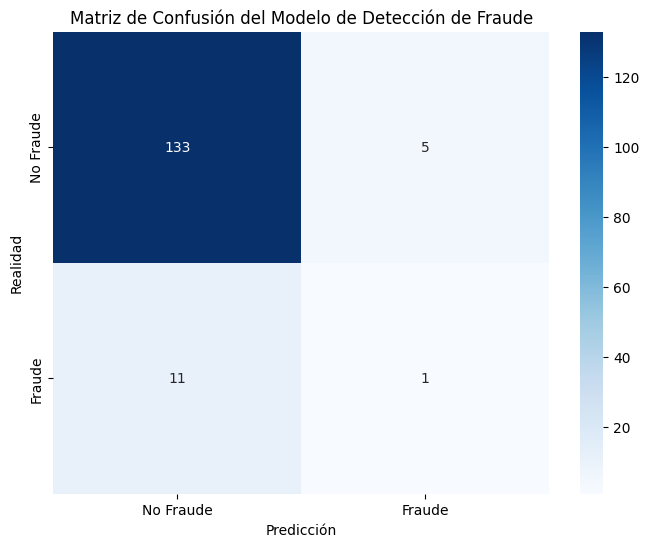

In [ ]:
import pandas as pd
from faker import Faker
import numpy as np
import random
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Simulación de Datos de Transacciones con Tarjeta de Crédito
fake = Faker('es_AR')
num_transacciones = 500
data_tarjetas = {
    'ID_Transaccion': range(1, num_transacciones + 1),
    'Fecha_Hora': pd.to_datetime([fake.date_time_this_year() for _ in range(num_transacciones)]),
    'ID_Tarjeta': [f"CC-{random.randint(1000000000, 9999999999)}" for _ in range(num_transacciones)],
    'Monto': np.random.uniform(10, 1000, num_transacciones),
    'Comercio': [fake.company() for _ in range(num_transacciones)],
    'Ubicacion_Comercio': [fake.city() + ", " + fake.country() for _ in range(num_transacciones)],
    'Tipo_Transaccion': [random.choice(['Compra', 'Retiro', 'Pago']) for _ in range(num_transacciones)],
    'Pais_IP': [fake.country() for _ in range(num_transacciones)], # Simulación de país de conexión
    'Es_Fraudulenta': np.zeros(num_transacciones, dtype=int)
}
df_tarjetas = pd.DataFrame(data_tarjetas)

# 2. Simulación de Casos de Fraude en Tarjetas de Crédito
num_fraudes = int(num_transacciones * 0.05)
fraude_indices = np.random.choice(df_tarjetas.index, num_fraudes, replace=False)
df_tarjetas.loc[fraude_indices, 'Es_Fraudulenta'] = 1

for idx in fraude_indices:
    if random.random() < 0.4: # Transacciones en ubicaciones geográficas inusuales
        df_tarjetas.loc[idx, 'Ubicacion_Comercio'] = fake.city() + ", " + fake.country() if random.random() < 0.8 else fake.city() + ", " + "Otro País"
    elif random.random() < 0.3: # Montos altos en comercios de bajo valor (ejemplo)
        df_tarjetas.loc[idx, 'Monto'] = np.random.uniform(500, 2000)
        df_tarjetas.loc[idx, 'Comercio'] = random.choice(['Tienda de Abarrotes', 'Kiosco', 'Cafetería'])
    elif random.random() < 0.3: # Múltiples transacciones rápidas y en el mismo comercio
        fecha_base = df_tarjetas.loc[idx, 'Fecha_Hora']
        if idx + 1 < len(df_tarjetas):
            df_tarjetas.loc[idx + 1, 'Fecha_Hora'] = fecha_base + timedelta(minutes=random.randint(1, 5))
            df_tarjetas.loc[idx + 1, 'ID_Tarjeta'] = df_tarjetas.loc[idx, 'ID_Tarjeta']
            df_tarjetas.loc[idx + 1, 'Comercio'] = df_tarjetas.loc[idx, 'Comercio']
            df_tarjetas.loc[idx + 1, 'Monto'] = np.random.uniform(20, 150)
            df_tarjetas.loc[idx + 1, 'Es_Fraudulenta'] = 1
        if idx + 2 < len(df_tarjetas) and random.random() < 0.5:
            df_tarjetas.loc[idx + 2, 'Fecha_Hora'] = fecha_base + timedelta(minutes=random.randint(2, 7))
            df_tarjetas.loc[idx + 2, 'ID_Tarjeta'] = df_tarjetas.loc[idx, 'ID_Tarjeta']
            df_tarjetas.loc[idx + 2, 'Comercio'] = df_tarjetas.loc[idx, 'Comercio']
            df_tarjetas.loc[idx + 2, 'Monto'] = np.random.uniform(10, 100)
            df_tarjetas.loc[idx + 2, 'Es_Fraudulenta'] = 1
    if random.random() < 0.2: # Retiros en cajeros automáticos en lugares sospechosos (ejemplo)
        df_tarjetas.loc[idx, 'Tipo_Transaccion'] = 'Retiro'
        df_tarjetas.loc[idx, 'Ubicacion_Comercio'] = fake.city() + ", " + "Otro País"
        df_tarjetas.loc[idx, 'Monto'] = np.random.uniform(200, 500)

# 3. Ingeniería de Características para la Detección de Fraude

# a) Monto Alto
umbral_monto_alto = 750
df_tarjetas['Monto_Alto'] = (df_tarjetas['Monto'] > umbral_monto_alto).astype(int)

# b) Transacciones en Diferentes Países
df_tarjetas['Pais_Comercio'] = df_tarjetas['Ubicacion_Comercio'].apply(lambda x: x.split(', ')[1] if ', ' in x else 'Desconocido')
df_tarjetas['Transaccion_Internacional'] = np.where(df_tarjetas['Pais_Comercio'] != 'Argentina', 1, 0)

# c) Múltiples Transacciones en Corto Período
df_tarjetas['Fecha_Hora_Truncada'] = df_tarjetas['Fecha_Hora'].dt.floor('T') # Truncar a minutos
frecuencia_transacciones = df_tarjetas.groupby(['ID_Tarjeta', 'Fecha_Hora_Truncada']).size().reset_index(name='Frecuencia')
df_tarjetas = pd.merge(df_tarjetas, frecuencia_transacciones, on=['ID_Tarjeta', 'Fecha_Hora_Truncada'], how='left')
df_tarjetas['Transacciones_Rapidas'] = (df_tarjetas['Frecuencia'] > 2).fillna(0).astype(int) # Más de 2 transacciones por minuto

# d) Transacciones en Comercios de Alto Riesgo (Ejemplo Simplificado)
comercios_riesgo = ['Tienda de Joyería', 'Electrónicos', 'Librería Online']
df_tarjetas['Comercio_Riesgo'] = df_tarjetas['Comercio'].apply(lambda x: 1 if any(riesgo in x for riesgo in comercios_riesgo) else 0)

# e) Tipo de Transacción "Retiro" con Monto Alto
df_tarjetas['Retiro_Monto_Alto'] = np.where((df_tarjetas['Tipo_Transaccion'] == 'Retiro') & (df_tarjetas['Monto'] > 300), 1, 0)

# 4. Preparación de Datos para el Modelo de Detección de Fraude
features = ['Monto', 'Monto_Alto', 'Transaccion_Internacional',
            'Transacciones_Rapidas', 'Comercio_Riesgo', 'Retiro_Monto_Alto',
            'Tipo_Transaccion']
X = df_tarjetas[features]
y = df_tarjetas['Es_Fraudulenta']
X = X.fillna(0)

# Codificación de variables categóricas
le_tipo_transaccion = LabelEncoder()
X['Tipo_Transaccion_Cod'] = le_tipo_transaccion.fit_transform(X['Tipo_Transaccion'])
X = X.drop('Tipo_Transaccion', axis=1)
features.remove('Tipo_Transaccion')
features.append('Tipo_Transaccion_Cod')

# 5. Diseño del Sistema de Detección de Fraude (Modelo de IA)
print("\nCódigo para Detección de Fraude en Tarjetas de Crédito")
print("\nEjemplo de un Sistema de Detección de Fraude (Modelo de IA):")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

modelo_deteccion_fraude_tarjeta = RandomForestClassifier(random_state=42)
modelo_deteccion_fraude_tarjeta.fit(X_train_scaled, y_train)
y_pred_fraude_tarjeta = modelo_deteccion_fraude_tarjeta.predict(X_test_scaled)

# 6. Evaluación del Modelo y Matriz de Confusión con Gráfico
print("\nEvaluación del Modelo de Detección de Fraude en Tarjetas de Crédito:")
print("\nMatriz de Confusión:")
cm = confusion_matrix(y_test, y_pred_fraude_tarjeta)
print(cm)

print("\nLa matriz de confusión muestra:")
print(f"  - Verdaderos Negativos (TN): {cm[0, 0]} (Transacciones no fraudulentas correctamente clasificadas)")
print(f"  - Falsos Positivos (FP): {cm[0, 1]} (Transacciones no fraudulentas clasificadas incorrectamente como fraudulentas)")
print(f"  - Falsos Negativos (FN): {cm[1, 0]} (Transacciones fraudulentas clasificadas incorrectamente como no fraudulentas)")
print(f"  - Verdaderos Positivos (TP): {cm[1, 1]} (Transacciones fraudulentas correctamente clasificadas)")

# Visualización de la Matriz de Confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Fraude', 'Fraude'],
            yticklabels=['No Fraude', 'Fraude'])
plt.title('Matriz de Confusión del Modelo de Detección de Fraude')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

plt.figure(figsize=(8, 6)): Crea una nueva figura de matplotlib con un tamaño de 8x6 pulgadas para el gráfico.
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ...): Utiliza la función heatmap de la biblioteca seaborn para crear un mapa de calor de la matriz de confusión (cm).
annot=True: Muestra los valores numéricos dentro de cada celda del mapa de calor.
fmt='d': Formatea los números dentro de las celdas como enteros.
cmap='Blues': Utiliza la paleta de colores "Blues" para el mapa de calor.
xticklabels=['No Fraude', 'Fraude']: Etiqueta los ejes x (las predicciones) con los nombres de las clases.
yticklabels=['No Fraude', 'Fraude']: Etiqueta los ejes y (las realidades) con los nombres de las clases.
plt.title('Matriz de Confusión del Modelo de Detección de Fraude'): Establece el título del gráfico.
plt.xlabel('Predicción'): Etiqueta el eje x.
plt.ylabel('Realidad'): Etiqueta el eje y.
plt.show(): Muestra el gráfico.
Este gráfico proporciona una representación visual clara de la matriz de confusión, lo que facilita la comprensión de cómo el modelo está clasificando las transacciones fraudulentas y no fraudulentas. Los colores más oscuros indican valores más altos en las celdas.

### codigo para la justicia


Análisis de Casos Judiciales:
----------------------------------------

Número total de casos: 150

1. Análisis del Tiempo de Proceso:
Tiempo promedio de proceso (días): 933.63
Tiempo mínimo de proceso (días): 33
Tiempo máximo de proceso (días): 1785

Distribución del Tiempo de Proceso:


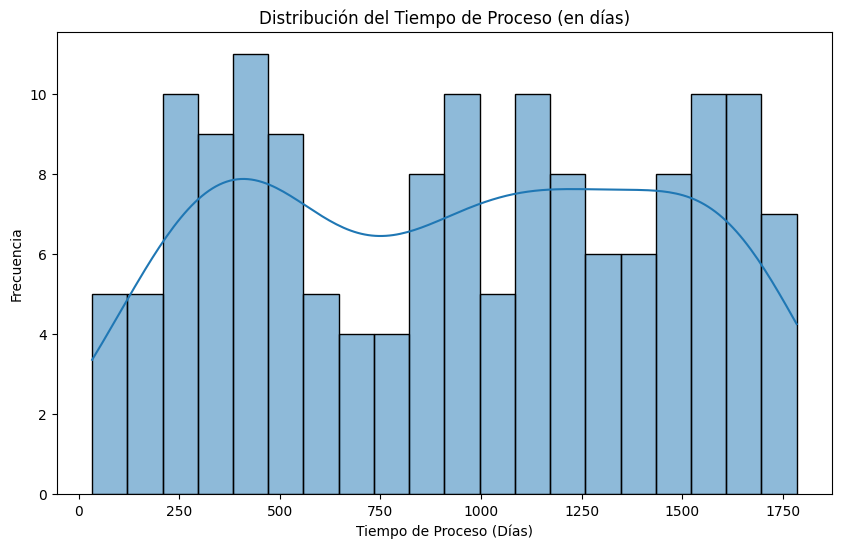


2. Análisis de Fallos:

Distribución de los Fallos:
Fallo
Desfavorable    42
Conciliación    39
Favorable       37
Sin Definir     32
Name: count, dtype: int64


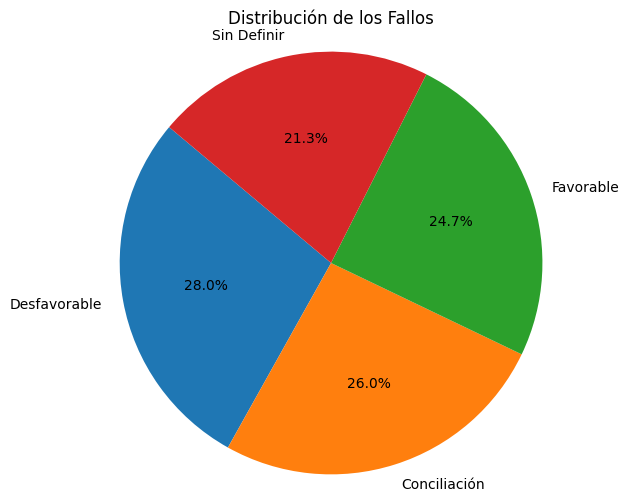


3. Tiempo de Proceso por Tipo de Causa:

Tiempo promedio de proceso por tipo de causa (días):
Tipo_Causa
Comercial    1009.933333
Laboral      1007.240000
Civil         899.583333
Penal         841.613636
Name: Tiempo_Proceso_Dias, dtype: float64


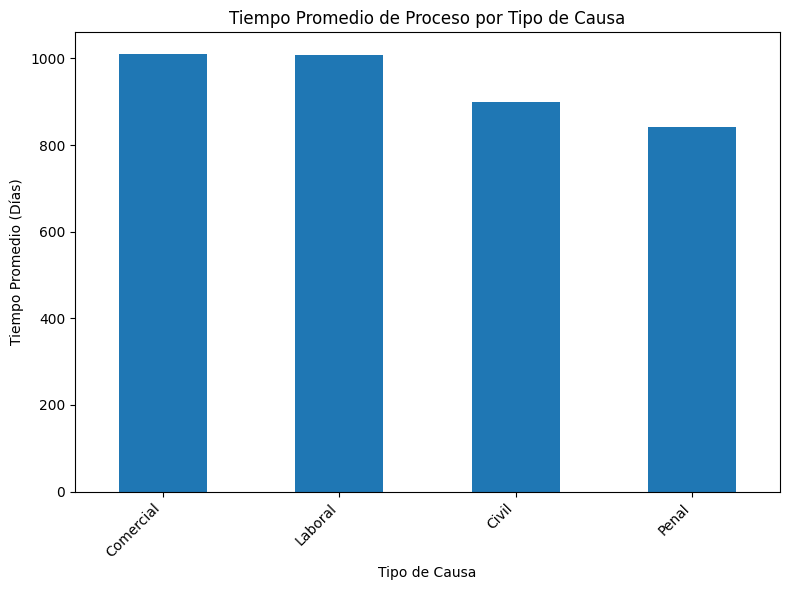


4. Fallos por Tipo de Causa:

Distribución de los Fallos por Tipo de Causa:
Fallo       Conciliación  Desfavorable  Favorable  Sin Definir
Tipo_Causa                                                    
Civil                  6             8         12           10
Comercial             14            14          6           11
Laboral                7             6          8            4
Penal                 12            14         11            7


<Figure size 1000x600 with 0 Axes>

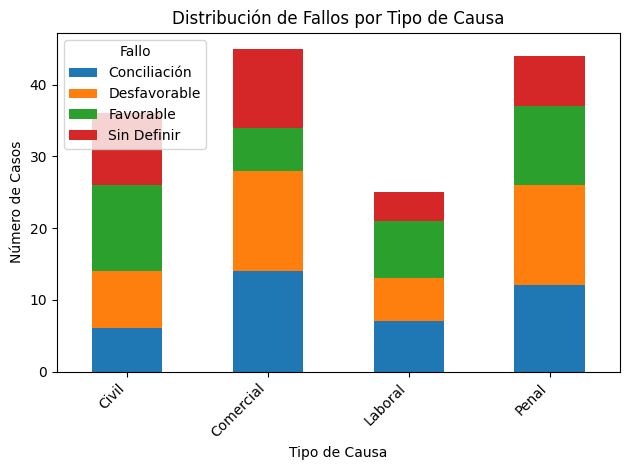


5. Tiempo de Proceso por Estado Actual:

Tiempo promedio de proceso por estado actual (días):
Estado_Actual
En Curso               982.184211
Pendiente de Juicio    980.565217
Ejecución              976.080000
Apelación              810.073171
Name: Tiempo_Proceso_Dias, dtype: float64


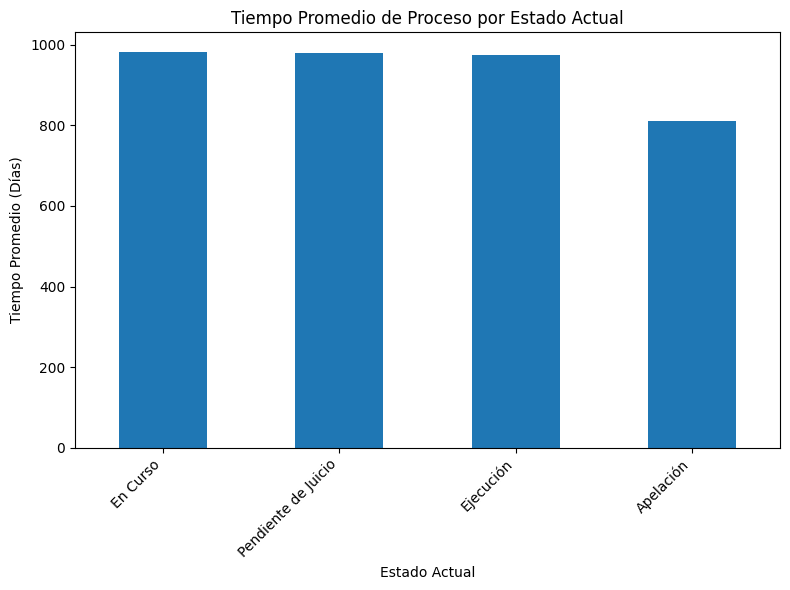


6. Fallos por Instancia:

Distribución de los Fallos por Instancia:
Fallo                  Conciliación  Desfavorable  Favorable  Sin Definir
Instancia                                                                
Corte Suprema                     9            13         14           13
Cámara de Apelaciones            22            22         16            9
Primera Instancia                 8             7          7           10


<Figure size 800x600 with 0 Axes>

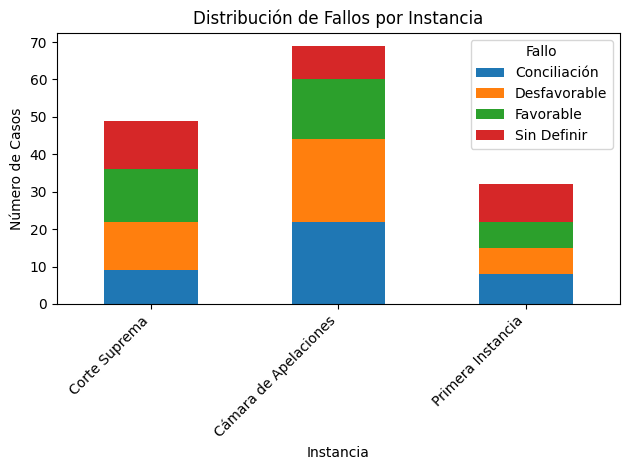

In [ ]:
import pandas as pd
from faker import Faker
import numpy as np
import random
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de la Faker para Argentina
fake = Faker('es_AR')

def generar_casos_judiciales(num_casos=100):
    """Genera datos simulados de casos judiciales."""
    data = {
        'ID_Caso': range(1, num_casos + 1),
        'Fecha_Inicio': pd.to_datetime([fake.date_between(start_date='-5y', end_date='today') for _ in range(num_casos)]),
        'Tipo_Causa': [random.choice(['Civil', 'Penal', 'Laboral', 'Comercial']) for _ in range(num_casos)],
        'Estado_Actual': [random.choice(['En Curso', 'Pendiente de Juicio', 'Apelación', 'Ejecución']) for _ in range(num_casos)],
        'Juzgado': [f"Juzgado {random.randint(1, 20)} de {fake.city()}" for _ in range(num_casos)],
        'Partes': [f"{fake.name()} vs. {fake.name()}" for _ in range(num_casos)],
        'Materia': [random.choice(['Daños y Perjuicios', 'Robo', 'Despido', 'Quiebra']) for _ in range(num_casos)],
        'Fecha_Ultima_Movimiento': pd.to_datetime([fake.date_between(start_date=fecha_inicio, end_date='today') for fecha_inicio in pd.to_datetime([fake.date_between(start_date='-5y', end_date='today') for _ in range(num_casos)])]),
        'Tiempo_Proceso_Dias': np.random.randint(30, 1800, num_casos), # Simulación de tiempo en días
        'Fallo': [random.choice(['Favorable', 'Desfavorable', 'Conciliación', 'Sin Definir']) for _ in range(num_casos)],
        'Instancia': [random.choice(['Primera Instancia', 'Cámara de Apelaciones', 'Corte Suprema']) for _ in range(num_casos)],
        'Tiene_Recurso': [random.choice(['Sí', 'No']) for _ in range(num_casos)],
        'Documentos_Adjuntos': np.random.randint(0, 50, num_casos)
    }
    df = pd.DataFrame(data)
    df
    df['Fecha_Fin'] = df['Fecha_Inicio'] + pd.to_timedelta(df['Tiempo_Proceso_Dias'], unit='D')
    return df

def analizar_justicia(df_casos):
    """Analiza los datos de casos judiciales."""
    print("\nAnálisis de Casos Judiciales:")
    print("-" * 40)

    print(f"\nNúmero total de casos: {len(df_casos)}")

    # 1. Tiempo de Proceso
    print("\n1. Análisis del Tiempo de Proceso:")
    print(f"Tiempo promedio de proceso (días): {df_casos['Tiempo_Proceso_Dias'].mean():.2f}")
    print(f"Tiempo mínimo de proceso (días): {df_casos['Tiempo_Proceso_Dias'].min()}")
    print(f"Tiempo máximo de proceso (días): {df_casos['Tiempo_Proceso_Dias'].max()}")
    print("\nDistribución del Tiempo de Proceso:")
    plt.figure(figsize=(10, 6))
    sns.histplot(df_casos['Tiempo_Proceso_Dias'], bins=20, kde=True)
    plt.title('Distribución del Tiempo de Proceso (en días)')
    plt.xlabel('Tiempo de Proceso (Días)')
    plt.ylabel('Frecuencia')
    plt.show()

    # 2. Análisis de Fallos
    print("\n2. Análisis de Fallos:")
    fallos_counts = df_casos['Fallo'].value_counts()
    print("\nDistribución de los Fallos:")
    print(fallos_counts)
    plt.figure(figsize=(6, 6))
    plt.pie(fallos_counts, labels=fallos_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title('Distribución de los Fallos')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

    # 3. Tiempo de Proceso por Tipo de Causa
    print("\n3. Tiempo de Proceso por Tipo de Causa:")
    tiempo_por_causa = df_casos.groupby('Tipo_Causa')['Tiempo_Proceso_Dias'].mean().sort_values(ascending=False)
    print("\nTiempo promedio de proceso por tipo de causa (días):")
    print(tiempo_por_causa)
    plt.figure(figsize=(8, 6))
    tiempo_por_causa.plot(kind='bar')
    plt.title('Tiempo Promedio de Proceso por Tipo de Causa')
    plt.ylabel('Tiempo Promedio (Días)')
    plt.xlabel('Tipo de Causa')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # 4. Fallos por Tipo de Causa
    print("\n4. Fallos por Tipo de Causa:")
    fallos_por_causa = df_casos.groupby(['Tipo_Causa', 'Fallo']).size().unstack(fill_value=0)
    print("\nDistribución de los Fallos por Tipo de Causa:")
    print(fallos_por_causa)
    plt.figure(figsize=(10, 6))
    fallos_por_causa.plot(kind='bar', stacked=True)
    plt.title('Distribución de Fallos por Tipo de Causa')
    plt.ylabel('Número de Casos')
    plt.xlabel('Tipo de Causa')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # 5. Tiempo de Proceso por Estado Actual
    print("\n5. Tiempo de Proceso por Estado Actual:")
    tiempo_por_estado = df_casos.groupby('Estado_Actual')['Tiempo_Proceso_Dias'].mean().sort_values(ascending=False)
    print("\nTiempo promedio de proceso por estado actual (días):")
    print(tiempo_por_estado)
    plt.figure(figsize=(8, 6))
    tiempo_por_estado.plot(kind='bar')
    plt.title('Tiempo Promedio de Proceso por Estado Actual')
    plt.ylabel('Tiempo Promedio (Días)')
    plt.xlabel('Estado Actual')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # 6. Fallos por Instancia
    print("\n6. Fallos por Instancia:")
    fallos_por_instancia = df_casos.groupby(['Instancia', 'Fallo']).size().unstack(fill_value=0)
    print("\nDistribución de los Fallos por Instancia:")
    print(fallos_por_instancia)
    plt.figure(figsize=(8, 6))
    fallos_por_instancia.plot(kind='bar', stacked=True)
    plt.title('Distribución de Fallos por Instancia')
    plt.ylabel('Número de Casos')
    plt.xlabel('Instancia')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Ejemplo de Uso
if __name__ == "__main__":
    num_casos_simulados = 150
    df_casos_judiciales = generar_casos_judiciales(num_casos_simulados)
    analizar_justicia(df_casos_judiciales)

Funciones Principales:

generar_casos_judiciales(num_casos=100):

Esta función utiliza la biblioteca faker para generar datos simulados de casos judiciales.
Crea un DataFrame de pandas con columnas como ID_Caso, Fecha_Inicio, Tipo_Causa, Estado_Actual, Juzgado, Partes, Materia, Fecha_Ultima_Movimiento, Tiempo_Proceso_Dias, Fallo, Instancia, Tiene_Recurso, y Documentos_Adjuntos.
La columna Tiempo_Proceso_Dias se simula con valores aleatorios.
La columna Fecha_Fin se calcula sumando la Fecha_Inicio con la duración del proceso en días.
Devuelve un DataFrame con los datos simulados.
analizar_justicia(df_casos):

Esta función toma un DataFrame de casos judiciales como entrada y realiza el análisis.
Tiempo de Proceso:
Calcula el tiempo promedio, mínimo y máximo de proceso en días.
Genera un histograma para visualizar la distribución del tiempo de proceso.
Análisis de Fallos:
Calcula la frecuencia de cada tipo de fallo (Favorable, Desfavorable, etc.).
Genera un gráfico de pastel para mostrar la proporción de cada tipo de fallo.
Tiempo de Proceso por Tipo de Causa:
Calcula el tiempo promedio de proceso para cada tipo de causa (Civil, Penal, etc.).
Genera un gráfico de barras para comparar los tiempos de proceso entre diferentes tipos de causas.
Fallos por Tipo de Causa:
Agrupa los datos por tipo de causa y fallo para contar la frecuencia de cada combinación.
Genera un gráfico de barras apiladas para visualizar la distribución de los fallos dentro de cada tipo de causa.
Tiempo de Proceso por Estado Actual:
Calcula el tiempo promedio de proceso para cada estado actual del caso.
Genera un gráfico de barras para comparar los tiempos de proceso en diferentes estados.
Fallos por Instancia:
Agrupa los datos por instancia y fallo para contar la frecuencia de cada combinación.
Genera un gráfico de barras apiladas para visualizar la distribución de los fallos en diferentes instancias judiciales.
Ejemplo de Uso:

En el bloque if __name__ == "__main__":, se define el número de casos a simular (num_casos_simulados).
Se llama a la función generar_casos_judiciales para crear un DataFrame con datos simulados.
Se llama a la función analizar_justicia para realizar el análisis y generar los resultados y gráficos.
Para ejecutar este código:

Instala las librerías: Si no las tienes instaladas, ejecuta en tu terminal:
Bash

pip install pandas faker numpy scikit-learn matplotlib seaborn
Guarda el código: Guarda el código en un archivo Python (por ejemplo, analisis_justicia.py).
Ejecuta el archivo: Abre tu terminal o línea de comandos, navega hasta el directorio donde guardaste el archivo y ejecuta:
Bash

python analisis_justicia.py
El código generará una serie de impresiones con estadísticas y mostrará varios gráficos que visualizan el tiempo de proceso y la distribución de los fallos judiciales simulados.

Consideraciones Importantes:

Datos Simulados: Los datos generados son simulados y no representan datos reales de la justicia argentina. Los valores y distribuciones son aleatorios.
Personalización: Puedes modificar la función generar_casos_judiciales para simular datos de manera más específica o realista según tus necesidades.
Análisis Más Profundo: Este es un análisis básico. Para un análisis más profundo, podrías considerar:
Análisis de correlación entre variables.
Modelado predictivo para estimar el tiempo de resolución de los casos.
Análisis de texto de los fallos (si los tuvieras).
Análisis de sesgos (aunque en este caso, los datos son simulados).
Contexto de Argentina: La configuración de Faker('es_AR') asegura que se utilicen nombres y ciudades de Argentina en la simulación, pero la lógica de los casos y los tiempos de proceso son genéricos.

https://sistemaspublicos.tech/


In [ ]:
import pandas as pd
from faker import Faker
import numpy as np
import random
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from cryptography.fernet import Fernet
import hashlib

# Configuración de Faker para Argentina
fake = Faker('es_AR')

def generar_datos_sensibles(num_registros=50):
    """Genera datos simulados que podrían contener información sensible."""
    data = {
        'ID_Usuario': range(1, num_registros + 1),
        'Nombre_Completo': [fake.name() for _ in range(num_registros)],
        'DNI': [str(random.randint(10000000, 99999999)) for _ in range(num_registros)],
        'Direccion': [fake.address() for _ in range(num_registros)],
        'Numero_Telefono': [fake.phone_number() for _ in range(num_registros)],
        'Correo_Electronico': [fake.email() for _ in range(num_registros)],
        'Informacion_Bancaria': [f"****-****-****-{random.randint(1000, 9999)}" for _ in range(num_registros)],
        'Historial_Medico': [random.choice(['Dolor de cabeza', 'Gripe', 'Alergia', 'Ninguno']) for _ in range(num_registros)],
        'Fecha_Nacimiento': pd.to_datetime([fake.date_of_birth(minimum_age=18, maximum_age=80) for _ in range(num_registros)]),
        'Preferencias_Compra': [random.choice(['Ropa', 'Electrónicos', 'Libros', 'Alimentos']) for _ in range(num_registros)],
        'IP_Acceso': [fake.ipv4() for _ in range(num_registros)],
        'Contrasena_Hash': [hashlib.sha256(str(random.randint(100000, 999999)).encode()).hexdigest() for _ in range(num_registros)]
    }
    df = pd.DataFrame(data)
    return df

def encriptar_datos(df, columnas_a_encriptar, clave):
    """Encripta las columnas especificadas de un DataFrame."""
    f = Fernet(clave)
    df_encriptado = df.copy()
    for columna in columnas_a_encriptar:
        if columna in df_encriptado.columns:
            try:
                df_encriptado[columna] = df_encriptado[columna].apply(lambda x: f.encrypt(str(x).encode()).decode() if pd.notna(x) else np.nan)
                print(f"Columna '{columna}' encriptada.")
            except Exception as e:
                print(f"Error al encriptar la columna '{columna}': {e}")
        else:
            print(f"Advertencia: La columna '{columna}' no existe en el DataFrame.")
    return df_encriptado

def desencriptar_datos(df, columnas_a_desencriptar, clave):
    """Desencripta las columnas especificadas de un DataFrame."""
    f = Fernet(clave)
    df_desencriptado = df.copy()
    for columna in columnas_a_desencriptar:
        if columna in df_desencriptado.columns:
            try:
                df_desencriptado[columna] = df_desencriptado[columna].apply(lambda x: f.decrypt(x.encode()).decode() if pd.notna(x) else np.nan)
                print(f"Columna '{columna}' desencriptada.")
            except Exception as e:
                print(f"Error al desencriptar la columna '{columna}': {e}")
        else:
            print(f"Advertencia: La columna '{columna}' no existe en el DataFrame.")
    return df_desencriptado

def anonimizar_datos(df, columnas_a_anonimizar):
    """Anonimiza las columnas especificadas de un DataFrame."""
    df_anonimizado = df.copy()
    for columna in columnas_a_anonimizar:
        if columna in df_anonimizado.columns:
            if df_anonimizado[columna].dtype == 'object':
                df_anonimizado[columna] = df_anonimizado[columna].apply(lambda x: f"Anonimizado_{random.randint(1000, 9999)}" if pd.notna(x) else np.nan)
                print(f"Columna '{columna}' anonimizada (sustitución genérica).")
            elif pd.api.types.is_numeric_dtype(df_anonimizado[columna]):
                df_anonimizado[columna] = np.nan # Reemplazar con NaN para anonimizar numéricos
                print(f"Columna numérica '{columna}' anonimizada (reemplazada con NaN).")
            elif pd.api.types.is_datetime64_any_dtype(df_anonimizado[columna]):
                df_anonimizado[columna] = pd.NaT # Reemplazar con NaT para anonimizar fechas
                print(f"Columna de fecha '{columna}' anonimizada (reemplazada con NaT).")
            else:
                print(f"Advertencia: No se pudo anonimizar la columna '{columna}' (tipo de dato no manejado).")
        else:
            print(f"Advertencia: La columna '{columna}' no existe en el DataFrame.")
    return df_anonimizado

def enmascarar_datos(df, columnas_a_enmascarar, caracter='*'):
    """Enmascara (oculta) los datos en las columnas especificadas."""
    df_enmascarado = df.copy()
    for columna in columnas_a_enmascarar:
        if columna in df_enmascarado.columns:
            df_enmascarado[columna] = df_enmascarado[columna].apply(lambda x: caracter * len(str(x)) if pd.notna(x) else np.nan)
            print(f"Columna '{columna}' enmascarada.")
        else:
            print(f"Advertencia: La columna '{columna}' no existe en el DataFrame.")
    return df_enmascarado

def auditar_accesos(log_df, usuario, accion, registros_afectados=None, detalles="Acceso a datos sensibles"):
    """Simula el registro de auditoría de accesos a datos."""
    timestamp = datetime.now()
    log_entry = pd.DataFrame([{
        'Timestamp': timestamp,
        'Usuario': usuario,
        'Accion': accion,
        'Registros_Afectados': registros_afectados if registros_afectados is not None else 1,
        'Detalles': detalles
    }])
    log_df = pd.concat([log_df, log_entry], ignore_index=True)
    print("\nRegistro de Auditoría:")
    print(log_entry)
    return log_df

def verificar_integridad(df_original, df_modificado, columnas_clave):
    """Verifica la integridad de los datos comparando dos DataFrames."""
    if not isinstance(df_original, pd.DataFrame) or not isinstance(df_modificado, pd.DataFrame):
        print("Error: Ambas entradas deben ser DataFrames.")
        return False

    if not all(col in df_original.columns for col in columnas_clave) or not all(col in df_modificado.columns for col in columnas_clave):
        print("Error: Las columnas clave deben existir en ambos DataFrames.")
        return False

    if df_original.shape != df_modificado.shape:
        print("Advertencia: Los DataFrames tienen diferentes formas.")
        return False

    merged = pd.merge(df_original, df_modificado, on=columnas_clave, how='inner', suffixes=('_original', '_modificado'))
    if len(merged) != len(df_original):
        print("Advertencia: No se encontraron todas las filas clave en el DataFrame modificado.")
        return False

    diferencias = {}
    for col in df_original.columns:
        if col not in columnas_clave:
            if not df_original[col].equals(df_modificado[col]):
                diferencias[col] = (df_original[col].nunique(), df_modificado[col].nunique())
    if diferencias:
        print("\nVerificación de Integridad: Se detectaron diferencias en las siguientes columnas:")
        for col, (nunique_orig, nunique_mod) in diferencias.items():
            print(f"- Columna '{col}': Número de valores únicos (Original: {nunique_orig}, Modificado: {nunique_mod})")
        return False
    else:
        print("\nVerificación de Integridad: Los datos parecen intactos (basado en las columnas clave).")
        return True

# Ejemplo de Uso para Privacidad y Seguridad de la Información
if __name__ == "__main__":
    num_registros_simulados = 10
    datos_sensibles_df = generar_datos_sensibles(num_registros_simulados)
    print("\nDatos Sensibles Originales:")
    print(datos_sensibles_df)

    # 1. Encriptación de Datos Sensibles
    clave = Fernet.generate_key()
    print(f"\nClave de Encriptación Generada: {clave.decode()}")
    columnas_a_encriptar = ['DNI', 'Numero_Telefono', 'Correo_Electronico', 'Informacion_Bancaria']
    datos_encriptados_df = encriptar_datos(datos_sensibles_df.copy(), columnas_a_encriptar, clave)
    print("\nDatos Sensibles Encriptados:")
    print(datos_encriptados_df)

    # 2. Desencriptación (Ejemplo)
    print("\nEjemplo de Desencriptación:")
    columnas_a_desencriptar = ['DNI', 'Numero_Telefono']
    datos_desencriptados_df = desencriptar_datos(datos_encriptados_df.copy(), columnas_a_desencriptar, clave)
    print("\nDatos Desencriptados (Ejemplo):")
    print(datos_desencriptados_df[['ID_Usuario'] + columnas_a_desencriptar])

    # 3. Anonimización de Datos
    columnas_a_anonimizar = ['Nombre_Completo', 'Direccion', 'Fecha_Nacimiento', 'IP_Acceso']
    datos_anonimizados_df = anonimizar_datos(datos_sensibles_df.copy(), columnas_a_anonimizar)
    print("\nDatos Anonimizados:")
    print(datos_anonimizados_df[['ID_Usuario'] + columnas_a_anonimizar + ['Correo_Electronico']])

    # 4. Enmascaramiento de Datos
    columnas_a_enmascarar = ['ID_Tarjeta', 'Contrasena_Hash']
    datos_enmascarados_df = enmascarar_datos(datos_sensibles_df.copy(), columnas_a_enmascarar)
    print("\nDatos Enmascarados:")
    datos_enmascarados_df = enmascarar_datos(datos_sensibles_df.copy(), columnas_a_enmascarar)

    # 5. Auditoría de Accesos
    log_auditoria = pd.DataFrame() # Inicializar el DataFrame de log
    log_auditoria = auditar_accesos(log_auditoria, 'Usuario_Admin', 'Acceso_Lectura', registros_afectados=len(datos_sensibles_df.head(2)), detalles='Acceso a datos sensibles')
    log_auditoria = auditar_accesos(log_auditoria, 'Usuario_Analista', 'Acceso_Lectura_Encriptado', registros_afectados=len(datos_encriptados_df), detalles='Acceso a datos encriptados')
    print("\nRegistro de Auditoría Completo:")
    print(log_auditoria)

    # 6. Verificación de Integridad (Ejemplo Simple)
    print("\nEjemplo de Verificación de Integridad:")
    columnas_clave_integridad = ['ID_Usuario']
    if verificar_integridad(datos_sensibles_df, datos_sensibles_df.copy(), columnas_clave_integridad):
        print("La integridad de los datos originales se mantiene.")
    else:
        print("Se detectaron inconsistencias en los datos originales.")

    # Ejemplo de verificación con datos modificados (simulación)
    datos_modificados = datos_sensibles_df.copy()
    if not datos_modificados.empty:
        datos_modificados.loc[0, 'Nombre_Completo'] = 'Nombre Modificado'
        print("\nVerificación de Integridad con Datos Modificados:")
        if verificar_integridad(datos_sensibles_df, datos_modificados, columnas_clave_integridad):
            print("La integridad de los datos se mantiene.")
        else:
            print("Se detectaron inconsistencias en los datos modificados.")


Datos Sensibles Originales:
   ID_Usuario                 Nombre_Completo       DNI  \
0           1         Luciano Luana Fernandez  13794414   
1           2             Bruno Escobar Perez  74053688   
2           3  Lucas Benjamin Martina Ramirez  30548016   
3           4            Emilia Godoy Cabrera  68595536   
4           5          Lucas Ezequiel Vazquez  45327873   
5           6               Valentino Escobar  23642558   
6           7   Juan Bautista Emma Ruiz Ramos  87875877   
7           8          Sr(a). Martina Peralta  40072945   
8           9   Lara Julieta Gutierrez Flores  79862372   
9          10                      Lucía Vera  30742205   

                                           Direccion   Numero_Telefono  \
0        Av. 9 N° 14\nUshuaia 9410, Tierra del Fuego   +54 9 3378 0869   
1   Calle San Luis N° 5670\nChilecito 5360, La Rioja   +54 9 3129 0293   
2  Avenida Chubut N° 468 Oficina 48\nRío Gallegos...   +54 9 3287 0196   
3  Av. Ushuaia N° 2480 To

Capítulo 11: El Futuro de los Algoritmos en la Lucha contra el Fraude y la Corrupción
11.1 Tendencias y Avances en Inteligencia Artificial para la Detección **texto en negrita**
11.2 El Papel de la Colaboración Público-Privada
11.3 Consideraciones Éticas y Regulatorias



Evaluación del Modelo de modelo_fraude:
Precisión: 0.8667

Reporte de Clasificación:
              precision    recall  f1-score   support

   No fraude       0.87      1.00      0.93        26
      fraude       0.00      0.00      0.00         4

    accuracy                           0.87        30
   macro avg       0.43      0.50      0.46        30
weighted avg       0.75      0.87      0.80        30



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


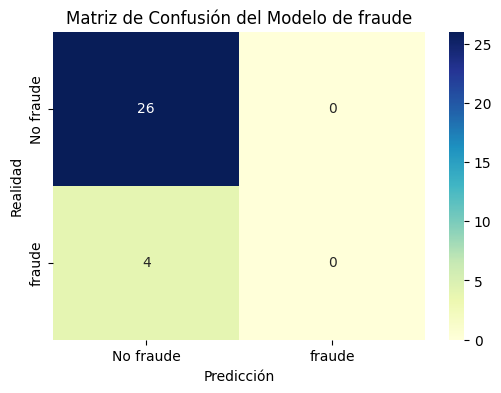


Evaluación del Modelo de modelo_corrupcion:
Precisión: 0.9667

Reporte de Clasificación:
               precision    recall  f1-score   support

No corrupcion       0.97      1.00      0.98        29
   corrupcion       0.00      0.00      0.00         1

     accuracy                           0.97        30
    macro avg       0.48      0.50      0.49        30
 weighted avg       0.93      0.97      0.95        30



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


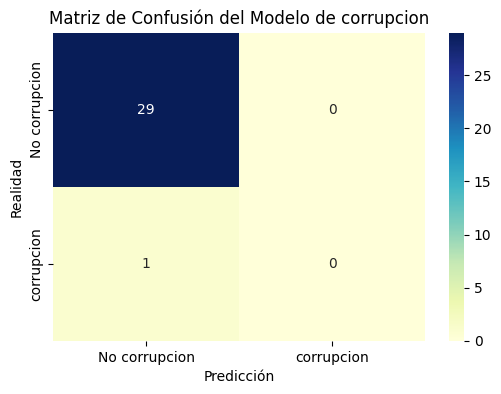



--- Capítulo 11: El Futuro de los Algoritmos en la Lucha contra el Fraude y la Corrupción ---

En la actualidad, los algoritmos ya desempeñan un papel crucial en la detección de fraudes financieros y otras formas de actividad ilícita. Sin embargo, el futuro promete avances aún más significativos.

1. Inteligencia Artificial Avanzada (IA):
- **Aprendizaje Profundo (Deep Learning):** Modelos más complejos y capaces de analizar patrones más sutiles en grandes volúmenes de datos, incluyendo texto, imágenes y series temporales. Esto permitirá detectar fraudes y actos de corrupción más sofisticados que escapan a los métodos tradicionales.
- **IA Explicable (XAI):** Algoritmos que no solo predicen, sino que también proporcionan razones claras y comprensibles para sus decisiones. Esto es fundamental para la confianza en los sistemas y para la investigación de casos.

2. Análisis de Redes y Grafos:
- **Detección de Conexiones Ocultas:** Algoritmos que analizan las relaciones entre individuos,

In [ ]:
import pandas as pd
from faker import Faker
import numpy as np
import random
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from cryptography.fernet import Fernet
import hashlib

# Configuración de Faker para Argentina
fake = Faker('es_AR')

def generar_datos_fraude_corrupcion(num_registros=150):
    """Genera datos simulados que ilustran escenarios de fraude y corrupción."""
    data = {
        'ID_Transaccion': range(1, num_registros + 1),
        'Fecha_Hora': pd.to_datetime([fake.date_time_this_year() for _ in range(num_registros)]),
        'Tipo_Transaccion': [random.choice(['Pago', 'Compra', 'Transferencia', 'Donación', 'Subsidio']) for _ in range(num_registros)],
        'Monto': np.random.uniform(10, 5000, num_registros),
        'Origen_Fondos': [fake.company() if random.random() < 0.7 else fake.name() for _ in range(num_registros)],
        'Destino_Fondos': [fake.company() if random.random() < 0.7 else fake.name() for _ in range(num_registros)],
        'Ubicacion': [fake.city() + ", " + fake.country() for _ in range(num_registros)],
        'ID_Beneficiario': [f"BEN-{random.randint(1000, 9999)}" for _ in range(num_registros)],
        'Tipo_Beneficiario': [random.choice(['Persona', 'Empresa', 'Organización Gubernamental']) for _ in range(num_registros)],
        'Informacion_Adicional': [fake.text(max_nb_chars=50) if random.random() < 0.3 else None for _ in range(num_registros)],
        'Sospecha_Fraude': np.zeros(num_registros, dtype=int),
        'Sospecha_Corrupcion': np.zeros(num_registros, dtype=int)
    }
    df = pd.DataFrame(data)

    # Simulación de Casos de Fraude
    num_fraudes = int(num_registros * 0.08)
    fraude_indices = np.random.choice(df.index, num_fraudes, replace=False)
    df.loc[fraude_indices, 'Sospecha_Fraude'] = 1
    for idx in fraude_indices:
        if random.random() < 0.4:
            df.loc[idx, 'Monto'] = np.random.uniform(5000, 15000) # Montos inusualmente altos
        if random.random() < 0.3:
            df.loc[idx, 'Tipo_Transaccion'] = 'Transferencia'
            df.loc[idx, 'Origen_Fondos'] = 'Empresa Fantasma S.A.'
            df.loc[idx, 'Destino_Fondos'] = fake.name()
        if random.random() < 0.2:
            df.loc[idx, 'Ubicacion'] = 'Paraiso Fiscal, Otro Pais'

    # Simulación de Casos de Corrupción
    num_corrupcion = int(num_registros * 0.05)
    corrupcion_indices = np.random.choice(df.index, num_corrupcion, replace=False)
    df.loc[corrupcion_indices, 'Sospecha_Corrupcion'] = 1
    for idx in corrupcion_indices:
        if random.random() < 0.5:
            df.loc[idx, 'Tipo_Transaccion'] = 'Donación'
            df.loc[idx, 'Origen_Fondos'] = fake.company()
            df.loc[idx, 'Destino_Fondos'] = 'Organización Gubernamental XYZ'
        if random.random() < 0.4:
            df.loc[idx, 'Monto'] = np.random.uniform(10000, 30000)
            df.loc[idx, 'Tipo_Transaccion'] = 'Pago'
            df.loc[idx, 'Destino_Fondos'] = fake.name() # Pago a funcionario
        if random.random() < 0.3:
            df.loc[idx, 'Informacion_Adicional'] = 'Pago por servicios no prestados'

    return df

def preparar_datos_para_modelo(df):
    """Prepara los datos para un modelo de clasificación."""
    df_procesado = df.copy()
    # Ingeniería de características (ejemplos básicos)
    df_procesado['Hora'] = df_procesado['Fecha_Hora'].dt.hour
    df_procesado['Dia_Semana'] = df_procesado['Fecha_Hora'].dt.dayofweek
    df_procesado['Monto_Alto'] = (df_procesado['Monto'] > 1000).astype(int)
    df_procesado['Es_Transferencia'] = (df_procesado['Tipo_Transaccion'] == 'Transferencia').astype(int)
    df_procesado['Origen_Gubernamental'] = df_procesado['Origen_Fondos'].apply(lambda x: 1 if 'Gubernamental' in x or 'Ministerio' in x else 0)
    df_procesado['Destino_Gubernamental'] = df_procesado['Destino_Fondos'].apply(lambda x: 1 if 'Gubernamental' in x or 'Ministerio' in x else 0)

    # Codificación de variables categóricas
    categorical_cols = ['Tipo_Transaccion', 'Tipo_Beneficiario']
    for col in categorical_cols:
        if col in df_procesado.columns:
            le = LabelEncoder()
            df_procesado[f'{col}_Cod'] = le.fit_transform(df_procesado[col])
            df_procesado = df_procesado.drop(col, axis=1)

    features = ['Monto', 'Hora', 'Dia_Semana', 'Monto_Alto', 'Es_Transferencia',
                'Origen_Gubernamental', 'Destino_Gubernamental', 'Tipo_Beneficiario_Cod']
    X = df_procesado[features]
    y_fraude = df_procesado['Sospecha_Fraude']
    y_corrupcion = df_procesado['Sospecha_Corrupcion']
    X = X.fillna(0) # Manejo básico de valores faltantes

    return X, y_fraude, y_corrupcion

def entrenar_modelo_fraude(X_train, y_train):
    """Entrena un modelo para detectar fraude."""
    modelo_fraude = RandomForestClassifier(random_state=42)
    modelo_fraude.fit(X_train, y_train)
    return modelo_fraude

def entrenar_modelo_corrupcion(X_train, y_train):
    """Entrena un modelo para detectar corrupción."""
    modelo_corrupcion = RandomForestClassifier(random_state=42)
    modelo_corrupcion.fit(X_train, y_train)
    return modelo_corrupcion

def evaluar_modelo(modelo, X_test, y_test, nombre_modelo):
    """Evalúa el rendimiento de un modelo de clasificación."""
    y_pred = modelo.predict(X_test)
    print(f"\nEvaluación del Modelo de {nombre_modelo}:")
    print(f"Precisión: {accuracy_score(y_test, y_pred):.4f}")
    print("\nReporte de Clasificación:")
    print(classification_report(y_test, y_pred, target_names=['No ' + nombre_modelo.replace('modelo_', ''), nombre_modelo.replace('modelo_', '')]))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
                xticklabels=['No ' + nombre_modelo.replace('modelo_', ''), nombre_modelo.replace('modelo_', '')],
                yticklabels=['No ' + nombre_modelo.replace('modelo_', ''), nombre_modelo.replace('modelo_', '')])
    plt.title(f'Matriz de Confusión del Modelo de {nombre_modelo.replace("modelo_", "")}')
    plt.xlabel('Predicción')
    plt.ylabel('Realidad')
    plt.show()

def futuro_algoritmos():
    """Simula el futuro de los algoritmos en la lucha contra el fraude y la corrupción."""
    print("\n\n--- Capítulo 11: El Futuro de los Algoritmos en la Lucha contra el Fraude y la Corrupción ---")
    print("\nEn la actualidad, los algoritmos ya desempeñan un papel crucial en la detección de fraudes financieros y otras formas de actividad ilícita. Sin embargo, el futuro promete avances aún más significativos.")
    print("\n1. Inteligencia Artificial Avanzada (IA):")
    print("- **Aprendizaje Profundo (Deep Learning):** Modelos más complejos y capaces de analizar patrones más sutiles en grandes volúmenes de datos, incluyendo texto, imágenes y series temporales. Esto permitirá detectar fraudes y actos de corrupción más sofisticados que escapan a los métodos tradicionales.")
    print("- **IA Explicable (XAI):** Algoritmos que no solo predicen, sino que también proporcionan razones claras y comprensibles para sus decisiones. Esto es fundamental para la confianza en los sistemas y para la investigación de casos.")
    print("\n2. Análisis de Redes y Grafos:")
    print("- **Detección de Conexiones Ocultas:** Algoritmos que analizan las relaciones entre individuos, organizaciones y transacciones para identificar redes de fraude y corrupción que de otra manera serían difíciles de descubrir.")
    print("- **Visualización de Redes:** Herramientas avanzadas para visualizar estas complejas redes, facilitando la comprensión y la investigación.")
    print("\n3. Procesamiento del Lenguaje Natural (PLN):")
    print("- **Análisis de Documentos y Comunicaciones:** Algoritmos que pueden analizar grandes cantidades de documentos legales, correos electrónicos y otras comunicaciones para identificar indicios de fraude y corrupción.")
    print("- **Detección de Sentimientos y Anormalidades:** Identificar patrones de lenguaje sospechosos o inconsistencias en la comunicación.")
    print("\n4. Datos Sintéticos y Privacidad Mejorada:")
    print("- **Entrenamiento con Datos Sintéticos:** Generación de datos sintéticos realistas para entrenar modelos sin necesidad de utilizar datos reales y sensibles, protegiendo la privacidad.")
    print("- **Técnicas de Privacidad Diferencial:** Métodos para analizar datos sin revelar información sensible sobre individuos.")
    print("\n5. Integración con Tecnologías Emergentes:")
    print("- **Blockchain:** Para transacciones más transparentes y rastreables, dificultando la manipulación de registros financieros.")
    print("- **Internet de las Cosas (IoT):** Para monitorear actividades y detectar comportamientos anómalos en diferentes contextos.")
    print("\n6. Desafíos y Consideraciones Éticas:")
    print("- **Sesgos Algorítmicos:** Es crucial abordar los sesgos inherentes en los datos y los algoritmos para evitar discriminación y falsos positivos en ciertos grupos.")
    print("- **Transparencia y Explicabilidad:** Garantizar que los algoritmos sean transparentes y sus decisiones comprensibles para fomentar la confianza y la rendición de cuentas.")
    print("- **Privacidad y Seguridad:** Implementar medidas robustas para proteger la privacidad de los datos utilizados en los análisis.")
    print("- **Adaptabilidad:** Los algoritmos deben ser capaces de adaptarse a las nuevas tácticas de fraude y corrupción que evolucionan constantemente.")
    print("\n7. Impacto en la Sociedad:")
    print("- **Mayor Eficiencia en la Detección:** Reducción de pérdidas económicas y mayor capacidad para identificar y prevenir actividades ilícitas.")
    print("- **Fortalecimiento de la Gobernanza:** Apoyo a las instituciones para combatir la corrupción y promover la transparencia.")
    print("- **Necesidad de Regulación y Marco Ético:** Es fundamental establecer marcos regulatorios y éticos para guiar el desarrollo y la implementación de estas tecnologías.")

    print("\nEn resumen, el futuro de los algoritmos en la lucha contra el fraude y la corrupción es prometedor, con el potencial de transformar la forma en que detectamos y prevenimos estas actividades. Sin embargo, es esencial abordar los desafíos éticos y técnicos para garantizar un uso responsable y efectivo de estas poderosas herramientas.")

if __name__ == "__main__":
    num_registros_simulados = 100
    df_casos = generar_datos_fraude_corrupcion(num_registros_simulados)
    X, y_fraude, y_corrupcion = preparar_datos_para_modelo(df_casos)
    X_train, X_test, y_train_fraude, y_test_fraude = train_test_split(X, y_fraude, test_size=0.3, random_state=42)
    X_train, X_test, y_train_corrupcion, y_test_corrupcion = train_test_split(X, y_corrupcion, test_size=0.3, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    modelo_fraude_entrenado = entrenar_modelo_fraude(X_train_scaled, y_train_fraude)
    evaluar_modelo(modelo_fraude_entrenado, X_test_scaled, y_test_fraude, "modelo_fraude")

    modelo_corrupcion_entrenado = entrenar_modelo_corrupcion(X_train_scaled, y_train_corrupcion)
    evaluar_modelo(modelo_corrupcion_entrenado, X_test_scaled, y_test_corrupcion, "modelo_corrupcion")

    futuro_algoritmos()

generar_datos_fraude_corrupcion(num_registros=150):

Esta función simula datos de transacciones que pueden estar relacionadas tanto con fraude como con corrupción.
Incluye nuevas columnas y escenarios simulados para representar:
Fraude: Montos inusualmente altos, transferencias a empresas fantasma, transacciones en paraísos fiscales.
Corrupción: Donaciones a organizaciones gubernamentales, pagos a individuos sospechosos, pagos por servicios no prestados.
Las columnas Sospecha_Fraude y Sospecha_Corrupcion son las variables objetivo para los dos modelos.
preparar_datos_para_modelo(df):

Esta función prepara los datos para el entrenamiento de los modelos.
Realiza una ingeniería de características más específica para la detección de fraude y corrupción (hora, día de la semana, monto alto, tipo de transacción, origen/destino gubernamental).
Codifica las variables categóricas.
Selecciona las características relevantes y maneja los valores faltantes.
entrenar_modelo_fraude(X_train, y_train):

Entrena un modelo RandomForestClassifier para la detección de fraude.
entrenar_modelo_corrupcion(X_train, y_train):

Entrena un modelo RandomForestClassifier para la detección de corrupción.
evaluar_modelo(modelo, X_test, y_test, nombre_modelo):

Evalúa el rendimiento de un modelo de clasificación y muestra la precisión, el reporte de clasificación y la matriz de confusión.
futuro_algoritmos():

Esta es la función principal que simula el contenido del Capítulo 11.
Imprime una descripción de cómo los algoritmos avanzarán en la lucha contra el fraude y la corrupción, cubriendo temas como:
Inteligencia Artificial Avanzada (Aprendizaje Profundo, IA Explicable).
Análisis de Redes y Grafos.
Procesamiento del Lenguaje Natural (PLN).
Datos Sintéticos y Privacidad Mejorada.
Integración con Tecnologías Emergentes (Blockchain, IoT).
Desafíos y Consideraciones Éticas (sesgos, transparencia, privacidad, adaptabilidad).
Impacto en la Sociedad.
Ejemplo de Uso en if __name__ == "__main__"::

Se genera un conjunto de datos simulados que incluyen posibles indicadores de fraude y corrupción.
Los datos se preparan para el entrenamiento de los modelos.
Se dividen los datos en conjuntos de entrenamiento y prueba.
Se entrenan dos modelos RandomForestClassifier: uno para detectar fraude y otro para detectar corrupción.
Se

## corrupcion publico privada


Evaluación del Modelo de Detección de Corrupción:
Precisión: 0.9111

Reporte de Clasificación:
               precision    recall  f1-score   support

No Corrupcion       0.93      0.98      0.95        41
   Corrupcion       0.50      0.25      0.33         4

     accuracy                           0.91        45
    macro avg       0.72      0.61      0.64        45
 weighted avg       0.89      0.91      0.90        45



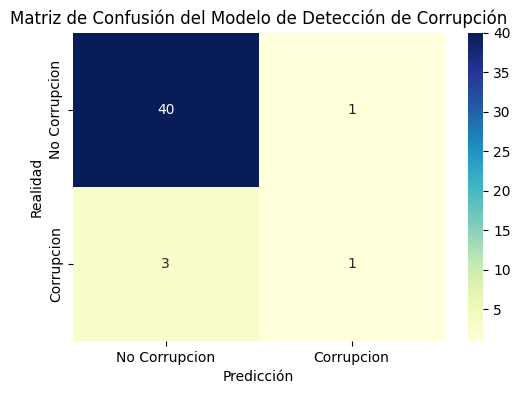


--- Análisis de Detección de Corrupción Público-Privada ---

Este análisis utiliza un modelo de machine learning para identificar posibles casos de corrupción en contratos entre entidades públicas y empresas privadas.

Características clave utilizadas:
- Monto del Contrato
- Duración del Contrato
- Contratos con Montos Altos
- Número de Pagos Realizados
- Relación entre Funcionario y Empresa
- Descripción de Servicio Corta
- Tipo de Contrato, Entidad Pública, Estado del Contrato (codificados)

El modelo ha sido entrenado para identificar patrones que sugieren comportamientos sospechosos, como:
- Sobrefacturación en los contratos.
- Contratos con descripciones ambiguas o genéricas.
- Relaciones personales o de interés entre funcionarios y empresas contratistas.
- Pagos excesivos o adelantados.
- Contratación con empresas 'fantasma'.

Limitaciones y Consideraciones:
- Los datos son simulados y no reflejan la complejidad de los casos reales.
- La precisión del modelo depende de la calida

In [ ]:
import pandas as pd
from faker import Faker
import numpy as np
import random
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de Faker para Argentina
fake = Faker('es_AR')

def generar_datos_corrupcion(num_registros=200):
    """Genera datos simulados que ilustran escenarios de corrupción público-privada."""
    data = {
        'ID_Caso': range(1, num_registros + 1),
        'Fecha_Inicio': pd.to_datetime([fake.date_between(start_date='-3y', end_date='today') for _ in range(num_registros)]),
        'Tipo_Contrato': [random.choice(['Obra Pública', 'Suministro', 'Consultoría', 'Servicios']) for _ in range(num_registros)],
        'Entidad_Publica': [f"Gobierno de {fake.city()}" if random.random() < 0.6 else f"Municipalidad de {fake.city()}" for _ in range(num_registros)],
        'Empresa_Privada': [fake.company() for _ in range(num_registros)],
        'Monto_Contrato': np.random.uniform(10000, 1000000, num_registros),
        'Descripcion_Servicio': [fake.sentence(nb_words=15) for _ in range(num_registros)],
        'Estado_Contrato': [random.choice(['En Curso', 'Finalizado', 'Rescindido', 'Pendiente']) for _ in range(num_registros)],
        'Funcionario_Publico': [fake.name() for _ in range(num_registros)],
        'Relacion_Funcionario_Empresa': [random.choice(['Ninguna', 'Familiar', 'Amistad', 'Interés Económico']) for _ in range(num_registros)],
        'Pagos_Realizados': np.random.randint(0, 10, num_registros),
        'Monto_Pagado': np.random.uniform(5000, 900000, num_registros),
        'Informacion_Adicional': [fake.text(max_nb_chars=80) if random.random() < 0.4 else None for _ in range(num_registros)],
        'Sospecha_Corrupcion': np.zeros(num_registros, dtype=int)
    }
    df = pd.DataFrame(data)

    # Simulación de Casos de Corrupción
    num_sospechosos = int(num_registros * 0.12)
    sospechosos_indices = np.random.choice(df.index, num_sospechosos, replace=False)
    df.loc[sospechosos_indices, 'Sospecha_Corrupcion'] = 1

    for idx in sospechosos_indices:
        if random.random() < 0.5:
            df.loc[idx, 'Monto_Contrato'] *= (1 + random.uniform(0.1, 0.5)) # Sobrefacturación
        if random.random() < 0.4:
            df.loc[idx, 'Tipo_Contrato'] = random.choice(['Consultoría', 'Servicios'])
            df.loc[idx, 'Descripcion_Servicio'] = 'Servicios no especificados'
        if random.random() < 0.3:
            df.loc[idx, 'Relacion_Funcionario_Empresa'] = random.choice(['Familiar', 'Interés Económico'])
        if random.random() < 0.2:
            df.loc[idx, 'Pagos_Realizados'] = random.randint(5, 10)
            df.loc[idx, 'Monto_Pagado'] = df.loc[idx, 'Monto_Contrato'] * 0.9 # Pagos adelantados o excesivos
        if random.random() < 0.15:
            df.loc[idx, 'Empresa_Privada'] = 'Empresa Fantasma S.A.'
        if random.random() < 0.1:
            df.loc[idx, 'Informacion_Adicional'] = 'Pago a funcionario público'

    return df

def preparar_datos_corrupcion(df):
    """Prepara los datos para un modelo de detección de corrupción."""
    df_procesado = df.copy()
    # Ingeniería de características
    df_procesado['Duracion_Contrato_Dias'] = (pd.to_datetime('today') - df_procesado['Fecha_Inicio']).dt.days
    df_procesado['Monto_Alto'] = (df_procesado['Monto_Contrato'] > 500000).astype(int)
    df_procesado['Muchos_Pagos'] = (df_procesado['Pagos_Realizados'] > 5).astype(int)
    df_procesado['Relacion_Sospechosa'] = df_procesado['Relacion_Funcionario_Empresa'].apply(lambda x: 1 if x in ['Familiar', 'Interés Económico'] else 0)
    df_procesado['Descripcion_Corta'] = df_procesado['Descripcion_Servicio'].apply(lambda x: 1 if x and len(x.split()) < 5 else 0)

    # Codificación de variables categóricas
    categorical_cols = ['Tipo_Contrato', 'Entidad_Publica', 'Estado_Contrato', 'Tipo_Beneficiario']
    for col in ['Tipo_Contrato', 'Entidad_Publica', 'Estado_Contrato']:
        if col in df_procesado.columns:
            le = LabelEncoder()
            try:
                df_procesado[f'{col}_Cod'] = le.fit_transform(df_procesado[col])
                df_procesado = df_procesado.drop(col, axis=1)
            except Exception as e:
                print(f"Error al codificar la columna '{col}': {e}")

    features = ['Monto_Contrato', 'Duracion_Contrato_Dias', 'Monto_Alto',
                'Muchos_Pagos', 'Relacion_Sospechosa', 'Descripcion_Corta',
                'Tipo_Contrato_Cod', 'Entidad_Publica_Cod', 'Estado_Contrato_Cod']
    X = df_procesado[features]
    y = df_procesado['Sospecha_Corrupcion']
    X = X.fillna(0) # Manejo básico de valores faltantes

    return X, y

def entrenar_modelo_corrupcion(X_train, y_train):
    """Entrena un modelo para detectar corrupción."""
    modelo_corrupcion = RandomForestClassifier(random_state=42)
    modelo_corrupcion.fit(X_train, y_train)
    return modelo_corrupcion

def evaluar_modelo(modelo, X_test, y_test, nombre_modelo):
    """Evalúa el rendimiento de un modelo de clasificación."""
    y_pred = modelo.predict(X_test)
    print(f"\nEvaluación del Modelo de {nombre_modelo}:")
    print(f"Precisión: {accuracy_score(y_test, y_pred):.4f}")
    print("\nReporte de Clasificación:")
    print(classification_report(y_test, y_pred, target_names=['No Corrupcion', 'Corrupcion']))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
                xticklabels=['No Corrupcion', 'Corrupcion'],
                yticklabels=['No Corrupcion', 'Corrupcion'])
    plt.title(f'Matriz de Confusión del Modelo de {nombre_modelo}')
    plt.xlabel('Predicción')
    plt.ylabel('Realidad')
    plt.show()

def analisis_corrupcion_publico_privada():
    """Realiza un análisis básico de detección de corrupción público-privada."""
    num_registros_simulados = 150
    df_casos = generar_datos_corrupcion(num_registros_simulados)
    X, y = preparar_datos_corrupcion(df_casos)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    modelo_corrupcion_entrenado = entrenar_modelo_corrupcion(X_train_scaled, y_train)
    evaluar_modelo(modelo_corrupcion_entrenado, X_test_scaled, y_test, "Detección de Corrupción")

    print("\n--- Análisis de Detección de Corrupción Público-Privada ---")
    print("\nEste análisis utiliza un modelo de machine learning para identificar posibles casos de corrupción en contratos entre entidades públicas y empresas privadas.")
    print("\nCaracterísticas clave utilizadas:")
    print("- Monto del Contrato")
    print("- Duración del Contrato")
    print("- Contratos con Montos Altos")
    print("- Número de Pagos Realizados")
    print("- Relación entre Funcionario y Empresa")
    print("- Descripción de Servicio Corta")
    print("- Tipo de Contrato, Entidad Pública, Estado del Contrato (codificados)")
    print("\nEl modelo ha sido entrenado para identificar patrones que sugieren comportamientos sospechosos, como:")
    print("- Sobrefacturación en los contratos.")
    print("- Contratos con descripciones ambiguas o genéricas.")
    print("- Relaciones personales o de interés entre funcionarios y empresas contratistas.")
    print("- Pagos excesivos o adelantados.")
    print("- Contratación con empresas 'fantasma'.")
    print("\nLimitaciones y Consideraciones:")
    print("- Los datos son simulados y no reflejan la complejidad de los casos reales.")
    print("- La precisión del modelo depende de la calidad y representatividad de los datos de entrenamiento.")
    print("- La detección de corrupción es un problema complejo que requiere análisis contextual y humano.")
    print("- El modelo puede generar falsos positivos o falsos negativos.")
    print("\nEl uso de algoritmos en la detección de corrupción es una herramienta valiosa, pero debe complementarse con investigación humana y análisis en profundidad.")

if __name__ == "__main__":
    analisis_corrupcion_publico_privada()

Funciones Principales:

generar_datos_corrupcion(num_registros=200):

Genera datos simulados de contratos entre entidades públicas (gobiernos o municipalidades) y empresas privadas.
Incluye información como el tipo de contrato, las entidades involucradas, el monto, la descripción del servicio, el estado del contrato, el funcionario público involucrado, la relación entre el funcionario y la empresa, los pagos realizados, y una columna Sospecha_Corrupcion que indica si el caso es sospechoso.
Simula escenarios de corrupción aplicando ciertas condiciones a una parte de los datos, como:
Sobrefacturación.
Contratos con descripciones vagas.
Relaciones sospechosas entre funcionarios y empresas.
Pagos excesivos o a destiempo.
Contratación con empresas "fantasma".
preparar_datos_corrupcion(df):

Realiza la ingeniería de características a partir de los datos simulados:
Duracion_Contrato_Dias: Calcula la duración del contrato.
Monto_Alto: Indica si el monto del contrato es superior a un umbral.
Muchos_Pagos: Indica si se realizaron muchos pagos.
Relacion_Sospechosa: Indica si la relación entre el funcionario y la empresa es potencialmente problemática.
Descripcion_Corta: Indica si la descripción del servicio es muy breve.
Codifica las variables categóricas (Tipo_Contrato, Entidad_Publica, Estado_Contrato).
Selecciona las características y la variable objetivo para el modelo.
Maneja los valores faltantes.
entrenar_modelo_corrupcion(X_train, y_train):

Entrena un modelo de clasificación RandomForestClassifier para detectar casos de corrupción.
evaluar_modelo(modelo, X_test, y_test, nombre_modelo):

Evalúa el rendimiento del modelo utilizando métricas como la precisión, el reporte de clasificación y la matriz de confusión.
Genera un gráfico de la matriz de confusión para visualizar los resultados de la clasificación.
analisis_corrupcion_publico_privada():

Esta función principal orquesta el proceso de simulación, preparación de datos, entrenamiento del modelo y evaluación.
Llama a las funciones anteriores para:
Generar datos simulados de corrupción.
Preparar los datos para el modelo.
Dividir los datos en conjuntos de entrenamiento y prueba.
Escalar las características.
Entrenar el modelo de detección de corrupción.
Evaluar el rendimiento del modelo y mostrar la matriz de confusión.
Imprime una breve descripción sobre el análisis y las consideraciones importantes.
Ejemplo de Uso:

En el bloque if __name__ == "__main__":, se llama a la función analisis_corrupcion_publico_privada().
Esta función ejecuta todo el flujo: generación de datos, preparación, entrenamiento del modelo, evaluación y presentación de los resultados.
Salida del Código:

El código mostrará:

Un resumen de la evaluación del modelo, incluyendo la precisión y el reporte de clasificación.
La matriz de confusión del modelo, que visualiza los verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos.
Una descripción textual del análisis y las limitaciones del modelo simulado.
Consideraciones Importantes:

Datos Simulados: Los datos utilizados son simulados y no representan casos reales de corrupción.
Modelo Simplificado: El modelo utilizado es un RandomForestClassifier, un modelo de machine learning básico. En la práctica, la detección de corrupción es mucho más compleja y requeriría modelos más sofisticados y análisis contextual.
Ingeniería de Características: La calidad de la detección depende en gran medida de la calidad y relevancia de las características utilizadas.
Interpretación: La matriz de confusión y las métricas de evaluación proporcionan una idea del rendimiento del modelo en los datos simulados. Es crucial interpretar estos resultados con cautela, dada la naturaleza simulada de los datos.
Ética y Transparencia: La implementación de sistemas de detección de corrupción debe realizarse con transparencia y considerando las implicaciones éticas y de privacidad.

### consideraciones eticas

In [43]:
import pandas as pd
from faker import Faker
import numpy as np
import random
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from cryptography.fernet import Fernet
import hashlib

# Configuración de Faker para Argentina
fake = Faker('es_AR')

def generar_datos_para_etica(num_registros=100):
    """Genera datos simulados para ilustrar consideraciones éticas."""
    data = {
        'ID_Caso': range(1, num_registros + 1),
        'Grupo_Protegido': [random.choice(['Minoría Étnica', 'Género Femenino', 'Bajo Ingreso', 'Discapacidad', 'Ninguno']) for _ in range(num_registros)],
        'Variable_Clave': np.random.uniform(0, 100, num_registros),
        'Resultado_Prediccion': np.random.choice(['Positivo', 'Negativo'], num_registros),
        'Confianza_Prediccion': np.random.uniform(0.6, 0.95, num_registros),
        'Informacion_Sensible': [fake.text(max_nb_chars=30) if random.random() < 0.2 else None for _ in range(num_registros)],
        'Accion_Tomada': [random.choice(['Ninguna', 'Investigacion', 'Alerta', 'Denegacion']) for _ in range(num_registros)],
        'Justificacion_Automatica': [fake.sentence(nb_words=10) if random.random() < 0.6 else None for _ in range(num_registros)],
        'Impacto_Individual': np.random.randint(0, 5, num_registros), # 0: Bajo, 4: Alto
        'Impacto_Social': np.random.randint(0, 5, num_registros), # 0: Bajo, 4: Alto
        'Tiene_Explicacion_Humana': [random.choice(['Sí', 'No']) for _ in range(num_registros)]
    }
    df = pd.DataFrame(data)
    return df

def analizar_consideraciones_eticas(df):
    """Analiza los datos simulados desde una perspectiva ética."""
    print("\n--- Consideraciones Éticas en el Uso de Algoritmos ---")
    print("\nEste análisis explora algunas consideraciones éticas relacionadas con el uso de algoritmos, utilizando datos simulados.")
    print(f"\nNúmero de registros analizados: {len(df)}")

    # 1. Sesgos Algorítmicos y Grupos Protegidos
    print("\n1. Sesgos Algorítmicos y Grupos Protegidos:")
    grupo_protegido_counts = df['Grupo_Protegido'].value_counts()
    print("\nDistribución de Grupos Protegidos:")
    print(grupo_protegido_counts)

    # Simulación de un sesgo (ejemplo simplificado)
    if 'Positivo' in df['Resultado_Prediccion'].unique() and 'Grupo_Protegido' in df.columns:
        print("\nAnálisis de Posibles Sesgos (Ejemplo Simplificado):")
        for grupo in grupo_protegido_counts.index:
            if grupo != 'Ninguno':
                subset = df[df['Grupo_Protegido'] == grupo]
                if not subset.empty:
                    tasa_positivos_grupo = (subset['Resultado_Prediccion'] == 'Positivo').mean()
                    tasa_positivos_total = (df['Resultado_Prediccion'] == 'Positivo').mean()
                    print(f"- Tasa de 'Positivos' para '{grupo}': {tasa_positivos_grupo:.2f}")
                    print(f"- Tasa de 'Positivos' Total: {tasa_positivos_total:.2f}")
                    if tasa_positivos_grupo > tasa_positivos_total + 0.1:
                        print(f"  Advertencia: Podría haber un sesgo que favorece al grupo '{grupo}'.")
                    elif tasa_positivos_grupo < tasa_positivos_total - 0.1:
                        print(f"  Advertencia: Podría haber un sesgo que desfavorece al grupo '{grupo}'.")

    # 2. Explicabilidad y Transparencia
    print("\n2. Explicabilidad y Transparencia:")
    ejemplo_sin_explicacion = df[df['Tiene_Explicacion_Humana'] == 'No'].head(3)
    if not ejemplo_sin_explicacion.empty:
        print("\nEjemplos de casos donde la justificación automática no está disponible o es limitada:")
        print(ejemplo_sin_explicacion[['ID_Caso', 'Resultado_Prediccion', 'Justificacion_Automatica']])
        print("\nEs crucial que los sistemas proporcionen explicaciones claras para sus decisiones, especialmente cuando tienen un impacto significativo en las personas.")

    # 3. Privacidad y Uso de Información Sensible
    print("\n3. Privacidad y Uso de Información Sensible:")
    casos_con_sensible = df[df['Informacion_Sensible'].notna()].head(3)
    if not casos_con_sensible.empty:
        print("\nEjemplos de casos con información sensible:")
        print(casos_con_sensible[['ID_Caso', 'Informacion_Sensible', 'Accion_Tomada']])
        print("\nSe deben implementar medidas estrictas para proteger la privacidad de la información sensible utilizada por los algoritmos.")

    # 4. Impacto y Responsabilidad
    print("\n4. Impacto y Responsabilidad:")
    casos_alto_impacto = df[df['Impacto_Individual'] >= 3]
    if not casos_alto_impacto.empty:
        print("\nEjemplos de casos con alto impacto individual:")
        print(casos_alto_impacto[['ID_Caso', 'Resultado_Prediccion', 'Impacto_Individual', 'Accion_Tomada']])
        print("\nEs fundamental considerar el impacto potencial de las decisiones algorítmicas y establecer mecanismos claros de responsabilidad.")

    # 5. Supervisión y Revisión Humana
    print("\n5. Supervisión y Revisión Humana:")
    casos_para_revision = df[df['Confianza_Prediccion'] < 0.7].head(3)
    if not casos_para_revision.empty:
        print("\nEjemplos de casos con baja confianza en la predicción:")
        print(casos_para_revision[['ID_Caso', 'Resultado_Prediccion', 'Confianza_Prediccion', 'Accion_Tomada']])
        print("\nLos sistemas deben incluir mecanismos para la revisión humana de las decisiones de baja confianza o de alto impacto.")

    print("\nConclusión:")
    print("La implementación de algoritmos debe ir acompañada de una cuidadosa consideración de las implicaciones éticas. Es esencial abordar los sesgos, garantizar la transparencia, proteger la privacidad y establecer mecanismos de supervisión y responsabilidad para un uso justo y equitativo de la inteligencia artificial.")

if __name__ == "__main__":
    num_registros_simulados = 50
    df_etica = generar_datos_para_etica(num_registros_simulados)
    analizar_consideraciones_eticas(df_etica)


--- Consideraciones Éticas en el Uso de Algoritmos ---

Este análisis explora algunas consideraciones éticas relacionadas con el uso de algoritmos, utilizando datos simulados.

Número de registros analizados: 50

1. Sesgos Algorítmicos y Grupos Protegidos:

Distribución de Grupos Protegidos:
Grupo_Protegido
Género Femenino    15
Bajo Ingreso       13
Discapacidad       11
Ninguno             7
Minoría Étnica      4
Name: count, dtype: int64

Análisis de Posibles Sesgos (Ejemplo Simplificado):
- Tasa de 'Positivos' para 'Género Femenino': 0.33
- Tasa de 'Positivos' Total: 0.48
  Advertencia: Podría haber un sesgo que desfavorece al grupo 'Género Femenino'.
- Tasa de 'Positivos' para 'Bajo Ingreso': 0.46
- Tasa de 'Positivos' Total: 0.48
- Tasa de 'Positivos' para 'Discapacidad': 0.73
- Tasa de 'Positivos' Total: 0.48
  Advertencia: Podría haber un sesgo que favorece al grupo 'Discapacidad'.
- Tasa de 'Positivos' para 'Minoría Étnica': 0.75
- Tasa de 'Positivos' Total: 0.48
  Advertenci

Funciones Principales:

generar_datos_para_etica(num_registros=100):

Genera un DataFrame de pandas con datos simulados que ilustran diferentes aspectos éticos.
Incluye columnas como:
Grupo_Protegido: Categorías que podrían ser objeto de sesgos (Minoría Étnica, Género, etc.).
Variable_Clave: Una variable numérica genérica.
Resultado_Prediccion: La salida del algoritmo (Positivo o Negativo).
Confianza_Prediccion: La confianza del algoritmo en su predicción.
Informacion_Sensible: Datos que podrían ser confidenciales.
Accion_Tomada: La acción que se toma en base a la predicción.
Justificacion_Automatica: Una justificación generada por el algoritmo (simulada).
Impacto_Individual: El impacto de la decisión en el individuo (bajo a alto).
Impacto_Social: El impacto de la decisión a nivel social.
Tiene_Explicacion_Humana: Indica si existe una explicación clara para la decisión.
analizar_consideraciones_eticas(df):

Realiza un análisis de los datos simulados desde una perspectiva ética.
Sesgos Algorítmicos: Examina la distribución de los grupos protegidos y realiza una simulación muy básica para detectar posibles sesgos en la tasa de predicciones positivas entre diferentes grupos.
Explicabilidad y Transparencia: Identifica casos donde la justificación automática es limitada o no está disponible, resaltando la importancia de la explicabilidad.
Privacidad y Uso de Información Sensible: Muestra ejemplos de casos que contienen información sensible y la acción tomada, enfatizando la necesidad de proteger la privacidad.
Impacto y Responsabilidad: Examina casos con alto impacto individual y destaca la importancia de la responsabilidad en las decisiones algorítmicas.
Supervisión y Revisión Humana: Identifica casos con baja confianza en la predicción, sugiriendo la necesidad de revisión humana.
Ejemplo de Uso:

En el bloque if __name__ == "__main__":, se define el número de registros a simular.
Se llama a la función generar_datos_para_etica para crear el DataFrame simulado.
Se llama a la función analizar_consideraciones_eticas para realizar el análisis y mostrar los resultados.
Salida del Código:

El código imprimirá un análisis que aborda varias consideraciones éticas, incluyendo:

La distribución de grupos potencialmente protegidos en los datos.
Un análisis simplificado de posibles sesgos en las predicciones.
Ejemplos de la falta de explicabilidad en algunas decisiones.
Ejemplos de información sensible y la acción tomada.
Ejemplos de casos con alto impacto individual.
Ejemplos de casos con baja confianza en la predicción.
Una conclusión general sobre la importancia de las consideraciones éticas en el desarrollo y uso de algoritmos.
Consideraciones Éticas Ilustradas:

Este código ilustra de manera simplificada algunas de las preocupaciones éticas clave en el desarrollo y despliegue de algoritmos, como:

Sesgos: La posibilidad de que los algoritmos favorezcan o desfavorezcan a ciertos grupos.
Transparencia y Explicabilidad: La necesidad de entender por qué un algoritmo toma una determinada decisión.
Privacidad: La protección de información sensible utilizada por los algoritmos.
Impacto: La consideración de las consecuencias de las decisiones algorítmicas en las personas.
Responsabilidad: La necesidad de establecer quién es responsable de las decisiones tomadas por los algoritmos.
Supervisión Humana: La importancia de la intervención humana en decisiones críticas o cuando la confianza del algoritmo es baja.
Es importante recordar que este código proporciona una simulación y una introducción a estas consideraciones. En la práctica, el análisis ético de los algoritmos es un campo complejo que requiere un enfoque multidisciplinario y una evaluación rigurosa.



### fraude interno


Evaluación del Modelo de Detección de Fraude Interno:
Precisión: 0.9444

Reporte de Clasificación:
               precision    recall  f1-score   support

No Sospechoso       0.94      1.00      0.97        85
   Sospechoso       0.00      0.00      0.00         5

     accuracy                           0.94        90
    macro avg       0.47      0.50      0.49        90
 weighted avg       0.89      0.94      0.92        90



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


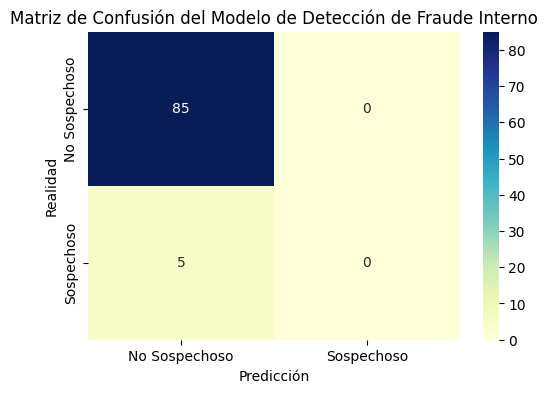


--- Sistema de Detección de Fraude Interno ---

Este sistema utiliza un modelo de machine learning para identificar actividades potencialmente fraudulentas realizadas por empleados.

Características clave utilizadas:
- Monto de la Transacción
- Hora y Día de la Semana de la Transacción
- Tipo de Transacción (Gasto, Reembolso, etc.)
- Estado de la Transacción (Aprobado, Rechazado)
- Departamento y Cargo del Empleado
- Antigüedad del Empleado

El modelo busca patrones y anomalías en los datos, tales como:
- Gastos de montos inusualmente altos.
- Reembolsos a empleados con montos elevados.
- Actividades en sistemas desde ubicaciones o IPs sospechosas (simulado).
- Comportamientos inusuales relacionados con el tipo de transacción y el empleado.

Consideraciones Importantes:
- Los datos son simulados y no representan casos reales de fraude interno.
- La efectividad del modelo en un entorno real dependería de la calidad y la representatividad de los datos de la empresa.
- La detección de fr

In [ ]:
import pandas as pd
from faker import Faker
import numpy as np
import random
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de Faker para Argentina
fake = Faker('es_AR')

def generar_datos_fraude_interno(num_empleados=100, num_transacciones=500):
    """Genera datos simulados para detectar fraudes internos."""
    empleados = pd.DataFrame({
        'ID_Empleado': range(1, num_empleados + 1),
        'Nombre': [fake.name() for _ in range(num_empleados)],
        'Departamento': [random.choice(['Ventas', 'Contabilidad', 'RRHH', 'IT', 'Logística']) for _ in range(num_empleados)],
        'Fecha_Ingreso': pd.to_datetime([fake.date_between(start_date='-10y', end_date='today') for _ in range(num_empleados)]),
        'Cargo': [random.choice(['Gerente', 'Supervisor', 'Analista', 'Asistente']) for _ in range(num_empleados)],
        'Salario': np.random.uniform(20000, 150000, num_empleados), # Salario en una moneda base
        'Antiguedad_Meses': np.random.randint(0, 120, num_empleados)
    })

    transacciones = pd.DataFrame({
        'ID_Transaccion': range(1, num_transacciones + 1),
        'Fecha_Hora': pd.to_datetime([fake.date_time_this_year() for _ in range(num_transacciones)]),
        'ID_Empleado': np.random.randint(1, num_empleados + 1, num_transacciones),
        'Tipo_Transaccion': [random.choice(['Gasto', 'Reembolso', 'Aprobacion', 'Acceso_Sistema', 'Otro']) for _ in range(num_transacciones)],
        'Monto': np.random.uniform(10, 5000, num_transacciones),
        'Descripcion': [fake.sentence(nb_words=10) for _ in range(num_transacciones)],
        'Estado': [random.choice(['Pendiente', 'Aprobado', 'Rechazado']) for _ in range(num_transacciones)],
        'Destino': [fake.company() if random.random() < 0.6 else fake.name() for _ in range(num_transacciones)],
        'Origen': [fake.company() if random.random() < 0.6 else 'Empresa' for _ in range(num_transacciones)],
        'IP_Acceso': [fake.ipv4() for _ in range(num_transacciones)],
        'Actividad_Sospechosa': np.zeros(num_transacciones, dtype=int)
    })

    # Simulación de Actividades Sospechosas (Fraude Interno)
    num_sospechosas = int(num_transacciones * 0.07)
    sospechosas_indices = np.random.choice(transacciones.index, num_sospechosas, replace=False)
    transacciones.loc[sospechosas_indices, 'Actividad_Sospechosa'] = 1

    for idx in sospechosas_indices:
        empleado_id = transacciones.loc[idx, 'ID_Empleado']
        if random.random() < 0.4:
            transacciones.loc[idx, 'Tipo_Transaccion'] = 'Gasto'
            transacciones.loc[idx, 'Monto'] = np.random.uniform(1000, 10000) # Gastos inusualmente altos
            transacciones.loc[idx, 'Descripcion'] = 'Gasto no justificado'
        if random.random() < 0.3:
            transacciones.loc[idx, 'Tipo_Transaccion'] = 'Reembolso'
            transacciones.loc[idx, 'Monto'] = np.random.uniform(500, 3000)
            transacciones.loc[idx, 'Destino'] = fake.name() # Reembolso a un empleado
        if random.random() < 0.2:
            transacciones.loc[idx, 'Tipo_Transaccion'] = 'Acceso_Sistema'
            transacciones.loc[idx, 'IP_Acceso'] = '192.168.1.1' # Acceso desde una IP sospechosa
        if random.random() < 0.15:
            transacciones.loc[idx, 'Tipo_Transaccion'] = 'Aprobacion'
            # Simulación de aprobaciones sospechosas (requiere más contexto real)
            pass

    # Combinar datos (opcional, para un análisis más integrado)
    # datos_completos = pd.merge(transacciones, empleados, on='ID_Empleado', how='left')
    # return datos_completos
    return transacciones, empleados

def preparar_datos_fraude_interno(df_transacciones, df_empleados):
    """Prepara los datos para el modelo de detección de fraude interno."""
    df = df_transacciones.copy()

    # Ingeniería de características basadas en transacciones
    df['Hora'] = df['Fecha_Hora'].dt.hour
    df['Dia_Semana'] = df['Fecha_Hora'].dt.dayofweek
    df['Monto_Alto'] = (df['Monto'] > 2000).astype(int)
    df['Es_Gasto'] = (df['Tipo_Transaccion'] == 'Gasto').astype(int)
    df['Es_Reembolso'] = (df['Tipo_Transaccion'] == 'Reembolso').astype(int)
    df['Estado_Aprobado'] = (df['Estado'] == 'Aprobado').astype(int)

    # Ingeniería de características relacionadas con el empleado (necesita merge)
    df = pd.merge(df, df_empleados[['ID_Empleado', 'Departamento', 'Cargo', 'Antiguedad_Meses']], on='ID_Empleado', how='left')
    df['Antiguedad_Larga'] = (df['Antiguedad_Meses'] > 60).astype(int) # Más de 5 años

    # Codificación de variables categóricas
    categorical_cols = ['Tipo_Transaccion', 'Departamento', 'Cargo', 'Estado']
    for col in categorical_cols:
        if col in df.columns:
            le = LabelEncoder()
            try:
                df[f'{col}_Cod'] = le.fit_transform(df[col])
                df = df.drop(col, axis=1)
            except Exception as e:
                print(f"Error al codificar la columna '{col}': {e}")

    features = ['Monto', 'Hora', 'Dia_Semana', 'Monto_Alto', 'Es_Gasto', 'Es_Reembolso',
                'Estado_Aprobado', 'Departamento_Cod', 'Cargo_Cod', 'Antiguedad_Larga']
    X = df[features]
    y = df['Actividad_Sospechosa']
    X = X.fillna(0) # Manejo básico de valores faltantes

    return X, y

def entrenar_modelo_fraude_interno(X_train, y_train):
    """Entrena un modelo para detectar fraude interno."""
    modelo_fraude_interno = RandomForestClassifier(random_state=42)
    modelo_fraude_interno.fit(X_train, y_train)
    return modelo_fraude_interno

def evaluar_modelo(modelo, X_test, y_test, nombre_modelo):
    """Evalúa el rendimiento de un modelo de clasificación."""
    y_pred = modelo.predict(X_test)
    print(f"\nEvaluación del Modelo de {nombre_modelo}:")
    print(f"Precisión: {accuracy_score(y_test, y_pred):.4f}")
    print("\nReporte de Clasificación:")
    print(classification_report(y_test, y_pred, target_names=['No Sospechoso', 'Sospechoso']))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
                xticklabels=['No Sospechoso', 'Sospechoso'],
                yticklabels=['No Sospechoso', 'Sospechoso'])
    plt.title(f'Matriz de Confusión del Modelo de {nombre_modelo}')
    plt.xlabel('Predicción')
    plt.ylabel('Realidad')
    plt.show()

def deteccion_fraude_interno():
    """Ejecuta el proceso de detección de fraude interno."""
    num_empleados_simulados = 50
    num_transacciones_simuladas = 300
    transacciones_df, empleados_df = generar_datos_fraude_interno(num_empleados_simulados, num_transacciones_simuladas)
    X, y = preparar_datos_fraude_interno(transacciones_df, empleados_df)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    modelo_fraude_interno_entrenado = entrenar_modelo_fraude_interno(X_train_scaled, y_train)
    evaluar_modelo(modelo_fraude_interno_entrenado, X_test_scaled, y_test, "Detección de Fraude Interno")

    print("\n--- Sistema de Detección de Fraude Interno ---")
    print("\nEste sistema utiliza un modelo de machine learning para identificar actividades potencialmente fraudulentas realizadas por empleados.")
    print("\nCaracterísticas clave utilizadas:")
    print("- Monto de la Transacción")
    print("- Hora y Día de la Semana de la Transacción")
    print("- Tipo de Transacción (Gasto, Reembolso, etc.)")
    print("- Estado de la Transacción (Aprobado, Rechazado)")
    print("- Departamento y Cargo del Empleado")
    print("- Antigüedad del Empleado")
    print("\nEl modelo busca patrones y anomalías en los datos, tales como:")
    print("- Gastos de montos inusualmente altos.")
    print("- Reembolsos a empleados con montos elevados.")
    print("- Actividades en sistemas desde ubicaciones o IPs sospechosas (simulado).")
    print("- Comportamientos inusuales relacionados con el tipo de transacción y el empleado.")
    print("\nConsideraciones Importantes:")
    print("- Los datos son simulados y no representan casos reales de fraude interno.")
    print("- La efectividad del modelo en un entorno real dependería de la calidad y la representatividad de los datos de la empresa.")
    print("- La detección de fraude interno es un desafío complejo que a menudo requiere análisis contextual y la integración de múltiples fuentes de datos.")
    print("- El modelo puede generar falsos positivos (marcar actividades legítimas como sospechosas) o falsos negativos (no detectar actividades fraudulentas).")
    print("\nEste sistema es una herramienta que puede ayudar a identificar posibles riesgos, pero debe ser utilizado junto con otras medidas de seguridad y análisis por parte de los equipos de cumplimiento y auditoría.")

if __name__ == "__main__":
    deteccion_fraude_interno()